In [2]:
import numpy as np
import pandas as pd
def load(csv_path):
    return pd.read_csv(csv_path)

In [3]:
#load dataframe
df = load('20343.csv')
df

Cell HMS LINCS ID Cell Name Small Molecule HMS LINCS ID  \
0               50211-2   HCC1806                 10390-103-1   
1               50211-2   HCC1806                 10390-103-1   
2               50211-2   HCC1806                 10390-103-1   
3               50211-2   HCC1806                 10390-103-1   
4               50211-2   HCC1806                 10390-103-1   
...                 ...       ...                         ...   
10705           51083-2  SUM159PT                 10194-106-1   
10706           51083-2  SUM159PT                 10194-106-1   
10707           51083-2  SUM159PT                 10194-106-1   
10708           51083-2  SUM159PT                 10194-106-1   
10709           51083-2  SUM159PT                 10194-106-1   

      Small Molecule Name  Small Mol Concentration (uM) Primary Target  \
0             Abemaciclib                      0.001000         CDK4/6   
1             Abemaciclib                      0.003162         CDK4/6   
2             Abemaciclib                      0.010000         CDK4/6   
3             Abemaciclib                      0.031623         CDK4/6   
4             Abemaciclib                      0.100000         CDK4/6   
...                   ...                           ...            ...   
10705        Cabozantinib                      0.100000     VEGFR2/MET   
10706        Cabozantinib                      0.316230     VEGFR2/MET   
10707        Cabozantinib                      1.000000     VEGFR2/MET   
10708        Cabozantinib                      3.162300     VEGFR2/MET   
10709        Cabozantinib                     10.000000     VEGFR2/MET   

          Pathway  Mean Normalized Growth Rate Inhibition Value  \
0      Cell cycle                                        0.9779   
1      Cell cycle                                        0.9667   
2      Cell cycle                                        0.9168   
3      Cell cycle                                        0.7658   
4      Cell cycle                                        0.7132   
...           ...                                           ...   
10705         RTK                                        1.0115   
10706         RTK                                        0.9965   
10707         RTK                                        0.9307   
10708         RTK                                        0.7480   
10709         RTK                                        0.1744   

       Increased Fraction Dead  
0                      0.00362  
1                     -0.00301  
2                      0.00484  
3                      0.01650  
4                      0.01025  
...                        ...  
10705                 -0.00152  
10706                  0.00568  
10707                  0.03130  
10708                  0.08743  
10709                  0.19675  

[10710 rows x 9 columns]

In [4]:
#find the # of unique cells and molecules
cells = df['Cell HMS LINCS ID'].unique()
moles = df['Small Molecule HMS LINCS ID'].unique()
n_cell = len(cells)
n_mole = len(moles)
n_exp = n_cell * n_mole

In [5]:
#find unique values of concentration
concs = df['Small Mol Concentration (uM)'].unique()

In [6]:
#redefine the problem space for retrospective active learning
#find the values of concentration that all possible combinations of cell and molecular are performed
df_concs = []
new_concs = []
for i in range(len(concs)):
    df_conc = df[df['Small Mol Concentration (uM)'] == concs[i]]
    if len(df_conc) == n_exp:
        df_concs.append(df_conc)
        new_concs.append(concs[i])
concs = new_concs
n_conc = len(concs)
df = df[df['Small Mol Concentration (uM)'].isin(concs)]

In [7]:
df_concs[0]

Cell HMS LINCS ID Cell Name Small Molecule HMS LINCS ID  \
2               50211-2   HCC1806                 10390-103-1   
12              50211-2   HCC1806                 10071-101-1   
20              50211-2   HCC1806                 10006-101-1   
31              50211-2   HCC1806                 10387-101-1   
40              50211-2   HCC1806                 10287-101-2   
...                 ...       ...                         ...   
10667           51083-2  SUM159PT                 10394-101-1   
10677           51083-2  SUM159PT                 10018-101-1   
10685           51083-2  SUM159PT                 10131-101-1   
10694           51083-2  SUM159PT                 10444-101-1   
10703           51083-2  SUM159PT                 10194-106-1   

      Small Molecule Name  Small Mol Concentration (uM) Primary Target  \
2             Abemaciclib                          0.01         CDK4/6   
12            Palbociclib                          0.01         CDK4/6   
20                AZD7762                          0.01         CHK1/2   
31             Volasertib                          0.01            PLK   
40             Dinaciclib                          0.01        pan CDK   
...                   ...                           ...            ...   
10667           Ceritinib                          0.01            ALK   
10677           Neratinib                          0.01      EGFR/HER2   
10685          Tivantinib                          0.01            MET   
10694           Cediranib                          0.01     VEGFR/cKIT   
10703        Cabozantinib                          0.01     VEGFR2/MET   

          Pathway  Mean Normalized Growth Rate Inhibition Value  \
2      Cell cycle                                        0.9168   
12     Cell cycle                                        0.9497   
20     Cell cycle                                        0.7268   
31     Cell cycle                                       -0.1860   
40     Cell cycle                                        0.7679   
...           ...                                           ...   
10667         RTK                                        1.0080   
10677         RTK                                        0.9898   
10685         RTK                                        1.0165   
10694         RTK                                        1.0195   
10703         RTK                                        1.0155   

       Increased Fraction Dead  
2                      0.00484  
12                     0.00431  
20                     0.06774  
31                     0.51709  
40                     0.03547  
...                        ...  
10667                 -0.00023  
10677                 -0.00141  
10685                  0.00077  
10694                  0.00135  
10703                  0.00176  

[1190 rows x 9 columns]

In [8]:
df

Cell HMS LINCS ID Cell Name Small Molecule HMS LINCS ID  \
2               50211-2   HCC1806                 10390-103-1   
4               50211-2   HCC1806                 10390-103-1   
5               50211-2   HCC1806                 10390-103-1   
6               50211-2   HCC1806                 10390-103-1   
12              50211-2   HCC1806                 10071-101-1   
...                 ...       ...                         ...   
10698           51083-2  SUM159PT                 10444-101-1   
10703           51083-2  SUM159PT                 10194-106-1   
10705           51083-2  SUM159PT                 10194-106-1   
10706           51083-2  SUM159PT                 10194-106-1   
10707           51083-2  SUM159PT                 10194-106-1   

      Small Molecule Name  Small Mol Concentration (uM) Primary Target  \
2             Abemaciclib                       0.01000         CDK4/6   
4             Abemaciclib                       0.10000         CDK4/6   
5             Abemaciclib                       0.31623         CDK4/6   
6             Abemaciclib                       1.00000         CDK4/6   
12            Palbociclib                       0.01000         CDK4/6   
...                   ...                           ...            ...   
10698           Cediranib                       1.00000     VEGFR/cKIT   
10703        Cabozantinib                       0.01000     VEGFR2/MET   
10705        Cabozantinib                       0.10000     VEGFR2/MET   
10706        Cabozantinib                       0.31623     VEGFR2/MET   
10707        Cabozantinib                       1.00000     VEGFR2/MET   

          Pathway  Mean Normalized Growth Rate Inhibition Value  \
2      Cell cycle                                        0.9168   
4      Cell cycle                                        0.7132   
5      Cell cycle                                        0.6567   
6      Cell cycle                                        0.4501   
12     Cell cycle                                        0.9497   
...           ...                                           ...   
10698         RTK                                        0.9847   
10703         RTK                                        1.0155   
10705         RTK                                        1.0115   
10706         RTK                                        0.9965   
10707         RTK                                        0.9307   

       Increased Fraction Dead  
2                      0.00484  
4                      0.01025  
5                      0.01780  
6                      0.04250  
12                     0.00431  
...                        ...  
10698                 -0.00209  
10703                  0.00176  
10705                 -0.00152  
10706                  0.00568  
10707                  0.03130  

[4760 rows x 9 columns]

In [9]:
user_item_grs = []
user_item_ifds = []
for i in range(n_conc):
    gr = df_concs[i]['Mean Normalized Growth Rate Inhibition Value'].values
    ifd = df_concs[i]['Increased Fraction Dead'].values
    user_item_gr = np.zeros([n_cell, n_mole])
    user_item_ifd = np.zeros([n_cell, n_mole])
    for j in range(n_cell):
        user_item_gr[j] = gr[j * n_mole : (j + 1) * n_mole]
        user_item_ifd[j] = ifd[j * n_mole : (j + 1) * n_mole]
    user_item_grs.append(user_item_gr - 1)
    user_item_ifds.append(user_item_ifd)

In [10]:
from sklearn.model_selection import KFold
def get_kfold_matrix(df, user, item, ops, user_col_name, item_col_name, op_col_name, k=10):
    n_user = len(user)
    n_item = len(item)
    n_ops = len(concs)
    train_indexes = np.zeros([k, n_ops, n_user, n_item])
    test_indexes = np.zeros([k, n_ops, n_user, n_item])
    kfold = KFold(n_splits=k, shuffle=True, random_state=0)
    for i, [train_index, _] in enumerate(kfold.split(df)):
        for index in train_index:
            record = df.iloc[index]
            train_indexes[i, np.where(ops == record[op_col_name])[0][0], np.where(user == record[user_col_name])[0][0], np.where(item == record[item_col_name])[0][0]] = 1
    test_indexes[np.where(train_indexes == 0)] = 1
    return train_indexes, test_indexes

In [11]:
#Alternating Least Square + Deep Learning
import matplotlib.pyplot as plt
from keras import backend
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

class ALSDL:
    def __init__(self, user_items, n_e, train_indexes, test_indexes, alpha, l_r, beta, c_thred):
        self.user_items = user_items
        self.n_e = n_e
        self.n_als = len(self.user_items)
        self.n_user, self.n_item = self.user_items[0].shape
        self.user_embeddings = np.random.uniform(-1, 1, (self.n_als, self.n_user, self.n_e))
        self.item_embeddings = np.random.uniform(-1, 1, (self.n_als, self.n_item, self.n_e))
        self.train_indexes = train_indexes
        self.test_indexes = test_indexes
        self.n_train = np.sum(self.train_indexes).astype(np.int_)
        self.n_test = np.sum(self.test_indexes).astype(np.int_)
        self.alpha = alpha
        self.l_r = l_r
        self.beta = beta
        self.train_user_items = np.multiply(self.user_items, self.train_indexes)
        self.test_user_items = np.multiply(self.user_items, self.test_indexes)
        self.hist = [[] for i in range(4)]
        self.best_test_loss = float('inf')
        self.best_test_acc = 0.0
        self.c_thred = c_thred
        self.model_init()
        
    def myloss(self, y_true, y_pred):
        return backend.mean(backend.square(y_pred - y_true), axis=-1) / 2 - self.beta * backend.mean(backend.sign(y_pred * y_true), axis=-1)
    
    def rmse(self, y_true, y_pred):
        return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
    
    def acc(self):
        y_train_pred = self.model.predict(self.x_train).flatten()
        y_test_pred = self.model.predict(self.x_test).flatten()
        y_train_true_pred = np.where(((self.y_train>self.c_thred)&(y_train_pred>self.c_thred))|((self.y_train<self.c_thred)&(y_train_pred<self.c_thred))|((self.y_train==self.c_thred)&(y_train_pred==self.c_thred)), 1, 0)
        y_test_true_pred = np.where(((self.y_test>self.c_thred)&(y_test_pred>self.c_thred))|((self.y_test<self.c_thred)&(y_test_pred<self.c_thred))|((self.y_test==self.c_thred)&(y_test_pred==self.c_thred)), 1, 0)
        train_acc = np.sum(y_train_true_pred) / self.n_train
        test_acc = np.sum(y_test_true_pred) / self.n_test
        self.hist[2].append(train_acc)
        self.hist[3].append(test_acc)
        return train_acc, test_acc
    
    def model_init(self):
        self.model = Sequential()
        self.model.add(Dense(self.n_e * 4, input_shape=(self.n_e * 2,)))
        self.model.add(Activation('tanh'))
        self.model.add(Dense(self.n_e * 2))
        self.model.add(Activation('tanh'))
        self.model.add(Dense(self.n_e))
        self.model.add(Activation('tanh'))
        self.model.add(Dense(1))
        self.model.compile(loss=self.myloss, optimizer='rmsprop', metrics=[self.rmse])
        
    def clear(self):
        self.user_embeddings = np.random.uniform(-1, 1, (self.n_als, self.n_user, self.n_e))
        self.item_embeddings = np.random.uniform(-1, 1, (self.n_als, self.n_item, self.n_e))
        self.hist = [[] for i in range(4)]
        self.best_test_loss = float('inf')
        self.best_test_acc = 0.0
        self.model_init()
        
    def als_predict(self, als_index):
        return np.dot(self.user_embeddings[als_index], self.item_embeddings[als_index].T)
    
    def als_loss(self, als_index):
        user_item_pred = self.als_predict(als_index)
        train_loss = np.sum(np.square(np.multiply(user_item_pred, self.train_indexes[als_index]) - self.train_user_items[als_index]))
        test_loss = np.sum(np.square(np.multiply(user_item_pred, self.test_indexes[als_index]) - self.test_user_items[als_index]))
        return train_loss, test_loss
    
    def als_acc(self, als_index):
        user_item_pred = self.als_predict(als_index)
        true_pred = np.where(((self.user_items[als_index]>self.c_thred)&(user_item_pred>self.c_thred))|((self.user_items[als_index]<self.c_thred)&(user_item_pred<self.c_thred))|((self.user_items[als_index]==self.c_thred)&(user_item_pred==self.c_thred)), 1, 0)
        train_acc = np.sum(np.multiply(true_pred, self.train_indexes[als_index]))
        test_acc = np.sum(np.multiply(true_pred, self.test_indexes[als_index]))
        return train_acc, test_acc

    def als_train(self, n_epoch_als):
        print('ALS TRAININGS')
        for i in range(n_epoch_als):
            train_loss = np.zeros(self.n_als)
            test_loss = np.zeros(self.n_als)
            train_acc = np.zeros(self.n_als)
            test_acc = np.zeros(self.n_als)
            for j in range(self.n_als):
                ui_pred = np.multiply(self.train_indexes[j], self.als_predict(j))
                error = ui_pred - self.train_user_items[j]
                if i % 2 == 0:
                    user_grads = np.dot(error, self.item_embeddings[j])
                    self.user_embeddings[j] = self.alpha * self.user_embeddings[j] - self.l_r * user_grads
                else:
                    item_grads = np.dot(error.T, self.user_embeddings[j])
                    self.item_embeddings[j] = self.alpha * self.item_embeddings[j] - self.l_r * item_grads
                loss = self.als_loss(j)
                train_loss[j] = loss[0]
                test_loss[j] = loss[1]
                acc = self.als_acc(j)
                train_acc[j] = acc[0]
                test_acc[j] = acc[1]
            mean_train_loss = np.sqrt(np.sum(train_loss) / self.n_train)
            mean_test_loss = np.sqrt(np.sum(test_loss) / self.n_test)
            if mean_test_loss < self.best_test_loss:
                self.best_test_loss = mean_test_loss
            mean_train_acc = np.sum(train_acc) / self.n_train
            mean_test_acc = np.sum(test_acc) / self.n_test
            if mean_test_acc > self.best_test_acc:
                self.best_test_acc = mean_test_acc
            self.hist[0].append(mean_train_loss)
            self.hist[1].append(mean_test_loss)
            self.hist[2].append(mean_train_acc)
            self.hist[3].append(mean_test_acc)
            print('EPOCH %d: train_loss: %f, test_loss: %f, train_acc: %f, test_acc: %f' % (i + 1, mean_train_loss, mean_test_loss, mean_train_acc, mean_test_acc))
                
    def train(self, n_epoch_als, n_epoch_dl):
        self.als_train(n_epoch_als)
        self.x_train = np.zeros([self.n_train, 2*self.n_e])
        self.y_train = np.zeros(self.n_train)
        self.x_test = np.zeros([self.n_test, 2*self.n_e])
        self.y_test = np.zeros(self.n_test)
        train_smpl_n = 0
        test_smpl_n = 0
        for i in range(self.n_als):
            train_cords = np.where(self.train_indexes[i] == 1)
            for j in range(len(train_cords[0])):
                user_cord = train_cords[0][j]
                item_cord = train_cords[1][j]
                self.x_train[train_smpl_n, : self.n_e] = self.user_embeddings[i, user_cord]
                self.x_train[train_smpl_n, self.n_e :] = self.item_embeddings[i, item_cord]
                self.y_train[train_smpl_n] = self.user_items[i][user_cord, item_cord]
                train_smpl_n = train_smpl_n + 1
            test_cords = np.where(self.test_indexes[i] == 1)
            for j in range(len(test_cords[0])):
                user_cord = test_cords[0][j]
                item_cord = test_cords[1][j]
                self.x_test[test_smpl_n, : self.n_e] = self.user_embeddings[i, user_cord]
                self.x_test[test_smpl_n, self.n_e :] = self.item_embeddings[i, item_cord]
                self.y_test[test_smpl_n] = self.user_items[i][user_cord, item_cord]
                test_smpl_n = test_smpl_n + 1
        print('DL TRAININGS')
        for i in range(n_epoch_dl):
            history = self.model.fit(self.x_train, self.y_train, batch_size=100, shuffle=True, validation_data=(self.x_test, self.y_test), epochs=1, verbose=0)
            self.hist[0].append(history.history['rmse'][0])
            self.hist[1].append(history.history['val_rmse'][0])
            if history.history['val_rmse'][0] < self.best_test_loss:
                self.best_test_loss = history.history['val_rmse'][0]
            acc = self.acc()
            if acc[1] > self.best_test_acc:
                self.best_test_acc = acc[1]
            print('EPOCH %d: train_loss: %f, test_loss: %f, train_acc: %f, test_acc: %f' % (i + 1 + n_epoch_als, history.history['rmse'][0], history.history['val_rmse'][0], acc[0], acc[1]))
        
    def plot(self):
        plt.figure()
        plt.subplot(1,2,1)
        plt.plot(self.hist[0], color='blue', label='train_loss')
        plt.plot(self.hist[1], color='red', label='test_loss')
        plt.legend()
        plt.subplot(1,2,2)
        plt.plot(self.hist[2], color='blue', label='train_acc')
        plt.plot(self.hist[3], color='red', label='test_acc')
        plt.legend()
        plt.show()
        return

In [13]:
train_indexes, test_indexes = get_kfold_matrix(df, cells, moles, concs, 'Cell HMS LINCS ID', 'Small Molecule HMS LINCS ID', 'Small Mol Concentration (uM)')

In [14]:
#call 10-fold cross validation
test_loss_grs = []
test_loss_ifds = []
test_acc_grs = []
test_acc_ifds = []
n_e = 5 #intuitively defined, can be tuned automatically
alpha = 1
l_r = 0.01
beta = 0.1
n_repeat = 5
n_als_epoch = 200
n_dl_epoch = 200
alsdl_grs = [[] for i in range(len(train_indexes))]
alsdl_ifds = [[] for i in range(len(train_indexes))]
for i in range(len(train_indexes)):
    alsdl_gr = ALSDL(user_item_grs, n_e, train_indexes[i], test_indexes[i], alpha, l_r, beta, 0)
    alsdl_ifd = ALSDL(user_item_ifds, n_e, train_indexes[i], test_indexes[i], alpha, l_r, beta, 0)
    for k in range(n_repeat):
        print('fold: %d, repeat: %d' % (i + 1, k + 1))
        alsdl_gr.clear()
        alsdl_ifd.clear()
        alsdl_gr.train(n_als_epoch, n_dl_epoch)
        alsdl_ifd.train(n_als_epoch, n_dl_epoch)
        test_loss_grs.append(alsdl_gr.best_test_loss)
        test_loss_ifds.append(alsdl_ifd.best_test_loss)
        test_acc_grs.append(alsdl_gr.best_test_acc)
        test_acc_ifds.append(alsdl_ifd.best_test_acc)
        alsdl_grs[i].append(alsdl_gr)
        alsdl_ifds[i].append(alsdl_ifd)
mean_test_loss_gr = np.mean(test_loss_grs)
mean_test_loss_ifd = np.mean(test_loss_ifds)
mean_test_acc_gr = np.mean(test_acc_grs)
mean_test_acc_ifd = np.mean(test_acc_ifds)

fold: 1, repeat: 1
ALS TRAININGS
EPOCH 1: train_loss: 0.915954, test_loss: 0.940332, train_acc: 0.502334, test_acc: 0.537815
EPOCH 2: train_loss: 0.872254, test_loss: 0.902935, train_acc: 0.505369, test_acc: 0.537815
EPOCH 3: train_loss: 0.824818, test_loss: 0.869766, train_acc: 0.511204, test_acc: 0.535714
EPOCH 4: train_loss: 0.796684, test_loss: 0.845053, train_acc: 0.517040, test_acc: 0.527311
EPOCH 5: train_loss: 0.763352, test_loss: 0.822114, train_acc: 0.528711, test_acc: 0.537815
EPOCH 6: train_loss: 0.742141, test_loss: 0.802592, train_acc: 0.533380, test_acc: 0.539916
EPOCH 7: train_loss: 0.715982, test_loss: 0.784454, train_acc: 0.540850, test_acc: 0.537815
EPOCH 8: train_loss: 0.697576, test_loss: 0.766493, train_acc: 0.545752, test_acc: 0.546218
EPOCH 9: train_loss: 0.675033, test_loss: 0.750336, train_acc: 0.557656, test_acc: 0.563025
EPOCH 10: train_loss: 0.657194, test_loss: 0.731903, train_acc: 0.567227, test_acc: 0.577731
EPOCH 11: train_loss: 0.636288, test_loss: 0.7

EPOCH 201: train_loss: 0.429954, test_loss: 0.371405, train_acc: 0.797852, test_acc: 0.804622
EPOCH 202: train_loss: 0.344268, test_loss: 0.326465, train_acc: 0.807656, test_acc: 0.808824
EPOCH 203: train_loss: 0.291645, test_loss: 0.291188, train_acc: 0.809757, test_acc: 0.810924
EPOCH 204: train_loss: 0.250080, test_loss: 0.249998, train_acc: 0.816060, test_acc: 0.813025
EPOCH 205: train_loss: 0.222925, test_loss: 0.225400, train_acc: 0.803922, test_acc: 0.806723
EPOCH 206: train_loss: 0.209911, test_loss: 0.216780, train_acc: 0.817694, test_acc: 0.821429
EPOCH 207: train_loss: 0.202811, test_loss: 0.204772, train_acc: 0.818627, test_acc: 0.817227
EPOCH 208: train_loss: 0.198453, test_loss: 0.200942, train_acc: 0.808824, test_acc: 0.813025
EPOCH 209: train_loss: 0.194669, test_loss: 0.201064, train_acc: 0.809991, test_acc: 0.800420
EPOCH 210: train_loss: 0.191391, test_loss: 0.196300, train_acc: 0.806256, test_acc: 0.804622
EPOCH 211: train_loss: 0.189342, test_loss: 0.189994, train_

EPOCH 289: train_loss: 0.147868, test_loss: 0.163959, train_acc: 0.834034, test_acc: 0.823529
EPOCH 290: train_loss: 0.147351, test_loss: 0.165509, train_acc: 0.826097, test_acc: 0.825630
EPOCH 291: train_loss: 0.147332, test_loss: 0.162058, train_acc: 0.834734, test_acc: 0.823529
EPOCH 292: train_loss: 0.147324, test_loss: 0.161601, train_acc: 0.834967, test_acc: 0.831933
EPOCH 293: train_loss: 0.147741, test_loss: 0.161411, train_acc: 0.834034, test_acc: 0.823529
EPOCH 294: train_loss: 0.147557, test_loss: 0.161642, train_acc: 0.833567, test_acc: 0.808824
EPOCH 295: train_loss: 0.147578, test_loss: 0.163059, train_acc: 0.835668, test_acc: 0.831933
EPOCH 296: train_loss: 0.147600, test_loss: 0.160467, train_acc: 0.834500, test_acc: 0.804622
EPOCH 297: train_loss: 0.147156, test_loss: 0.163506, train_acc: 0.828431, test_acc: 0.825630
EPOCH 298: train_loss: 0.147512, test_loss: 0.163560, train_acc: 0.843371, test_acc: 0.829832
EPOCH 299: train_loss: 0.147016, test_loss: 0.165328, train_

EPOCH 377: train_loss: 0.144134, test_loss: 0.163190, train_acc: 0.838469, test_acc: 0.827731
EPOCH 378: train_loss: 0.144196, test_loss: 0.163977, train_acc: 0.834034, test_acc: 0.834034
EPOCH 379: train_loss: 0.144014, test_loss: 0.161150, train_acc: 0.838702, test_acc: 0.846639
EPOCH 380: train_loss: 0.143533, test_loss: 0.164104, train_acc: 0.842670, test_acc: 0.840336
EPOCH 381: train_loss: 0.144042, test_loss: 0.162798, train_acc: 0.841270, test_acc: 0.836134
EPOCH 382: train_loss: 0.143490, test_loss: 0.163477, train_acc: 0.848739, test_acc: 0.846639
EPOCH 383: train_loss: 0.144068, test_loss: 0.163385, train_acc: 0.839869, test_acc: 0.829832
EPOCH 384: train_loss: 0.142765, test_loss: 0.169094, train_acc: 0.837068, test_acc: 0.834034
EPOCH 385: train_loss: 0.142985, test_loss: 0.163182, train_acc: 0.837302, test_acc: 0.819328
EPOCH 386: train_loss: 0.143345, test_loss: 0.164334, train_acc: 0.842670, test_acc: 0.846639
EPOCH 387: train_loss: 0.142939, test_loss: 0.162857, train_

EPOCH 201: train_loss: 0.123265, test_loss: 0.110809, train_acc: 0.737395, test_acc: 0.747899
EPOCH 202: train_loss: 0.100274, test_loss: 0.101939, train_acc: 0.748599, test_acc: 0.775210
EPOCH 203: train_loss: 0.094108, test_loss: 0.096752, train_acc: 0.746732, test_acc: 0.764706
EPOCH 204: train_loss: 0.092202, test_loss: 0.094669, train_acc: 0.744631, test_acc: 0.754202
EPOCH 205: train_loss: 0.090824, test_loss: 0.093274, train_acc: 0.732960, test_acc: 0.747899
EPOCH 206: train_loss: 0.089547, test_loss: 0.092461, train_acc: 0.722689, test_acc: 0.733193
EPOCH 207: train_loss: 0.087620, test_loss: 0.092043, train_acc: 0.731326, test_acc: 0.737395
EPOCH 208: train_loss: 0.085792, test_loss: 0.088475, train_acc: 0.747199, test_acc: 0.766807
EPOCH 209: train_loss: 0.083440, test_loss: 0.088232, train_acc: 0.739963, test_acc: 0.764706
EPOCH 210: train_loss: 0.081530, test_loss: 0.082924, train_acc: 0.735294, test_acc: 0.756303
EPOCH 211: train_loss: 0.078621, test_loss: 0.081181, train_

EPOCH 289: train_loss: 0.054394, test_loss: 0.060928, train_acc: 0.765640, test_acc: 0.785714
EPOCH 290: train_loss: 0.054389, test_loss: 0.061418, train_acc: 0.777778, test_acc: 0.808824
EPOCH 291: train_loss: 0.054624, test_loss: 0.060807, train_acc: 0.762838, test_acc: 0.789916
EPOCH 292: train_loss: 0.054250, test_loss: 0.064978, train_acc: 0.794118, test_acc: 0.819328
EPOCH 293: train_loss: 0.054548, test_loss: 0.061154, train_acc: 0.774043, test_acc: 0.792017
EPOCH 294: train_loss: 0.054293, test_loss: 0.062525, train_acc: 0.779412, test_acc: 0.810924
EPOCH 295: train_loss: 0.054135, test_loss: 0.063251, train_acc: 0.788049, test_acc: 0.815126
EPOCH 296: train_loss: 0.054220, test_loss: 0.060698, train_acc: 0.768207, test_acc: 0.792017
EPOCH 297: train_loss: 0.054041, test_loss: 0.061387, train_acc: 0.743697, test_acc: 0.754202
EPOCH 298: train_loss: 0.053954, test_loss: 0.062212, train_acc: 0.781279, test_acc: 0.817227
EPOCH 299: train_loss: 0.054108, test_loss: 0.061648, train_

EPOCH 377: train_loss: 0.052072, test_loss: 0.060092, train_acc: 0.773343, test_acc: 0.810924
EPOCH 378: train_loss: 0.051864, test_loss: 0.061520, train_acc: 0.785948, test_acc: 0.825630
EPOCH 379: train_loss: 0.052145, test_loss: 0.060758, train_acc: 0.780345, test_acc: 0.810924
EPOCH 380: train_loss: 0.051962, test_loss: 0.061647, train_acc: 0.792250, test_acc: 0.827731
EPOCH 381: train_loss: 0.052022, test_loss: 0.059988, train_acc: 0.776144, test_acc: 0.798319
EPOCH 382: train_loss: 0.052011, test_loss: 0.060186, train_acc: 0.780345, test_acc: 0.796218
EPOCH 383: train_loss: 0.051668, test_loss: 0.060480, train_acc: 0.782213, test_acc: 0.813025
EPOCH 384: train_loss: 0.052008, test_loss: 0.060611, train_acc: 0.783847, test_acc: 0.813025
EPOCH 385: train_loss: 0.051751, test_loss: 0.060548, train_acc: 0.783613, test_acc: 0.823529
EPOCH 386: train_loss: 0.051822, test_loss: 0.063097, train_acc: 0.792717, test_acc: 0.834034
EPOCH 387: train_loss: 0.052104, test_loss: 0.059965, train_

EPOCH 134: train_loss: 0.187115, test_loss: 0.241725, train_acc: 0.852241, test_acc: 0.815126
EPOCH 135: train_loss: 0.186847, test_loss: 0.241661, train_acc: 0.852474, test_acc: 0.815126
EPOCH 136: train_loss: 0.186648, test_loss: 0.241559, train_acc: 0.852241, test_acc: 0.815126
EPOCH 137: train_loss: 0.186381, test_loss: 0.241499, train_acc: 0.852941, test_acc: 0.815126
EPOCH 138: train_loss: 0.186184, test_loss: 0.241401, train_acc: 0.853175, test_acc: 0.817227
EPOCH 139: train_loss: 0.185919, test_loss: 0.241345, train_acc: 0.853175, test_acc: 0.817227
EPOCH 140: train_loss: 0.185724, test_loss: 0.241250, train_acc: 0.852941, test_acc: 0.817227
EPOCH 141: train_loss: 0.185460, test_loss: 0.241196, train_acc: 0.852708, test_acc: 0.817227
EPOCH 142: train_loss: 0.185267, test_loss: 0.241105, train_acc: 0.852941, test_acc: 0.817227
EPOCH 143: train_loss: 0.185004, test_loss: 0.241054, train_acc: 0.853408, test_acc: 0.817227
EPOCH 144: train_loss: 0.184812, test_loss: 0.240966, train_

EPOCH 222: train_loss: 0.175429, test_loss: 0.178462, train_acc: 0.835201, test_acc: 0.825630
EPOCH 223: train_loss: 0.173829, test_loss: 0.177771, train_acc: 0.834267, test_acc: 0.825630
EPOCH 224: train_loss: 0.173310, test_loss: 0.176236, train_acc: 0.835668, test_acc: 0.823529
EPOCH 225: train_loss: 0.172456, test_loss: 0.174993, train_acc: 0.839169, test_acc: 0.827731
EPOCH 226: train_loss: 0.171663, test_loss: 0.174102, train_acc: 0.841270, test_acc: 0.836134
EPOCH 227: train_loss: 0.170702, test_loss: 0.174698, train_acc: 0.838002, test_acc: 0.829832
EPOCH 228: train_loss: 0.169789, test_loss: 0.174232, train_acc: 0.840570, test_acc: 0.836134
EPOCH 229: train_loss: 0.169612, test_loss: 0.171989, train_acc: 0.841737, test_acc: 0.823529
EPOCH 230: train_loss: 0.169280, test_loss: 0.172037, train_acc: 0.836835, test_acc: 0.836134
EPOCH 231: train_loss: 0.168826, test_loss: 0.171476, train_acc: 0.842670, test_acc: 0.829832
EPOCH 232: train_loss: 0.167647, test_loss: 0.169984, train_

EPOCH 310: train_loss: 0.144197, test_loss: 0.166641, train_acc: 0.853641, test_acc: 0.825630
EPOCH 311: train_loss: 0.143633, test_loss: 0.165596, train_acc: 0.850373, test_acc: 0.817227
EPOCH 312: train_loss: 0.143198, test_loss: 0.168430, train_acc: 0.850140, test_acc: 0.821429
EPOCH 313: train_loss: 0.142810, test_loss: 0.169446, train_acc: 0.856209, test_acc: 0.823529
EPOCH 314: train_loss: 0.142579, test_loss: 0.164354, train_acc: 0.847572, test_acc: 0.827731
EPOCH 315: train_loss: 0.143322, test_loss: 0.164699, train_acc: 0.847806, test_acc: 0.821429
EPOCH 316: train_loss: 0.143188, test_loss: 0.165625, train_acc: 0.852941, test_acc: 0.836134
EPOCH 317: train_loss: 0.142558, test_loss: 0.181575, train_acc: 0.823296, test_acc: 0.806723
EPOCH 318: train_loss: 0.142232, test_loss: 0.165116, train_acc: 0.853408, test_acc: 0.831933
EPOCH 319: train_loss: 0.142189, test_loss: 0.166192, train_acc: 0.841737, test_acc: 0.813025
EPOCH 320: train_loss: 0.142261, test_loss: 0.182669, train_

EPOCH 398: train_loss: 0.135489, test_loss: 0.163821, train_acc: 0.860644, test_acc: 0.838235
EPOCH 399: train_loss: 0.135295, test_loss: 0.161668, train_acc: 0.854342, test_acc: 0.842437
EPOCH 400: train_loss: 0.136194, test_loss: 0.162608, train_acc: 0.854108, test_acc: 0.842437
ALS TRAININGS
EPOCH 1: train_loss: 0.687203, test_loss: 0.667663, train_acc: 0.506769, test_acc: 0.529412
EPOCH 2: train_loss: 0.623321, test_loss: 0.617943, train_acc: 0.507937, test_acc: 0.527311
EPOCH 3: train_loss: 0.570991, test_loss: 0.575284, train_acc: 0.507236, test_acc: 0.525210
EPOCH 4: train_loss: 0.529076, test_loss: 0.541692, train_acc: 0.507703, test_acc: 0.525210
EPOCH 5: train_loss: 0.492809, test_loss: 0.511366, train_acc: 0.507003, test_acc: 0.531513
EPOCH 6: train_loss: 0.463042, test_loss: 0.486933, train_acc: 0.505602, test_acc: 0.527311
EPOCH 7: train_loss: 0.436336, test_loss: 0.464136, train_acc: 0.506536, test_acc: 0.533613
EPOCH 8: train_loss: 0.414102, test_loss: 0.445492, train_ac

EPOCH 201: train_loss: 0.152785, test_loss: 0.110413, train_acc: 0.724323, test_acc: 0.737395
EPOCH 202: train_loss: 0.100863, test_loss: 0.102202, train_acc: 0.729458, test_acc: 0.745798
EPOCH 203: train_loss: 0.096918, test_loss: 0.098747, train_acc: 0.725490, test_acc: 0.733193
EPOCH 204: train_loss: 0.094554, test_loss: 0.098942, train_acc: 0.741363, test_acc: 0.760504
EPOCH 205: train_loss: 0.093130, test_loss: 0.096371, train_acc: 0.720355, test_acc: 0.726891
EPOCH 206: train_loss: 0.091030, test_loss: 0.094038, train_acc: 0.735061, test_acc: 0.747899
EPOCH 207: train_loss: 0.087593, test_loss: 0.093522, train_acc: 0.750467, test_acc: 0.760504
EPOCH 208: train_loss: 0.084678, test_loss: 0.087038, train_acc: 0.717320, test_acc: 0.724790
EPOCH 209: train_loss: 0.080909, test_loss: 0.081277, train_acc: 0.724323, test_acc: 0.741597
EPOCH 210: train_loss: 0.077665, test_loss: 0.080610, train_acc: 0.751401, test_acc: 0.760504
EPOCH 211: train_loss: 0.075047, test_loss: 0.076409, train_

EPOCH 289: train_loss: 0.057766, test_loss: 0.064690, train_acc: 0.758870, test_acc: 0.762605
EPOCH 290: train_loss: 0.057781, test_loss: 0.065656, train_acc: 0.780345, test_acc: 0.783613
EPOCH 291: train_loss: 0.057972, test_loss: 0.064957, train_acc: 0.778245, test_acc: 0.792017
EPOCH 292: train_loss: 0.057306, test_loss: 0.062733, train_acc: 0.717087, test_acc: 0.737395
EPOCH 293: train_loss: 0.057670, test_loss: 0.069337, train_acc: 0.793651, test_acc: 0.804622
EPOCH 294: train_loss: 0.058036, test_loss: 0.062215, train_acc: 0.752568, test_acc: 0.756303
EPOCH 295: train_loss: 0.057695, test_loss: 0.062259, train_acc: 0.751167, test_acc: 0.771008
EPOCH 296: train_loss: 0.057581, test_loss: 0.067632, train_acc: 0.789916, test_acc: 0.800420
EPOCH 297: train_loss: 0.057934, test_loss: 0.063844, train_acc: 0.742530, test_acc: 0.754202
EPOCH 298: train_loss: 0.057741, test_loss: 0.067196, train_acc: 0.791317, test_acc: 0.792017
EPOCH 299: train_loss: 0.057600, test_loss: 0.065054, train_

EPOCH 377: train_loss: 0.054502, test_loss: 0.068109, train_acc: 0.801821, test_acc: 0.819328
EPOCH 378: train_loss: 0.054772, test_loss: 0.060972, train_acc: 0.753035, test_acc: 0.781513
EPOCH 379: train_loss: 0.054567, test_loss: 0.060196, train_acc: 0.758403, test_acc: 0.762605
EPOCH 380: train_loss: 0.054819, test_loss: 0.059480, train_acc: 0.740663, test_acc: 0.758403
EPOCH 381: train_loss: 0.054730, test_loss: 0.063010, train_acc: 0.783613, test_acc: 0.810924
EPOCH 382: train_loss: 0.054611, test_loss: 0.065771, train_acc: 0.790383, test_acc: 0.821429
EPOCH 383: train_loss: 0.054814, test_loss: 0.067977, train_acc: 0.798086, test_acc: 0.831933
EPOCH 384: train_loss: 0.054548, test_loss: 0.063253, train_acc: 0.792017, test_acc: 0.819328
EPOCH 385: train_loss: 0.054457, test_loss: 0.060423, train_acc: 0.723623, test_acc: 0.743697
EPOCH 386: train_loss: 0.054623, test_loss: 0.060435, train_acc: 0.771942, test_acc: 0.794118
EPOCH 387: train_loss: 0.054335, test_loss: 0.064682, train_

EPOCH 178: train_loss: 0.179563, test_loss: 0.250392, train_acc: 0.853641, test_acc: 0.815126
EPOCH 179: train_loss: 0.179365, test_loss: 0.250433, train_acc: 0.853408, test_acc: 0.815126
EPOCH 180: train_loss: 0.179152, test_loss: 0.250427, train_acc: 0.853408, test_acc: 0.815126
EPOCH 181: train_loss: 0.178955, test_loss: 0.250470, train_acc: 0.853175, test_acc: 0.815126
EPOCH 182: train_loss: 0.178742, test_loss: 0.250466, train_acc: 0.853175, test_acc: 0.815126
EPOCH 183: train_loss: 0.178545, test_loss: 0.250511, train_acc: 0.853408, test_acc: 0.817227
EPOCH 184: train_loss: 0.178332, test_loss: 0.250508, train_acc: 0.853408, test_acc: 0.817227
EPOCH 185: train_loss: 0.178136, test_loss: 0.250556, train_acc: 0.853641, test_acc: 0.815126
EPOCH 186: train_loss: 0.177923, test_loss: 0.250555, train_acc: 0.853408, test_acc: 0.815126
EPOCH 187: train_loss: 0.177728, test_loss: 0.250606, train_acc: 0.853875, test_acc: 0.815126
EPOCH 188: train_loss: 0.177514, test_loss: 0.250606, train_

EPOCH 266: train_loss: 0.150306, test_loss: 0.180356, train_acc: 0.840570, test_acc: 0.821429
EPOCH 267: train_loss: 0.150744, test_loss: 0.177626, train_acc: 0.840103, test_acc: 0.817227
EPOCH 268: train_loss: 0.150273, test_loss: 0.186495, train_acc: 0.826097, test_acc: 0.808824
EPOCH 269: train_loss: 0.149538, test_loss: 0.176845, train_acc: 0.839402, test_acc: 0.819328
EPOCH 270: train_loss: 0.148870, test_loss: 0.178666, train_acc: 0.837768, test_acc: 0.815126
EPOCH 271: train_loss: 0.148656, test_loss: 0.185821, train_acc: 0.833800, test_acc: 0.808824
EPOCH 272: train_loss: 0.148677, test_loss: 0.183112, train_acc: 0.832166, test_acc: 0.796218
EPOCH 273: train_loss: 0.148806, test_loss: 0.180056, train_acc: 0.835901, test_acc: 0.813025
EPOCH 274: train_loss: 0.149225, test_loss: 0.176038, train_acc: 0.840570, test_acc: 0.817227
EPOCH 275: train_loss: 0.149050, test_loss: 0.181870, train_acc: 0.831466, test_acc: 0.800420
EPOCH 276: train_loss: 0.148076, test_loss: 0.181815, train_

EPOCH 354: train_loss: 0.137425, test_loss: 0.179328, train_acc: 0.850607, test_acc: 0.796218
EPOCH 355: train_loss: 0.138720, test_loss: 0.181015, train_acc: 0.837068, test_acc: 0.800420
EPOCH 356: train_loss: 0.138368, test_loss: 0.180253, train_acc: 0.846405, test_acc: 0.804622
EPOCH 357: train_loss: 0.137045, test_loss: 0.183902, train_acc: 0.839169, test_acc: 0.785714
EPOCH 358: train_loss: 0.138010, test_loss: 0.181470, train_acc: 0.846639, test_acc: 0.796218
EPOCH 359: train_loss: 0.138065, test_loss: 0.184055, train_acc: 0.835434, test_acc: 0.781513
EPOCH 360: train_loss: 0.138196, test_loss: 0.181111, train_acc: 0.841737, test_acc: 0.787815
EPOCH 361: train_loss: 0.137028, test_loss: 0.188637, train_acc: 0.834734, test_acc: 0.789916
EPOCH 362: train_loss: 0.137103, test_loss: 0.182996, train_acc: 0.837535, test_acc: 0.817227
EPOCH 363: train_loss: 0.137237, test_loss: 0.179303, train_acc: 0.844304, test_acc: 0.804622
EPOCH 364: train_loss: 0.137414, test_loss: 0.178380, train_

EPOCH 201: train_loss: 0.108490, test_loss: 0.101776, train_acc: 0.759337, test_acc: 0.789916
EPOCH 202: train_loss: 0.098189, test_loss: 0.101083, train_acc: 0.762605, test_acc: 0.787815
EPOCH 203: train_loss: 0.097150, test_loss: 0.100079, train_acc: 0.749767, test_acc: 0.775210
EPOCH 204: train_loss: 0.096740, test_loss: 0.095541, train_acc: 0.725724, test_acc: 0.733193
EPOCH 205: train_loss: 0.095299, test_loss: 0.100847, train_acc: 0.762838, test_acc: 0.773109
EPOCH 206: train_loss: 0.094877, test_loss: 0.093496, train_acc: 0.734827, test_acc: 0.756303
EPOCH 207: train_loss: 0.093034, test_loss: 0.095760, train_acc: 0.752801, test_acc: 0.783613
EPOCH 208: train_loss: 0.091936, test_loss: 0.094683, train_acc: 0.756536, test_acc: 0.764706
EPOCH 209: train_loss: 0.091175, test_loss: 0.090470, train_acc: 0.729458, test_acc: 0.745798
EPOCH 210: train_loss: 0.089469, test_loss: 0.091141, train_acc: 0.753501, test_acc: 0.766807
EPOCH 211: train_loss: 0.087466, test_loss: 0.089952, train_

EPOCH 289: train_loss: 0.056157, test_loss: 0.059386, train_acc: 0.750467, test_acc: 0.750000
EPOCH 290: train_loss: 0.055926, test_loss: 0.060132, train_acc: 0.704482, test_acc: 0.697479
EPOCH 291: train_loss: 0.056146, test_loss: 0.059652, train_acc: 0.758637, test_acc: 0.773109
EPOCH 292: train_loss: 0.055982, test_loss: 0.060686, train_acc: 0.772176, test_acc: 0.789916
EPOCH 293: train_loss: 0.056214, test_loss: 0.060760, train_acc: 0.747666, test_acc: 0.754202
EPOCH 294: train_loss: 0.055650, test_loss: 0.065260, train_acc: 0.788982, test_acc: 0.817227
EPOCH 295: train_loss: 0.055548, test_loss: 0.063405, train_acc: 0.784781, test_acc: 0.819328
EPOCH 296: train_loss: 0.055859, test_loss: 0.059604, train_acc: 0.714519, test_acc: 0.735294
EPOCH 297: train_loss: 0.055635, test_loss: 0.059195, train_acc: 0.707516, test_acc: 0.720588
EPOCH 298: train_loss: 0.055848, test_loss: 0.058712, train_acc: 0.745331, test_acc: 0.760504
EPOCH 299: train_loss: 0.055535, test_loss: 0.059117, train_

EPOCH 377: train_loss: 0.052709, test_loss: 0.060036, train_acc: 0.754202, test_acc: 0.762605
EPOCH 378: train_loss: 0.052683, test_loss: 0.059062, train_acc: 0.711718, test_acc: 0.737395
EPOCH 379: train_loss: 0.052828, test_loss: 0.058945, train_acc: 0.732493, test_acc: 0.754202
EPOCH 380: train_loss: 0.052591, test_loss: 0.058972, train_acc: 0.762838, test_acc: 0.775210
EPOCH 381: train_loss: 0.052716, test_loss: 0.058758, train_acc: 0.746265, test_acc: 0.745798
EPOCH 382: train_loss: 0.052640, test_loss: 0.060476, train_acc: 0.722222, test_acc: 0.743697
EPOCH 383: train_loss: 0.052746, test_loss: 0.059707, train_acc: 0.768674, test_acc: 0.777311
EPOCH 384: train_loss: 0.052779, test_loss: 0.060676, train_acc: 0.778011, test_acc: 0.813025
EPOCH 385: train_loss: 0.052768, test_loss: 0.063831, train_acc: 0.786881, test_acc: 0.810924
EPOCH 386: train_loss: 0.052620, test_loss: 0.060059, train_acc: 0.773810, test_acc: 0.785714
EPOCH 387: train_loss: 0.052711, test_loss: 0.058990, train_

EPOCH 142: train_loss: 0.181394, test_loss: 0.238923, train_acc: 0.851307, test_acc: 0.834034
EPOCH 143: train_loss: 0.181168, test_loss: 0.238815, train_acc: 0.851541, test_acc: 0.829832
EPOCH 144: train_loss: 0.180980, test_loss: 0.238777, train_acc: 0.851774, test_acc: 0.827731
EPOCH 145: train_loss: 0.180758, test_loss: 0.238676, train_acc: 0.852241, test_acc: 0.827731
EPOCH 146: train_loss: 0.180572, test_loss: 0.238641, train_acc: 0.852708, test_acc: 0.827731
EPOCH 147: train_loss: 0.180354, test_loss: 0.238546, train_acc: 0.852241, test_acc: 0.827731
EPOCH 148: train_loss: 0.180169, test_loss: 0.238513, train_acc: 0.853175, test_acc: 0.827731
EPOCH 149: train_loss: 0.179954, test_loss: 0.238424, train_acc: 0.853175, test_acc: 0.829832
EPOCH 150: train_loss: 0.179771, test_loss: 0.238393, train_acc: 0.853408, test_acc: 0.829832
EPOCH 151: train_loss: 0.179559, test_loss: 0.238309, train_acc: 0.854108, test_acc: 0.829832
EPOCH 152: train_loss: 0.179378, test_loss: 0.238281, train_

EPOCH 230: train_loss: 0.155736, test_loss: 0.167790, train_acc: 0.835434, test_acc: 0.823529
EPOCH 231: train_loss: 0.156463, test_loss: 0.177507, train_acc: 0.828431, test_acc: 0.800420
EPOCH 232: train_loss: 0.155267, test_loss: 0.172055, train_acc: 0.835901, test_acc: 0.813025
EPOCH 233: train_loss: 0.154247, test_loss: 0.172198, train_acc: 0.840336, test_acc: 0.823529
EPOCH 234: train_loss: 0.154525, test_loss: 0.167012, train_acc: 0.841270, test_acc: 0.823529
EPOCH 235: train_loss: 0.154945, test_loss: 0.172283, train_acc: 0.843838, test_acc: 0.813025
EPOCH 236: train_loss: 0.153516, test_loss: 0.167764, train_acc: 0.837302, test_acc: 0.825630
EPOCH 237: train_loss: 0.152823, test_loss: 0.171650, train_acc: 0.833333, test_acc: 0.810924
EPOCH 238: train_loss: 0.152956, test_loss: 0.169579, train_acc: 0.838235, test_acc: 0.802521
EPOCH 239: train_loss: 0.153169, test_loss: 0.168408, train_acc: 0.843137, test_acc: 0.819328
EPOCH 240: train_loss: 0.151789, test_loss: 0.167541, train_

EPOCH 318: train_loss: 0.137824, test_loss: 0.166849, train_acc: 0.838936, test_acc: 0.846639
EPOCH 319: train_loss: 0.137571, test_loss: 0.170708, train_acc: 0.838469, test_acc: 0.813025
EPOCH 320: train_loss: 0.139944, test_loss: 0.166803, train_acc: 0.837768, test_acc: 0.838235
EPOCH 321: train_loss: 0.138604, test_loss: 0.166238, train_acc: 0.853641, test_acc: 0.848739
EPOCH 322: train_loss: 0.138875, test_loss: 0.169992, train_acc: 0.853175, test_acc: 0.836134
EPOCH 323: train_loss: 0.140114, test_loss: 0.186616, train_acc: 0.821195, test_acc: 0.794118
EPOCH 324: train_loss: 0.138546, test_loss: 0.172377, train_acc: 0.838235, test_acc: 0.815126
EPOCH 325: train_loss: 0.138530, test_loss: 0.165964, train_acc: 0.842437, test_acc: 0.842437
EPOCH 326: train_loss: 0.138333, test_loss: 0.170767, train_acc: 0.844071, test_acc: 0.834034
EPOCH 327: train_loss: 0.137891, test_loss: 0.169775, train_acc: 0.845705, test_acc: 0.827731
EPOCH 328: train_loss: 0.138634, test_loss: 0.164554, train_

EPOCH 201: train_loss: 0.146277, test_loss: 0.117940, train_acc: 0.733193, test_acc: 0.743697
EPOCH 202: train_loss: 0.108138, test_loss: 0.104483, train_acc: 0.775910, test_acc: 0.792017
EPOCH 203: train_loss: 0.103982, test_loss: 0.113034, train_acc: 0.790383, test_acc: 0.798319
EPOCH 204: train_loss: 0.101930, test_loss: 0.101350, train_acc: 0.785948, test_acc: 0.806723
EPOCH 205: train_loss: 0.098453, test_loss: 0.102169, train_acc: 0.795752, test_acc: 0.813025
EPOCH 206: train_loss: 0.094999, test_loss: 0.093238, train_acc: 0.793884, test_acc: 0.808824
EPOCH 207: train_loss: 0.091209, test_loss: 0.083079, train_acc: 0.778711, test_acc: 0.796218
EPOCH 208: train_loss: 0.086579, test_loss: 0.095369, train_acc: 0.799020, test_acc: 0.821429
EPOCH 209: train_loss: 0.083721, test_loss: 0.082159, train_acc: 0.784547, test_acc: 0.781513
EPOCH 210: train_loss: 0.079810, test_loss: 0.075305, train_acc: 0.772642, test_acc: 0.802521
EPOCH 211: train_loss: 0.074899, test_loss: 0.073593, train_

EPOCH 289: train_loss: 0.056745, test_loss: 0.064463, train_acc: 0.754902, test_acc: 0.756303
EPOCH 290: train_loss: 0.056068, test_loss: 0.067696, train_acc: 0.790616, test_acc: 0.819328
EPOCH 291: train_loss: 0.056690, test_loss: 0.061958, train_acc: 0.747899, test_acc: 0.750000
EPOCH 292: train_loss: 0.056185, test_loss: 0.063237, train_acc: 0.765873, test_acc: 0.771008
EPOCH 293: train_loss: 0.056242, test_loss: 0.065214, train_acc: 0.689076, test_acc: 0.703782
EPOCH 294: train_loss: 0.056212, test_loss: 0.064724, train_acc: 0.729458, test_acc: 0.724790
EPOCH 295: train_loss: 0.056042, test_loss: 0.064427, train_acc: 0.771242, test_acc: 0.787815
EPOCH 296: train_loss: 0.055871, test_loss: 0.066502, train_acc: 0.752568, test_acc: 0.752101
EPOCH 297: train_loss: 0.056096, test_loss: 0.062787, train_acc: 0.732726, test_acc: 0.718487
EPOCH 298: train_loss: 0.055764, test_loss: 0.069168, train_acc: 0.788749, test_acc: 0.798319
EPOCH 299: train_loss: 0.055717, test_loss: 0.065639, train_

EPOCH 377: train_loss: 0.053218, test_loss: 0.064294, train_acc: 0.778711, test_acc: 0.775210
EPOCH 378: train_loss: 0.053079, test_loss: 0.063539, train_acc: 0.768441, test_acc: 0.775210
EPOCH 379: train_loss: 0.053744, test_loss: 0.065670, train_acc: 0.679739, test_acc: 0.689076
EPOCH 380: train_loss: 0.053269, test_loss: 0.069105, train_acc: 0.796452, test_acc: 0.802521
EPOCH 381: train_loss: 0.053730, test_loss: 0.063579, train_acc: 0.725257, test_acc: 0.731092
EPOCH 382: train_loss: 0.053660, test_loss: 0.064112, train_acc: 0.754435, test_acc: 0.760504
EPOCH 383: train_loss: 0.053142, test_loss: 0.062987, train_acc: 0.738562, test_acc: 0.741597
EPOCH 384: train_loss: 0.053298, test_loss: 0.065069, train_acc: 0.765173, test_acc: 0.762605
EPOCH 385: train_loss: 0.053284, test_loss: 0.062665, train_acc: 0.771008, test_acc: 0.766807
EPOCH 386: train_loss: 0.053141, test_loss: 0.062411, train_acc: 0.767507, test_acc: 0.777311
EPOCH 387: train_loss: 0.053200, test_loss: 0.067006, train_

EPOCH 168: train_loss: 0.176174, test_loss: 0.250503, train_acc: 0.850373, test_acc: 0.806723
EPOCH 169: train_loss: 0.175985, test_loss: 0.250462, train_acc: 0.850140, test_acc: 0.806723
EPOCH 170: train_loss: 0.175808, test_loss: 0.250505, train_acc: 0.850373, test_acc: 0.806723
EPOCH 171: train_loss: 0.175621, test_loss: 0.250465, train_acc: 0.850373, test_acc: 0.806723
EPOCH 172: train_loss: 0.175446, test_loss: 0.250507, train_acc: 0.850607, test_acc: 0.806723
EPOCH 173: train_loss: 0.175262, test_loss: 0.250469, train_acc: 0.850840, test_acc: 0.806723
EPOCH 174: train_loss: 0.175089, test_loss: 0.250512, train_acc: 0.851074, test_acc: 0.806723
EPOCH 175: train_loss: 0.174907, test_loss: 0.250475, train_acc: 0.851074, test_acc: 0.806723
EPOCH 176: train_loss: 0.174735, test_loss: 0.250518, train_acc: 0.851307, test_acc: 0.806723
EPOCH 177: train_loss: 0.174556, test_loss: 0.250482, train_acc: 0.851541, test_acc: 0.806723
EPOCH 178: train_loss: 0.174386, test_loss: 0.250525, train_

EPOCH 256: train_loss: 0.150460, test_loss: 0.171516, train_acc: 0.835434, test_acc: 0.817227
EPOCH 257: train_loss: 0.150478, test_loss: 0.173360, train_acc: 0.844538, test_acc: 0.821429
EPOCH 258: train_loss: 0.150978, test_loss: 0.172509, train_acc: 0.837535, test_acc: 0.817227
EPOCH 259: train_loss: 0.149876, test_loss: 0.173191, train_acc: 0.845472, test_acc: 0.838235
EPOCH 260: train_loss: 0.148765, test_loss: 0.175950, train_acc: 0.833567, test_acc: 0.808824
EPOCH 261: train_loss: 0.148812, test_loss: 0.169384, train_acc: 0.827731, test_acc: 0.808824
EPOCH 262: train_loss: 0.148210, test_loss: 0.177988, train_acc: 0.816060, test_acc: 0.806723
EPOCH 263: train_loss: 0.148652, test_loss: 0.168308, train_acc: 0.840103, test_acc: 0.827731
EPOCH 264: train_loss: 0.148040, test_loss: 0.171753, train_acc: 0.833800, test_acc: 0.815126
EPOCH 265: train_loss: 0.148364, test_loss: 0.172456, train_acc: 0.828198, test_acc: 0.802521
EPOCH 266: train_loss: 0.147956, test_loss: 0.168095, train_

EPOCH 344: train_loss: 0.137944, test_loss: 0.170688, train_acc: 0.847339, test_acc: 0.829832
EPOCH 345: train_loss: 0.137505, test_loss: 0.171657, train_acc: 0.853408, test_acc: 0.838235
EPOCH 346: train_loss: 0.139321, test_loss: 0.173199, train_acc: 0.842204, test_acc: 0.825630
EPOCH 347: train_loss: 0.137982, test_loss: 0.169299, train_acc: 0.852708, test_acc: 0.840336
EPOCH 348: train_loss: 0.136716, test_loss: 0.173263, train_acc: 0.851541, test_acc: 0.831933
EPOCH 349: train_loss: 0.137562, test_loss: 0.172730, train_acc: 0.848273, test_acc: 0.827731
EPOCH 350: train_loss: 0.137474, test_loss: 0.177767, train_acc: 0.835434, test_acc: 0.821429
EPOCH 351: train_loss: 0.137014, test_loss: 0.174649, train_acc: 0.849440, test_acc: 0.831933
EPOCH 352: train_loss: 0.138644, test_loss: 0.176553, train_acc: 0.847572, test_acc: 0.834034
EPOCH 353: train_loss: 0.136982, test_loss: 0.178270, train_acc: 0.842204, test_acc: 0.834034
EPOCH 354: train_loss: 0.138051, test_loss: 0.182843, train_

EPOCH 201: train_loss: 0.124778, test_loss: 0.109334, train_acc: 0.789449, test_acc: 0.823529
EPOCH 202: train_loss: 0.098521, test_loss: 0.099168, train_acc: 0.780345, test_acc: 0.798319
EPOCH 203: train_loss: 0.092873, test_loss: 0.093743, train_acc: 0.766573, test_acc: 0.781513
EPOCH 204: train_loss: 0.088555, test_loss: 0.088587, train_acc: 0.746265, test_acc: 0.760504
EPOCH 205: train_loss: 0.083323, test_loss: 0.083050, train_acc: 0.759570, test_acc: 0.773109
EPOCH 206: train_loss: 0.078852, test_loss: 0.077998, train_acc: 0.743697, test_acc: 0.743697
EPOCH 207: train_loss: 0.075729, test_loss: 0.077976, train_acc: 0.770775, test_acc: 0.773109
EPOCH 208: train_loss: 0.074750, test_loss: 0.077229, train_acc: 0.765173, test_acc: 0.787815
EPOCH 209: train_loss: 0.073539, test_loss: 0.075804, train_acc: 0.752801, test_acc: 0.787815
EPOCH 210: train_loss: 0.073035, test_loss: 0.075630, train_acc: 0.758170, test_acc: 0.771008
EPOCH 211: train_loss: 0.072113, test_loss: 0.074673, train_

EPOCH 289: train_loss: 0.058927, test_loss: 0.064884, train_acc: 0.718721, test_acc: 0.739496
EPOCH 290: train_loss: 0.058578, test_loss: 0.065947, train_acc: 0.721989, test_acc: 0.712185
EPOCH 291: train_loss: 0.058713, test_loss: 0.065205, train_acc: 0.739963, test_acc: 0.756303
EPOCH 292: train_loss: 0.058710, test_loss: 0.065220, train_acc: 0.758403, test_acc: 0.779412
EPOCH 293: train_loss: 0.058648, test_loss: 0.064833, train_acc: 0.717320, test_acc: 0.722689
EPOCH 294: train_loss: 0.058622, test_loss: 0.067158, train_acc: 0.766106, test_acc: 0.783613
EPOCH 295: train_loss: 0.058688, test_loss: 0.065709, train_acc: 0.754669, test_acc: 0.764706
EPOCH 296: train_loss: 0.058438, test_loss: 0.065251, train_acc: 0.759804, test_acc: 0.781513
EPOCH 297: train_loss: 0.058367, test_loss: 0.066932, train_acc: 0.755369, test_acc: 0.771008
EPOCH 298: train_loss: 0.058503, test_loss: 0.064923, train_acc: 0.732026, test_acc: 0.739496
EPOCH 299: train_loss: 0.058164, test_loss: 0.065817, train_

EPOCH 377: train_loss: 0.056340, test_loss: 0.065188, train_acc: 0.752801, test_acc: 0.781513
EPOCH 378: train_loss: 0.055992, test_loss: 0.064584, train_acc: 0.757703, test_acc: 0.773109
EPOCH 379: train_loss: 0.056116, test_loss: 0.067395, train_acc: 0.781279, test_acc: 0.800420
EPOCH 380: train_loss: 0.055923, test_loss: 0.064621, train_acc: 0.750233, test_acc: 0.771008
EPOCH 381: train_loss: 0.055486, test_loss: 0.067650, train_acc: 0.779178, test_acc: 0.796218
EPOCH 382: train_loss: 0.055778, test_loss: 0.073107, train_acc: 0.789916, test_acc: 0.798319
EPOCH 383: train_loss: 0.056249, test_loss: 0.067383, train_acc: 0.775444, test_acc: 0.796218
EPOCH 384: train_loss: 0.055851, test_loss: 0.065894, train_acc: 0.759104, test_acc: 0.781513
EPOCH 385: train_loss: 0.055899, test_loss: 0.064886, train_acc: 0.754435, test_acc: 0.775210
EPOCH 386: train_loss: 0.055660, test_loss: 0.066885, train_acc: 0.775444, test_acc: 0.798319
EPOCH 387: train_loss: 0.056020, test_loss: 0.065487, train_

EPOCH 201: train_loss: 0.439954, test_loss: 0.396001, train_acc: 0.793417, test_acc: 0.787815
EPOCH 202: train_loss: 0.375776, test_loss: 0.385198, train_acc: 0.795518, test_acc: 0.787815
EPOCH 203: train_loss: 0.352551, test_loss: 0.360417, train_acc: 0.795985, test_acc: 0.789916
EPOCH 204: train_loss: 0.330204, test_loss: 0.343969, train_acc: 0.800887, test_acc: 0.794118
EPOCH 205: train_loss: 0.306814, test_loss: 0.318315, train_acc: 0.804155, test_acc: 0.798319
EPOCH 206: train_loss: 0.284708, test_loss: 0.289433, train_acc: 0.810458, test_acc: 0.804622
EPOCH 207: train_loss: 0.262492, test_loss: 0.270353, train_acc: 0.812092, test_acc: 0.806723
EPOCH 208: train_loss: 0.242527, test_loss: 0.254066, train_acc: 0.808590, test_acc: 0.796218
EPOCH 209: train_loss: 0.226089, test_loss: 0.239529, train_acc: 0.808357, test_acc: 0.802521
EPOCH 210: train_loss: 0.212317, test_loss: 0.225157, train_acc: 0.811391, test_acc: 0.798319
EPOCH 211: train_loss: 0.201833, test_loss: 0.214704, train_

EPOCH 289: train_loss: 0.146012, test_loss: 0.179944, train_acc: 0.840803, test_acc: 0.817227
EPOCH 290: train_loss: 0.145982, test_loss: 0.182520, train_acc: 0.831232, test_acc: 0.813025
EPOCH 291: train_loss: 0.146608, test_loss: 0.182409, train_acc: 0.840570, test_acc: 0.823529
EPOCH 292: train_loss: 0.146559, test_loss: 0.179776, train_acc: 0.835201, test_acc: 0.823529
EPOCH 293: train_loss: 0.145694, test_loss: 0.180837, train_acc: 0.834967, test_acc: 0.829832
EPOCH 294: train_loss: 0.145385, test_loss: 0.187954, train_acc: 0.842437, test_acc: 0.823529
EPOCH 295: train_loss: 0.143913, test_loss: 0.196413, train_acc: 0.838702, test_acc: 0.823529
EPOCH 296: train_loss: 0.145840, test_loss: 0.178517, train_acc: 0.832633, test_acc: 0.821429
EPOCH 297: train_loss: 0.144463, test_loss: 0.179972, train_acc: 0.832866, test_acc: 0.821429
EPOCH 298: train_loss: 0.144848, test_loss: 0.183437, train_acc: 0.839402, test_acc: 0.831933
EPOCH 299: train_loss: 0.145040, test_loss: 0.196268, train_

EPOCH 377: train_loss: 0.137689, test_loss: 0.180087, train_acc: 0.837068, test_acc: 0.840336
EPOCH 378: train_loss: 0.138445, test_loss: 0.180403, train_acc: 0.839169, test_acc: 0.825630
EPOCH 379: train_loss: 0.137103, test_loss: 0.186201, train_acc: 0.820028, test_acc: 0.829832
EPOCH 380: train_loss: 0.138758, test_loss: 0.184613, train_acc: 0.828665, test_acc: 0.831933
EPOCH 381: train_loss: 0.137494, test_loss: 0.183404, train_acc: 0.840336, test_acc: 0.815126
EPOCH 382: train_loss: 0.137039, test_loss: 0.183242, train_acc: 0.846405, test_acc: 0.823529
EPOCH 383: train_loss: 0.137101, test_loss: 0.183851, train_acc: 0.843371, test_acc: 0.827731
EPOCH 384: train_loss: 0.137385, test_loss: 0.180764, train_acc: 0.843838, test_acc: 0.831933
EPOCH 385: train_loss: 0.137696, test_loss: 0.197509, train_acc: 0.834967, test_acc: 0.815126
EPOCH 386: train_loss: 0.136573, test_loss: 0.185382, train_acc: 0.842904, test_acc: 0.813025
EPOCH 387: train_loss: 0.136302, test_loss: 0.180483, train_

EPOCH 201: train_loss: 0.148092, test_loss: 0.110883, train_acc: 0.773343, test_acc: 0.766807
EPOCH 202: train_loss: 0.104712, test_loss: 0.103054, train_acc: 0.770775, test_acc: 0.766807
EPOCH 203: train_loss: 0.101800, test_loss: 0.100938, train_acc: 0.760504, test_acc: 0.760504
EPOCH 204: train_loss: 0.098506, test_loss: 0.110456, train_acc: 0.778945, test_acc: 0.781513
EPOCH 205: train_loss: 0.096234, test_loss: 0.103052, train_acc: 0.783147, test_acc: 0.779412
EPOCH 206: train_loss: 0.092325, test_loss: 0.093047, train_acc: 0.770308, test_acc: 0.760504
EPOCH 207: train_loss: 0.087643, test_loss: 0.084906, train_acc: 0.760037, test_acc: 0.750000
EPOCH 208: train_loss: 0.082771, test_loss: 0.083668, train_acc: 0.752801, test_acc: 0.737395
EPOCH 209: train_loss: 0.078600, test_loss: 0.077622, train_acc: 0.721755, test_acc: 0.720588
EPOCH 210: train_loss: 0.074602, test_loss: 0.074321, train_acc: 0.700747, test_acc: 0.693277
EPOCH 211: train_loss: 0.072183, test_loss: 0.075101, train_

EPOCH 289: train_loss: 0.058210, test_loss: 0.064914, train_acc: 0.759104, test_acc: 0.737395
EPOCH 290: train_loss: 0.057371, test_loss: 0.068092, train_acc: 0.655462, test_acc: 0.636555
EPOCH 291: train_loss: 0.057669, test_loss: 0.064177, train_acc: 0.740663, test_acc: 0.720588
EPOCH 292: train_loss: 0.057933, test_loss: 0.073779, train_acc: 0.788982, test_acc: 0.775210
EPOCH 293: train_loss: 0.057626, test_loss: 0.066548, train_acc: 0.761905, test_acc: 0.724790
EPOCH 294: train_loss: 0.057460, test_loss: 0.075568, train_acc: 0.798319, test_acc: 0.779412
EPOCH 295: train_loss: 0.057666, test_loss: 0.067697, train_acc: 0.771242, test_acc: 0.760504
EPOCH 296: train_loss: 0.057455, test_loss: 0.064587, train_acc: 0.722222, test_acc: 0.701681
EPOCH 297: train_loss: 0.057554, test_loss: 0.065379, train_acc: 0.692344, test_acc: 0.670168
EPOCH 298: train_loss: 0.057765, test_loss: 0.066643, train_acc: 0.675770, test_acc: 0.651261
EPOCH 299: train_loss: 0.057253, test_loss: 0.063924, train_

EPOCH 377: train_loss: 0.055413, test_loss: 0.069347, train_acc: 0.781046, test_acc: 0.775210
EPOCH 378: train_loss: 0.055414, test_loss: 0.064665, train_acc: 0.722689, test_acc: 0.705882
EPOCH 379: train_loss: 0.055265, test_loss: 0.065324, train_acc: 0.752568, test_acc: 0.739496
EPOCH 380: train_loss: 0.055484, test_loss: 0.065038, train_acc: 0.771942, test_acc: 0.756303
EPOCH 381: train_loss: 0.054451, test_loss: 0.071439, train_acc: 0.785247, test_acc: 0.785714
EPOCH 382: train_loss: 0.056025, test_loss: 0.072435, train_acc: 0.795285, test_acc: 0.775210
EPOCH 383: train_loss: 0.055764, test_loss: 0.064148, train_acc: 0.734594, test_acc: 0.718487
EPOCH 384: train_loss: 0.055092, test_loss: 0.064171, train_acc: 0.716153, test_acc: 0.699580
EPOCH 385: train_loss: 0.055316, test_loss: 0.064314, train_acc: 0.772409, test_acc: 0.754202
EPOCH 386: train_loss: 0.055752, test_loss: 0.064078, train_acc: 0.704248, test_acc: 0.672269
EPOCH 387: train_loss: 0.055180, test_loss: 0.065405, train_

EPOCH 178: train_loss: 0.175271, test_loss: 0.276350, train_acc: 0.856676, test_acc: 0.836134
EPOCH 179: train_loss: 0.175081, test_loss: 0.276262, train_acc: 0.855976, test_acc: 0.834034
EPOCH 180: train_loss: 0.174900, test_loss: 0.276271, train_acc: 0.855742, test_acc: 0.831933
EPOCH 181: train_loss: 0.174712, test_loss: 0.276184, train_acc: 0.856209, test_acc: 0.831933
EPOCH 182: train_loss: 0.174532, test_loss: 0.276194, train_acc: 0.856209, test_acc: 0.831933
EPOCH 183: train_loss: 0.174345, test_loss: 0.276107, train_acc: 0.855976, test_acc: 0.834034
EPOCH 184: train_loss: 0.174166, test_loss: 0.276119, train_acc: 0.855509, test_acc: 0.834034
EPOCH 185: train_loss: 0.173981, test_loss: 0.276032, train_acc: 0.855742, test_acc: 0.836134
EPOCH 186: train_loss: 0.173803, test_loss: 0.276046, train_acc: 0.855976, test_acc: 0.836134
EPOCH 187: train_loss: 0.173619, test_loss: 0.275959, train_acc: 0.856209, test_acc: 0.836134
EPOCH 188: train_loss: 0.173442, test_loss: 0.275974, train_

EPOCH 266: train_loss: 0.149718, test_loss: 0.178283, train_acc: 0.830532, test_acc: 0.842437
EPOCH 267: train_loss: 0.149332, test_loss: 0.181366, train_acc: 0.821195, test_acc: 0.831933
EPOCH 268: train_loss: 0.149026, test_loss: 0.184667, train_acc: 0.812558, test_acc: 0.829832
EPOCH 269: train_loss: 0.149319, test_loss: 0.178866, train_acc: 0.827264, test_acc: 0.836134
EPOCH 270: train_loss: 0.149456, test_loss: 0.180090, train_acc: 0.827264, test_acc: 0.831933
EPOCH 271: train_loss: 0.149529, test_loss: 0.182573, train_acc: 0.818861, test_acc: 0.838235
EPOCH 272: train_loss: 0.149015, test_loss: 0.180324, train_acc: 0.828198, test_acc: 0.842437
EPOCH 273: train_loss: 0.148645, test_loss: 0.178989, train_acc: 0.827031, test_acc: 0.838235
EPOCH 274: train_loss: 0.147014, test_loss: 0.190072, train_acc: 0.826797, test_acc: 0.825630
EPOCH 275: train_loss: 0.148920, test_loss: 0.177324, train_acc: 0.826797, test_acc: 0.844538
EPOCH 276: train_loss: 0.148013, test_loss: 0.178179, train_

EPOCH 354: train_loss: 0.138645, test_loss: 0.188947, train_acc: 0.827264, test_acc: 0.836134
EPOCH 355: train_loss: 0.137627, test_loss: 0.180318, train_acc: 0.834734, test_acc: 0.838235
EPOCH 356: train_loss: 0.138674, test_loss: 0.178218, train_acc: 0.834967, test_acc: 0.852941
EPOCH 357: train_loss: 0.138361, test_loss: 0.181413, train_acc: 0.837768, test_acc: 0.840336
EPOCH 358: train_loss: 0.139510, test_loss: 0.184907, train_acc: 0.831699, test_acc: 0.831933
EPOCH 359: train_loss: 0.137417, test_loss: 0.181463, train_acc: 0.836368, test_acc: 0.840336
EPOCH 360: train_loss: 0.138991, test_loss: 0.181876, train_acc: 0.838469, test_acc: 0.842437
EPOCH 361: train_loss: 0.136885, test_loss: 0.182642, train_acc: 0.833800, test_acc: 0.838235
EPOCH 362: train_loss: 0.137400, test_loss: 0.181444, train_acc: 0.841503, test_acc: 0.840336
EPOCH 363: train_loss: 0.137389, test_loss: 0.181734, train_acc: 0.838235, test_acc: 0.842437
EPOCH 364: train_loss: 0.137546, test_loss: 0.181921, train_

EPOCH 201: train_loss: 0.118426, test_loss: 0.114667, train_acc: 0.775444, test_acc: 0.745798
EPOCH 202: train_loss: 0.102157, test_loss: 0.103503, train_acc: 0.771008, test_acc: 0.752101
EPOCH 203: train_loss: 0.100140, test_loss: 0.110206, train_acc: 0.769374, test_acc: 0.756303
EPOCH 204: train_loss: 0.099992, test_loss: 0.106466, train_acc: 0.772409, test_acc: 0.766807
EPOCH 205: train_loss: 0.098807, test_loss: 0.106121, train_acc: 0.770075, test_acc: 0.756303
EPOCH 206: train_loss: 0.097990, test_loss: 0.099525, train_acc: 0.749066, test_acc: 0.741597
EPOCH 207: train_loss: 0.096051, test_loss: 0.095115, train_acc: 0.766573, test_acc: 0.764706
EPOCH 208: train_loss: 0.092178, test_loss: 0.091020, train_acc: 0.753501, test_acc: 0.754202
EPOCH 209: train_loss: 0.085928, test_loss: 0.083625, train_acc: 0.759104, test_acc: 0.758403
EPOCH 210: train_loss: 0.079592, test_loss: 0.081724, train_acc: 0.749300, test_acc: 0.741597
EPOCH 211: train_loss: 0.076431, test_loss: 0.078041, train_

EPOCH 289: train_loss: 0.053903, test_loss: 0.070223, train_acc: 0.795985, test_acc: 0.764706
EPOCH 290: train_loss: 0.053777, test_loss: 0.063618, train_acc: 0.769841, test_acc: 0.741597
EPOCH 291: train_loss: 0.054083, test_loss: 0.066029, train_acc: 0.682073, test_acc: 0.672269
EPOCH 292: train_loss: 0.053641, test_loss: 0.068882, train_acc: 0.793184, test_acc: 0.764706
EPOCH 293: train_loss: 0.053784, test_loss: 0.064955, train_acc: 0.771709, test_acc: 0.737395
EPOCH 294: train_loss: 0.053730, test_loss: 0.066822, train_acc: 0.790149, test_acc: 0.756303
EPOCH 295: train_loss: 0.053532, test_loss: 0.064610, train_acc: 0.704715, test_acc: 0.701681
EPOCH 296: train_loss: 0.053996, test_loss: 0.065006, train_acc: 0.770542, test_acc: 0.737395
EPOCH 297: train_loss: 0.053587, test_loss: 0.067120, train_acc: 0.791783, test_acc: 0.760504
EPOCH 298: train_loss: 0.053823, test_loss: 0.066950, train_acc: 0.790149, test_acc: 0.756303
EPOCH 299: train_loss: 0.053639, test_loss: 0.064763, train_

EPOCH 377: train_loss: 0.052205, test_loss: 0.062931, train_acc: 0.754202, test_acc: 0.724790
EPOCH 378: train_loss: 0.052383, test_loss: 0.062899, train_acc: 0.721055, test_acc: 0.712185
EPOCH 379: train_loss: 0.052085, test_loss: 0.062678, train_acc: 0.755602, test_acc: 0.758403
EPOCH 380: train_loss: 0.052009, test_loss: 0.064058, train_acc: 0.791550, test_acc: 0.758403
EPOCH 381: train_loss: 0.052313, test_loss: 0.064059, train_acc: 0.771242, test_acc: 0.756303
EPOCH 382: train_loss: 0.052459, test_loss: 0.067752, train_acc: 0.795518, test_acc: 0.771008
EPOCH 383: train_loss: 0.052149, test_loss: 0.062159, train_acc: 0.759104, test_acc: 0.724790
EPOCH 384: train_loss: 0.052169, test_loss: 0.065149, train_acc: 0.787815, test_acc: 0.760504
EPOCH 385: train_loss: 0.052279, test_loss: 0.062749, train_acc: 0.754435, test_acc: 0.733193
EPOCH 386: train_loss: 0.051891, test_loss: 0.061838, train_acc: 0.729458, test_acc: 0.724790
EPOCH 387: train_loss: 0.052111, test_loss: 0.062544, train_

EPOCH 157: train_loss: 0.178369, test_loss: 0.280901, train_acc: 0.847806, test_acc: 0.827731
EPOCH 158: train_loss: 0.178162, test_loss: 0.280935, train_acc: 0.848273, test_acc: 0.827731
EPOCH 159: train_loss: 0.177959, test_loss: 0.280962, train_acc: 0.848273, test_acc: 0.827731
EPOCH 160: train_loss: 0.177755, test_loss: 0.280996, train_acc: 0.848039, test_acc: 0.827731
EPOCH 161: train_loss: 0.177555, test_loss: 0.281025, train_acc: 0.848506, test_acc: 0.827731
EPOCH 162: train_loss: 0.177353, test_loss: 0.281060, train_acc: 0.848039, test_acc: 0.827731
EPOCH 163: train_loss: 0.177155, test_loss: 0.281090, train_acc: 0.849206, test_acc: 0.827731
EPOCH 164: train_loss: 0.176956, test_loss: 0.281125, train_acc: 0.850140, test_acc: 0.827731
EPOCH 165: train_loss: 0.176760, test_loss: 0.281156, train_acc: 0.849673, test_acc: 0.827731
EPOCH 166: train_loss: 0.176564, test_loss: 0.281192, train_acc: 0.850373, test_acc: 0.827731
EPOCH 167: train_loss: 0.176370, test_loss: 0.281225, train_

EPOCH 245: train_loss: 0.154470, test_loss: 0.180082, train_acc: 0.836601, test_acc: 0.827731
EPOCH 246: train_loss: 0.154869, test_loss: 0.183219, train_acc: 0.842204, test_acc: 0.829832
EPOCH 247: train_loss: 0.154452, test_loss: 0.182991, train_acc: 0.842670, test_acc: 0.827731
EPOCH 248: train_loss: 0.153941, test_loss: 0.182592, train_acc: 0.838002, test_acc: 0.821429
EPOCH 249: train_loss: 0.153932, test_loss: 0.184305, train_acc: 0.840103, test_acc: 0.817227
EPOCH 250: train_loss: 0.153873, test_loss: 0.181367, train_acc: 0.836835, test_acc: 0.827731
EPOCH 251: train_loss: 0.153745, test_loss: 0.182924, train_acc: 0.829132, test_acc: 0.821429
EPOCH 252: train_loss: 0.153612, test_loss: 0.182948, train_acc: 0.826331, test_acc: 0.829832
EPOCH 253: train_loss: 0.153555, test_loss: 0.180693, train_acc: 0.841036, test_acc: 0.838235
EPOCH 254: train_loss: 0.153349, test_loss: 0.180506, train_acc: 0.842437, test_acc: 0.825630
EPOCH 255: train_loss: 0.153305, test_loss: 0.179197, train_

EPOCH 333: train_loss: 0.139976, test_loss: 0.181394, train_acc: 0.842670, test_acc: 0.825630
EPOCH 334: train_loss: 0.139615, test_loss: 0.179992, train_acc: 0.839869, test_acc: 0.827731
EPOCH 335: train_loss: 0.139704, test_loss: 0.184532, train_acc: 0.838936, test_acc: 0.834034
EPOCH 336: train_loss: 0.139842, test_loss: 0.181537, train_acc: 0.841270, test_acc: 0.838235
EPOCH 337: train_loss: 0.139922, test_loss: 0.180512, train_acc: 0.838702, test_acc: 0.838235
EPOCH 338: train_loss: 0.139010, test_loss: 0.185458, train_acc: 0.836368, test_acc: 0.829832
EPOCH 339: train_loss: 0.138968, test_loss: 0.188956, train_acc: 0.836835, test_acc: 0.819328
EPOCH 340: train_loss: 0.138558, test_loss: 0.182761, train_acc: 0.835901, test_acc: 0.831933
EPOCH 341: train_loss: 0.139758, test_loss: 0.184238, train_acc: 0.843604, test_acc: 0.825630
EPOCH 342: train_loss: 0.139119, test_loss: 0.182101, train_acc: 0.844538, test_acc: 0.831933
EPOCH 343: train_loss: 0.139233, test_loss: 0.181932, train_

EPOCH 201: train_loss: 0.289218, test_loss: 0.143499, train_acc: 0.673203, test_acc: 0.695378
EPOCH 202: train_loss: 0.110787, test_loss: 0.096626, train_acc: 0.721989, test_acc: 0.718487
EPOCH 203: train_loss: 0.095326, test_loss: 0.099190, train_acc: 0.752568, test_acc: 0.743697
EPOCH 204: train_loss: 0.092796, test_loss: 0.097214, train_acc: 0.744865, test_acc: 0.739496
EPOCH 205: train_loss: 0.090888, test_loss: 0.092693, train_acc: 0.726190, test_acc: 0.728992
EPOCH 206: train_loss: 0.088247, test_loss: 0.087571, train_acc: 0.697479, test_acc: 0.680672
EPOCH 207: train_loss: 0.086440, test_loss: 0.086485, train_acc: 0.730859, test_acc: 0.712185
EPOCH 208: train_loss: 0.084691, test_loss: 0.083299, train_acc: 0.724790, test_acc: 0.710084
EPOCH 209: train_loss: 0.083510, test_loss: 0.081447, train_acc: 0.721755, test_acc: 0.701681
EPOCH 210: train_loss: 0.081996, test_loss: 0.086709, train_acc: 0.735294, test_acc: 0.743697
EPOCH 211: train_loss: 0.081420, test_loss: 0.082223, train_

EPOCH 289: train_loss: 0.058193, test_loss: 0.067039, train_acc: 0.723856, test_acc: 0.722689
EPOCH 290: train_loss: 0.058067, test_loss: 0.071190, train_acc: 0.759104, test_acc: 0.754202
EPOCH 291: train_loss: 0.057513, test_loss: 0.066101, train_acc: 0.709617, test_acc: 0.712185
EPOCH 292: train_loss: 0.057834, test_loss: 0.064938, train_acc: 0.724790, test_acc: 0.718487
EPOCH 293: train_loss: 0.057769, test_loss: 0.065550, train_acc: 0.707516, test_acc: 0.716387
EPOCH 294: train_loss: 0.057479, test_loss: 0.068129, train_acc: 0.744164, test_acc: 0.735294
EPOCH 295: train_loss: 0.057797, test_loss: 0.068297, train_acc: 0.766807, test_acc: 0.731092
EPOCH 296: train_loss: 0.057543, test_loss: 0.067931, train_acc: 0.677638, test_acc: 0.680672
EPOCH 297: train_loss: 0.057376, test_loss: 0.072141, train_acc: 0.771709, test_acc: 0.764706
EPOCH 298: train_loss: 0.057097, test_loss: 0.067033, train_acc: 0.740896, test_acc: 0.745798
EPOCH 299: train_loss: 0.056995, test_loss: 0.071508, train_

EPOCH 377: train_loss: 0.053062, test_loss: 0.065164, train_acc: 0.753735, test_acc: 0.752101
EPOCH 378: train_loss: 0.053416, test_loss: 0.071706, train_acc: 0.773810, test_acc: 0.764706
EPOCH 379: train_loss: 0.053554, test_loss: 0.064349, train_acc: 0.773810, test_acc: 0.762605
EPOCH 380: train_loss: 0.053171, test_loss: 0.070808, train_acc: 0.788515, test_acc: 0.771008
EPOCH 381: train_loss: 0.053514, test_loss: 0.065491, train_acc: 0.768674, test_acc: 0.754202
EPOCH 382: train_loss: 0.053133, test_loss: 0.067761, train_acc: 0.779879, test_acc: 0.766807
EPOCH 383: train_loss: 0.053266, test_loss: 0.064393, train_acc: 0.699813, test_acc: 0.733193
EPOCH 384: train_loss: 0.052895, test_loss: 0.068790, train_acc: 0.653595, test_acc: 0.676471
EPOCH 385: train_loss: 0.053122, test_loss: 0.064184, train_acc: 0.729458, test_acc: 0.722689
EPOCH 386: train_loss: 0.053422, test_loss: 0.064559, train_acc: 0.752334, test_acc: 0.752101
EPOCH 387: train_loss: 0.052999, test_loss: 0.063806, train_

EPOCH 156: train_loss: 0.186990, test_loss: 0.274479, train_acc: 0.841970, test_acc: 0.842437
EPOCH 157: train_loss: 0.186809, test_loss: 0.274490, train_acc: 0.842204, test_acc: 0.842437
EPOCH 158: train_loss: 0.186657, test_loss: 0.274575, train_acc: 0.842437, test_acc: 0.842437
EPOCH 159: train_loss: 0.186476, test_loss: 0.274588, train_acc: 0.842204, test_acc: 0.842437
EPOCH 160: train_loss: 0.186325, test_loss: 0.274675, train_acc: 0.842204, test_acc: 0.840336
EPOCH 161: train_loss: 0.186145, test_loss: 0.274689, train_acc: 0.841970, test_acc: 0.840336
EPOCH 162: train_loss: 0.185993, test_loss: 0.274777, train_acc: 0.841970, test_acc: 0.842437
EPOCH 163: train_loss: 0.185813, test_loss: 0.274793, train_acc: 0.841970, test_acc: 0.842437
EPOCH 164: train_loss: 0.185662, test_loss: 0.274883, train_acc: 0.842204, test_acc: 0.842437
EPOCH 165: train_loss: 0.185483, test_loss: 0.274900, train_acc: 0.841970, test_acc: 0.840336
EPOCH 166: train_loss: 0.185332, test_loss: 0.274991, train_

EPOCH 244: train_loss: 0.162165, test_loss: 0.189389, train_acc: 0.817694, test_acc: 0.829832
EPOCH 245: train_loss: 0.161477, test_loss: 0.189216, train_acc: 0.827965, test_acc: 0.840336
EPOCH 246: train_loss: 0.162426, test_loss: 0.193039, train_acc: 0.825864, test_acc: 0.821429
EPOCH 247: train_loss: 0.161807, test_loss: 0.190578, train_acc: 0.815359, test_acc: 0.829832
EPOCH 248: train_loss: 0.160527, test_loss: 0.190798, train_acc: 0.824930, test_acc: 0.827731
EPOCH 249: train_loss: 0.160511, test_loss: 0.190440, train_acc: 0.826097, test_acc: 0.840336
EPOCH 250: train_loss: 0.160031, test_loss: 0.190131, train_acc: 0.809757, test_acc: 0.819328
EPOCH 251: train_loss: 0.160812, test_loss: 0.190281, train_acc: 0.817694, test_acc: 0.840336
EPOCH 252: train_loss: 0.160817, test_loss: 0.194056, train_acc: 0.814426, test_acc: 0.808824
EPOCH 253: train_loss: 0.159924, test_loss: 0.193688, train_acc: 0.824463, test_acc: 0.821429
EPOCH 254: train_loss: 0.159857, test_loss: 0.189740, train_

EPOCH 332: train_loss: 0.147909, test_loss: 0.184797, train_acc: 0.826564, test_acc: 0.838235
EPOCH 333: train_loss: 0.148994, test_loss: 0.188232, train_acc: 0.820728, test_acc: 0.808824
EPOCH 334: train_loss: 0.147821, test_loss: 0.184407, train_acc: 0.828665, test_acc: 0.819328
EPOCH 335: train_loss: 0.148482, test_loss: 0.188643, train_acc: 0.830999, test_acc: 0.840336
EPOCH 336: train_loss: 0.147586, test_loss: 0.181375, train_acc: 0.831699, test_acc: 0.850840
EPOCH 337: train_loss: 0.147211, test_loss: 0.193757, train_acc: 0.830065, test_acc: 0.840336
EPOCH 338: train_loss: 0.147687, test_loss: 0.184322, train_acc: 0.833567, test_acc: 0.850840
EPOCH 339: train_loss: 0.146941, test_loss: 0.187685, train_acc: 0.827731, test_acc: 0.823529
EPOCH 340: train_loss: 0.147140, test_loss: 0.193222, train_acc: 0.820028, test_acc: 0.813025
EPOCH 341: train_loss: 0.146697, test_loss: 0.196577, train_acc: 0.812092, test_acc: 0.823529
EPOCH 342: train_loss: 0.146003, test_loss: 0.199356, train_

EPOCH 201: train_loss: 0.216795, test_loss: 0.120673, train_acc: 0.734594, test_acc: 0.745798
EPOCH 202: train_loss: 0.108102, test_loss: 0.108694, train_acc: 0.729225, test_acc: 0.741597
EPOCH 203: train_loss: 0.104802, test_loss: 0.106985, train_acc: 0.739262, test_acc: 0.737395
EPOCH 204: train_loss: 0.101761, test_loss: 0.098917, train_acc: 0.694678, test_acc: 0.699580
EPOCH 205: train_loss: 0.098245, test_loss: 0.117025, train_acc: 0.746732, test_acc: 0.771008
EPOCH 206: train_loss: 0.096494, test_loss: 0.095942, train_acc: 0.736928, test_acc: 0.741597
EPOCH 207: train_loss: 0.093422, test_loss: 0.088755, train_acc: 0.736928, test_acc: 0.737395
EPOCH 208: train_loss: 0.089842, test_loss: 0.093323, train_acc: 0.765640, test_acc: 0.777311
EPOCH 209: train_loss: 0.087205, test_loss: 0.092107, train_acc: 0.741130, test_acc: 0.756303
EPOCH 210: train_loss: 0.084903, test_loss: 0.093744, train_acc: 0.785247, test_acc: 0.785714
EPOCH 211: train_loss: 0.082611, test_loss: 0.091736, train_

EPOCH 289: train_loss: 0.061565, test_loss: 0.075339, train_acc: 0.768674, test_acc: 0.768908
EPOCH 290: train_loss: 0.061242, test_loss: 0.070528, train_acc: 0.751167, test_acc: 0.752101
EPOCH 291: train_loss: 0.061244, test_loss: 0.068804, train_acc: 0.708917, test_acc: 0.726891
EPOCH 292: train_loss: 0.061428, test_loss: 0.070543, train_acc: 0.673669, test_acc: 0.689076
EPOCH 293: train_loss: 0.060845, test_loss: 0.082736, train_acc: 0.788515, test_acc: 0.789916
EPOCH 294: train_loss: 0.061980, test_loss: 0.069364, train_acc: 0.705182, test_acc: 0.716387
EPOCH 295: train_loss: 0.061142, test_loss: 0.069228, train_acc: 0.707283, test_acc: 0.743697
EPOCH 296: train_loss: 0.061250, test_loss: 0.073236, train_acc: 0.741130, test_acc: 0.752101
EPOCH 297: train_loss: 0.061803, test_loss: 0.069469, train_acc: 0.695612, test_acc: 0.697479
EPOCH 298: train_loss: 0.061187, test_loss: 0.070287, train_acc: 0.731092, test_acc: 0.720588
EPOCH 299: train_loss: 0.061205, test_loss: 0.069461, train_

EPOCH 377: train_loss: 0.058335, test_loss: 0.066605, train_acc: 0.708683, test_acc: 0.720588
EPOCH 378: train_loss: 0.057958, test_loss: 0.071693, train_acc: 0.773343, test_acc: 0.787815
EPOCH 379: train_loss: 0.058189, test_loss: 0.068030, train_acc: 0.735994, test_acc: 0.762605
EPOCH 380: train_loss: 0.057561, test_loss: 0.068212, train_acc: 0.708217, test_acc: 0.689076
EPOCH 381: train_loss: 0.057331, test_loss: 0.068400, train_acc: 0.656396, test_acc: 0.655462
EPOCH 382: train_loss: 0.057978, test_loss: 0.079147, train_acc: 0.797619, test_acc: 0.806723
EPOCH 383: train_loss: 0.057747, test_loss: 0.072306, train_acc: 0.776844, test_acc: 0.768908
EPOCH 384: train_loss: 0.057962, test_loss: 0.074375, train_acc: 0.786415, test_acc: 0.800420
EPOCH 385: train_loss: 0.057476, test_loss: 0.067244, train_acc: 0.721755, test_acc: 0.747899
EPOCH 386: train_loss: 0.057378, test_loss: 0.067518, train_acc: 0.728758, test_acc: 0.745798
EPOCH 387: train_loss: 0.058311, test_loss: 0.067734, train_

EPOCH 161: train_loss: 0.189524, test_loss: 0.267885, train_acc: 0.841737, test_acc: 0.831933
EPOCH 162: train_loss: 0.189332, test_loss: 0.267842, train_acc: 0.841270, test_acc: 0.831933
EPOCH 163: train_loss: 0.189181, test_loss: 0.267824, train_acc: 0.841970, test_acc: 0.829832
EPOCH 164: train_loss: 0.188988, test_loss: 0.267781, train_acc: 0.841503, test_acc: 0.829832
EPOCH 165: train_loss: 0.188838, test_loss: 0.267765, train_acc: 0.842204, test_acc: 0.829832
EPOCH 166: train_loss: 0.188644, test_loss: 0.267724, train_acc: 0.842437, test_acc: 0.829832
EPOCH 167: train_loss: 0.188494, test_loss: 0.267709, train_acc: 0.842670, test_acc: 0.829832
EPOCH 168: train_loss: 0.188300, test_loss: 0.267669, train_acc: 0.842904, test_acc: 0.831933
EPOCH 169: train_loss: 0.188150, test_loss: 0.267656, train_acc: 0.843137, test_acc: 0.831933
EPOCH 170: train_loss: 0.187956, test_loss: 0.267616, train_acc: 0.842904, test_acc: 0.831933
EPOCH 171: train_loss: 0.187806, test_loss: 0.267604, train_

EPOCH 249: train_loss: 0.154340, test_loss: 0.188079, train_acc: 0.822129, test_acc: 0.840336
EPOCH 250: train_loss: 0.153555, test_loss: 0.188324, train_acc: 0.825864, test_acc: 0.848739
EPOCH 251: train_loss: 0.155049, test_loss: 0.186043, train_acc: 0.823996, test_acc: 0.844538
EPOCH 252: train_loss: 0.154080, test_loss: 0.188868, train_acc: 0.814659, test_acc: 0.836134
EPOCH 253: train_loss: 0.154573, test_loss: 0.186454, train_acc: 0.823763, test_acc: 0.844538
EPOCH 254: train_loss: 0.154388, test_loss: 0.188229, train_acc: 0.817227, test_acc: 0.823529
EPOCH 255: train_loss: 0.154773, test_loss: 0.189610, train_acc: 0.827031, test_acc: 0.846639
EPOCH 256: train_loss: 0.153592, test_loss: 0.191614, train_acc: 0.828431, test_acc: 0.850840
EPOCH 257: train_loss: 0.152807, test_loss: 0.191508, train_acc: 0.831699, test_acc: 0.850840
EPOCH 258: train_loss: 0.152838, test_loss: 0.186063, train_acc: 0.829132, test_acc: 0.846639
EPOCH 259: train_loss: 0.153152, test_loss: 0.189839, train_

EPOCH 337: train_loss: 0.145251, test_loss: 0.184507, train_acc: 0.837535, test_acc: 0.836134
EPOCH 338: train_loss: 0.144884, test_loss: 0.191361, train_acc: 0.809757, test_acc: 0.808824
EPOCH 339: train_loss: 0.145804, test_loss: 0.187986, train_acc: 0.840336, test_acc: 0.844538
EPOCH 340: train_loss: 0.145322, test_loss: 0.183368, train_acc: 0.831933, test_acc: 0.838235
EPOCH 341: train_loss: 0.145724, test_loss: 0.185836, train_acc: 0.840803, test_acc: 0.838235
EPOCH 342: train_loss: 0.144650, test_loss: 0.185267, train_acc: 0.837302, test_acc: 0.850840
EPOCH 343: train_loss: 0.144622, test_loss: 0.184882, train_acc: 0.838235, test_acc: 0.844538
EPOCH 344: train_loss: 0.145384, test_loss: 0.188513, train_acc: 0.830999, test_acc: 0.846639
EPOCH 345: train_loss: 0.144696, test_loss: 0.184580, train_acc: 0.839869, test_acc: 0.844538
EPOCH 346: train_loss: 0.144289, test_loss: 0.185940, train_acc: 0.824230, test_acc: 0.821429
EPOCH 347: train_loss: 0.144297, test_loss: 0.186450, train_

EPOCH 201: train_loss: 0.159925, test_loss: 0.105893, train_acc: 0.779412, test_acc: 0.764706
EPOCH 202: train_loss: 0.094100, test_loss: 0.096555, train_acc: 0.727591, test_acc: 0.705882
EPOCH 203: train_loss: 0.090233, test_loss: 0.094574, train_acc: 0.736928, test_acc: 0.716387
EPOCH 204: train_loss: 0.087617, test_loss: 0.090797, train_acc: 0.749066, test_acc: 0.724790
EPOCH 205: train_loss: 0.085702, test_loss: 0.085870, train_acc: 0.737162, test_acc: 0.705882
EPOCH 206: train_loss: 0.082366, test_loss: 0.094449, train_acc: 0.775910, test_acc: 0.775210
EPOCH 207: train_loss: 0.081164, test_loss: 0.085661, train_acc: 0.779645, test_acc: 0.779412
EPOCH 208: train_loss: 0.078092, test_loss: 0.081912, train_acc: 0.743697, test_acc: 0.754202
EPOCH 209: train_loss: 0.075571, test_loss: 0.086249, train_acc: 0.796218, test_acc: 0.796218
EPOCH 210: train_loss: 0.073684, test_loss: 0.079137, train_acc: 0.754435, test_acc: 0.764706
EPOCH 211: train_loss: 0.071462, test_loss: 0.071871, train_

EPOCH 289: train_loss: 0.057241, test_loss: 0.063676, train_acc: 0.732260, test_acc: 0.747899
EPOCH 290: train_loss: 0.057600, test_loss: 0.065232, train_acc: 0.779412, test_acc: 0.792017
EPOCH 291: train_loss: 0.057939, test_loss: 0.063026, train_acc: 0.770775, test_acc: 0.779412
EPOCH 292: train_loss: 0.057286, test_loss: 0.063582, train_acc: 0.772876, test_acc: 0.779412
EPOCH 293: train_loss: 0.057311, test_loss: 0.066102, train_acc: 0.744398, test_acc: 0.722689
EPOCH 294: train_loss: 0.057252, test_loss: 0.062016, train_acc: 0.693978, test_acc: 0.712185
EPOCH 295: train_loss: 0.057374, test_loss: 0.063998, train_acc: 0.791317, test_acc: 0.792017
EPOCH 296: train_loss: 0.056921, test_loss: 0.065008, train_acc: 0.695845, test_acc: 0.703782
EPOCH 297: train_loss: 0.057187, test_loss: 0.062331, train_acc: 0.716620, test_acc: 0.750000
EPOCH 298: train_loss: 0.057550, test_loss: 0.065233, train_acc: 0.787348, test_acc: 0.781513
EPOCH 299: train_loss: 0.056981, test_loss: 0.061866, train_

EPOCH 377: train_loss: 0.054640, test_loss: 0.059460, train_acc: 0.724090, test_acc: 0.733193
EPOCH 378: train_loss: 0.054625, test_loss: 0.063538, train_acc: 0.682073, test_acc: 0.714286
EPOCH 379: train_loss: 0.054376, test_loss: 0.061293, train_acc: 0.781513, test_acc: 0.794118
EPOCH 380: train_loss: 0.054932, test_loss: 0.064746, train_acc: 0.799020, test_acc: 0.792017
EPOCH 381: train_loss: 0.054576, test_loss: 0.059506, train_acc: 0.736228, test_acc: 0.750000
EPOCH 382: train_loss: 0.054592, test_loss: 0.060987, train_acc: 0.740663, test_acc: 0.745798
EPOCH 383: train_loss: 0.054155, test_loss: 0.058467, train_acc: 0.731793, test_acc: 0.743697
EPOCH 384: train_loss: 0.054375, test_loss: 0.061279, train_acc: 0.783380, test_acc: 0.794118
EPOCH 385: train_loss: 0.054653, test_loss: 0.061128, train_acc: 0.773810, test_acc: 0.785714
EPOCH 386: train_loss: 0.054238, test_loss: 0.062652, train_acc: 0.794585, test_acc: 0.800420
EPOCH 387: train_loss: 0.054639, test_loss: 0.063252, train_

EPOCH 201: train_loss: 0.389318, test_loss: 0.384952, train_acc: 0.811625, test_acc: 0.806723
EPOCH 202: train_loss: 0.359741, test_loss: 0.353923, train_acc: 0.812325, test_acc: 0.823529
EPOCH 203: train_loss: 0.338160, test_loss: 0.327191, train_acc: 0.808824, test_acc: 0.831933
EPOCH 204: train_loss: 0.317054, test_loss: 0.308850, train_acc: 0.810458, test_acc: 0.831933
EPOCH 205: train_loss: 0.295072, test_loss: 0.284461, train_acc: 0.813959, test_acc: 0.829832
EPOCH 206: train_loss: 0.274152, test_loss: 0.261747, train_acc: 0.815126, test_acc: 0.829832
EPOCH 207: train_loss: 0.255410, test_loss: 0.247133, train_acc: 0.816293, test_acc: 0.831933
EPOCH 208: train_loss: 0.241472, test_loss: 0.232482, train_acc: 0.816293, test_acc: 0.834034
EPOCH 209: train_loss: 0.229729, test_loss: 0.222132, train_acc: 0.819561, test_acc: 0.846639
EPOCH 210: train_loss: 0.221353, test_loss: 0.212110, train_acc: 0.818627, test_acc: 0.844538
EPOCH 211: train_loss: 0.214276, test_loss: 0.212440, train_

EPOCH 289: train_loss: 0.149686, test_loss: 0.181171, train_acc: 0.840570, test_acc: 0.842437
EPOCH 290: train_loss: 0.149517, test_loss: 0.179363, train_acc: 0.825630, test_acc: 0.827731
EPOCH 291: train_loss: 0.149310, test_loss: 0.184161, train_acc: 0.840336, test_acc: 0.844538
EPOCH 292: train_loss: 0.149443, test_loss: 0.186800, train_acc: 0.836368, test_acc: 0.831933
EPOCH 293: train_loss: 0.148524, test_loss: 0.182459, train_acc: 0.838235, test_acc: 0.840336
EPOCH 294: train_loss: 0.148159, test_loss: 0.181579, train_acc: 0.837302, test_acc: 0.842437
EPOCH 295: train_loss: 0.147764, test_loss: 0.181139, train_acc: 0.837768, test_acc: 0.836134
EPOCH 296: train_loss: 0.148026, test_loss: 0.185012, train_acc: 0.837768, test_acc: 0.836134
EPOCH 297: train_loss: 0.147746, test_loss: 0.179732, train_acc: 0.835201, test_acc: 0.842437
EPOCH 298: train_loss: 0.148180, test_loss: 0.186976, train_acc: 0.838235, test_acc: 0.836134
EPOCH 299: train_loss: 0.148122, test_loss: 0.179944, train_

EPOCH 377: train_loss: 0.137644, test_loss: 0.176857, train_acc: 0.841503, test_acc: 0.821429
EPOCH 378: train_loss: 0.136474, test_loss: 0.179196, train_acc: 0.826797, test_acc: 0.796218
EPOCH 379: train_loss: 0.137537, test_loss: 0.175484, train_acc: 0.837535, test_acc: 0.819328
EPOCH 380: train_loss: 0.137556, test_loss: 0.174576, train_acc: 0.841036, test_acc: 0.817227
EPOCH 381: train_loss: 0.137425, test_loss: 0.178236, train_acc: 0.823996, test_acc: 0.798319
EPOCH 382: train_loss: 0.136833, test_loss: 0.177053, train_acc: 0.840803, test_acc: 0.834034
EPOCH 383: train_loss: 0.137278, test_loss: 0.176229, train_acc: 0.845472, test_acc: 0.834034
EPOCH 384: train_loss: 0.137158, test_loss: 0.179369, train_acc: 0.831466, test_acc: 0.815126
EPOCH 385: train_loss: 0.136338, test_loss: 0.176293, train_acc: 0.841737, test_acc: 0.821429
EPOCH 386: train_loss: 0.136513, test_loss: 0.178153, train_acc: 0.824697, test_acc: 0.794118
EPOCH 387: train_loss: 0.136366, test_loss: 0.177507, train_

EPOCH 201: train_loss: 0.209632, test_loss: 0.128607, train_acc: 0.725724, test_acc: 0.771008
EPOCH 202: train_loss: 0.101229, test_loss: 0.088812, train_acc: 0.723856, test_acc: 0.750000
EPOCH 203: train_loss: 0.088370, test_loss: 0.086538, train_acc: 0.745098, test_acc: 0.758403
EPOCH 204: train_loss: 0.084667, test_loss: 0.084436, train_acc: 0.750934, test_acc: 0.766807
EPOCH 205: train_loss: 0.081512, test_loss: 0.083325, train_acc: 0.742530, test_acc: 0.764706
EPOCH 206: train_loss: 0.079641, test_loss: 0.080283, train_acc: 0.763539, test_acc: 0.789916
EPOCH 207: train_loss: 0.077046, test_loss: 0.080424, train_acc: 0.767507, test_acc: 0.792017
EPOCH 208: train_loss: 0.075069, test_loss: 0.075003, train_acc: 0.759104, test_acc: 0.764706
EPOCH 209: train_loss: 0.073028, test_loss: 0.073901, train_acc: 0.754669, test_acc: 0.768908
EPOCH 210: train_loss: 0.071164, test_loss: 0.071748, train_acc: 0.740430, test_acc: 0.737395
EPOCH 211: train_loss: 0.069290, test_loss: 0.076346, train_

EPOCH 289: train_loss: 0.057340, test_loss: 0.062364, train_acc: 0.751867, test_acc: 0.754202
EPOCH 290: train_loss: 0.057669, test_loss: 0.065045, train_acc: 0.781046, test_acc: 0.800420
EPOCH 291: train_loss: 0.057327, test_loss: 0.062128, train_acc: 0.733427, test_acc: 0.720588
EPOCH 292: train_loss: 0.057053, test_loss: 0.064313, train_acc: 0.746965, test_acc: 0.747899
EPOCH 293: train_loss: 0.057366, test_loss: 0.063995, train_acc: 0.767507, test_acc: 0.789916
EPOCH 294: train_loss: 0.057355, test_loss: 0.063245, train_acc: 0.703548, test_acc: 0.663866
EPOCH 295: train_loss: 0.056607, test_loss: 0.065117, train_acc: 0.681839, test_acc: 0.697479
EPOCH 296: train_loss: 0.057152, test_loss: 0.064541, train_acc: 0.770542, test_acc: 0.792017
EPOCH 297: train_loss: 0.056931, test_loss: 0.062744, train_acc: 0.761905, test_acc: 0.754202
EPOCH 298: train_loss: 0.056992, test_loss: 0.063620, train_acc: 0.704482, test_acc: 0.703782
EPOCH 299: train_loss: 0.057124, test_loss: 0.061755, train_

EPOCH 377: train_loss: 0.054793, test_loss: 0.063408, train_acc: 0.767040, test_acc: 0.760504
EPOCH 378: train_loss: 0.054470, test_loss: 0.062749, train_acc: 0.725724, test_acc: 0.695378
EPOCH 379: train_loss: 0.054795, test_loss: 0.065278, train_acc: 0.787582, test_acc: 0.810924
EPOCH 380: train_loss: 0.054278, test_loss: 0.061189, train_acc: 0.759104, test_acc: 0.764706
EPOCH 381: train_loss: 0.054719, test_loss: 0.066672, train_acc: 0.786181, test_acc: 0.815126
EPOCH 382: train_loss: 0.054650, test_loss: 0.068645, train_acc: 0.788049, test_acc: 0.804622
EPOCH 383: train_loss: 0.054787, test_loss: 0.062842, train_acc: 0.759104, test_acc: 0.754202
EPOCH 384: train_loss: 0.054240, test_loss: 0.062512, train_acc: 0.773810, test_acc: 0.773109
EPOCH 385: train_loss: 0.054765, test_loss: 0.061721, train_acc: 0.737162, test_acc: 0.756303
EPOCH 386: train_loss: 0.054750, test_loss: 0.063808, train_acc: 0.779879, test_acc: 0.798319
EPOCH 387: train_loss: 0.054308, test_loss: 0.062441, train_

EPOCH 162: train_loss: 0.179222, test_loss: 0.258303, train_acc: 0.854108, test_acc: 0.844538
EPOCH 163: train_loss: 0.179018, test_loss: 0.258367, train_acc: 0.854342, test_acc: 0.842437
EPOCH 164: train_loss: 0.178835, test_loss: 0.258519, train_acc: 0.854342, test_acc: 0.844538
EPOCH 165: train_loss: 0.178632, test_loss: 0.258586, train_acc: 0.854809, test_acc: 0.844538
EPOCH 166: train_loss: 0.178450, test_loss: 0.258743, train_acc: 0.855042, test_acc: 0.844538
EPOCH 167: train_loss: 0.178247, test_loss: 0.258812, train_acc: 0.854575, test_acc: 0.844538
EPOCH 168: train_loss: 0.178065, test_loss: 0.258973, train_acc: 0.855042, test_acc: 0.844538
EPOCH 169: train_loss: 0.177863, test_loss: 0.259044, train_acc: 0.854809, test_acc: 0.844538
EPOCH 170: train_loss: 0.177682, test_loss: 0.259208, train_acc: 0.855275, test_acc: 0.844538
EPOCH 171: train_loss: 0.177480, test_loss: 0.259281, train_acc: 0.855042, test_acc: 0.844538
EPOCH 172: train_loss: 0.177301, test_loss: 0.259449, train_

EPOCH 250: train_loss: 0.152839, test_loss: 0.177670, train_acc: 0.831933, test_acc: 0.823529
EPOCH 251: train_loss: 0.153552, test_loss: 0.181313, train_acc: 0.817460, test_acc: 0.808824
EPOCH 252: train_loss: 0.151117, test_loss: 0.189209, train_acc: 0.836134, test_acc: 0.819328
EPOCH 253: train_loss: 0.152574, test_loss: 0.183207, train_acc: 0.816527, test_acc: 0.806723
EPOCH 254: train_loss: 0.151764, test_loss: 0.176866, train_acc: 0.828898, test_acc: 0.819328
EPOCH 255: train_loss: 0.151953, test_loss: 0.175279, train_acc: 0.829132, test_acc: 0.819328
EPOCH 256: train_loss: 0.151147, test_loss: 0.192171, train_acc: 0.832166, test_acc: 0.808824
EPOCH 257: train_loss: 0.151825, test_loss: 0.181148, train_acc: 0.833333, test_acc: 0.821429
EPOCH 258: train_loss: 0.151063, test_loss: 0.185196, train_acc: 0.840570, test_acc: 0.815126
EPOCH 259: train_loss: 0.149605, test_loss: 0.189022, train_acc: 0.803455, test_acc: 0.800420
EPOCH 260: train_loss: 0.151213, test_loss: 0.181706, train_

EPOCH 338: train_loss: 0.141920, test_loss: 0.176407, train_acc: 0.842670, test_acc: 0.825630
EPOCH 339: train_loss: 0.142839, test_loss: 0.184034, train_acc: 0.843137, test_acc: 0.821429
EPOCH 340: train_loss: 0.141052, test_loss: 0.186045, train_acc: 0.840570, test_acc: 0.821429
EPOCH 341: train_loss: 0.141310, test_loss: 0.179573, train_acc: 0.844071, test_acc: 0.823529
EPOCH 342: train_loss: 0.140229, test_loss: 0.183187, train_acc: 0.838702, test_acc: 0.829832
EPOCH 343: train_loss: 0.141998, test_loss: 0.183258, train_acc: 0.836835, test_acc: 0.819328
EPOCH 344: train_loss: 0.140197, test_loss: 0.183311, train_acc: 0.846639, test_acc: 0.829832
EPOCH 345: train_loss: 0.142972, test_loss: 0.179349, train_acc: 0.840336, test_acc: 0.829832
EPOCH 346: train_loss: 0.140015, test_loss: 0.179374, train_acc: 0.842204, test_acc: 0.829832
EPOCH 347: train_loss: 0.140833, test_loss: 0.174001, train_acc: 0.835434, test_acc: 0.825630
EPOCH 348: train_loss: 0.141183, test_loss: 0.174686, train_

EPOCH 201: train_loss: 0.193376, test_loss: 0.118889, train_acc: 0.689309, test_acc: 0.710084
EPOCH 202: train_loss: 0.106915, test_loss: 0.101514, train_acc: 0.766573, test_acc: 0.764706
EPOCH 203: train_loss: 0.096828, test_loss: 0.101271, train_acc: 0.774510, test_acc: 0.787815
EPOCH 204: train_loss: 0.093891, test_loss: 0.092852, train_acc: 0.767974, test_acc: 0.768908
EPOCH 205: train_loss: 0.090405, test_loss: 0.088840, train_acc: 0.764472, test_acc: 0.762605
EPOCH 206: train_loss: 0.086471, test_loss: 0.091950, train_acc: 0.772176, test_acc: 0.777311
EPOCH 207: train_loss: 0.083051, test_loss: 0.083731, train_acc: 0.768207, test_acc: 0.766807
EPOCH 208: train_loss: 0.079697, test_loss: 0.083050, train_acc: 0.769374, test_acc: 0.756303
EPOCH 209: train_loss: 0.077997, test_loss: 0.078395, train_acc: 0.743231, test_acc: 0.737395
EPOCH 210: train_loss: 0.075974, test_loss: 0.081972, train_acc: 0.788982, test_acc: 0.789916
EPOCH 211: train_loss: 0.074494, test_loss: 0.073653, train_

EPOCH 289: train_loss: 0.059033, test_loss: 0.064506, train_acc: 0.705649, test_acc: 0.689076
EPOCH 290: train_loss: 0.058785, test_loss: 0.063283, train_acc: 0.750233, test_acc: 0.726891
EPOCH 291: train_loss: 0.059481, test_loss: 0.062358, train_acc: 0.745798, test_acc: 0.731092
EPOCH 292: train_loss: 0.059356, test_loss: 0.064092, train_acc: 0.713585, test_acc: 0.672269
EPOCH 293: train_loss: 0.059101, test_loss: 0.067393, train_acc: 0.785948, test_acc: 0.771008
EPOCH 294: train_loss: 0.059463, test_loss: 0.062853, train_acc: 0.748366, test_acc: 0.737395
EPOCH 295: train_loss: 0.058874, test_loss: 0.066025, train_acc: 0.784314, test_acc: 0.777311
EPOCH 296: train_loss: 0.059104, test_loss: 0.064431, train_acc: 0.767274, test_acc: 0.773109
EPOCH 297: train_loss: 0.058814, test_loss: 0.063012, train_acc: 0.764472, test_acc: 0.752101
EPOCH 298: train_loss: 0.059181, test_loss: 0.063560, train_acc: 0.728291, test_acc: 0.701681
EPOCH 299: train_loss: 0.058970, test_loss: 0.064238, train_

EPOCH 377: train_loss: 0.055574, test_loss: 0.061623, train_acc: 0.752568, test_acc: 0.756303
EPOCH 378: train_loss: 0.054977, test_loss: 0.062251, train_acc: 0.737862, test_acc: 0.762605
EPOCH 379: train_loss: 0.055432, test_loss: 0.068080, train_acc: 0.792951, test_acc: 0.800420
EPOCH 380: train_loss: 0.054614, test_loss: 0.075837, train_acc: 0.801587, test_acc: 0.821429
EPOCH 381: train_loss: 0.055169, test_loss: 0.062238, train_acc: 0.752334, test_acc: 0.758403
EPOCH 382: train_loss: 0.055113, test_loss: 0.063161, train_acc: 0.684174, test_acc: 0.640756
EPOCH 383: train_loss: 0.054836, test_loss: 0.062093, train_acc: 0.729925, test_acc: 0.705882
EPOCH 384: train_loss: 0.054961, test_loss: 0.065188, train_acc: 0.788515, test_acc: 0.781513
EPOCH 385: train_loss: 0.054890, test_loss: 0.063440, train_acc: 0.718954, test_acc: 0.695378
EPOCH 386: train_loss: 0.054824, test_loss: 0.061650, train_acc: 0.741363, test_acc: 0.735294
EPOCH 387: train_loss: 0.054432, test_loss: 0.065344, train_

EPOCH 167: train_loss: 0.183170, test_loss: 0.250097, train_acc: 0.840103, test_acc: 0.829832
EPOCH 168: train_loss: 0.182993, test_loss: 0.250080, train_acc: 0.840103, test_acc: 0.829832
EPOCH 169: train_loss: 0.182798, test_loss: 0.250006, train_acc: 0.840570, test_acc: 0.829832
EPOCH 170: train_loss: 0.182622, test_loss: 0.249991, train_acc: 0.840570, test_acc: 0.829832
EPOCH 171: train_loss: 0.182428, test_loss: 0.249923, train_acc: 0.840803, test_acc: 0.829832
EPOCH 172: train_loss: 0.182252, test_loss: 0.249910, train_acc: 0.840803, test_acc: 0.829832
EPOCH 173: train_loss: 0.182060, test_loss: 0.249847, train_acc: 0.840803, test_acc: 0.829832
EPOCH 174: train_loss: 0.181885, test_loss: 0.249836, train_acc: 0.840803, test_acc: 0.829832
EPOCH 175: train_loss: 0.181693, test_loss: 0.249778, train_acc: 0.840103, test_acc: 0.831933
EPOCH 176: train_loss: 0.181519, test_loss: 0.249770, train_acc: 0.840103, test_acc: 0.831933
EPOCH 177: train_loss: 0.181327, test_loss: 0.249716, train_

EPOCH 255: train_loss: 0.153178, test_loss: 0.172853, train_acc: 0.827031, test_acc: 0.825630
EPOCH 256: train_loss: 0.153915, test_loss: 0.174435, train_acc: 0.828898, test_acc: 0.831933
EPOCH 257: train_loss: 0.152921, test_loss: 0.168668, train_acc: 0.836368, test_acc: 0.857143
EPOCH 258: train_loss: 0.152296, test_loss: 0.169726, train_acc: 0.836134, test_acc: 0.855042
EPOCH 259: train_loss: 0.152775, test_loss: 0.170920, train_acc: 0.838235, test_acc: 0.846639
EPOCH 260: train_loss: 0.152477, test_loss: 0.168117, train_acc: 0.836835, test_acc: 0.867647
EPOCH 261: train_loss: 0.152030, test_loss: 0.169346, train_acc: 0.837535, test_acc: 0.850840
EPOCH 262: train_loss: 0.152427, test_loss: 0.166920, train_acc: 0.835901, test_acc: 0.859244
EPOCH 263: train_loss: 0.151346, test_loss: 0.173245, train_acc: 0.834034, test_acc: 0.844538
EPOCH 264: train_loss: 0.152458, test_loss: 0.167021, train_acc: 0.829365, test_acc: 0.855042
EPOCH 265: train_loss: 0.151549, test_loss: 0.170512, train_

EPOCH 343: train_loss: 0.142597, test_loss: 0.169586, train_acc: 0.820261, test_acc: 0.857143
EPOCH 344: train_loss: 0.143609, test_loss: 0.167452, train_acc: 0.841503, test_acc: 0.842437
EPOCH 345: train_loss: 0.142651, test_loss: 0.168913, train_acc: 0.843371, test_acc: 0.838235
EPOCH 346: train_loss: 0.142944, test_loss: 0.174303, train_acc: 0.835201, test_acc: 0.838235
EPOCH 347: train_loss: 0.143080, test_loss: 0.177765, train_acc: 0.813259, test_acc: 0.829832
EPOCH 348: train_loss: 0.142600, test_loss: 0.169102, train_acc: 0.837068, test_acc: 0.836134
EPOCH 349: train_loss: 0.143244, test_loss: 0.168050, train_acc: 0.837068, test_acc: 0.842437
EPOCH 350: train_loss: 0.142629, test_loss: 0.171447, train_acc: 0.831933, test_acc: 0.848739
EPOCH 351: train_loss: 0.142554, test_loss: 0.167376, train_acc: 0.845472, test_acc: 0.846639
EPOCH 352: train_loss: 0.142665, test_loss: 0.167514, train_acc: 0.834734, test_acc: 0.836134
EPOCH 353: train_loss: 0.141480, test_loss: 0.178068, train_

EPOCH 201: train_loss: 0.121290, test_loss: 0.111239, train_acc: 0.776144, test_acc: 0.796218
EPOCH 202: train_loss: 0.102671, test_loss: 0.101846, train_acc: 0.771008, test_acc: 0.779412
EPOCH 203: train_loss: 0.098206, test_loss: 0.095635, train_acc: 0.769141, test_acc: 0.789916
EPOCH 204: train_loss: 0.093991, test_loss: 0.100006, train_acc: 0.773343, test_acc: 0.789916
EPOCH 205: train_loss: 0.090315, test_loss: 0.087491, train_acc: 0.757236, test_acc: 0.771008
EPOCH 206: train_loss: 0.085086, test_loss: 0.082451, train_acc: 0.760738, test_acc: 0.785714
EPOCH 207: train_loss: 0.080441, test_loss: 0.082411, train_acc: 0.771008, test_acc: 0.783613
EPOCH 208: train_loss: 0.076831, test_loss: 0.074652, train_acc: 0.752334, test_acc: 0.775210
EPOCH 209: train_loss: 0.073689, test_loss: 0.072910, train_acc: 0.728291, test_acc: 0.754202
EPOCH 210: train_loss: 0.071399, test_loss: 0.074438, train_acc: 0.757937, test_acc: 0.771008
EPOCH 211: train_loss: 0.069555, test_loss: 0.073845, train_

EPOCH 289: train_loss: 0.054249, test_loss: 0.061607, train_acc: 0.686275, test_acc: 0.701681
EPOCH 290: train_loss: 0.053942, test_loss: 0.060339, train_acc: 0.733427, test_acc: 0.775210
EPOCH 291: train_loss: 0.053435, test_loss: 0.061192, train_acc: 0.707516, test_acc: 0.712185
EPOCH 292: train_loss: 0.053892, test_loss: 0.060913, train_acc: 0.758870, test_acc: 0.794118
EPOCH 293: train_loss: 0.053930, test_loss: 0.063994, train_acc: 0.785481, test_acc: 0.806723
EPOCH 294: train_loss: 0.053629, test_loss: 0.060539, train_acc: 0.747666, test_acc: 0.775210
EPOCH 295: train_loss: 0.054158, test_loss: 0.060542, train_acc: 0.758870, test_acc: 0.781513
EPOCH 296: train_loss: 0.053840, test_loss: 0.069341, train_acc: 0.797852, test_acc: 0.815126
EPOCH 297: train_loss: 0.054127, test_loss: 0.062107, train_acc: 0.678338, test_acc: 0.689076
EPOCH 298: train_loss: 0.053993, test_loss: 0.059998, train_acc: 0.748599, test_acc: 0.777311
EPOCH 299: train_loss: 0.053626, test_loss: 0.060194, train_

EPOCH 377: train_loss: 0.051983, test_loss: 0.059654, train_acc: 0.723156, test_acc: 0.733193
EPOCH 378: train_loss: 0.051331, test_loss: 0.067511, train_acc: 0.797152, test_acc: 0.821429
EPOCH 379: train_loss: 0.052060, test_loss: 0.061656, train_acc: 0.683473, test_acc: 0.703782
EPOCH 380: train_loss: 0.051411, test_loss: 0.061202, train_acc: 0.754902, test_acc: 0.787815
EPOCH 381: train_loss: 0.052075, test_loss: 0.061451, train_acc: 0.682773, test_acc: 0.686975
EPOCH 382: train_loss: 0.051814, test_loss: 0.066531, train_acc: 0.795985, test_acc: 0.808824
EPOCH 383: train_loss: 0.051642, test_loss: 0.064063, train_acc: 0.786648, test_acc: 0.802521
EPOCH 384: train_loss: 0.052255, test_loss: 0.061207, train_acc: 0.721289, test_acc: 0.735294
EPOCH 385: train_loss: 0.051454, test_loss: 0.070117, train_acc: 0.800187, test_acc: 0.819328
EPOCH 386: train_loss: 0.051713, test_loss: 0.059864, train_acc: 0.757937, test_acc: 0.785714
EPOCH 387: train_loss: 0.052051, test_loss: 0.060351, train_

EPOCH 156: train_loss: 0.187177, test_loss: 0.290074, train_acc: 0.850840, test_acc: 0.808824
EPOCH 157: train_loss: 0.187000, test_loss: 0.290203, train_acc: 0.850607, test_acc: 0.808824
EPOCH 158: train_loss: 0.186789, test_loss: 0.290295, train_acc: 0.851307, test_acc: 0.808824
EPOCH 159: train_loss: 0.186613, test_loss: 0.290421, train_acc: 0.851541, test_acc: 0.810924
EPOCH 160: train_loss: 0.186404, test_loss: 0.290516, train_acc: 0.852241, test_acc: 0.810924
EPOCH 161: train_loss: 0.186230, test_loss: 0.290639, train_acc: 0.852007, test_acc: 0.813025
EPOCH 162: train_loss: 0.186022, test_loss: 0.290737, train_acc: 0.852241, test_acc: 0.813025
EPOCH 163: train_loss: 0.185849, test_loss: 0.290858, train_acc: 0.852241, test_acc: 0.813025
EPOCH 164: train_loss: 0.185642, test_loss: 0.290957, train_acc: 0.852474, test_acc: 0.813025
EPOCH 165: train_loss: 0.185470, test_loss: 0.291075, train_acc: 0.852474, test_acc: 0.813025
EPOCH 166: train_loss: 0.185265, test_loss: 0.291177, train_

EPOCH 244: train_loss: 0.160661, test_loss: 0.182413, train_acc: 0.838235, test_acc: 0.823529
EPOCH 245: train_loss: 0.160390, test_loss: 0.182324, train_acc: 0.826797, test_acc: 0.825630
EPOCH 246: train_loss: 0.160116, test_loss: 0.181615, train_acc: 0.834034, test_acc: 0.836134
EPOCH 247: train_loss: 0.159180, test_loss: 0.183138, train_acc: 0.834967, test_acc: 0.825630
EPOCH 248: train_loss: 0.158903, test_loss: 0.187581, train_acc: 0.820028, test_acc: 0.831933
EPOCH 249: train_loss: 0.159637, test_loss: 0.182564, train_acc: 0.828665, test_acc: 0.825630
EPOCH 250: train_loss: 0.159991, test_loss: 0.183334, train_acc: 0.837535, test_acc: 0.825630
EPOCH 251: train_loss: 0.158259, test_loss: 0.182062, train_acc: 0.832400, test_acc: 0.827731
EPOCH 252: train_loss: 0.158350, test_loss: 0.180863, train_acc: 0.834034, test_acc: 0.827731
EPOCH 253: train_loss: 0.158943, test_loss: 0.181322, train_acc: 0.837302, test_acc: 0.827731
EPOCH 254: train_loss: 0.157580, test_loss: 0.184495, train_

EPOCH 332: train_loss: 0.144762, test_loss: 0.184393, train_acc: 0.828665, test_acc: 0.834034
EPOCH 333: train_loss: 0.144756, test_loss: 0.191998, train_acc: 0.826797, test_acc: 0.831933
EPOCH 334: train_loss: 0.146611, test_loss: 0.182546, train_acc: 0.845938, test_acc: 0.815126
EPOCH 335: train_loss: 0.145442, test_loss: 0.184643, train_acc: 0.849440, test_acc: 0.821429
EPOCH 336: train_loss: 0.144024, test_loss: 0.185092, train_acc: 0.846172, test_acc: 0.821429
EPOCH 337: train_loss: 0.145939, test_loss: 0.188695, train_acc: 0.832166, test_acc: 0.834034
EPOCH 338: train_loss: 0.145818, test_loss: 0.182326, train_acc: 0.842670, test_acc: 0.834034
EPOCH 339: train_loss: 0.144102, test_loss: 0.186884, train_acc: 0.829365, test_acc: 0.838235
EPOCH 340: train_loss: 0.144549, test_loss: 0.186836, train_acc: 0.848506, test_acc: 0.831933
EPOCH 341: train_loss: 0.146140, test_loss: 0.191569, train_acc: 0.825397, test_acc: 0.827731
EPOCH 342: train_loss: 0.143159, test_loss: 0.182953, train_

EPOCH 201: train_loss: 0.130515, test_loss: 0.112004, train_acc: 0.763772, test_acc: 0.781513
EPOCH 202: train_loss: 0.102780, test_loss: 0.105402, train_acc: 0.745565, test_acc: 0.785714
EPOCH 203: train_loss: 0.098712, test_loss: 0.104045, train_acc: 0.762838, test_acc: 0.796218
EPOCH 204: train_loss: 0.096466, test_loss: 0.101776, train_acc: 0.752568, test_acc: 0.789916
EPOCH 205: train_loss: 0.094758, test_loss: 0.092961, train_acc: 0.717320, test_acc: 0.756303
EPOCH 206: train_loss: 0.091730, test_loss: 0.102465, train_acc: 0.752568, test_acc: 0.771008
EPOCH 207: train_loss: 0.090508, test_loss: 0.096298, train_acc: 0.753968, test_acc: 0.768908
EPOCH 208: train_loss: 0.088558, test_loss: 0.093532, train_acc: 0.763772, test_acc: 0.781513
EPOCH 209: train_loss: 0.086679, test_loss: 0.089480, train_acc: 0.747199, test_acc: 0.758403
EPOCH 210: train_loss: 0.085002, test_loss: 0.092377, train_acc: 0.760037, test_acc: 0.781513
EPOCH 211: train_loss: 0.083911, test_loss: 0.088126, train_

EPOCH 289: train_loss: 0.059192, test_loss: 0.073625, train_acc: 0.797852, test_acc: 0.817227
EPOCH 290: train_loss: 0.059627, test_loss: 0.067831, train_acc: 0.760271, test_acc: 0.785714
EPOCH 291: train_loss: 0.059137, test_loss: 0.075333, train_acc: 0.797152, test_acc: 0.815126
EPOCH 292: train_loss: 0.059528, test_loss: 0.067087, train_acc: 0.702614, test_acc: 0.724790
EPOCH 293: train_loss: 0.058943, test_loss: 0.067010, train_acc: 0.727358, test_acc: 0.737395
EPOCH 294: train_loss: 0.058930, test_loss: 0.067731, train_acc: 0.713352, test_acc: 0.720588
EPOCH 295: train_loss: 0.058715, test_loss: 0.067738, train_acc: 0.757703, test_acc: 0.768908
EPOCH 296: train_loss: 0.058648, test_loss: 0.069270, train_acc: 0.748599, test_acc: 0.756303
EPOCH 297: train_loss: 0.059157, test_loss: 0.068249, train_acc: 0.779645, test_acc: 0.796218
EPOCH 298: train_loss: 0.058400, test_loss: 0.070568, train_acc: 0.776377, test_acc: 0.794118
EPOCH 299: train_loss: 0.058463, test_loss: 0.068693, train_

EPOCH 377: train_loss: 0.054933, test_loss: 0.062433, train_acc: 0.766807, test_acc: 0.779412
EPOCH 378: train_loss: 0.054843, test_loss: 0.062321, train_acc: 0.742530, test_acc: 0.752101
EPOCH 379: train_loss: 0.055305, test_loss: 0.062174, train_acc: 0.716853, test_acc: 0.752101
EPOCH 380: train_loss: 0.055152, test_loss: 0.069709, train_acc: 0.796919, test_acc: 0.813025
EPOCH 381: train_loss: 0.055270, test_loss: 0.063735, train_acc: 0.781979, test_acc: 0.813025
EPOCH 382: train_loss: 0.054488, test_loss: 0.064386, train_acc: 0.788982, test_acc: 0.794118
EPOCH 383: train_loss: 0.054907, test_loss: 0.061744, train_acc: 0.766807, test_acc: 0.779412
EPOCH 384: train_loss: 0.054953, test_loss: 0.062653, train_acc: 0.753268, test_acc: 0.754202
EPOCH 385: train_loss: 0.054673, test_loss: 0.062328, train_acc: 0.739496, test_acc: 0.754202
EPOCH 386: train_loss: 0.054597, test_loss: 0.062837, train_acc: 0.778245, test_acc: 0.792017
EPOCH 387: train_loss: 0.055091, test_loss: 0.065131, train_

EPOCH 162: train_loss: 0.184904, test_loss: 0.254175, train_acc: 0.850373, test_acc: 0.834034
EPOCH 163: train_loss: 0.184762, test_loss: 0.254081, train_acc: 0.850840, test_acc: 0.834034
EPOCH 164: train_loss: 0.184590, test_loss: 0.254038, train_acc: 0.850607, test_acc: 0.834034
EPOCH 165: train_loss: 0.184448, test_loss: 0.253948, train_acc: 0.850607, test_acc: 0.834034
EPOCH 166: train_loss: 0.184277, test_loss: 0.253906, train_acc: 0.848973, test_acc: 0.834034
EPOCH 167: train_loss: 0.184135, test_loss: 0.253818, train_acc: 0.849206, test_acc: 0.834034
EPOCH 168: train_loss: 0.183964, test_loss: 0.253777, train_acc: 0.849673, test_acc: 0.834034
EPOCH 169: train_loss: 0.183822, test_loss: 0.253692, train_acc: 0.849907, test_acc: 0.834034
EPOCH 170: train_loss: 0.183652, test_loss: 0.253652, train_acc: 0.849907, test_acc: 0.834034
EPOCH 171: train_loss: 0.183510, test_loss: 0.253570, train_acc: 0.850140, test_acc: 0.836134
EPOCH 172: train_loss: 0.183342, test_loss: 0.253531, train_

EPOCH 250: train_loss: 0.151840, test_loss: 0.179220, train_acc: 0.824697, test_acc: 0.827731
EPOCH 251: train_loss: 0.151606, test_loss: 0.181685, train_acc: 0.832166, test_acc: 0.846639
EPOCH 252: train_loss: 0.150767, test_loss: 0.177545, train_acc: 0.830766, test_acc: 0.831933
EPOCH 253: train_loss: 0.150659, test_loss: 0.175871, train_acc: 0.828665, test_acc: 0.829832
EPOCH 254: train_loss: 0.150778, test_loss: 0.177204, train_acc: 0.830299, test_acc: 0.829832
EPOCH 255: train_loss: 0.149512, test_loss: 0.176582, train_acc: 0.831933, test_acc: 0.834034
EPOCH 256: train_loss: 0.150226, test_loss: 0.178759, train_acc: 0.828431, test_acc: 0.829832
EPOCH 257: train_loss: 0.149781, test_loss: 0.177222, train_acc: 0.829832, test_acc: 0.831933
EPOCH 258: train_loss: 0.148810, test_loss: 0.177875, train_acc: 0.831699, test_acc: 0.844538
EPOCH 259: train_loss: 0.149222, test_loss: 0.176438, train_acc: 0.830065, test_acc: 0.829832
EPOCH 260: train_loss: 0.148511, test_loss: 0.175689, train_

EPOCH 338: train_loss: 0.137735, test_loss: 0.177571, train_acc: 0.839169, test_acc: 0.813025
EPOCH 339: train_loss: 0.137768, test_loss: 0.177038, train_acc: 0.837302, test_acc: 0.817227
EPOCH 340: train_loss: 0.137110, test_loss: 0.179006, train_acc: 0.845005, test_acc: 0.827731
EPOCH 341: train_loss: 0.137194, test_loss: 0.178297, train_acc: 0.838469, test_acc: 0.817227
EPOCH 342: train_loss: 0.137937, test_loss: 0.177976, train_acc: 0.836835, test_acc: 0.819328
EPOCH 343: train_loss: 0.137521, test_loss: 0.176634, train_acc: 0.841270, test_acc: 0.825630
EPOCH 344: train_loss: 0.136642, test_loss: 0.176192, train_acc: 0.838936, test_acc: 0.823529
EPOCH 345: train_loss: 0.136392, test_loss: 0.179616, train_acc: 0.840103, test_acc: 0.825630
EPOCH 346: train_loss: 0.137334, test_loss: 0.189881, train_acc: 0.840570, test_acc: 0.823529
EPOCH 347: train_loss: 0.136724, test_loss: 0.178413, train_acc: 0.831699, test_acc: 0.819328
EPOCH 348: train_loss: 0.137876, test_loss: 0.179530, train_

EPOCH 201: train_loss: 0.263694, test_loss: 0.150318, train_acc: 0.631419, test_acc: 0.619748
EPOCH 202: train_loss: 0.108919, test_loss: 0.104005, train_acc: 0.736228, test_acc: 0.792017
EPOCH 203: train_loss: 0.088533, test_loss: 0.094327, train_acc: 0.746499, test_acc: 0.783613
EPOCH 204: train_loss: 0.085258, test_loss: 0.089115, train_acc: 0.676704, test_acc: 0.705882
EPOCH 205: train_loss: 0.082481, test_loss: 0.085727, train_acc: 0.691643, test_acc: 0.731092
EPOCH 206: train_loss: 0.081431, test_loss: 0.084660, train_acc: 0.717320, test_acc: 0.741597
EPOCH 207: train_loss: 0.079594, test_loss: 0.085932, train_acc: 0.765873, test_acc: 0.798319
EPOCH 208: train_loss: 0.077768, test_loss: 0.080422, train_acc: 0.713819, test_acc: 0.731092
EPOCH 209: train_loss: 0.076017, test_loss: 0.083699, train_acc: 0.777778, test_acc: 0.819328
EPOCH 210: train_loss: 0.074271, test_loss: 0.080569, train_acc: 0.763072, test_acc: 0.787815
EPOCH 211: train_loss: 0.073025, test_loss: 0.077396, train_

EPOCH 289: train_loss: 0.059609, test_loss: 0.062991, train_acc: 0.733427, test_acc: 0.716387
EPOCH 290: train_loss: 0.058793, test_loss: 0.072880, train_acc: 0.792017, test_acc: 0.815126
EPOCH 291: train_loss: 0.059739, test_loss: 0.064331, train_acc: 0.712418, test_acc: 0.714286
EPOCH 292: train_loss: 0.059226, test_loss: 0.067438, train_acc: 0.699113, test_acc: 0.705882
EPOCH 293: train_loss: 0.059132, test_loss: 0.065422, train_acc: 0.750000, test_acc: 0.758403
EPOCH 294: train_loss: 0.059263, test_loss: 0.065349, train_acc: 0.785014, test_acc: 0.798319
EPOCH 295: train_loss: 0.059011, test_loss: 0.074052, train_acc: 0.792951, test_acc: 0.819328
EPOCH 296: train_loss: 0.059665, test_loss: 0.063303, train_acc: 0.718021, test_acc: 0.705882
EPOCH 297: train_loss: 0.059158, test_loss: 0.065846, train_acc: 0.761905, test_acc: 0.771008
EPOCH 298: train_loss: 0.059001, test_loss: 0.066777, train_acc: 0.777544, test_acc: 0.787815
EPOCH 299: train_loss: 0.058852, test_loss: 0.064547, train_

EPOCH 377: train_loss: 0.057118, test_loss: 0.064915, train_acc: 0.706116, test_acc: 0.703782
EPOCH 378: train_loss: 0.057271, test_loss: 0.063185, train_acc: 0.745098, test_acc: 0.733193
EPOCH 379: train_loss: 0.056396, test_loss: 0.064286, train_acc: 0.754435, test_acc: 0.773109
EPOCH 380: train_loss: 0.057121, test_loss: 0.063877, train_acc: 0.761438, test_acc: 0.758403
EPOCH 381: train_loss: 0.056663, test_loss: 0.066859, train_acc: 0.764239, test_acc: 0.777311
EPOCH 382: train_loss: 0.056552, test_loss: 0.072239, train_acc: 0.794351, test_acc: 0.821429
EPOCH 383: train_loss: 0.057166, test_loss: 0.066647, train_acc: 0.775910, test_acc: 0.781513
EPOCH 384: train_loss: 0.057418, test_loss: 0.064441, train_acc: 0.764939, test_acc: 0.771008
EPOCH 385: train_loss: 0.056922, test_loss: 0.063598, train_acc: 0.763305, test_acc: 0.764706
EPOCH 386: train_loss: 0.057076, test_loss: 0.063679, train_acc: 0.732493, test_acc: 0.722689
EPOCH 387: train_loss: 0.056444, test_loss: 0.067266, train_

EPOCH 201: train_loss: 0.428604, test_loss: 0.367863, train_acc: 0.806489, test_acc: 0.806723
EPOCH 202: train_loss: 0.326787, test_loss: 0.308598, train_acc: 0.807423, test_acc: 0.808824
EPOCH 203: train_loss: 0.294731, test_loss: 0.284088, train_acc: 0.802288, test_acc: 0.794118
EPOCH 204: train_loss: 0.277324, test_loss: 0.265317, train_acc: 0.798553, test_acc: 0.796218
EPOCH 205: train_loss: 0.261786, test_loss: 0.255509, train_acc: 0.799253, test_acc: 0.789916
EPOCH 206: train_loss: 0.247836, test_loss: 0.238934, train_acc: 0.795518, test_acc: 0.773109
EPOCH 207: train_loss: 0.233556, test_loss: 0.231495, train_acc: 0.801821, test_acc: 0.789916
EPOCH 208: train_loss: 0.220740, test_loss: 0.212927, train_acc: 0.802754, test_acc: 0.781513
EPOCH 209: train_loss: 0.207873, test_loss: 0.215520, train_acc: 0.809757, test_acc: 0.810924
EPOCH 210: train_loss: 0.198529, test_loss: 0.202043, train_acc: 0.808824, test_acc: 0.804622
EPOCH 211: train_loss: 0.193135, test_loss: 0.196305, train_

EPOCH 289: train_loss: 0.148734, test_loss: 0.174955, train_acc: 0.810224, test_acc: 0.792017
EPOCH 290: train_loss: 0.148061, test_loss: 0.172580, train_acc: 0.813259, test_acc: 0.789916
EPOCH 291: train_loss: 0.148218, test_loss: 0.170780, train_acc: 0.830532, test_acc: 0.810924
EPOCH 292: train_loss: 0.148799, test_loss: 0.164286, train_acc: 0.838936, test_acc: 0.834034
EPOCH 293: train_loss: 0.147879, test_loss: 0.170725, train_acc: 0.825864, test_acc: 0.827731
EPOCH 294: train_loss: 0.148819, test_loss: 0.166082, train_acc: 0.841503, test_acc: 0.823529
EPOCH 295: train_loss: 0.148290, test_loss: 0.162549, train_acc: 0.836368, test_acc: 0.838235
EPOCH 296: train_loss: 0.147677, test_loss: 0.164779, train_acc: 0.830299, test_acc: 0.821429
EPOCH 297: train_loss: 0.146701, test_loss: 0.162966, train_acc: 0.840103, test_acc: 0.838235
EPOCH 298: train_loss: 0.147636, test_loss: 0.165176, train_acc: 0.844071, test_acc: 0.836134
EPOCH 299: train_loss: 0.147071, test_loss: 0.166461, train_

EPOCH 377: train_loss: 0.141043, test_loss: 0.162169, train_acc: 0.838702, test_acc: 0.836134
EPOCH 378: train_loss: 0.141825, test_loss: 0.169008, train_acc: 0.826331, test_acc: 0.802521
EPOCH 379: train_loss: 0.142375, test_loss: 0.166583, train_acc: 0.834967, test_acc: 0.821429
EPOCH 380: train_loss: 0.141058, test_loss: 0.162122, train_acc: 0.845238, test_acc: 0.829832
EPOCH 381: train_loss: 0.140858, test_loss: 0.161874, train_acc: 0.845938, test_acc: 0.827731
EPOCH 382: train_loss: 0.142065, test_loss: 0.173626, train_acc: 0.830532, test_acc: 0.827731
EPOCH 383: train_loss: 0.140324, test_loss: 0.167414, train_acc: 0.846872, test_acc: 0.827731
EPOCH 384: train_loss: 0.140456, test_loss: 0.165958, train_acc: 0.839402, test_acc: 0.836134
EPOCH 385: train_loss: 0.140276, test_loss: 0.163671, train_acc: 0.836835, test_acc: 0.829832
EPOCH 386: train_loss: 0.140733, test_loss: 0.166056, train_acc: 0.842437, test_acc: 0.815126
EPOCH 387: train_loss: 0.142170, test_loss: 0.165559, train_

EPOCH 201: train_loss: 0.135449, test_loss: 0.111697, train_acc: 0.774043, test_acc: 0.764706
EPOCH 202: train_loss: 0.105146, test_loss: 0.100937, train_acc: 0.772876, test_acc: 0.758403
EPOCH 203: train_loss: 0.099869, test_loss: 0.093123, train_acc: 0.781279, test_acc: 0.766807
EPOCH 204: train_loss: 0.092312, test_loss: 0.081917, train_acc: 0.755836, test_acc: 0.754202
EPOCH 205: train_loss: 0.083998, test_loss: 0.081849, train_acc: 0.758870, test_acc: 0.750000
EPOCH 206: train_loss: 0.079494, test_loss: 0.081451, train_acc: 0.754435, test_acc: 0.756303
EPOCH 207: train_loss: 0.076924, test_loss: 0.073679, train_acc: 0.720822, test_acc: 0.720588
EPOCH 208: train_loss: 0.075024, test_loss: 0.078022, train_acc: 0.747899, test_acc: 0.722689
EPOCH 209: train_loss: 0.073657, test_loss: 0.071470, train_acc: 0.728291, test_acc: 0.737395
EPOCH 210: train_loss: 0.072647, test_loss: 0.071933, train_acc: 0.720355, test_acc: 0.726891
EPOCH 211: train_loss: 0.071440, test_loss: 0.077684, train_

EPOCH 289: train_loss: 0.056580, test_loss: 0.072570, train_acc: 0.797152, test_acc: 0.789916
EPOCH 290: train_loss: 0.056649, test_loss: 0.062464, train_acc: 0.767974, test_acc: 0.750000
EPOCH 291: train_loss: 0.056619, test_loss: 0.065235, train_acc: 0.787348, test_acc: 0.783613
EPOCH 292: train_loss: 0.056206, test_loss: 0.059363, train_acc: 0.750000, test_acc: 0.760504
EPOCH 293: train_loss: 0.056675, test_loss: 0.061310, train_acc: 0.737628, test_acc: 0.724790
EPOCH 294: train_loss: 0.056562, test_loss: 0.061651, train_acc: 0.767740, test_acc: 0.773109
EPOCH 295: train_loss: 0.056192, test_loss: 0.065823, train_acc: 0.795285, test_acc: 0.787815
EPOCH 296: train_loss: 0.056628, test_loss: 0.060276, train_acc: 0.740896, test_acc: 0.739496
EPOCH 297: train_loss: 0.056448, test_loss: 0.060674, train_acc: 0.777544, test_acc: 0.766807
EPOCH 298: train_loss: 0.056132, test_loss: 0.059903, train_acc: 0.752101, test_acc: 0.756303
EPOCH 299: train_loss: 0.056510, test_loss: 0.060135, train_

EPOCH 377: train_loss: 0.054460, test_loss: 0.065799, train_acc: 0.783613, test_acc: 0.787815
EPOCH 378: train_loss: 0.053910, test_loss: 0.070773, train_acc: 0.803922, test_acc: 0.792017
EPOCH 379: train_loss: 0.054009, test_loss: 0.062313, train_acc: 0.675070, test_acc: 0.665966
EPOCH 380: train_loss: 0.054177, test_loss: 0.060103, train_acc: 0.760037, test_acc: 0.760504
EPOCH 381: train_loss: 0.053984, test_loss: 0.062769, train_acc: 0.771242, test_acc: 0.766807
EPOCH 382: train_loss: 0.053695, test_loss: 0.058035, train_acc: 0.735994, test_acc: 0.728992
EPOCH 383: train_loss: 0.053696, test_loss: 0.059165, train_acc: 0.698413, test_acc: 0.703782
EPOCH 384: train_loss: 0.053919, test_loss: 0.059090, train_acc: 0.751634, test_acc: 0.752101
EPOCH 385: train_loss: 0.053603, test_loss: 0.058794, train_acc: 0.768441, test_acc: 0.777311
EPOCH 386: train_loss: 0.053722, test_loss: 0.062164, train_acc: 0.707750, test_acc: 0.691176
EPOCH 387: train_loss: 0.053344, test_loss: 0.058254, train_

EPOCH 159: train_loss: 0.185567, test_loss: 0.255285, train_acc: 0.852708, test_acc: 0.819328
EPOCH 160: train_loss: 0.185366, test_loss: 0.255345, train_acc: 0.852007, test_acc: 0.817227
EPOCH 161: train_loss: 0.185166, test_loss: 0.255380, train_acc: 0.852007, test_acc: 0.817227
EPOCH 162: train_loss: 0.184966, test_loss: 0.255442, train_acc: 0.852007, test_acc: 0.817227
EPOCH 163: train_loss: 0.184767, test_loss: 0.255478, train_acc: 0.852241, test_acc: 0.819328
EPOCH 164: train_loss: 0.184568, test_loss: 0.255542, train_acc: 0.852007, test_acc: 0.815126
EPOCH 165: train_loss: 0.184370, test_loss: 0.255579, train_acc: 0.852007, test_acc: 0.817227
EPOCH 166: train_loss: 0.184172, test_loss: 0.255644, train_acc: 0.851774, test_acc: 0.817227
EPOCH 167: train_loss: 0.183975, test_loss: 0.255682, train_acc: 0.852474, test_acc: 0.817227
EPOCH 168: train_loss: 0.183777, test_loss: 0.255749, train_acc: 0.852941, test_acc: 0.817227
EPOCH 169: train_loss: 0.183582, test_loss: 0.255787, train_

EPOCH 247: train_loss: 0.157496, test_loss: 0.173219, train_acc: 0.834034, test_acc: 0.815126
EPOCH 248: train_loss: 0.156821, test_loss: 0.167397, train_acc: 0.842204, test_acc: 0.823529
EPOCH 249: train_loss: 0.157240, test_loss: 0.163923, train_acc: 0.835901, test_acc: 0.827731
EPOCH 250: train_loss: 0.156342, test_loss: 0.163711, train_acc: 0.840570, test_acc: 0.821429
EPOCH 251: train_loss: 0.156284, test_loss: 0.162249, train_acc: 0.836835, test_acc: 0.829832
EPOCH 252: train_loss: 0.155737, test_loss: 0.162381, train_acc: 0.840103, test_acc: 0.819328
EPOCH 253: train_loss: 0.155609, test_loss: 0.164156, train_acc: 0.840103, test_acc: 0.825630
EPOCH 254: train_loss: 0.155548, test_loss: 0.169599, train_acc: 0.845238, test_acc: 0.821429
EPOCH 255: train_loss: 0.154849, test_loss: 0.168632, train_acc: 0.841503, test_acc: 0.821429
EPOCH 256: train_loss: 0.155040, test_loss: 0.162733, train_acc: 0.841503, test_acc: 0.827731
EPOCH 257: train_loss: 0.154820, test_loss: 0.167456, train_

EPOCH 335: train_loss: 0.142863, test_loss: 0.170584, train_acc: 0.845238, test_acc: 0.800420
EPOCH 336: train_loss: 0.142395, test_loss: 0.169622, train_acc: 0.840570, test_acc: 0.813025
EPOCH 337: train_loss: 0.141938, test_loss: 0.167871, train_acc: 0.845472, test_acc: 0.815126
EPOCH 338: train_loss: 0.141951, test_loss: 0.170720, train_acc: 0.841270, test_acc: 0.817227
EPOCH 339: train_loss: 0.141853, test_loss: 0.166829, train_acc: 0.846639, test_acc: 0.810924
EPOCH 340: train_loss: 0.142232, test_loss: 0.165769, train_acc: 0.847339, test_acc: 0.813025
EPOCH 341: train_loss: 0.141186, test_loss: 0.168601, train_acc: 0.844771, test_acc: 0.819328
EPOCH 342: train_loss: 0.141758, test_loss: 0.172517, train_acc: 0.835668, test_acc: 0.808824
EPOCH 343: train_loss: 0.141723, test_loss: 0.168820, train_acc: 0.847339, test_acc: 0.823529
EPOCH 344: train_loss: 0.141908, test_loss: 0.173102, train_acc: 0.836134, test_acc: 0.802521
EPOCH 345: train_loss: 0.141627, test_loss: 0.169570, train_

EPOCH 201: train_loss: 0.190782, test_loss: 0.128509, train_acc: 0.715920, test_acc: 0.670168
EPOCH 202: train_loss: 0.113996, test_loss: 0.111436, train_acc: 0.779879, test_acc: 0.752101
EPOCH 203: train_loss: 0.104259, test_loss: 0.106544, train_acc: 0.747666, test_acc: 0.728992
EPOCH 204: train_loss: 0.100776, test_loss: 0.100109, train_acc: 0.765406, test_acc: 0.739496
EPOCH 205: train_loss: 0.097076, test_loss: 0.094454, train_acc: 0.775677, test_acc: 0.758403
EPOCH 206: train_loss: 0.090568, test_loss: 0.090394, train_acc: 0.782680, test_acc: 0.754202
EPOCH 207: train_loss: 0.082699, test_loss: 0.082759, train_acc: 0.784781, test_acc: 0.758403
EPOCH 208: train_loss: 0.076566, test_loss: 0.072759, train_acc: 0.771008, test_acc: 0.741597
EPOCH 209: train_loss: 0.072354, test_loss: 0.071569, train_acc: 0.775444, test_acc: 0.762605
EPOCH 210: train_loss: 0.070865, test_loss: 0.071016, train_acc: 0.751634, test_acc: 0.756303
EPOCH 211: train_loss: 0.069533, test_loss: 0.068680, train_

EPOCH 289: train_loss: 0.056258, test_loss: 0.060512, train_acc: 0.665733, test_acc: 0.670168
EPOCH 290: train_loss: 0.056017, test_loss: 0.066785, train_acc: 0.789449, test_acc: 0.760504
EPOCH 291: train_loss: 0.056656, test_loss: 0.058809, train_acc: 0.714753, test_acc: 0.707983
EPOCH 292: train_loss: 0.056392, test_loss: 0.059267, train_acc: 0.736695, test_acc: 0.724790
EPOCH 293: train_loss: 0.056242, test_loss: 0.058544, train_acc: 0.724556, test_acc: 0.728992
EPOCH 294: train_loss: 0.055841, test_loss: 0.059464, train_acc: 0.716853, test_acc: 0.693277
EPOCH 295: train_loss: 0.055787, test_loss: 0.058830, train_acc: 0.694444, test_acc: 0.697479
EPOCH 296: train_loss: 0.055715, test_loss: 0.058738, train_acc: 0.753501, test_acc: 0.733193
EPOCH 297: train_loss: 0.056385, test_loss: 0.059660, train_acc: 0.728992, test_acc: 0.703782
EPOCH 298: train_loss: 0.056018, test_loss: 0.067365, train_acc: 0.790850, test_acc: 0.756303
EPOCH 299: train_loss: 0.055965, test_loss: 0.059956, train_

EPOCH 377: train_loss: 0.054074, test_loss: 0.057781, train_acc: 0.748366, test_acc: 0.720588
EPOCH 378: train_loss: 0.053576, test_loss: 0.061672, train_acc: 0.778478, test_acc: 0.735294
EPOCH 379: train_loss: 0.053964, test_loss: 0.058087, train_acc: 0.756303, test_acc: 0.737395
EPOCH 380: train_loss: 0.053550, test_loss: 0.058152, train_acc: 0.739496, test_acc: 0.714286
EPOCH 381: train_loss: 0.053645, test_loss: 0.056339, train_acc: 0.744164, test_acc: 0.720588
EPOCH 382: train_loss: 0.053640, test_loss: 0.070946, train_acc: 0.793651, test_acc: 0.764706
EPOCH 383: train_loss: 0.053518, test_loss: 0.058180, train_acc: 0.736228, test_acc: 0.718487
EPOCH 384: train_loss: 0.053445, test_loss: 0.059256, train_acc: 0.778478, test_acc: 0.743697
EPOCH 385: train_loss: 0.053547, test_loss: 0.057291, train_acc: 0.694211, test_acc: 0.697479
EPOCH 386: train_loss: 0.053075, test_loss: 0.056750, train_acc: 0.736228, test_acc: 0.728992
EPOCH 387: train_loss: 0.053563, test_loss: 0.057207, train_

EPOCH 159: train_loss: 0.177412, test_loss: 0.233374, train_acc: 0.859010, test_acc: 0.808824
EPOCH 160: train_loss: 0.177171, test_loss: 0.233317, train_acc: 0.858077, test_acc: 0.810924
EPOCH 161: train_loss: 0.176962, test_loss: 0.233215, train_acc: 0.858543, test_acc: 0.810924
EPOCH 162: train_loss: 0.176724, test_loss: 0.233160, train_acc: 0.858077, test_acc: 0.810924
EPOCH 163: train_loss: 0.176518, test_loss: 0.233058, train_acc: 0.857843, test_acc: 0.810924
EPOCH 164: train_loss: 0.176283, test_loss: 0.233006, train_acc: 0.858777, test_acc: 0.810924
EPOCH 165: train_loss: 0.176079, test_loss: 0.232904, train_acc: 0.858543, test_acc: 0.813025
EPOCH 166: train_loss: 0.175847, test_loss: 0.232853, train_acc: 0.858077, test_acc: 0.813025
EPOCH 167: train_loss: 0.175646, test_loss: 0.232751, train_acc: 0.858310, test_acc: 0.813025
EPOCH 168: train_loss: 0.175416, test_loss: 0.232702, train_acc: 0.858310, test_acc: 0.813025
EPOCH 169: train_loss: 0.175218, test_loss: 0.232600, train_

EPOCH 247: train_loss: 0.154854, test_loss: 0.162641, train_acc: 0.832633, test_acc: 0.831933
EPOCH 248: train_loss: 0.154107, test_loss: 0.167440, train_acc: 0.825864, test_acc: 0.838235
EPOCH 249: train_loss: 0.153146, test_loss: 0.166435, train_acc: 0.827264, test_acc: 0.823529
EPOCH 250: train_loss: 0.153172, test_loss: 0.166233, train_acc: 0.826797, test_acc: 0.829832
EPOCH 251: train_loss: 0.152456, test_loss: 0.162367, train_acc: 0.829832, test_acc: 0.840336
EPOCH 252: train_loss: 0.152129, test_loss: 0.164255, train_acc: 0.814426, test_acc: 0.800420
EPOCH 253: train_loss: 0.152482, test_loss: 0.163396, train_acc: 0.835901, test_acc: 0.829832
EPOCH 254: train_loss: 0.152089, test_loss: 0.165146, train_acc: 0.835434, test_acc: 0.844538
EPOCH 255: train_loss: 0.151927, test_loss: 0.167157, train_acc: 0.822129, test_acc: 0.815126
EPOCH 256: train_loss: 0.151539, test_loss: 0.162789, train_acc: 0.832866, test_acc: 0.825630
EPOCH 257: train_loss: 0.152189, test_loss: 0.168366, train_

EPOCH 335: train_loss: 0.139236, test_loss: 0.160037, train_acc: 0.843137, test_acc: 0.823529
EPOCH 336: train_loss: 0.139350, test_loss: 0.164017, train_acc: 0.842204, test_acc: 0.810924
EPOCH 337: train_loss: 0.139151, test_loss: 0.166657, train_acc: 0.825397, test_acc: 0.771008
EPOCH 338: train_loss: 0.139690, test_loss: 0.161806, train_acc: 0.843371, test_acc: 0.815126
EPOCH 339: train_loss: 0.139670, test_loss: 0.164555, train_acc: 0.843604, test_acc: 0.836134
EPOCH 340: train_loss: 0.139496, test_loss: 0.160294, train_acc: 0.842904, test_acc: 0.813025
EPOCH 341: train_loss: 0.139387, test_loss: 0.163025, train_acc: 0.841036, test_acc: 0.800420
EPOCH 342: train_loss: 0.139786, test_loss: 0.171633, train_acc: 0.841970, test_acc: 0.827731
EPOCH 343: train_loss: 0.138801, test_loss: 0.163111, train_acc: 0.837768, test_acc: 0.804622
EPOCH 344: train_loss: 0.138031, test_loss: 0.160827, train_acc: 0.842670, test_acc: 0.800420
EPOCH 345: train_loss: 0.138289, test_loss: 0.170302, train_

EPOCH 201: train_loss: 0.264149, test_loss: 0.154479, train_acc: 0.678338, test_acc: 0.693277
EPOCH 202: train_loss: 0.119010, test_loss: 0.104308, train_acc: 0.750934, test_acc: 0.773109
EPOCH 203: train_loss: 0.093392, test_loss: 0.096160, train_acc: 0.747666, test_acc: 0.752101
EPOCH 204: train_loss: 0.090643, test_loss: 0.097180, train_acc: 0.753268, test_acc: 0.745798
EPOCH 205: train_loss: 0.090411, test_loss: 0.091941, train_acc: 0.737162, test_acc: 0.745798
EPOCH 206: train_loss: 0.088358, test_loss: 0.080858, train_acc: 0.728525, test_acc: 0.735294
EPOCH 207: train_loss: 0.087513, test_loss: 0.079970, train_acc: 0.714519, test_acc: 0.743697
EPOCH 208: train_loss: 0.086256, test_loss: 0.086394, train_acc: 0.754669, test_acc: 0.739496
EPOCH 209: train_loss: 0.084426, test_loss: 0.090630, train_acc: 0.765173, test_acc: 0.758403
EPOCH 210: train_loss: 0.083489, test_loss: 0.075889, train_acc: 0.749533, test_acc: 0.750000
EPOCH 211: train_loss: 0.081776, test_loss: 0.080585, train_

EPOCH 289: train_loss: 0.059032, test_loss: 0.065280, train_acc: 0.761905, test_acc: 0.733193
EPOCH 290: train_loss: 0.058718, test_loss: 0.064513, train_acc: 0.750700, test_acc: 0.712185
EPOCH 291: train_loss: 0.059094, test_loss: 0.062701, train_acc: 0.711951, test_acc: 0.695378
EPOCH 292: train_loss: 0.058533, test_loss: 0.061777, train_acc: 0.727591, test_acc: 0.680672
EPOCH 293: train_loss: 0.059157, test_loss: 0.064132, train_acc: 0.721055, test_acc: 0.689076
EPOCH 294: train_loss: 0.058761, test_loss: 0.063908, train_acc: 0.756303, test_acc: 0.712185
EPOCH 295: train_loss: 0.058597, test_loss: 0.083660, train_acc: 0.797619, test_acc: 0.766807
EPOCH 296: train_loss: 0.059534, test_loss: 0.063528, train_acc: 0.662932, test_acc: 0.638655
EPOCH 297: train_loss: 0.058705, test_loss: 0.068214, train_acc: 0.786648, test_acc: 0.750000
EPOCH 298: train_loss: 0.058284, test_loss: 0.062225, train_acc: 0.688375, test_acc: 0.653361
EPOCH 299: train_loss: 0.058784, test_loss: 0.064440, train_

EPOCH 377: train_loss: 0.055231, test_loss: 0.061994, train_acc: 0.742764, test_acc: 0.733193
EPOCH 378: train_loss: 0.055151, test_loss: 0.065761, train_acc: 0.767274, test_acc: 0.750000
EPOCH 379: train_loss: 0.055498, test_loss: 0.062087, train_acc: 0.716153, test_acc: 0.674370
EPOCH 380: train_loss: 0.055018, test_loss: 0.061519, train_acc: 0.730159, test_acc: 0.695378
EPOCH 381: train_loss: 0.054928, test_loss: 0.073457, train_acc: 0.789916, test_acc: 0.781513
EPOCH 382: train_loss: 0.055285, test_loss: 0.063634, train_acc: 0.770308, test_acc: 0.739496
EPOCH 383: train_loss: 0.054922, test_loss: 0.069037, train_acc: 0.789216, test_acc: 0.775210
EPOCH 384: train_loss: 0.054154, test_loss: 0.062269, train_acc: 0.707750, test_acc: 0.640756
EPOCH 385: train_loss: 0.054929, test_loss: 0.061635, train_acc: 0.730626, test_acc: 0.691176
EPOCH 386: train_loss: 0.055023, test_loss: 0.067146, train_acc: 0.789449, test_acc: 0.779412
EPOCH 387: train_loss: 0.055155, test_loss: 0.061586, train_

EPOCH 160: train_loss: 0.179093, test_loss: 0.251400, train_acc: 0.848039, test_acc: 0.817227
EPOCH 161: train_loss: 0.178932, test_loss: 0.251471, train_acc: 0.847806, test_acc: 0.819328
EPOCH 162: train_loss: 0.178746, test_loss: 0.251526, train_acc: 0.848039, test_acc: 0.819328
EPOCH 163: train_loss: 0.178586, test_loss: 0.251597, train_acc: 0.847806, test_acc: 0.817227
EPOCH 164: train_loss: 0.178402, test_loss: 0.251654, train_acc: 0.848039, test_acc: 0.815126
EPOCH 165: train_loss: 0.178243, test_loss: 0.251725, train_acc: 0.848039, test_acc: 0.815126
EPOCH 166: train_loss: 0.178059, test_loss: 0.251783, train_acc: 0.848039, test_acc: 0.815126
EPOCH 167: train_loss: 0.177902, test_loss: 0.251855, train_acc: 0.848273, test_acc: 0.815126
EPOCH 168: train_loss: 0.177720, test_loss: 0.251914, train_acc: 0.848506, test_acc: 0.815126
EPOCH 169: train_loss: 0.177564, test_loss: 0.251985, train_acc: 0.848739, test_acc: 0.815126
EPOCH 170: train_loss: 0.177382, test_loss: 0.252045, train_

EPOCH 248: train_loss: 0.156959, test_loss: 0.166576, train_acc: 0.827731, test_acc: 0.825630
EPOCH 249: train_loss: 0.156327, test_loss: 0.174654, train_acc: 0.832866, test_acc: 0.829832
EPOCH 250: train_loss: 0.155408, test_loss: 0.166871, train_acc: 0.825163, test_acc: 0.823529
EPOCH 251: train_loss: 0.155861, test_loss: 0.163830, train_acc: 0.820728, test_acc: 0.804622
EPOCH 252: train_loss: 0.155162, test_loss: 0.164606, train_acc: 0.828198, test_acc: 0.819328
EPOCH 253: train_loss: 0.154702, test_loss: 0.169146, train_acc: 0.832866, test_acc: 0.831933
EPOCH 254: train_loss: 0.153628, test_loss: 0.177495, train_acc: 0.825397, test_acc: 0.810924
EPOCH 255: train_loss: 0.154364, test_loss: 0.165199, train_acc: 0.833567, test_acc: 0.813025
EPOCH 256: train_loss: 0.153579, test_loss: 0.170339, train_acc: 0.830532, test_acc: 0.821429
EPOCH 257: train_loss: 0.153224, test_loss: 0.166495, train_acc: 0.836601, test_acc: 0.821429
EPOCH 258: train_loss: 0.152748, test_loss: 0.166961, train_

EPOCH 336: train_loss: 0.141834, test_loss: 0.178431, train_acc: 0.829599, test_acc: 0.804622
EPOCH 337: train_loss: 0.142122, test_loss: 0.177909, train_acc: 0.834267, test_acc: 0.823529
EPOCH 338: train_loss: 0.141463, test_loss: 0.170806, train_acc: 0.835434, test_acc: 0.815126
EPOCH 339: train_loss: 0.141793, test_loss: 0.170000, train_acc: 0.833800, test_acc: 0.792017
EPOCH 340: train_loss: 0.140991, test_loss: 0.169319, train_acc: 0.834500, test_acc: 0.804622
EPOCH 341: train_loss: 0.141765, test_loss: 0.171328, train_acc: 0.836134, test_acc: 0.804622
EPOCH 342: train_loss: 0.141543, test_loss: 0.171556, train_acc: 0.834034, test_acc: 0.796218
EPOCH 343: train_loss: 0.140696, test_loss: 0.170222, train_acc: 0.835901, test_acc: 0.817227
EPOCH 344: train_loss: 0.141873, test_loss: 0.170322, train_acc: 0.832633, test_acc: 0.798319
EPOCH 345: train_loss: 0.141807, test_loss: 0.171824, train_acc: 0.833333, test_acc: 0.804622
EPOCH 346: train_loss: 0.141243, test_loss: 0.170703, train_

EPOCH 201: train_loss: 0.160883, test_loss: 0.097760, train_acc: 0.697712, test_acc: 0.678571
EPOCH 202: train_loss: 0.101137, test_loss: 0.089407, train_acc: 0.729925, test_acc: 0.707983
EPOCH 203: train_loss: 0.094833, test_loss: 0.085642, train_acc: 0.723156, test_acc: 0.716387
EPOCH 204: train_loss: 0.090917, test_loss: 0.089285, train_acc: 0.749533, test_acc: 0.766807
EPOCH 205: train_loss: 0.088298, test_loss: 0.087265, train_acc: 0.750934, test_acc: 0.756303
EPOCH 206: train_loss: 0.085865, test_loss: 0.076424, train_acc: 0.711485, test_acc: 0.676471
EPOCH 207: train_loss: 0.082646, test_loss: 0.079505, train_acc: 0.725257, test_acc: 0.705882
EPOCH 208: train_loss: 0.080455, test_loss: 0.074370, train_acc: 0.696779, test_acc: 0.655462
EPOCH 209: train_loss: 0.077525, test_loss: 0.075988, train_acc: 0.743464, test_acc: 0.710084
EPOCH 210: train_loss: 0.075517, test_loss: 0.073458, train_acc: 0.725957, test_acc: 0.684874
EPOCH 211: train_loss: 0.073566, test_loss: 0.071714, train_

EPOCH 289: train_loss: 0.057967, test_loss: 0.063387, train_acc: 0.686041, test_acc: 0.661765
EPOCH 290: train_loss: 0.057863, test_loss: 0.061293, train_acc: 0.721289, test_acc: 0.674370
EPOCH 291: train_loss: 0.057304, test_loss: 0.062015, train_acc: 0.747199, test_acc: 0.728992
EPOCH 292: train_loss: 0.057358, test_loss: 0.062088, train_acc: 0.683473, test_acc: 0.663866
EPOCH 293: train_loss: 0.057507, test_loss: 0.065939, train_acc: 0.787582, test_acc: 0.768908
EPOCH 294: train_loss: 0.057208, test_loss: 0.062667, train_acc: 0.720822, test_acc: 0.686975
EPOCH 295: train_loss: 0.057519, test_loss: 0.062710, train_acc: 0.669701, test_acc: 0.665966
EPOCH 296: train_loss: 0.057198, test_loss: 0.068794, train_acc: 0.789449, test_acc: 0.766807
EPOCH 297: train_loss: 0.057725, test_loss: 0.061389, train_acc: 0.669234, test_acc: 0.659664
EPOCH 298: train_loss: 0.057223, test_loss: 0.073568, train_acc: 0.793884, test_acc: 0.775210
EPOCH 299: train_loss: 0.057404, test_loss: 0.063276, train_

EPOCH 377: train_loss: 0.055313, test_loss: 0.071798, train_acc: 0.797852, test_acc: 0.777311
EPOCH 378: train_loss: 0.055621, test_loss: 0.063152, train_acc: 0.785247, test_acc: 0.760504
EPOCH 379: train_loss: 0.055637, test_loss: 0.061250, train_acc: 0.716153, test_acc: 0.682773
EPOCH 380: train_loss: 0.055352, test_loss: 0.062844, train_acc: 0.787582, test_acc: 0.762605
EPOCH 381: train_loss: 0.055478, test_loss: 0.060528, train_acc: 0.722222, test_acc: 0.716387
EPOCH 382: train_loss: 0.055349, test_loss: 0.061649, train_acc: 0.689076, test_acc: 0.665966
EPOCH 383: train_loss: 0.055460, test_loss: 0.059810, train_acc: 0.693511, test_acc: 0.676471
EPOCH 384: train_loss: 0.055309, test_loss: 0.061557, train_acc: 0.719188, test_acc: 0.674370
EPOCH 385: train_loss: 0.055231, test_loss: 0.078116, train_acc: 0.799953, test_acc: 0.773109
EPOCH 386: train_loss: 0.055166, test_loss: 0.060695, train_acc: 0.714052, test_acc: 0.691176
EPOCH 387: train_loss: 0.055486, test_loss: 0.060404, train_

EPOCH 159: train_loss: 0.184285, test_loss: 0.244004, train_acc: 0.848739, test_acc: 0.810924
EPOCH 160: train_loss: 0.184057, test_loss: 0.243914, train_acc: 0.849206, test_acc: 0.808824
EPOCH 161: train_loss: 0.183846, test_loss: 0.243921, train_acc: 0.849440, test_acc: 0.813025
EPOCH 162: train_loss: 0.183618, test_loss: 0.243832, train_acc: 0.849907, test_acc: 0.815126
EPOCH 163: train_loss: 0.183408, test_loss: 0.243841, train_acc: 0.849907, test_acc: 0.813025
EPOCH 164: train_loss: 0.183180, test_loss: 0.243753, train_acc: 0.850140, test_acc: 0.815126
EPOCH 165: train_loss: 0.182969, test_loss: 0.243764, train_acc: 0.849907, test_acc: 0.815126
EPOCH 166: train_loss: 0.182741, test_loss: 0.243676, train_acc: 0.849673, test_acc: 0.815126
EPOCH 167: train_loss: 0.182530, test_loss: 0.243690, train_acc: 0.849907, test_acc: 0.815126
EPOCH 168: train_loss: 0.182301, test_loss: 0.243604, train_acc: 0.850140, test_acc: 0.815126
EPOCH 169: train_loss: 0.182091, test_loss: 0.243620, train_

EPOCH 247: train_loss: 0.159655, test_loss: 0.161782, train_acc: 0.828198, test_acc: 0.815126
EPOCH 248: train_loss: 0.159319, test_loss: 0.172671, train_acc: 0.828198, test_acc: 0.823529
EPOCH 249: train_loss: 0.159214, test_loss: 0.166552, train_acc: 0.831933, test_acc: 0.838235
EPOCH 250: train_loss: 0.158353, test_loss: 0.163201, train_acc: 0.830532, test_acc: 0.840336
EPOCH 251: train_loss: 0.157689, test_loss: 0.160242, train_acc: 0.831933, test_acc: 0.831933
EPOCH 252: train_loss: 0.157678, test_loss: 0.163618, train_acc: 0.825864, test_acc: 0.846639
EPOCH 253: train_loss: 0.157373, test_loss: 0.164242, train_acc: 0.826797, test_acc: 0.844538
EPOCH 254: train_loss: 0.157014, test_loss: 0.162256, train_acc: 0.827731, test_acc: 0.842437
EPOCH 255: train_loss: 0.156251, test_loss: 0.163216, train_acc: 0.828198, test_acc: 0.834034
EPOCH 256: train_loss: 0.155736, test_loss: 0.167422, train_acc: 0.823529, test_acc: 0.821429
EPOCH 257: train_loss: 0.156322, test_loss: 0.162103, train_

EPOCH 335: train_loss: 0.143043, test_loss: 0.162698, train_acc: 0.832866, test_acc: 0.815126
EPOCH 336: train_loss: 0.142480, test_loss: 0.171733, train_acc: 0.831232, test_acc: 0.825630
EPOCH 337: train_loss: 0.142345, test_loss: 0.163133, train_acc: 0.827498, test_acc: 0.834034
EPOCH 338: train_loss: 0.143111, test_loss: 0.169613, train_acc: 0.832166, test_acc: 0.842437
EPOCH 339: train_loss: 0.141758, test_loss: 0.160403, train_acc: 0.830999, test_acc: 0.825630
EPOCH 340: train_loss: 0.141444, test_loss: 0.163235, train_acc: 0.833800, test_acc: 0.827731
EPOCH 341: train_loss: 0.143536, test_loss: 0.165369, train_acc: 0.829365, test_acc: 0.842437
EPOCH 342: train_loss: 0.142157, test_loss: 0.166472, train_acc: 0.834267, test_acc: 0.829832
EPOCH 343: train_loss: 0.141335, test_loss: 0.165782, train_acc: 0.832866, test_acc: 0.840336
EPOCH 344: train_loss: 0.142074, test_loss: 0.162734, train_acc: 0.836601, test_acc: 0.821429
EPOCH 345: train_loss: 0.141166, test_loss: 0.159334, train_

EPOCH 201: train_loss: 0.139051, test_loss: 0.099924, train_acc: 0.778245, test_acc: 0.752101
EPOCH 202: train_loss: 0.096829, test_loss: 0.087925, train_acc: 0.740196, test_acc: 0.712185
EPOCH 203: train_loss: 0.090900, test_loss: 0.080967, train_acc: 0.772642, test_acc: 0.752101
EPOCH 204: train_loss: 0.085110, test_loss: 0.081424, train_acc: 0.778711, test_acc: 0.756303
EPOCH 205: train_loss: 0.081118, test_loss: 0.074989, train_acc: 0.776144, test_acc: 0.750000
EPOCH 206: train_loss: 0.077601, test_loss: 0.082516, train_acc: 0.794818, test_acc: 0.771008
EPOCH 207: train_loss: 0.074899, test_loss: 0.070433, train_acc: 0.777311, test_acc: 0.752101
EPOCH 208: train_loss: 0.071930, test_loss: 0.074070, train_acc: 0.785714, test_acc: 0.764706
EPOCH 209: train_loss: 0.069978, test_loss: 0.077238, train_acc: 0.788982, test_acc: 0.762605
EPOCH 210: train_loss: 0.069235, test_loss: 0.069867, train_acc: 0.759337, test_acc: 0.726891
EPOCH 211: train_loss: 0.067385, test_loss: 0.067058, train_

EPOCH 289: train_loss: 0.058045, test_loss: 0.060608, train_acc: 0.754902, test_acc: 0.743697
EPOCH 290: train_loss: 0.058263, test_loss: 0.059135, train_acc: 0.738796, test_acc: 0.747899
EPOCH 291: train_loss: 0.057944, test_loss: 0.069023, train_acc: 0.785481, test_acc: 0.768908
EPOCH 292: train_loss: 0.058383, test_loss: 0.063115, train_acc: 0.769141, test_acc: 0.766807
EPOCH 293: train_loss: 0.057715, test_loss: 0.059538, train_acc: 0.746732, test_acc: 0.762605
EPOCH 294: train_loss: 0.058160, test_loss: 0.058847, train_acc: 0.743931, test_acc: 0.747899
EPOCH 295: train_loss: 0.058039, test_loss: 0.058787, train_acc: 0.721522, test_acc: 0.724790
EPOCH 296: train_loss: 0.057513, test_loss: 0.074445, train_acc: 0.793184, test_acc: 0.781513
EPOCH 297: train_loss: 0.058263, test_loss: 0.061017, train_acc: 0.708450, test_acc: 0.724790
EPOCH 298: train_loss: 0.057540, test_loss: 0.060104, train_acc: 0.709851, test_acc: 0.712185
EPOCH 299: train_loss: 0.057652, test_loss: 0.060868, train_

EPOCH 377: train_loss: 0.055874, test_loss: 0.058242, train_acc: 0.714986, test_acc: 0.710084
EPOCH 378: train_loss: 0.055797, test_loss: 0.058587, train_acc: 0.698880, test_acc: 0.693277
EPOCH 379: train_loss: 0.055980, test_loss: 0.063367, train_acc: 0.779412, test_acc: 0.768908
EPOCH 380: train_loss: 0.055654, test_loss: 0.059801, train_acc: 0.693978, test_acc: 0.684874
EPOCH 381: train_loss: 0.055691, test_loss: 0.060645, train_acc: 0.677171, test_acc: 0.674370
EPOCH 382: train_loss: 0.055543, test_loss: 0.069299, train_acc: 0.792484, test_acc: 0.768908
EPOCH 383: train_loss: 0.056062, test_loss: 0.062647, train_acc: 0.777544, test_acc: 0.764706
EPOCH 384: train_loss: 0.055859, test_loss: 0.059930, train_acc: 0.700747, test_acc: 0.712185
EPOCH 385: train_loss: 0.055672, test_loss: 0.066917, train_acc: 0.788749, test_acc: 0.771008
EPOCH 386: train_loss: 0.056335, test_loss: 0.059558, train_acc: 0.710551, test_acc: 0.699580
EPOCH 387: train_loss: 0.055628, test_loss: 0.059390, train_

EPOCH 201: train_loss: 0.413279, test_loss: 0.363794, train_acc: 0.799253, test_acc: 0.819328
EPOCH 202: train_loss: 0.343453, test_loss: 0.305650, train_acc: 0.798086, test_acc: 0.817227
EPOCH 203: train_loss: 0.296269, test_loss: 0.281493, train_acc: 0.790149, test_acc: 0.817227
EPOCH 204: train_loss: 0.276873, test_loss: 0.273693, train_acc: 0.793884, test_acc: 0.817227
EPOCH 205: train_loss: 0.267754, test_loss: 0.263468, train_acc: 0.792951, test_acc: 0.825630
EPOCH 206: train_loss: 0.258707, test_loss: 0.257324, train_acc: 0.797152, test_acc: 0.827731
EPOCH 207: train_loss: 0.251031, test_loss: 0.246769, train_acc: 0.797619, test_acc: 0.831933
EPOCH 208: train_loss: 0.242962, test_loss: 0.240436, train_acc: 0.803688, test_acc: 0.825630
EPOCH 209: train_loss: 0.236495, test_loss: 0.235556, train_acc: 0.795752, test_acc: 0.831933
EPOCH 210: train_loss: 0.230099, test_loss: 0.229423, train_acc: 0.808123, test_acc: 0.834034
EPOCH 211: train_loss: 0.224152, test_loss: 0.228308, train_

EPOCH 289: train_loss: 0.151532, test_loss: 0.168603, train_acc: 0.829599, test_acc: 0.865546
EPOCH 290: train_loss: 0.150002, test_loss: 0.177532, train_acc: 0.804155, test_acc: 0.819328
EPOCH 291: train_loss: 0.150878, test_loss: 0.167905, train_acc: 0.825864, test_acc: 0.861345
EPOCH 292: train_loss: 0.150142, test_loss: 0.167992, train_acc: 0.822129, test_acc: 0.863445
EPOCH 293: train_loss: 0.150219, test_loss: 0.168542, train_acc: 0.824230, test_acc: 0.846639
EPOCH 294: train_loss: 0.150635, test_loss: 0.166867, train_acc: 0.829832, test_acc: 0.855042
EPOCH 295: train_loss: 0.149058, test_loss: 0.166258, train_acc: 0.826331, test_acc: 0.855042
EPOCH 296: train_loss: 0.149554, test_loss: 0.167710, train_acc: 0.829132, test_acc: 0.863445
EPOCH 297: train_loss: 0.148985, test_loss: 0.167744, train_acc: 0.820728, test_acc: 0.838235
EPOCH 298: train_loss: 0.149587, test_loss: 0.165700, train_acc: 0.825397, test_acc: 0.857143
EPOCH 299: train_loss: 0.147505, test_loss: 0.172353, train_

EPOCH 377: train_loss: 0.140764, test_loss: 0.170563, train_acc: 0.827264, test_acc: 0.842437
EPOCH 378: train_loss: 0.141565, test_loss: 0.166095, train_acc: 0.830532, test_acc: 0.848739
EPOCH 379: train_loss: 0.140327, test_loss: 0.168718, train_acc: 0.824697, test_acc: 0.842437
EPOCH 380: train_loss: 0.139807, test_loss: 0.170706, train_acc: 0.823063, test_acc: 0.831933
EPOCH 381: train_loss: 0.141363, test_loss: 0.169227, train_acc: 0.827498, test_acc: 0.842437
EPOCH 382: train_loss: 0.140096, test_loss: 0.188300, train_acc: 0.821195, test_acc: 0.844538
EPOCH 383: train_loss: 0.141559, test_loss: 0.175373, train_acc: 0.816293, test_acc: 0.825630
EPOCH 384: train_loss: 0.139558, test_loss: 0.184047, train_acc: 0.805322, test_acc: 0.815126
EPOCH 385: train_loss: 0.139910, test_loss: 0.183723, train_acc: 0.806723, test_acc: 0.817227
EPOCH 386: train_loss: 0.141951, test_loss: 0.166561, train_acc: 0.838235, test_acc: 0.863445
EPOCH 387: train_loss: 0.139344, test_loss: 0.170360, train_

EPOCH 201: train_loss: 0.124326, test_loss: 0.112041, train_acc: 0.791317, test_acc: 0.806723
EPOCH 202: train_loss: 0.107558, test_loss: 0.105884, train_acc: 0.793651, test_acc: 0.815126
EPOCH 203: train_loss: 0.096810, test_loss: 0.095763, train_acc: 0.795985, test_acc: 0.808824
EPOCH 204: train_loss: 0.085080, test_loss: 0.085698, train_acc: 0.792250, test_acc: 0.777311
EPOCH 205: train_loss: 0.078302, test_loss: 0.079703, train_acc: 0.777778, test_acc: 0.775210
EPOCH 206: train_loss: 0.076628, test_loss: 0.076817, train_acc: 0.758870, test_acc: 0.752101
EPOCH 207: train_loss: 0.075022, test_loss: 0.077060, train_acc: 0.756536, test_acc: 0.745798
EPOCH 208: train_loss: 0.074886, test_loss: 0.075771, train_acc: 0.756069, test_acc: 0.745798
EPOCH 209: train_loss: 0.073925, test_loss: 0.075066, train_acc: 0.754902, test_acc: 0.750000
EPOCH 210: train_loss: 0.073254, test_loss: 0.075200, train_acc: 0.759104, test_acc: 0.752101
EPOCH 211: train_loss: 0.073079, test_loss: 0.075452, train_

EPOCH 289: train_loss: 0.059233, test_loss: 0.063035, train_acc: 0.723156, test_acc: 0.735294
EPOCH 290: train_loss: 0.059038, test_loss: 0.063597, train_acc: 0.775444, test_acc: 0.777311
EPOCH 291: train_loss: 0.058952, test_loss: 0.065234, train_acc: 0.789449, test_acc: 0.794118
EPOCH 292: train_loss: 0.058643, test_loss: 0.067686, train_acc: 0.796452, test_acc: 0.798319
EPOCH 293: train_loss: 0.059122, test_loss: 0.062909, train_acc: 0.769374, test_acc: 0.779412
EPOCH 294: train_loss: 0.058512, test_loss: 0.068126, train_acc: 0.791317, test_acc: 0.800420
EPOCH 295: train_loss: 0.059011, test_loss: 0.062349, train_acc: 0.739496, test_acc: 0.752101
EPOCH 296: train_loss: 0.058882, test_loss: 0.063690, train_acc: 0.771008, test_acc: 0.760504
EPOCH 297: train_loss: 0.058699, test_loss: 0.063130, train_acc: 0.778245, test_acc: 0.781513
EPOCH 298: train_loss: 0.058683, test_loss: 0.063526, train_acc: 0.784314, test_acc: 0.794118
EPOCH 299: train_loss: 0.058309, test_loss: 0.064795, train_

EPOCH 377: train_loss: 0.054748, test_loss: 0.060500, train_acc: 0.765173, test_acc: 0.783613
EPOCH 378: train_loss: 0.054744, test_loss: 0.062574, train_acc: 0.788515, test_acc: 0.802521
EPOCH 379: train_loss: 0.054695, test_loss: 0.061205, train_acc: 0.756069, test_acc: 0.754202
EPOCH 380: train_loss: 0.054690, test_loss: 0.061106, train_acc: 0.717087, test_acc: 0.724790
EPOCH 381: train_loss: 0.054789, test_loss: 0.060136, train_acc: 0.744164, test_acc: 0.781513
EPOCH 382: train_loss: 0.054867, test_loss: 0.061675, train_acc: 0.720822, test_acc: 0.733193
EPOCH 383: train_loss: 0.054405, test_loss: 0.060368, train_acc: 0.749767, test_acc: 0.773109
EPOCH 384: train_loss: 0.054225, test_loss: 0.063142, train_acc: 0.789916, test_acc: 0.806723
EPOCH 385: train_loss: 0.054632, test_loss: 0.062353, train_acc: 0.724556, test_acc: 0.739496
EPOCH 386: train_loss: 0.054512, test_loss: 0.060786, train_acc: 0.771008, test_acc: 0.777311
EPOCH 387: train_loss: 0.054620, test_loss: 0.062899, train_

EPOCH 153: train_loss: 0.178287, test_loss: 0.230056, train_acc: 0.851541, test_acc: 0.838235
EPOCH 154: train_loss: 0.178102, test_loss: 0.230035, train_acc: 0.851774, test_acc: 0.838235
EPOCH 155: train_loss: 0.177918, test_loss: 0.229990, train_acc: 0.851774, test_acc: 0.838235
EPOCH 156: train_loss: 0.177735, test_loss: 0.229971, train_acc: 0.852474, test_acc: 0.838235
EPOCH 157: train_loss: 0.177554, test_loss: 0.229930, train_acc: 0.852708, test_acc: 0.836134
EPOCH 158: train_loss: 0.177373, test_loss: 0.229913, train_acc: 0.852941, test_acc: 0.838235
EPOCH 159: train_loss: 0.177194, test_loss: 0.229875, train_acc: 0.852941, test_acc: 0.836134
EPOCH 160: train_loss: 0.177015, test_loss: 0.229860, train_acc: 0.852474, test_acc: 0.838235
EPOCH 161: train_loss: 0.176837, test_loss: 0.229825, train_acc: 0.852708, test_acc: 0.838235
EPOCH 162: train_loss: 0.176660, test_loss: 0.229811, train_acc: 0.852474, test_acc: 0.838235
EPOCH 163: train_loss: 0.176484, test_loss: 0.229779, train_

EPOCH 241: train_loss: 0.151750, test_loss: 0.162156, train_acc: 0.835668, test_acc: 0.846639
EPOCH 242: train_loss: 0.151187, test_loss: 0.164898, train_acc: 0.838469, test_acc: 0.850840
EPOCH 243: train_loss: 0.150692, test_loss: 0.162301, train_acc: 0.838469, test_acc: 0.859244
EPOCH 244: train_loss: 0.151404, test_loss: 0.161954, train_acc: 0.840803, test_acc: 0.857143
EPOCH 245: train_loss: 0.150823, test_loss: 0.164100, train_acc: 0.838235, test_acc: 0.850840
EPOCH 246: train_loss: 0.149189, test_loss: 0.162064, train_acc: 0.838002, test_acc: 0.865546
EPOCH 247: train_loss: 0.148931, test_loss: 0.162404, train_acc: 0.841270, test_acc: 0.852941
EPOCH 248: train_loss: 0.148332, test_loss: 0.164024, train_acc: 0.835668, test_acc: 0.855042
EPOCH 249: train_loss: 0.149136, test_loss: 0.164358, train_acc: 0.841036, test_acc: 0.852941
EPOCH 250: train_loss: 0.148154, test_loss: 0.163428, train_acc: 0.840803, test_acc: 0.852941
EPOCH 251: train_loss: 0.147329, test_loss: 0.162361, train_

EPOCH 329: train_loss: 0.137573, test_loss: 0.175586, train_acc: 0.824463, test_acc: 0.827731
EPOCH 330: train_loss: 0.138083, test_loss: 0.173648, train_acc: 0.829365, test_acc: 0.848739
EPOCH 331: train_loss: 0.139358, test_loss: 0.163268, train_acc: 0.852708, test_acc: 0.850840
EPOCH 332: train_loss: 0.137569, test_loss: 0.177344, train_acc: 0.838002, test_acc: 0.855042
EPOCH 333: train_loss: 0.138508, test_loss: 0.163987, train_acc: 0.852241, test_acc: 0.846639
EPOCH 334: train_loss: 0.137789, test_loss: 0.163812, train_acc: 0.845705, test_acc: 0.859244
EPOCH 335: train_loss: 0.137793, test_loss: 0.162587, train_acc: 0.850140, test_acc: 0.852941
EPOCH 336: train_loss: 0.137881, test_loss: 0.166096, train_acc: 0.839402, test_acc: 0.846639
EPOCH 337: train_loss: 0.137435, test_loss: 0.160530, train_acc: 0.849673, test_acc: 0.850840
EPOCH 338: train_loss: 0.137515, test_loss: 0.165305, train_acc: 0.848273, test_acc: 0.846639
EPOCH 339: train_loss: 0.137884, test_loss: 0.163340, train_

EPOCH 201: train_loss: 0.159655, test_loss: 0.115483, train_acc: 0.761438, test_acc: 0.745798
EPOCH 202: train_loss: 0.107268, test_loss: 0.101126, train_acc: 0.763072, test_acc: 0.754202
EPOCH 203: train_loss: 0.103373, test_loss: 0.098047, train_acc: 0.750233, test_acc: 0.731092
EPOCH 204: train_loss: 0.100594, test_loss: 0.092694, train_acc: 0.753968, test_acc: 0.739496
EPOCH 205: train_loss: 0.097030, test_loss: 0.100693, train_acc: 0.767274, test_acc: 0.760504
EPOCH 206: train_loss: 0.094825, test_loss: 0.087296, train_acc: 0.736928, test_acc: 0.731092
EPOCH 207: train_loss: 0.089796, test_loss: 0.087161, train_acc: 0.744631, test_acc: 0.739496
EPOCH 208: train_loss: 0.086288, test_loss: 0.081085, train_acc: 0.770775, test_acc: 0.754202
EPOCH 209: train_loss: 0.082629, test_loss: 0.081538, train_acc: 0.755836, test_acc: 0.745798
EPOCH 210: train_loss: 0.079732, test_loss: 0.084594, train_acc: 0.760504, test_acc: 0.741597
EPOCH 211: train_loss: 0.078154, test_loss: 0.074422, train_

EPOCH 289: train_loss: 0.060109, test_loss: 0.059900, train_acc: 0.723156, test_acc: 0.762605
EPOCH 290: train_loss: 0.059784, test_loss: 0.065821, train_acc: 0.781046, test_acc: 0.796218
EPOCH 291: train_loss: 0.060124, test_loss: 0.066003, train_acc: 0.770075, test_acc: 0.747899
EPOCH 292: train_loss: 0.060195, test_loss: 0.063021, train_acc: 0.684407, test_acc: 0.728992
EPOCH 293: train_loss: 0.059848, test_loss: 0.061448, train_acc: 0.762372, test_acc: 0.779412
EPOCH 294: train_loss: 0.059929, test_loss: 0.060348, train_acc: 0.746732, test_acc: 0.771008
EPOCH 295: train_loss: 0.059679, test_loss: 0.062007, train_acc: 0.761671, test_acc: 0.792017
EPOCH 296: train_loss: 0.059413, test_loss: 0.062109, train_acc: 0.760971, test_acc: 0.768908
EPOCH 297: train_loss: 0.059711, test_loss: 0.060554, train_acc: 0.687675, test_acc: 0.741597
EPOCH 298: train_loss: 0.059297, test_loss: 0.065059, train_acc: 0.763072, test_acc: 0.756303
EPOCH 299: train_loss: 0.059563, test_loss: 0.060850, train_

EPOCH 377: train_loss: 0.057473, test_loss: 0.057402, train_acc: 0.733427, test_acc: 0.760504
EPOCH 378: train_loss: 0.057051, test_loss: 0.058599, train_acc: 0.758403, test_acc: 0.758403
EPOCH 379: train_loss: 0.057007, test_loss: 0.062689, train_acc: 0.619048, test_acc: 0.653361
EPOCH 380: train_loss: 0.057186, test_loss: 0.059448, train_acc: 0.668067, test_acc: 0.720588
EPOCH 381: train_loss: 0.057101, test_loss: 0.065610, train_acc: 0.796452, test_acc: 0.806723
EPOCH 382: train_loss: 0.057590, test_loss: 0.060114, train_acc: 0.746265, test_acc: 0.752101
EPOCH 383: train_loss: 0.056525, test_loss: 0.059409, train_acc: 0.733193, test_acc: 0.747899
EPOCH 384: train_loss: 0.056932, test_loss: 0.059037, train_acc: 0.749533, test_acc: 0.781513
EPOCH 385: train_loss: 0.057075, test_loss: 0.058694, train_acc: 0.739029, test_acc: 0.756303
EPOCH 386: train_loss: 0.056583, test_loss: 0.058964, train_acc: 0.687908, test_acc: 0.733193
EPOCH 387: train_loss: 0.057219, test_loss: 0.057908, train_

EPOCH 142: train_loss: 0.185595, test_loss: 0.248529, train_acc: 0.850840, test_acc: 0.842437
EPOCH 143: train_loss: 0.185357, test_loss: 0.248466, train_acc: 0.851774, test_acc: 0.842437
EPOCH 144: train_loss: 0.185134, test_loss: 0.248449, train_acc: 0.851074, test_acc: 0.842437
EPOCH 145: train_loss: 0.184898, test_loss: 0.248391, train_acc: 0.851541, test_acc: 0.842437
EPOCH 146: train_loss: 0.184677, test_loss: 0.248379, train_acc: 0.852474, test_acc: 0.840336
EPOCH 147: train_loss: 0.184442, test_loss: 0.248325, train_acc: 0.852474, test_acc: 0.840336
EPOCH 148: train_loss: 0.184224, test_loss: 0.248318, train_acc: 0.853408, test_acc: 0.840336
EPOCH 149: train_loss: 0.183990, test_loss: 0.248268, train_acc: 0.852941, test_acc: 0.838235
EPOCH 150: train_loss: 0.183775, test_loss: 0.248265, train_acc: 0.853875, test_acc: 0.840336
EPOCH 151: train_loss: 0.183542, test_loss: 0.248219, train_acc: 0.852941, test_acc: 0.838235
EPOCH 152: train_loss: 0.183330, test_loss: 0.248221, train_

EPOCH 230: train_loss: 0.166513, test_loss: 0.186509, train_acc: 0.809991, test_acc: 0.848739
EPOCH 231: train_loss: 0.166729, test_loss: 0.187203, train_acc: 0.813492, test_acc: 0.804622
EPOCH 232: train_loss: 0.165025, test_loss: 0.179571, train_acc: 0.818861, test_acc: 0.852941
EPOCH 233: train_loss: 0.164935, test_loss: 0.182517, train_acc: 0.821662, test_acc: 0.813025
EPOCH 234: train_loss: 0.163700, test_loss: 0.184856, train_acc: 0.819328, test_acc: 0.798319
EPOCH 235: train_loss: 0.162872, test_loss: 0.179366, train_acc: 0.817460, test_acc: 0.827731
EPOCH 236: train_loss: 0.162499, test_loss: 0.184985, train_acc: 0.817460, test_acc: 0.817227
EPOCH 237: train_loss: 0.161526, test_loss: 0.177978, train_acc: 0.818627, test_acc: 0.840336
EPOCH 238: train_loss: 0.160577, test_loss: 0.177264, train_acc: 0.820261, test_acc: 0.848739
EPOCH 239: train_loss: 0.160792, test_loss: 0.182571, train_acc: 0.814659, test_acc: 0.813025
EPOCH 240: train_loss: 0.159199, test_loss: 0.184917, train_

EPOCH 318: train_loss: 0.142753, test_loss: 0.175143, train_acc: 0.833333, test_acc: 0.855042
EPOCH 319: train_loss: 0.142304, test_loss: 0.173290, train_acc: 0.839402, test_acc: 0.855042
EPOCH 320: train_loss: 0.142460, test_loss: 0.169909, train_acc: 0.840803, test_acc: 0.871849
EPOCH 321: train_loss: 0.142021, test_loss: 0.185166, train_acc: 0.817227, test_acc: 0.838235
EPOCH 322: train_loss: 0.142103, test_loss: 0.174855, train_acc: 0.832400, test_acc: 0.865546
EPOCH 323: train_loss: 0.142018, test_loss: 0.179496, train_acc: 0.837768, test_acc: 0.857143
EPOCH 324: train_loss: 0.142101, test_loss: 0.175288, train_acc: 0.834500, test_acc: 0.855042
EPOCH 325: train_loss: 0.142551, test_loss: 0.173289, train_acc: 0.835201, test_acc: 0.873950
EPOCH 326: train_loss: 0.142350, test_loss: 0.170606, train_acc: 0.836835, test_acc: 0.869748
EPOCH 327: train_loss: 0.141606, test_loss: 0.173535, train_acc: 0.845005, test_acc: 0.867647
EPOCH 328: train_loss: 0.142206, test_loss: 0.189430, train_

EPOCH 201: train_loss: 0.120422, test_loss: 0.096875, train_acc: 0.769841, test_acc: 0.766807
EPOCH 202: train_loss: 0.089167, test_loss: 0.081096, train_acc: 0.757470, test_acc: 0.764706
EPOCH 203: train_loss: 0.082354, test_loss: 0.080491, train_acc: 0.751634, test_acc: 0.747899
EPOCH 204: train_loss: 0.081358, test_loss: 0.080608, train_acc: 0.743231, test_acc: 0.741597
EPOCH 205: train_loss: 0.080396, test_loss: 0.080573, train_acc: 0.750467, test_acc: 0.741597
EPOCH 206: train_loss: 0.079387, test_loss: 0.081390, train_acc: 0.754202, test_acc: 0.752101
EPOCH 207: train_loss: 0.078607, test_loss: 0.083407, train_acc: 0.770075, test_acc: 0.766807
EPOCH 208: train_loss: 0.077918, test_loss: 0.078696, train_acc: 0.758170, test_acc: 0.741597
EPOCH 209: train_loss: 0.076518, test_loss: 0.080876, train_acc: 0.759570, test_acc: 0.756303
EPOCH 210: train_loss: 0.075947, test_loss: 0.076887, train_acc: 0.756069, test_acc: 0.747899
EPOCH 211: train_loss: 0.074309, test_loss: 0.079383, train_

EPOCH 289: train_loss: 0.051633, test_loss: 0.058084, train_acc: 0.732493, test_acc: 0.750000
EPOCH 290: train_loss: 0.051825, test_loss: 0.058263, train_acc: 0.765640, test_acc: 0.775210
EPOCH 291: train_loss: 0.051649, test_loss: 0.057592, train_acc: 0.766106, test_acc: 0.771008
EPOCH 292: train_loss: 0.051280, test_loss: 0.058049, train_acc: 0.765873, test_acc: 0.781513
EPOCH 293: train_loss: 0.051666, test_loss: 0.057388, train_acc: 0.741597, test_acc: 0.752101
EPOCH 294: train_loss: 0.051186, test_loss: 0.059288, train_acc: 0.781513, test_acc: 0.789916
EPOCH 295: train_loss: 0.051527, test_loss: 0.058618, train_acc: 0.775910, test_acc: 0.796218
EPOCH 296: train_loss: 0.051309, test_loss: 0.058008, train_acc: 0.778011, test_acc: 0.789916
EPOCH 297: train_loss: 0.051025, test_loss: 0.060028, train_acc: 0.785948, test_acc: 0.796218
EPOCH 298: train_loss: 0.051437, test_loss: 0.058799, train_acc: 0.781979, test_acc: 0.792017
EPOCH 299: train_loss: 0.051309, test_loss: 0.063356, train_

EPOCH 377: train_loss: 0.049325, test_loss: 0.058997, train_acc: 0.771709, test_acc: 0.785714
EPOCH 378: train_loss: 0.049384, test_loss: 0.061252, train_acc: 0.787582, test_acc: 0.787815
EPOCH 379: train_loss: 0.049710, test_loss: 0.058344, train_acc: 0.761438, test_acc: 0.775210
EPOCH 380: train_loss: 0.049277, test_loss: 0.059198, train_acc: 0.726424, test_acc: 0.722689
EPOCH 381: train_loss: 0.049288, test_loss: 0.061369, train_acc: 0.795985, test_acc: 0.796218
EPOCH 382: train_loss: 0.049487, test_loss: 0.058329, train_acc: 0.755602, test_acc: 0.762605
EPOCH 383: train_loss: 0.049289, test_loss: 0.060917, train_acc: 0.788749, test_acc: 0.787815
EPOCH 384: train_loss: 0.049118, test_loss: 0.058844, train_acc: 0.750700, test_acc: 0.756303
EPOCH 385: train_loss: 0.049164, test_loss: 0.058244, train_acc: 0.761438, test_acc: 0.764706
EPOCH 386: train_loss: 0.049356, test_loss: 0.059623, train_acc: 0.787115, test_acc: 0.802521
EPOCH 387: train_loss: 0.049443, test_loss: 0.058224, train_

EPOCH 161: train_loss: 0.183438, test_loss: 0.244843, train_acc: 0.854809, test_acc: 0.844538
EPOCH 162: train_loss: 0.183247, test_loss: 0.244770, train_acc: 0.854809, test_acc: 0.846639
EPOCH 163: train_loss: 0.183046, test_loss: 0.244840, train_acc: 0.854809, test_acc: 0.846639
EPOCH 164: train_loss: 0.182856, test_loss: 0.244769, train_acc: 0.855042, test_acc: 0.846639
EPOCH 165: train_loss: 0.182656, test_loss: 0.244843, train_acc: 0.855042, test_acc: 0.846639
EPOCH 166: train_loss: 0.182466, test_loss: 0.244774, train_acc: 0.855042, test_acc: 0.846639
EPOCH 167: train_loss: 0.182266, test_loss: 0.244851, train_acc: 0.855275, test_acc: 0.844538
EPOCH 168: train_loss: 0.182077, test_loss: 0.244784, train_acc: 0.854809, test_acc: 0.844538
EPOCH 169: train_loss: 0.181878, test_loss: 0.244864, train_acc: 0.854809, test_acc: 0.842437
EPOCH 170: train_loss: 0.181690, test_loss: 0.244800, train_acc: 0.855509, test_acc: 0.844538
EPOCH 171: train_loss: 0.181491, test_loss: 0.244882, train_

EPOCH 249: train_loss: 0.153200, test_loss: 0.165253, train_acc: 0.834500, test_acc: 0.861345
EPOCH 250: train_loss: 0.153392, test_loss: 0.165132, train_acc: 0.830532, test_acc: 0.850840
EPOCH 251: train_loss: 0.153357, test_loss: 0.160929, train_acc: 0.837302, test_acc: 0.859244
EPOCH 252: train_loss: 0.151043, test_loss: 0.176212, train_acc: 0.820728, test_acc: 0.825630
EPOCH 253: train_loss: 0.152019, test_loss: 0.162156, train_acc: 0.841503, test_acc: 0.850840
EPOCH 254: train_loss: 0.151627, test_loss: 0.164141, train_acc: 0.835901, test_acc: 0.852941
EPOCH 255: train_loss: 0.152004, test_loss: 0.169569, train_acc: 0.826797, test_acc: 0.840336
EPOCH 256: train_loss: 0.152526, test_loss: 0.161215, train_acc: 0.843371, test_acc: 0.865546
EPOCH 257: train_loss: 0.151194, test_loss: 0.164152, train_acc: 0.837768, test_acc: 0.852941
EPOCH 258: train_loss: 0.149586, test_loss: 0.161421, train_acc: 0.837535, test_acc: 0.850840
EPOCH 259: train_loss: 0.151428, test_loss: 0.160741, train_

EPOCH 337: train_loss: 0.140731, test_loss: 0.165751, train_acc: 0.842670, test_acc: 0.855042
EPOCH 338: train_loss: 0.141940, test_loss: 0.171429, train_acc: 0.840103, test_acc: 0.859244
EPOCH 339: train_loss: 0.140597, test_loss: 0.165185, train_acc: 0.850140, test_acc: 0.850840
EPOCH 340: train_loss: 0.141195, test_loss: 0.168461, train_acc: 0.845238, test_acc: 0.850840
EPOCH 341: train_loss: 0.141065, test_loss: 0.167525, train_acc: 0.842204, test_acc: 0.857143
EPOCH 342: train_loss: 0.141210, test_loss: 0.166420, train_acc: 0.848273, test_acc: 0.857143
EPOCH 343: train_loss: 0.140269, test_loss: 0.169793, train_acc: 0.834967, test_acc: 0.842437
EPOCH 344: train_loss: 0.141530, test_loss: 0.167116, train_acc: 0.841036, test_acc: 0.850840
EPOCH 345: train_loss: 0.140269, test_loss: 0.167093, train_acc: 0.849440, test_acc: 0.850840
EPOCH 346: train_loss: 0.140228, test_loss: 0.165022, train_acc: 0.844771, test_acc: 0.850840
EPOCH 347: train_loss: 0.139426, test_loss: 0.169357, train_

EPOCH 201: train_loss: 0.239451, test_loss: 0.155849, train_acc: 0.720822, test_acc: 0.722689
EPOCH 202: train_loss: 0.110518, test_loss: 0.091000, train_acc: 0.751401, test_acc: 0.771008
EPOCH 203: train_loss: 0.094024, test_loss: 0.092930, train_acc: 0.758870, test_acc: 0.773109
EPOCH 204: train_loss: 0.093416, test_loss: 0.086317, train_acc: 0.744164, test_acc: 0.766807
EPOCH 205: train_loss: 0.091805, test_loss: 0.095418, train_acc: 0.747199, test_acc: 0.766807
EPOCH 206: train_loss: 0.091168, test_loss: 0.084879, train_acc: 0.747432, test_acc: 0.773109
EPOCH 207: train_loss: 0.089696, test_loss: 0.085620, train_acc: 0.740896, test_acc: 0.766807
EPOCH 208: train_loss: 0.088668, test_loss: 0.084599, train_acc: 0.753268, test_acc: 0.758403
EPOCH 209: train_loss: 0.088115, test_loss: 0.084904, train_acc: 0.761905, test_acc: 0.762605
EPOCH 210: train_loss: 0.086525, test_loss: 0.092471, train_acc: 0.774276, test_acc: 0.781513
EPOCH 211: train_loss: 0.085484, test_loss: 0.083683, train_

EPOCH 289: train_loss: 0.059709, test_loss: 0.069337, train_acc: 0.781979, test_acc: 0.779412
EPOCH 290: train_loss: 0.060663, test_loss: 0.065651, train_acc: 0.775444, test_acc: 0.783613
EPOCH 291: train_loss: 0.059968, test_loss: 0.077458, train_acc: 0.793651, test_acc: 0.804622
EPOCH 292: train_loss: 0.059855, test_loss: 0.065249, train_acc: 0.742063, test_acc: 0.758403
EPOCH 293: train_loss: 0.060235, test_loss: 0.066134, train_acc: 0.765873, test_acc: 0.771008
EPOCH 294: train_loss: 0.059267, test_loss: 0.067249, train_acc: 0.775444, test_acc: 0.758403
EPOCH 295: train_loss: 0.059519, test_loss: 0.065229, train_acc: 0.764706, test_acc: 0.762605
EPOCH 296: train_loss: 0.060171, test_loss: 0.064786, train_acc: 0.709851, test_acc: 0.701681
EPOCH 297: train_loss: 0.059476, test_loss: 0.065417, train_acc: 0.754902, test_acc: 0.762605
EPOCH 298: train_loss: 0.059556, test_loss: 0.066143, train_acc: 0.735061, test_acc: 0.758403
EPOCH 299: train_loss: 0.059248, test_loss: 0.065503, train_

EPOCH 377: train_loss: 0.056016, test_loss: 0.061758, train_acc: 0.725724, test_acc: 0.752101
EPOCH 378: train_loss: 0.055433, test_loss: 0.065462, train_acc: 0.702848, test_acc: 0.710084
EPOCH 379: train_loss: 0.055819, test_loss: 0.061543, train_acc: 0.753035, test_acc: 0.766807
EPOCH 380: train_loss: 0.055859, test_loss: 0.061698, train_acc: 0.751867, test_acc: 0.768908
EPOCH 381: train_loss: 0.055278, test_loss: 0.064734, train_acc: 0.779645, test_acc: 0.777311
EPOCH 382: train_loss: 0.055848, test_loss: 0.070245, train_acc: 0.797386, test_acc: 0.794118
EPOCH 383: train_loss: 0.055450, test_loss: 0.062186, train_acc: 0.753268, test_acc: 0.775210
EPOCH 384: train_loss: 0.055646, test_loss: 0.066296, train_acc: 0.787348, test_acc: 0.777311
EPOCH 385: train_loss: 0.055513, test_loss: 0.061994, train_acc: 0.710084, test_acc: 0.750000
EPOCH 386: train_loss: 0.055658, test_loss: 0.062668, train_acc: 0.699580, test_acc: 0.739496
EPOCH 387: train_loss: 0.055083, test_loss: 0.071162, train_

EPOCH 155: train_loss: 0.177880, test_loss: 0.253197, train_acc: 0.844071, test_acc: 0.817227
EPOCH 156: train_loss: 0.177678, test_loss: 0.253168, train_acc: 0.843838, test_acc: 0.815126
EPOCH 157: train_loss: 0.177481, test_loss: 0.253108, train_acc: 0.843838, test_acc: 0.817227
EPOCH 158: train_loss: 0.177280, test_loss: 0.253082, train_acc: 0.844071, test_acc: 0.817227
EPOCH 159: train_loss: 0.177085, test_loss: 0.253028, train_acc: 0.844071, test_acc: 0.817227
EPOCH 160: train_loss: 0.176886, test_loss: 0.253004, train_acc: 0.844304, test_acc: 0.817227
EPOCH 161: train_loss: 0.176694, test_loss: 0.252955, train_acc: 0.843838, test_acc: 0.817227
EPOCH 162: train_loss: 0.176496, test_loss: 0.252934, train_acc: 0.844071, test_acc: 0.817227
EPOCH 163: train_loss: 0.176306, test_loss: 0.252891, train_acc: 0.843371, test_acc: 0.817227
EPOCH 164: train_loss: 0.176110, test_loss: 0.252871, train_acc: 0.843604, test_acc: 0.817227
EPOCH 165: train_loss: 0.175922, test_loss: 0.252833, train_

EPOCH 243: train_loss: 0.157909, test_loss: 0.171745, train_acc: 0.823763, test_acc: 0.827731
EPOCH 244: train_loss: 0.158312, test_loss: 0.171344, train_acc: 0.820495, test_acc: 0.819328
EPOCH 245: train_loss: 0.156762, test_loss: 0.173070, train_acc: 0.824230, test_acc: 0.817227
EPOCH 246: train_loss: 0.156867, test_loss: 0.172733, train_acc: 0.825630, test_acc: 0.842437
EPOCH 247: train_loss: 0.156654, test_loss: 0.173310, train_acc: 0.823996, test_acc: 0.815126
EPOCH 248: train_loss: 0.156249, test_loss: 0.172375, train_acc: 0.825163, test_acc: 0.821429
EPOCH 249: train_loss: 0.155539, test_loss: 0.170527, train_acc: 0.821895, test_acc: 0.827731
EPOCH 250: train_loss: 0.155469, test_loss: 0.175724, train_acc: 0.822362, test_acc: 0.821429
EPOCH 251: train_loss: 0.154509, test_loss: 0.177113, train_acc: 0.820028, test_acc: 0.817227
EPOCH 252: train_loss: 0.154928, test_loss: 0.169700, train_acc: 0.822362, test_acc: 0.838235
EPOCH 253: train_loss: 0.154826, test_loss: 0.177847, train_

EPOCH 331: train_loss: 0.140510, test_loss: 0.172537, train_acc: 0.835434, test_acc: 0.836134
EPOCH 332: train_loss: 0.141127, test_loss: 0.169634, train_acc: 0.833333, test_acc: 0.831933
EPOCH 333: train_loss: 0.142140, test_loss: 0.173093, train_acc: 0.826797, test_acc: 0.806723
EPOCH 334: train_loss: 0.142378, test_loss: 0.177130, train_acc: 0.823529, test_acc: 0.815126
EPOCH 335: train_loss: 0.141324, test_loss: 0.175165, train_acc: 0.819561, test_acc: 0.857143
EPOCH 336: train_loss: 0.142262, test_loss: 0.170361, train_acc: 0.831466, test_acc: 0.823529
EPOCH 337: train_loss: 0.140759, test_loss: 0.179915, train_acc: 0.819094, test_acc: 0.798319
EPOCH 338: train_loss: 0.142658, test_loss: 0.174516, train_acc: 0.825397, test_acc: 0.810924
EPOCH 339: train_loss: 0.141621, test_loss: 0.181861, train_acc: 0.816760, test_acc: 0.863445
EPOCH 340: train_loss: 0.140573, test_loss: 0.192710, train_acc: 0.810691, test_acc: 0.800420
EPOCH 341: train_loss: 0.140212, test_loss: 0.173823, train_

EPOCH 201: train_loss: 0.158353, test_loss: 0.117272, train_acc: 0.770775, test_acc: 0.756303
EPOCH 202: train_loss: 0.106009, test_loss: 0.103564, train_acc: 0.744398, test_acc: 0.724790
EPOCH 203: train_loss: 0.100329, test_loss: 0.102834, train_acc: 0.754202, test_acc: 0.739496
EPOCH 204: train_loss: 0.096990, test_loss: 0.099566, train_acc: 0.765640, test_acc: 0.745798
EPOCH 205: train_loss: 0.092995, test_loss: 0.103868, train_acc: 0.767507, test_acc: 0.750000
EPOCH 206: train_loss: 0.089960, test_loss: 0.090497, train_acc: 0.768674, test_acc: 0.766807
EPOCH 207: train_loss: 0.085335, test_loss: 0.086423, train_acc: 0.762138, test_acc: 0.764706
EPOCH 208: train_loss: 0.081867, test_loss: 0.081040, train_acc: 0.739262, test_acc: 0.735294
EPOCH 209: train_loss: 0.078476, test_loss: 0.082873, train_acc: 0.750934, test_acc: 0.741597
EPOCH 210: train_loss: 0.076476, test_loss: 0.078846, train_acc: 0.761438, test_acc: 0.764706
EPOCH 211: train_loss: 0.074214, test_loss: 0.081728, train_

EPOCH 289: train_loss: 0.059709, test_loss: 0.070383, train_acc: 0.794118, test_acc: 0.794118
EPOCH 290: train_loss: 0.060320, test_loss: 0.062275, train_acc: 0.735761, test_acc: 0.733193
EPOCH 291: train_loss: 0.059700, test_loss: 0.062001, train_acc: 0.721989, test_acc: 0.712185
EPOCH 292: train_loss: 0.059771, test_loss: 0.062698, train_acc: 0.713352, test_acc: 0.718487
EPOCH 293: train_loss: 0.059855, test_loss: 0.062337, train_acc: 0.716387, test_acc: 0.716387
EPOCH 294: train_loss: 0.059558, test_loss: 0.062759, train_acc: 0.737162, test_acc: 0.741597
EPOCH 295: train_loss: 0.059882, test_loss: 0.061457, train_acc: 0.725724, test_acc: 0.739496
EPOCH 296: train_loss: 0.059435, test_loss: 0.063086, train_acc: 0.698880, test_acc: 0.703782
EPOCH 297: train_loss: 0.059490, test_loss: 0.061991, train_acc: 0.713585, test_acc: 0.705882
EPOCH 298: train_loss: 0.059870, test_loss: 0.061232, train_acc: 0.746965, test_acc: 0.737395
EPOCH 299: train_loss: 0.059618, test_loss: 0.063378, train_

EPOCH 377: train_loss: 0.057317, test_loss: 0.061339, train_acc: 0.712652, test_acc: 0.722689
EPOCH 378: train_loss: 0.057387, test_loss: 0.060370, train_acc: 0.755602, test_acc: 0.779412
EPOCH 379: train_loss: 0.057208, test_loss: 0.061333, train_acc: 0.709384, test_acc: 0.714286
EPOCH 380: train_loss: 0.057455, test_loss: 0.060565, train_acc: 0.710317, test_acc: 0.710084
EPOCH 381: train_loss: 0.057768, test_loss: 0.060517, train_acc: 0.777778, test_acc: 0.787815
EPOCH 382: train_loss: 0.057164, test_loss: 0.062509, train_acc: 0.680906, test_acc: 0.680672
EPOCH 383: train_loss: 0.057670, test_loss: 0.062085, train_acc: 0.771008, test_acc: 0.781513
EPOCH 384: train_loss: 0.057115, test_loss: 0.061910, train_acc: 0.672035, test_acc: 0.676471
EPOCH 385: train_loss: 0.056954, test_loss: 0.064671, train_acc: 0.788982, test_acc: 0.792017
EPOCH 386: train_loss: 0.057515, test_loss: 0.063343, train_acc: 0.768908, test_acc: 0.781513
EPOCH 387: train_loss: 0.057186, test_loss: 0.063257, train_

EPOCH 201: train_loss: 0.397419, test_loss: 0.354623, train_acc: 0.783847, test_acc: 0.794118
EPOCH 202: train_loss: 0.358511, test_loss: 0.335763, train_acc: 0.783380, test_acc: 0.798319
EPOCH 203: train_loss: 0.338617, test_loss: 0.317598, train_acc: 0.778245, test_acc: 0.787815
EPOCH 204: train_loss: 0.321909, test_loss: 0.304644, train_acc: 0.785481, test_acc: 0.800420
EPOCH 205: train_loss: 0.307558, test_loss: 0.289952, train_acc: 0.795051, test_acc: 0.810924
EPOCH 206: train_loss: 0.290487, test_loss: 0.275755, train_acc: 0.796919, test_acc: 0.808824
EPOCH 207: train_loss: 0.270782, test_loss: 0.251354, train_acc: 0.796218, test_acc: 0.815126
EPOCH 208: train_loss: 0.248218, test_loss: 0.232219, train_acc: 0.802288, test_acc: 0.817227
EPOCH 209: train_loss: 0.228547, test_loss: 0.213041, train_acc: 0.809290, test_acc: 0.819328
EPOCH 210: train_loss: 0.213384, test_loss: 0.208992, train_acc: 0.813725, test_acc: 0.810924
EPOCH 211: train_loss: 0.203502, test_loss: 0.203609, train_

EPOCH 289: train_loss: 0.145285, test_loss: 0.169378, train_acc: 0.827965, test_acc: 0.821429
EPOCH 290: train_loss: 0.145712, test_loss: 0.170096, train_acc: 0.823296, test_acc: 0.823529
EPOCH 291: train_loss: 0.145148, test_loss: 0.169363, train_acc: 0.821895, test_acc: 0.819328
EPOCH 292: train_loss: 0.145876, test_loss: 0.166810, train_acc: 0.831466, test_acc: 0.831933
EPOCH 293: train_loss: 0.145098, test_loss: 0.169360, train_acc: 0.826564, test_acc: 0.819328
EPOCH 294: train_loss: 0.145130, test_loss: 0.165160, train_acc: 0.828198, test_acc: 0.831933
EPOCH 295: train_loss: 0.144175, test_loss: 0.168953, train_acc: 0.822596, test_acc: 0.838235
EPOCH 296: train_loss: 0.144093, test_loss: 0.165258, train_acc: 0.823763, test_acc: 0.834034
EPOCH 297: train_loss: 0.144574, test_loss: 0.171101, train_acc: 0.827965, test_acc: 0.819328
EPOCH 298: train_loss: 0.144213, test_loss: 0.168222, train_acc: 0.831232, test_acc: 0.813025
EPOCH 299: train_loss: 0.144366, test_loss: 0.165554, train_

EPOCH 377: train_loss: 0.137359, test_loss: 0.179427, train_acc: 0.827731, test_acc: 0.827731
EPOCH 378: train_loss: 0.137479, test_loss: 0.172882, train_acc: 0.836835, test_acc: 0.821429
EPOCH 379: train_loss: 0.137790, test_loss: 0.175151, train_acc: 0.830766, test_acc: 0.827731
EPOCH 380: train_loss: 0.137811, test_loss: 0.171087, train_acc: 0.832166, test_acc: 0.823529
EPOCH 381: train_loss: 0.139163, test_loss: 0.168823, train_acc: 0.838936, test_acc: 0.831933
EPOCH 382: train_loss: 0.136691, test_loss: 0.181229, train_acc: 0.827731, test_acc: 0.825630
EPOCH 383: train_loss: 0.137040, test_loss: 0.170726, train_acc: 0.838936, test_acc: 0.831933
EPOCH 384: train_loss: 0.138158, test_loss: 0.174380, train_acc: 0.835434, test_acc: 0.840336
EPOCH 385: train_loss: 0.136543, test_loss: 0.174618, train_acc: 0.834734, test_acc: 0.834034
EPOCH 386: train_loss: 0.137408, test_loss: 0.175529, train_acc: 0.834034, test_acc: 0.825630
EPOCH 387: train_loss: 0.137228, test_loss: 0.173832, train_

EPOCH 201: train_loss: 0.116752, test_loss: 0.089341, train_acc: 0.748133, test_acc: 0.760504
EPOCH 202: train_loss: 0.091638, test_loss: 0.091148, train_acc: 0.752568, test_acc: 0.752101
EPOCH 203: train_loss: 0.087343, test_loss: 0.083732, train_acc: 0.756303, test_acc: 0.758403
EPOCH 204: train_loss: 0.082729, test_loss: 0.078755, train_acc: 0.748133, test_acc: 0.760504
EPOCH 205: train_loss: 0.078760, test_loss: 0.078750, train_acc: 0.778011, test_acc: 0.779412
EPOCH 206: train_loss: 0.075955, test_loss: 0.072605, train_acc: 0.761438, test_acc: 0.752101
EPOCH 207: train_loss: 0.074189, test_loss: 0.072914, train_acc: 0.719421, test_acc: 0.714286
EPOCH 208: train_loss: 0.072985, test_loss: 0.073294, train_acc: 0.749767, test_acc: 0.735294
EPOCH 209: train_loss: 0.071352, test_loss: 0.078291, train_acc: 0.781279, test_acc: 0.771008
EPOCH 210: train_loss: 0.070384, test_loss: 0.072437, train_acc: 0.739729, test_acc: 0.707983
EPOCH 211: train_loss: 0.069876, test_loss: 0.070438, train_

EPOCH 289: train_loss: 0.057600, test_loss: 0.067365, train_acc: 0.759337, test_acc: 0.775210
EPOCH 290: train_loss: 0.058113, test_loss: 0.063691, train_acc: 0.707049, test_acc: 0.712185
EPOCH 291: train_loss: 0.058353, test_loss: 0.064501, train_acc: 0.768207, test_acc: 0.750000
EPOCH 292: train_loss: 0.057806, test_loss: 0.068916, train_acc: 0.781513, test_acc: 0.779412
EPOCH 293: train_loss: 0.057915, test_loss: 0.066857, train_acc: 0.770308, test_acc: 0.764706
EPOCH 294: train_loss: 0.057454, test_loss: 0.068783, train_acc: 0.778478, test_acc: 0.771008
EPOCH 295: train_loss: 0.057895, test_loss: 0.063421, train_acc: 0.760504, test_acc: 0.750000
EPOCH 296: train_loss: 0.057665, test_loss: 0.063106, train_acc: 0.719188, test_acc: 0.714286
EPOCH 297: train_loss: 0.057201, test_loss: 0.065339, train_acc: 0.774510, test_acc: 0.764706
EPOCH 298: train_loss: 0.057556, test_loss: 0.062697, train_acc: 0.711951, test_acc: 0.699580
EPOCH 299: train_loss: 0.057859, test_loss: 0.061872, train_

EPOCH 377: train_loss: 0.055614, test_loss: 0.065981, train_acc: 0.786415, test_acc: 0.771008
EPOCH 378: train_loss: 0.055401, test_loss: 0.064372, train_acc: 0.784547, test_acc: 0.781513
EPOCH 379: train_loss: 0.055562, test_loss: 0.060723, train_acc: 0.757236, test_acc: 0.735294
EPOCH 380: train_loss: 0.054815, test_loss: 0.064396, train_acc: 0.787582, test_acc: 0.783613
EPOCH 381: train_loss: 0.055637, test_loss: 0.062826, train_acc: 0.675770, test_acc: 0.659664
EPOCH 382: train_loss: 0.054947, test_loss: 0.063473, train_acc: 0.769608, test_acc: 0.762605
EPOCH 383: train_loss: 0.055602, test_loss: 0.060648, train_acc: 0.759804, test_acc: 0.745798
EPOCH 384: train_loss: 0.055317, test_loss: 0.060251, train_acc: 0.732726, test_acc: 0.705882
EPOCH 385: train_loss: 0.054811, test_loss: 0.060752, train_acc: 0.751167, test_acc: 0.724790
EPOCH 386: train_loss: 0.055161, test_loss: 0.060924, train_acc: 0.721522, test_acc: 0.707983
EPOCH 387: train_loss: 0.055173, test_loss: 0.060459, train_

EPOCH 126: train_loss: 0.184622, test_loss: 0.251152, train_acc: 0.842670, test_acc: 0.810924
EPOCH 127: train_loss: 0.184435, test_loss: 0.251156, train_acc: 0.842204, test_acc: 0.813025
EPOCH 128: train_loss: 0.184184, test_loss: 0.251073, train_acc: 0.842204, test_acc: 0.813025
EPOCH 129: train_loss: 0.184000, test_loss: 0.251080, train_acc: 0.842437, test_acc: 0.813025
EPOCH 130: train_loss: 0.183752, test_loss: 0.251000, train_acc: 0.842670, test_acc: 0.813025
EPOCH 131: train_loss: 0.183571, test_loss: 0.251011, train_acc: 0.842904, test_acc: 0.813025
EPOCH 132: train_loss: 0.183325, test_loss: 0.250934, train_acc: 0.843371, test_acc: 0.810924
EPOCH 133: train_loss: 0.183146, test_loss: 0.250948, train_acc: 0.843371, test_acc: 0.810924
EPOCH 134: train_loss: 0.182903, test_loss: 0.250873, train_acc: 0.843604, test_acc: 0.810924
EPOCH 135: train_loss: 0.182726, test_loss: 0.250890, train_acc: 0.843371, test_acc: 0.810924
EPOCH 136: train_loss: 0.182485, test_loss: 0.250818, train_

EPOCH 214: train_loss: 0.179456, test_loss: 0.198519, train_acc: 0.815359, test_acc: 0.821429
EPOCH 215: train_loss: 0.177091, test_loss: 0.178062, train_acc: 0.821195, test_acc: 0.823529
EPOCH 216: train_loss: 0.174277, test_loss: 0.179007, train_acc: 0.827498, test_acc: 0.829832
EPOCH 217: train_loss: 0.172906, test_loss: 0.176479, train_acc: 0.823529, test_acc: 0.838235
EPOCH 218: train_loss: 0.170770, test_loss: 0.178393, train_acc: 0.823296, test_acc: 0.821429
EPOCH 219: train_loss: 0.170220, test_loss: 0.174711, train_acc: 0.826097, test_acc: 0.829832
EPOCH 220: train_loss: 0.167933, test_loss: 0.175960, train_acc: 0.825397, test_acc: 0.831933
EPOCH 221: train_loss: 0.167034, test_loss: 0.179631, train_acc: 0.828898, test_acc: 0.819328
EPOCH 222: train_loss: 0.165856, test_loss: 0.174035, train_acc: 0.826797, test_acc: 0.827731
EPOCH 223: train_loss: 0.165544, test_loss: 0.173215, train_acc: 0.826564, test_acc: 0.834034
EPOCH 224: train_loss: 0.164336, test_loss: 0.174713, train_

EPOCH 302: train_loss: 0.146568, test_loss: 0.172741, train_acc: 0.834500, test_acc: 0.829832
EPOCH 303: train_loss: 0.145984, test_loss: 0.185890, train_acc: 0.825397, test_acc: 0.825630
EPOCH 304: train_loss: 0.146399, test_loss: 0.173847, train_acc: 0.827731, test_acc: 0.823529
EPOCH 305: train_loss: 0.145209, test_loss: 0.177161, train_acc: 0.835434, test_acc: 0.825630
EPOCH 306: train_loss: 0.146580, test_loss: 0.181578, train_acc: 0.832633, test_acc: 0.825630
EPOCH 307: train_loss: 0.147106, test_loss: 0.176199, train_acc: 0.831232, test_acc: 0.813025
EPOCH 308: train_loss: 0.146010, test_loss: 0.176491, train_acc: 0.826097, test_acc: 0.817227
EPOCH 309: train_loss: 0.145969, test_loss: 0.174707, train_acc: 0.837535, test_acc: 0.827731
EPOCH 310: train_loss: 0.145005, test_loss: 0.175311, train_acc: 0.821195, test_acc: 0.810924
EPOCH 311: train_loss: 0.144725, test_loss: 0.180861, train_acc: 0.815593, test_acc: 0.823529
EPOCH 312: train_loss: 0.146301, test_loss: 0.177292, train_

EPOCH 390: train_loss: 0.138371, test_loss: 0.175753, train_acc: 0.832866, test_acc: 0.825630
EPOCH 391: train_loss: 0.138558, test_loss: 0.176448, train_acc: 0.831232, test_acc: 0.827731
EPOCH 392: train_loss: 0.138396, test_loss: 0.175913, train_acc: 0.839869, test_acc: 0.825630
EPOCH 393: train_loss: 0.137835, test_loss: 0.173896, train_acc: 0.834967, test_acc: 0.823529
EPOCH 394: train_loss: 0.138130, test_loss: 0.175880, train_acc: 0.829832, test_acc: 0.829832
EPOCH 395: train_loss: 0.138546, test_loss: 0.176186, train_acc: 0.829365, test_acc: 0.827731
EPOCH 396: train_loss: 0.139155, test_loss: 0.179693, train_acc: 0.823296, test_acc: 0.821429
EPOCH 397: train_loss: 0.138826, test_loss: 0.175455, train_acc: 0.839169, test_acc: 0.827731
EPOCH 398: train_loss: 0.138390, test_loss: 0.176132, train_acc: 0.835668, test_acc: 0.823529
EPOCH 399: train_loss: 0.137918, test_loss: 0.175100, train_acc: 0.841970, test_acc: 0.823529
EPOCH 400: train_loss: 0.138181, test_loss: 0.173562, train_

EPOCH 201: train_loss: 0.113808, test_loss: 0.088550, train_acc: 0.751867, test_acc: 0.762605
EPOCH 202: train_loss: 0.097570, test_loss: 0.087175, train_acc: 0.746965, test_acc: 0.762605
EPOCH 203: train_loss: 0.094272, test_loss: 0.095519, train_acc: 0.759337, test_acc: 0.771008
EPOCH 204: train_loss: 0.090282, test_loss: 0.082823, train_acc: 0.748833, test_acc: 0.760504
EPOCH 205: train_loss: 0.084883, test_loss: 0.082947, train_acc: 0.754435, test_acc: 0.756303
EPOCH 206: train_loss: 0.079669, test_loss: 0.071962, train_acc: 0.759104, test_acc: 0.777311
EPOCH 207: train_loss: 0.074890, test_loss: 0.077229, train_acc: 0.779645, test_acc: 0.785714
EPOCH 208: train_loss: 0.071724, test_loss: 0.076114, train_acc: 0.774977, test_acc: 0.777311
EPOCH 209: train_loss: 0.069669, test_loss: 0.076300, train_acc: 0.788515, test_acc: 0.798319
EPOCH 210: train_loss: 0.068706, test_loss: 0.070633, train_acc: 0.745798, test_acc: 0.760504
EPOCH 211: train_loss: 0.068438, test_loss: 0.071514, train_

EPOCH 289: train_loss: 0.056911, test_loss: 0.065064, train_acc: 0.753035, test_acc: 0.768908
EPOCH 290: train_loss: 0.056553, test_loss: 0.065125, train_acc: 0.739262, test_acc: 0.750000
EPOCH 291: train_loss: 0.057025, test_loss: 0.063388, train_acc: 0.699346, test_acc: 0.743697
EPOCH 292: train_loss: 0.056338, test_loss: 0.064130, train_acc: 0.737628, test_acc: 0.766807
EPOCH 293: train_loss: 0.056216, test_loss: 0.063919, train_acc: 0.719888, test_acc: 0.728992
EPOCH 294: train_loss: 0.056347, test_loss: 0.066809, train_acc: 0.769608, test_acc: 0.779412
EPOCH 295: train_loss: 0.056580, test_loss: 0.063711, train_acc: 0.729458, test_acc: 0.756303
EPOCH 296: train_loss: 0.055905, test_loss: 0.063810, train_acc: 0.688609, test_acc: 0.720588
EPOCH 297: train_loss: 0.056166, test_loss: 0.066074, train_acc: 0.669935, test_acc: 0.693277
EPOCH 298: train_loss: 0.056439, test_loss: 0.064251, train_acc: 0.742530, test_acc: 0.758403
EPOCH 299: train_loss: 0.056023, test_loss: 0.063310, train_

EPOCH 377: train_loss: 0.054193, test_loss: 0.065527, train_acc: 0.781979, test_acc: 0.779412
EPOCH 378: train_loss: 0.053664, test_loss: 0.062406, train_acc: 0.750934, test_acc: 0.785714
EPOCH 379: train_loss: 0.053827, test_loss: 0.068123, train_acc: 0.785714, test_acc: 0.781513
EPOCH 380: train_loss: 0.054312, test_loss: 0.062410, train_acc: 0.735994, test_acc: 0.758403
EPOCH 381: train_loss: 0.053532, test_loss: 0.065912, train_acc: 0.767274, test_acc: 0.773109
EPOCH 382: train_loss: 0.053839, test_loss: 0.061144, train_acc: 0.735994, test_acc: 0.766807
EPOCH 383: train_loss: 0.053683, test_loss: 0.065309, train_acc: 0.771475, test_acc: 0.775210
EPOCH 384: train_loss: 0.053665, test_loss: 0.062957, train_acc: 0.720588, test_acc: 0.741597
EPOCH 385: train_loss: 0.053650, test_loss: 0.063975, train_acc: 0.745798, test_acc: 0.752101
EPOCH 386: train_loss: 0.053412, test_loss: 0.062677, train_acc: 0.728992, test_acc: 0.745798
EPOCH 387: train_loss: 0.053965, test_loss: 0.062630, train_

EPOCH 158: train_loss: 0.179095, test_loss: 0.271286, train_acc: 0.852007, test_acc: 0.831933
EPOCH 159: train_loss: 0.178910, test_loss: 0.271393, train_acc: 0.852708, test_acc: 0.831933
EPOCH 160: train_loss: 0.178690, test_loss: 0.271383, train_acc: 0.852241, test_acc: 0.831933
EPOCH 161: train_loss: 0.178506, test_loss: 0.271488, train_acc: 0.852708, test_acc: 0.831933
EPOCH 162: train_loss: 0.178287, test_loss: 0.271478, train_acc: 0.853408, test_acc: 0.831933
EPOCH 163: train_loss: 0.178104, test_loss: 0.271582, train_acc: 0.853408, test_acc: 0.831933
EPOCH 164: train_loss: 0.177886, test_loss: 0.271571, train_acc: 0.853408, test_acc: 0.834034
EPOCH 165: train_loss: 0.177704, test_loss: 0.271673, train_acc: 0.853641, test_acc: 0.834034
EPOCH 166: train_loss: 0.177487, test_loss: 0.271662, train_acc: 0.853875, test_acc: 0.834034
EPOCH 167: train_loss: 0.177306, test_loss: 0.271762, train_acc: 0.853875, test_acc: 0.834034
EPOCH 168: train_loss: 0.177091, test_loss: 0.271750, train_

EPOCH 246: train_loss: 0.168362, test_loss: 0.193645, train_acc: 0.822362, test_acc: 0.825630
EPOCH 247: train_loss: 0.166997, test_loss: 0.188465, train_acc: 0.819561, test_acc: 0.825630
EPOCH 248: train_loss: 0.166564, test_loss: 0.190352, train_acc: 0.818861, test_acc: 0.823529
EPOCH 249: train_loss: 0.165929, test_loss: 0.187201, train_acc: 0.824930, test_acc: 0.825630
EPOCH 250: train_loss: 0.165336, test_loss: 0.182095, train_acc: 0.817460, test_acc: 0.810924
EPOCH 251: train_loss: 0.163668, test_loss: 0.183806, train_acc: 0.824930, test_acc: 0.823529
EPOCH 252: train_loss: 0.164151, test_loss: 0.182290, train_acc: 0.823996, test_acc: 0.825630
EPOCH 253: train_loss: 0.163331, test_loss: 0.183724, train_acc: 0.823763, test_acc: 0.840336
EPOCH 254: train_loss: 0.162844, test_loss: 0.179535, train_acc: 0.821662, test_acc: 0.838235
EPOCH 255: train_loss: 0.161108, test_loss: 0.190483, train_acc: 0.824697, test_acc: 0.815126
EPOCH 256: train_loss: 0.161699, test_loss: 0.185570, train_

EPOCH 334: train_loss: 0.143499, test_loss: 0.173341, train_acc: 0.832866, test_acc: 0.840336
EPOCH 335: train_loss: 0.143292, test_loss: 0.174431, train_acc: 0.835434, test_acc: 0.842437
EPOCH 336: train_loss: 0.142361, test_loss: 0.176610, train_acc: 0.820028, test_acc: 0.815126
EPOCH 337: train_loss: 0.144047, test_loss: 0.174432, train_acc: 0.835201, test_acc: 0.842437
EPOCH 338: train_loss: 0.142617, test_loss: 0.175084, train_acc: 0.832633, test_acc: 0.831933
EPOCH 339: train_loss: 0.143368, test_loss: 0.182663, train_acc: 0.840103, test_acc: 0.844538
EPOCH 340: train_loss: 0.143429, test_loss: 0.176235, train_acc: 0.827731, test_acc: 0.825630
EPOCH 341: train_loss: 0.141827, test_loss: 0.177677, train_acc: 0.838469, test_acc: 0.844538
EPOCH 342: train_loss: 0.142651, test_loss: 0.175617, train_acc: 0.839636, test_acc: 0.852941
EPOCH 343: train_loss: 0.142322, test_loss: 0.173798, train_acc: 0.833333, test_acc: 0.836134
EPOCH 344: train_loss: 0.142310, test_loss: 0.174838, train_

EPOCH 201: train_loss: 0.231469, test_loss: 0.121437, train_acc: 0.776611, test_acc: 0.768908
EPOCH 202: train_loss: 0.106211, test_loss: 0.108763, train_acc: 0.784080, test_acc: 0.764706
EPOCH 203: train_loss: 0.100757, test_loss: 0.090706, train_acc: 0.753968, test_acc: 0.745798
EPOCH 204: train_loss: 0.094714, test_loss: 0.104108, train_acc: 0.792717, test_acc: 0.785714
EPOCH 205: train_loss: 0.091065, test_loss: 0.085385, train_acc: 0.769141, test_acc: 0.777311
EPOCH 206: train_loss: 0.086551, test_loss: 0.097594, train_acc: 0.782446, test_acc: 0.789916
EPOCH 207: train_loss: 0.083616, test_loss: 0.081210, train_acc: 0.768207, test_acc: 0.781513
EPOCH 208: train_loss: 0.079971, test_loss: 0.073520, train_acc: 0.713585, test_acc: 0.735294
EPOCH 209: train_loss: 0.077399, test_loss: 0.080776, train_acc: 0.773343, test_acc: 0.785714
EPOCH 210: train_loss: 0.075703, test_loss: 0.081930, train_acc: 0.775444, test_acc: 0.794118
EPOCH 211: train_loss: 0.074916, test_loss: 0.071392, train_

EPOCH 289: train_loss: 0.059130, test_loss: 0.060909, train_acc: 0.762605, test_acc: 0.773109
EPOCH 290: train_loss: 0.059135, test_loss: 0.061269, train_acc: 0.705415, test_acc: 0.722689
EPOCH 291: train_loss: 0.058912, test_loss: 0.058929, train_acc: 0.721989, test_acc: 0.756303
EPOCH 292: train_loss: 0.058681, test_loss: 0.071385, train_acc: 0.793884, test_acc: 0.798319
EPOCH 293: train_loss: 0.059083, test_loss: 0.065596, train_acc: 0.784547, test_acc: 0.789916
EPOCH 294: train_loss: 0.058462, test_loss: 0.065890, train_acc: 0.776844, test_acc: 0.785714
EPOCH 295: train_loss: 0.059051, test_loss: 0.078876, train_acc: 0.802288, test_acc: 0.802521
EPOCH 296: train_loss: 0.058921, test_loss: 0.064256, train_acc: 0.770308, test_acc: 0.771008
EPOCH 297: train_loss: 0.058789, test_loss: 0.061643, train_acc: 0.774977, test_acc: 0.785714
EPOCH 298: train_loss: 0.058321, test_loss: 0.072046, train_acc: 0.797386, test_acc: 0.804622
EPOCH 299: train_loss: 0.059015, test_loss: 0.061187, train_

EPOCH 377: train_loss: 0.056579, test_loss: 0.059141, train_acc: 0.703782, test_acc: 0.724790
EPOCH 378: train_loss: 0.056164, test_loss: 0.061416, train_acc: 0.751401, test_acc: 0.754202
EPOCH 379: train_loss: 0.055969, test_loss: 0.060717, train_acc: 0.774977, test_acc: 0.789916
EPOCH 380: train_loss: 0.056430, test_loss: 0.063210, train_acc: 0.773810, test_acc: 0.773109
EPOCH 381: train_loss: 0.056141, test_loss: 0.065881, train_acc: 0.782913, test_acc: 0.779412
EPOCH 382: train_loss: 0.056671, test_loss: 0.072225, train_acc: 0.799486, test_acc: 0.802521
EPOCH 383: train_loss: 0.056501, test_loss: 0.064054, train_acc: 0.783613, test_acc: 0.760504
EPOCH 384: train_loss: 0.056302, test_loss: 0.059806, train_acc: 0.751634, test_acc: 0.771008
EPOCH 385: train_loss: 0.056551, test_loss: 0.060863, train_acc: 0.771709, test_acc: 0.762605
EPOCH 386: train_loss: 0.055718, test_loss: 0.058927, train_acc: 0.750700, test_acc: 0.775210
EPOCH 387: train_loss: 0.056275, test_loss: 0.066898, train_

EPOCH 160: train_loss: 0.185047, test_loss: 0.254625, train_acc: 0.845472, test_acc: 0.838235
EPOCH 161: train_loss: 0.184842, test_loss: 0.254637, train_acc: 0.845472, test_acc: 0.838235
EPOCH 162: train_loss: 0.184656, test_loss: 0.254702, train_acc: 0.845238, test_acc: 0.838235
EPOCH 163: train_loss: 0.184451, test_loss: 0.254715, train_acc: 0.845472, test_acc: 0.838235
EPOCH 164: train_loss: 0.184266, test_loss: 0.254783, train_acc: 0.845938, test_acc: 0.838235
EPOCH 165: train_loss: 0.184061, test_loss: 0.254796, train_acc: 0.845938, test_acc: 0.838235
EPOCH 166: train_loss: 0.183878, test_loss: 0.254867, train_acc: 0.846172, test_acc: 0.836134
EPOCH 167: train_loss: 0.183673, test_loss: 0.254880, train_acc: 0.846172, test_acc: 0.836134
EPOCH 168: train_loss: 0.183491, test_loss: 0.254954, train_acc: 0.847106, test_acc: 0.836134
EPOCH 169: train_loss: 0.183286, test_loss: 0.254967, train_acc: 0.847339, test_acc: 0.836134
EPOCH 170: train_loss: 0.183105, test_loss: 0.255044, train_

EPOCH 248: train_loss: 0.155904, test_loss: 0.168836, train_acc: 0.828198, test_acc: 0.810924
EPOCH 249: train_loss: 0.155912, test_loss: 0.168397, train_acc: 0.826564, test_acc: 0.821429
EPOCH 250: train_loss: 0.155091, test_loss: 0.170656, train_acc: 0.825163, test_acc: 0.804622
EPOCH 251: train_loss: 0.154480, test_loss: 0.168938, train_acc: 0.829599, test_acc: 0.821429
EPOCH 252: train_loss: 0.154806, test_loss: 0.168951, train_acc: 0.832633, test_acc: 0.829832
EPOCH 253: train_loss: 0.154638, test_loss: 0.167236, train_acc: 0.828898, test_acc: 0.821429
EPOCH 254: train_loss: 0.154562, test_loss: 0.170693, train_acc: 0.830766, test_acc: 0.821429
EPOCH 255: train_loss: 0.154134, test_loss: 0.167669, train_acc: 0.832866, test_acc: 0.815126
EPOCH 256: train_loss: 0.153846, test_loss: 0.173243, train_acc: 0.832866, test_acc: 0.829832
EPOCH 257: train_loss: 0.153184, test_loss: 0.172929, train_acc: 0.831699, test_acc: 0.817227
EPOCH 258: train_loss: 0.153840, test_loss: 0.170101, train_

EPOCH 336: train_loss: 0.142497, test_loss: 0.171720, train_acc: 0.841036, test_acc: 0.819328
EPOCH 337: train_loss: 0.141857, test_loss: 0.170456, train_acc: 0.839169, test_acc: 0.815126
EPOCH 338: train_loss: 0.142886, test_loss: 0.173065, train_acc: 0.838469, test_acc: 0.823529
EPOCH 339: train_loss: 0.142414, test_loss: 0.171162, train_acc: 0.831699, test_acc: 0.815126
EPOCH 340: train_loss: 0.142345, test_loss: 0.168847, train_acc: 0.836368, test_acc: 0.817227
EPOCH 341: train_loss: 0.142448, test_loss: 0.170042, train_acc: 0.839636, test_acc: 0.825630
EPOCH 342: train_loss: 0.141706, test_loss: 0.174975, train_acc: 0.837768, test_acc: 0.829832
EPOCH 343: train_loss: 0.142351, test_loss: 0.173210, train_acc: 0.839402, test_acc: 0.825630
EPOCH 344: train_loss: 0.141542, test_loss: 0.171244, train_acc: 0.833800, test_acc: 0.815126
EPOCH 345: train_loss: 0.142821, test_loss: 0.169018, train_acc: 0.837068, test_acc: 0.808824
EPOCH 346: train_loss: 0.142702, test_loss: 0.168508, train_

EPOCH 201: train_loss: 0.132259, test_loss: 0.096874, train_acc: 0.785247, test_acc: 0.796218
EPOCH 202: train_loss: 0.093712, test_loss: 0.080506, train_acc: 0.751634, test_acc: 0.773109
EPOCH 203: train_loss: 0.080736, test_loss: 0.086194, train_acc: 0.778011, test_acc: 0.796218
EPOCH 204: train_loss: 0.075635, test_loss: 0.073071, train_acc: 0.740896, test_acc: 0.779412
EPOCH 205: train_loss: 0.072611, test_loss: 0.071376, train_acc: 0.732960, test_acc: 0.768908
EPOCH 206: train_loss: 0.071291, test_loss: 0.070246, train_acc: 0.708450, test_acc: 0.728992
EPOCH 207: train_loss: 0.070244, test_loss: 0.071188, train_acc: 0.725957, test_acc: 0.764706
EPOCH 208: train_loss: 0.069814, test_loss: 0.070772, train_acc: 0.749066, test_acc: 0.771008
EPOCH 209: train_loss: 0.068727, test_loss: 0.069867, train_acc: 0.745565, test_acc: 0.756303
EPOCH 210: train_loss: 0.068521, test_loss: 0.070056, train_acc: 0.728525, test_acc: 0.747899
EPOCH 211: train_loss: 0.068706, test_loss: 0.067731, train_

EPOCH 289: train_loss: 0.057866, test_loss: 0.059489, train_acc: 0.706116, test_acc: 0.745798
EPOCH 290: train_loss: 0.057005, test_loss: 0.060684, train_acc: 0.754435, test_acc: 0.768908
EPOCH 291: train_loss: 0.057610, test_loss: 0.059081, train_acc: 0.739729, test_acc: 0.754202
EPOCH 292: train_loss: 0.056871, test_loss: 0.063669, train_acc: 0.636321, test_acc: 0.659664
EPOCH 293: train_loss: 0.057909, test_loss: 0.061257, train_acc: 0.762838, test_acc: 0.764706
EPOCH 294: train_loss: 0.056947, test_loss: 0.069241, train_acc: 0.796218, test_acc: 0.800420
EPOCH 295: train_loss: 0.057413, test_loss: 0.060819, train_acc: 0.747666, test_acc: 0.771008
EPOCH 296: train_loss: 0.057189, test_loss: 0.058887, train_acc: 0.698179, test_acc: 0.728992
EPOCH 297: train_loss: 0.056873, test_loss: 0.060315, train_acc: 0.750934, test_acc: 0.750000
EPOCH 298: train_loss: 0.057359, test_loss: 0.061296, train_acc: 0.768207, test_acc: 0.777311
EPOCH 299: train_loss: 0.057048, test_loss: 0.060326, train_

EPOCH 377: train_loss: 0.052897, test_loss: 0.057551, train_acc: 0.735528, test_acc: 0.764706
EPOCH 378: train_loss: 0.052831, test_loss: 0.056963, train_acc: 0.732260, test_acc: 0.745798
EPOCH 379: train_loss: 0.052764, test_loss: 0.058408, train_acc: 0.693744, test_acc: 0.722689
EPOCH 380: train_loss: 0.052652, test_loss: 0.061329, train_acc: 0.764939, test_acc: 0.773109
EPOCH 381: train_loss: 0.052573, test_loss: 0.058823, train_acc: 0.756069, test_acc: 0.777311
EPOCH 382: train_loss: 0.052343, test_loss: 0.064432, train_acc: 0.795051, test_acc: 0.796218
EPOCH 383: train_loss: 0.053163, test_loss: 0.057824, train_acc: 0.761671, test_acc: 0.764706
EPOCH 384: train_loss: 0.052257, test_loss: 0.058688, train_acc: 0.767974, test_acc: 0.775210
EPOCH 385: train_loss: 0.052050, test_loss: 0.060546, train_acc: 0.787348, test_acc: 0.781513
EPOCH 386: train_loss: 0.052441, test_loss: 0.063494, train_acc: 0.793417, test_acc: 0.777311
EPOCH 387: train_loss: 0.052454, test_loss: 0.059650, train_

EPOCH 201: train_loss: 0.343984, test_loss: 0.272621, train_acc: 0.818861, test_acc: 0.827731
EPOCH 202: train_loss: 0.231885, test_loss: 0.213031, train_acc: 0.837768, test_acc: 0.831933
EPOCH 203: train_loss: 0.206385, test_loss: 0.200648, train_acc: 0.842904, test_acc: 0.846639
EPOCH 204: train_loss: 0.201299, test_loss: 0.197221, train_acc: 0.841970, test_acc: 0.846639
EPOCH 205: train_loss: 0.197878, test_loss: 0.192123, train_acc: 0.842204, test_acc: 0.844538
EPOCH 206: train_loss: 0.195268, test_loss: 0.191467, train_acc: 0.837535, test_acc: 0.850840
EPOCH 207: train_loss: 0.193732, test_loss: 0.188575, train_acc: 0.839869, test_acc: 0.842437
EPOCH 208: train_loss: 0.191324, test_loss: 0.186621, train_acc: 0.836368, test_acc: 0.850840
EPOCH 209: train_loss: 0.188916, test_loss: 0.185246, train_acc: 0.836134, test_acc: 0.836134
EPOCH 210: train_loss: 0.186866, test_loss: 0.184405, train_acc: 0.837535, test_acc: 0.844538
EPOCH 211: train_loss: 0.185816, test_loss: 0.182740, train_

EPOCH 289: train_loss: 0.141788, test_loss: 0.168607, train_acc: 0.824463, test_acc: 0.850840
EPOCH 290: train_loss: 0.142025, test_loss: 0.177530, train_acc: 0.832633, test_acc: 0.831933
EPOCH 291: train_loss: 0.141623, test_loss: 0.167087, train_acc: 0.827731, test_acc: 0.846639
EPOCH 292: train_loss: 0.140980, test_loss: 0.176087, train_acc: 0.832866, test_acc: 0.834034
EPOCH 293: train_loss: 0.141666, test_loss: 0.167768, train_acc: 0.827498, test_acc: 0.831933
EPOCH 294: train_loss: 0.142115, test_loss: 0.168382, train_acc: 0.832400, test_acc: 0.846639
EPOCH 295: train_loss: 0.140306, test_loss: 0.168124, train_acc: 0.830999, test_acc: 0.838235
EPOCH 296: train_loss: 0.140871, test_loss: 0.168194, train_acc: 0.826797, test_acc: 0.842437
EPOCH 297: train_loss: 0.140707, test_loss: 0.168331, train_acc: 0.832866, test_acc: 0.846639
EPOCH 298: train_loss: 0.141520, test_loss: 0.183289, train_acc: 0.799953, test_acc: 0.781513
EPOCH 299: train_loss: 0.139597, test_loss: 0.171594, train_

EPOCH 377: train_loss: 0.134144, test_loss: 0.174326, train_acc: 0.823996, test_acc: 0.819328
EPOCH 378: train_loss: 0.134718, test_loss: 0.171374, train_acc: 0.824697, test_acc: 0.823529
EPOCH 379: train_loss: 0.134376, test_loss: 0.168570, train_acc: 0.826331, test_acc: 0.836134
EPOCH 380: train_loss: 0.134888, test_loss: 0.170088, train_acc: 0.838702, test_acc: 0.848739
EPOCH 381: train_loss: 0.135423, test_loss: 0.176423, train_acc: 0.833333, test_acc: 0.840336
EPOCH 382: train_loss: 0.133889, test_loss: 0.168252, train_acc: 0.832633, test_acc: 0.840336
EPOCH 383: train_loss: 0.134153, test_loss: 0.168488, train_acc: 0.834734, test_acc: 0.842437
EPOCH 384: train_loss: 0.135717, test_loss: 0.166617, train_acc: 0.830999, test_acc: 0.834034
EPOCH 385: train_loss: 0.135206, test_loss: 0.183991, train_acc: 0.804622, test_acc: 0.798319
EPOCH 386: train_loss: 0.133852, test_loss: 0.167876, train_acc: 0.828431, test_acc: 0.831933
EPOCH 387: train_loss: 0.134284, test_loss: 0.168214, train_

EPOCH 201: train_loss: 0.145900, test_loss: 0.097850, train_acc: 0.746499, test_acc: 0.750000
EPOCH 202: train_loss: 0.091638, test_loss: 0.083272, train_acc: 0.739262, test_acc: 0.737395
EPOCH 203: train_loss: 0.085705, test_loss: 0.080105, train_acc: 0.744631, test_acc: 0.758403
EPOCH 204: train_loss: 0.081704, test_loss: 0.077960, train_acc: 0.760738, test_acc: 0.760504
EPOCH 205: train_loss: 0.077123, test_loss: 0.079508, train_acc: 0.774043, test_acc: 0.783613
EPOCH 206: train_loss: 0.073615, test_loss: 0.079821, train_acc: 0.782446, test_acc: 0.777311
EPOCH 207: train_loss: 0.070772, test_loss: 0.066627, train_acc: 0.718487, test_acc: 0.750000
EPOCH 208: train_loss: 0.068151, test_loss: 0.066174, train_acc: 0.733193, test_acc: 0.756303
EPOCH 209: train_loss: 0.065726, test_loss: 0.065320, train_acc: 0.739496, test_acc: 0.766807
EPOCH 210: train_loss: 0.064438, test_loss: 0.065648, train_acc: 0.771242, test_acc: 0.785714
EPOCH 211: train_loss: 0.063518, test_loss: 0.067228, train_

EPOCH 289: train_loss: 0.057239, test_loss: 0.060859, train_acc: 0.719655, test_acc: 0.735294
EPOCH 290: train_loss: 0.056258, test_loss: 0.061192, train_acc: 0.731092, test_acc: 0.735294
EPOCH 291: train_loss: 0.056742, test_loss: 0.060709, train_acc: 0.715219, test_acc: 0.743697
EPOCH 292: train_loss: 0.056795, test_loss: 0.065333, train_acc: 0.779645, test_acc: 0.773109
EPOCH 293: train_loss: 0.056520, test_loss: 0.064090, train_acc: 0.771008, test_acc: 0.781513
EPOCH 294: train_loss: 0.056874, test_loss: 0.066953, train_acc: 0.790149, test_acc: 0.785714
EPOCH 295: train_loss: 0.056664, test_loss: 0.061724, train_acc: 0.758403, test_acc: 0.764706
EPOCH 296: train_loss: 0.056658, test_loss: 0.063349, train_acc: 0.755602, test_acc: 0.752101
EPOCH 297: train_loss: 0.056536, test_loss: 0.068561, train_acc: 0.790850, test_acc: 0.781513
EPOCH 298: train_loss: 0.056260, test_loss: 0.075469, train_acc: 0.799486, test_acc: 0.798319
EPOCH 299: train_loss: 0.056901, test_loss: 0.060811, train_

EPOCH 377: train_loss: 0.054410, test_loss: 0.061201, train_acc: 0.758170, test_acc: 0.773109
EPOCH 378: train_loss: 0.054387, test_loss: 0.067914, train_acc: 0.796218, test_acc: 0.796218
EPOCH 379: train_loss: 0.054687, test_loss: 0.065005, train_acc: 0.786648, test_acc: 0.777311
EPOCH 380: train_loss: 0.054197, test_loss: 0.060210, train_acc: 0.735761, test_acc: 0.747899
EPOCH 381: train_loss: 0.054722, test_loss: 0.063697, train_acc: 0.766340, test_acc: 0.764706
EPOCH 382: train_loss: 0.053976, test_loss: 0.062141, train_acc: 0.775910, test_acc: 0.775210
EPOCH 383: train_loss: 0.054524, test_loss: 0.072173, train_acc: 0.798319, test_acc: 0.796218
EPOCH 384: train_loss: 0.054648, test_loss: 0.065717, train_acc: 0.792717, test_acc: 0.777311
EPOCH 385: train_loss: 0.053985, test_loss: 0.061204, train_acc: 0.720588, test_acc: 0.745798
EPOCH 386: train_loss: 0.053761, test_loss: 0.060035, train_acc: 0.753035, test_acc: 0.760504
EPOCH 387: train_loss: 0.054475, test_loss: 0.060427, train_

EPOCH 201: train_loss: 0.415724, test_loss: 0.371712, train_acc: 0.788749, test_acc: 0.775210
EPOCH 202: train_loss: 0.372799, test_loss: 0.360097, train_acc: 0.795985, test_acc: 0.783613
EPOCH 203: train_loss: 0.358644, test_loss: 0.347437, train_acc: 0.804155, test_acc: 0.787815
EPOCH 204: train_loss: 0.350234, test_loss: 0.333323, train_acc: 0.807423, test_acc: 0.779412
EPOCH 205: train_loss: 0.339385, test_loss: 0.332244, train_acc: 0.811391, test_acc: 0.764706
EPOCH 206: train_loss: 0.327665, test_loss: 0.319927, train_acc: 0.817460, test_acc: 0.777311
EPOCH 207: train_loss: 0.313700, test_loss: 0.309111, train_acc: 0.816993, test_acc: 0.787815
EPOCH 208: train_loss: 0.296208, test_loss: 0.287612, train_acc: 0.820261, test_acc: 0.787815
EPOCH 209: train_loss: 0.277218, test_loss: 0.286090, train_acc: 0.813959, test_acc: 0.794118
EPOCH 210: train_loss: 0.254436, test_loss: 0.249570, train_acc: 0.833100, test_acc: 0.798319
EPOCH 211: train_loss: 0.230605, test_loss: 0.234068, train_

EPOCH 289: train_loss: 0.147381, test_loss: 0.176121, train_acc: 0.847106, test_acc: 0.827731
EPOCH 290: train_loss: 0.147537, test_loss: 0.178487, train_acc: 0.841737, test_acc: 0.827731
EPOCH 291: train_loss: 0.145190, test_loss: 0.171529, train_acc: 0.845005, test_acc: 0.838235
EPOCH 292: train_loss: 0.146207, test_loss: 0.169354, train_acc: 0.842204, test_acc: 0.821429
EPOCH 293: train_loss: 0.146928, test_loss: 0.171506, train_acc: 0.841270, test_acc: 0.836134
EPOCH 294: train_loss: 0.145742, test_loss: 0.180904, train_acc: 0.825397, test_acc: 0.806723
EPOCH 295: train_loss: 0.145304, test_loss: 0.175542, train_acc: 0.837535, test_acc: 0.823529
EPOCH 296: train_loss: 0.145636, test_loss: 0.171024, train_acc: 0.842437, test_acc: 0.827731
EPOCH 297: train_loss: 0.145881, test_loss: 0.170494, train_acc: 0.838936, test_acc: 0.829832
EPOCH 298: train_loss: 0.145315, test_loss: 0.173125, train_acc: 0.845705, test_acc: 0.815126
EPOCH 299: train_loss: 0.144617, test_loss: 0.176109, train_

EPOCH 377: train_loss: 0.138780, test_loss: 0.174522, train_acc: 0.842670, test_acc: 0.819328
EPOCH 378: train_loss: 0.138815, test_loss: 0.172863, train_acc: 0.844538, test_acc: 0.813025
EPOCH 379: train_loss: 0.136654, test_loss: 0.178679, train_acc: 0.836835, test_acc: 0.815126
EPOCH 380: train_loss: 0.138304, test_loss: 0.180376, train_acc: 0.839402, test_acc: 0.834034
EPOCH 381: train_loss: 0.139453, test_loss: 0.175943, train_acc: 0.845705, test_acc: 0.825630
EPOCH 382: train_loss: 0.138647, test_loss: 0.182820, train_acc: 0.841970, test_acc: 0.806723
EPOCH 383: train_loss: 0.137287, test_loss: 0.175785, train_acc: 0.848739, test_acc: 0.815126
EPOCH 384: train_loss: 0.139123, test_loss: 0.177043, train_acc: 0.838702, test_acc: 0.810924
EPOCH 385: train_loss: 0.136589, test_loss: 0.185585, train_acc: 0.822829, test_acc: 0.808824
EPOCH 386: train_loss: 0.138223, test_loss: 0.182505, train_acc: 0.843371, test_acc: 0.827731
EPOCH 387: train_loss: 0.137170, test_loss: 0.173063, train_

EPOCH 201: train_loss: 0.134552, test_loss: 0.094850, train_acc: 0.782213, test_acc: 0.796218
EPOCH 202: train_loss: 0.102609, test_loss: 0.082399, train_acc: 0.765873, test_acc: 0.771008
EPOCH 203: train_loss: 0.095271, test_loss: 0.078947, train_acc: 0.762605, test_acc: 0.760504
EPOCH 204: train_loss: 0.088569, test_loss: 0.074919, train_acc: 0.771942, test_acc: 0.773109
EPOCH 205: train_loss: 0.082442, test_loss: 0.077428, train_acc: 0.777311, test_acc: 0.777311
EPOCH 206: train_loss: 0.078854, test_loss: 0.068909, train_acc: 0.739262, test_acc: 0.716387
EPOCH 207: train_loss: 0.076089, test_loss: 0.067522, train_acc: 0.746032, test_acc: 0.724790
EPOCH 208: train_loss: 0.074418, test_loss: 0.066698, train_acc: 0.734594, test_acc: 0.693277
EPOCH 209: train_loss: 0.073157, test_loss: 0.066931, train_acc: 0.752568, test_acc: 0.735294
EPOCH 210: train_loss: 0.072079, test_loss: 0.065958, train_acc: 0.734127, test_acc: 0.705882
EPOCH 211: train_loss: 0.070775, test_loss: 0.066690, train_

EPOCH 289: train_loss: 0.057466, test_loss: 0.055724, train_acc: 0.727358, test_acc: 0.712185
EPOCH 290: train_loss: 0.058147, test_loss: 0.055347, train_acc: 0.720121, test_acc: 0.686975
EPOCH 291: train_loss: 0.057729, test_loss: 0.055981, train_acc: 0.737395, test_acc: 0.726891
EPOCH 292: train_loss: 0.057917, test_loss: 0.056077, train_acc: 0.740663, test_acc: 0.726891
EPOCH 293: train_loss: 0.058036, test_loss: 0.057128, train_acc: 0.753735, test_acc: 0.741597
EPOCH 294: train_loss: 0.057918, test_loss: 0.059701, train_acc: 0.785247, test_acc: 0.773109
EPOCH 295: train_loss: 0.057881, test_loss: 0.060664, train_acc: 0.781046, test_acc: 0.764706
EPOCH 296: train_loss: 0.057625, test_loss: 0.056207, train_acc: 0.725490, test_acc: 0.718487
EPOCH 297: train_loss: 0.057152, test_loss: 0.056046, train_acc: 0.720355, test_acc: 0.720588
EPOCH 298: train_loss: 0.057329, test_loss: 0.064934, train_acc: 0.792951, test_acc: 0.789916
EPOCH 299: train_loss: 0.057755, test_loss: 0.057708, train_

EPOCH 377: train_loss: 0.054396, test_loss: 0.055344, train_acc: 0.697712, test_acc: 0.663866
EPOCH 378: train_loss: 0.053910, test_loss: 0.054037, train_acc: 0.755135, test_acc: 0.722689
EPOCH 379: train_loss: 0.054304, test_loss: 0.053841, train_acc: 0.747432, test_acc: 0.739496
EPOCH 380: train_loss: 0.054051, test_loss: 0.059505, train_acc: 0.657563, test_acc: 0.626050
EPOCH 381: train_loss: 0.054253, test_loss: 0.053568, train_acc: 0.770308, test_acc: 0.752101
EPOCH 382: train_loss: 0.054460, test_loss: 0.060919, train_acc: 0.637021, test_acc: 0.613445
EPOCH 383: train_loss: 0.054144, test_loss: 0.056117, train_acc: 0.791550, test_acc: 0.771008
EPOCH 384: train_loss: 0.054067, test_loss: 0.053753, train_acc: 0.745798, test_acc: 0.705882
EPOCH 385: train_loss: 0.053864, test_loss: 0.053847, train_acc: 0.732726, test_acc: 0.693277
EPOCH 386: train_loss: 0.054409, test_loss: 0.054328, train_acc: 0.719421, test_acc: 0.678571
EPOCH 387: train_loss: 0.053497, test_loss: 0.056500, train_

EPOCH 146: train_loss: 0.178230, test_loss: 0.284324, train_acc: 0.853175, test_acc: 0.798319
EPOCH 147: train_loss: 0.178023, test_loss: 0.284364, train_acc: 0.853408, test_acc: 0.798319
EPOCH 148: train_loss: 0.177757, test_loss: 0.284329, train_acc: 0.853641, test_acc: 0.798319
EPOCH 149: train_loss: 0.177552, test_loss: 0.284371, train_acc: 0.853875, test_acc: 0.796218
EPOCH 150: train_loss: 0.177288, test_loss: 0.284337, train_acc: 0.854108, test_acc: 0.796218
EPOCH 151: train_loss: 0.177084, test_loss: 0.284382, train_acc: 0.854108, test_acc: 0.796218
EPOCH 152: train_loss: 0.176822, test_loss: 0.284348, train_acc: 0.854342, test_acc: 0.798319
EPOCH 153: train_loss: 0.176620, test_loss: 0.284396, train_acc: 0.854342, test_acc: 0.794118
EPOCH 154: train_loss: 0.176358, test_loss: 0.284362, train_acc: 0.854108, test_acc: 0.796218
EPOCH 155: train_loss: 0.176158, test_loss: 0.284412, train_acc: 0.854575, test_acc: 0.798319
EPOCH 156: train_loss: 0.175899, test_loss: 0.284378, train_

EPOCH 234: train_loss: 0.160463, test_loss: 0.187372, train_acc: 0.817927, test_acc: 0.819328
EPOCH 235: train_loss: 0.159438, test_loss: 0.185001, train_acc: 0.824463, test_acc: 0.800420
EPOCH 236: train_loss: 0.159976, test_loss: 0.180309, train_acc: 0.825864, test_acc: 0.806723
EPOCH 237: train_loss: 0.158789, test_loss: 0.177214, train_acc: 0.820028, test_acc: 0.794118
EPOCH 238: train_loss: 0.158421, test_loss: 0.189707, train_acc: 0.825630, test_acc: 0.800420
EPOCH 239: train_loss: 0.158771, test_loss: 0.180165, train_acc: 0.827498, test_acc: 0.806723
EPOCH 240: train_loss: 0.157810, test_loss: 0.179672, train_acc: 0.830065, test_acc: 0.806723
EPOCH 241: train_loss: 0.158433, test_loss: 0.181666, train_acc: 0.821895, test_acc: 0.808824
EPOCH 242: train_loss: 0.156960, test_loss: 0.181188, train_acc: 0.818627, test_acc: 0.796218
EPOCH 243: train_loss: 0.157502, test_loss: 0.184718, train_acc: 0.825864, test_acc: 0.815126
EPOCH 244: train_loss: 0.155829, test_loss: 0.180621, train_

EPOCH 322: train_loss: 0.139243, test_loss: 0.180465, train_acc: 0.830532, test_acc: 0.806723
EPOCH 323: train_loss: 0.138270, test_loss: 0.183597, train_acc: 0.832866, test_acc: 0.838235
EPOCH 324: train_loss: 0.139028, test_loss: 0.181443, train_acc: 0.835201, test_acc: 0.810924
EPOCH 325: train_loss: 0.138478, test_loss: 0.182687, train_acc: 0.838469, test_acc: 0.827731
EPOCH 326: train_loss: 0.139336, test_loss: 0.178870, train_acc: 0.830999, test_acc: 0.813025
EPOCH 327: train_loss: 0.138589, test_loss: 0.188226, train_acc: 0.830065, test_acc: 0.827731
EPOCH 328: train_loss: 0.138107, test_loss: 0.179071, train_acc: 0.840803, test_acc: 0.838235
EPOCH 329: train_loss: 0.138567, test_loss: 0.182801, train_acc: 0.840336, test_acc: 0.819328
EPOCH 330: train_loss: 0.138864, test_loss: 0.179353, train_acc: 0.834967, test_acc: 0.821429
EPOCH 331: train_loss: 0.138660, test_loss: 0.179195, train_acc: 0.837068, test_acc: 0.825630
EPOCH 332: train_loss: 0.137256, test_loss: 0.177584, train_

EPOCH 201: train_loss: 0.141848, test_loss: 0.108829, train_acc: 0.767507, test_acc: 0.764706
EPOCH 202: train_loss: 0.101027, test_loss: 0.089148, train_acc: 0.743231, test_acc: 0.731092
EPOCH 203: train_loss: 0.090915, test_loss: 0.087206, train_acc: 0.742997, test_acc: 0.735294
EPOCH 204: train_loss: 0.088167, test_loss: 0.090773, train_acc: 0.766807, test_acc: 0.758403
EPOCH 205: train_loss: 0.086624, test_loss: 0.080188, train_acc: 0.749066, test_acc: 0.733193
EPOCH 206: train_loss: 0.084661, test_loss: 0.084271, train_acc: 0.757937, test_acc: 0.752101
EPOCH 207: train_loss: 0.083076, test_loss: 0.084351, train_acc: 0.756069, test_acc: 0.756303
EPOCH 208: train_loss: 0.081610, test_loss: 0.082269, train_acc: 0.752334, test_acc: 0.766807
EPOCH 209: train_loss: 0.080128, test_loss: 0.087820, train_acc: 0.760037, test_acc: 0.768908
EPOCH 210: train_loss: 0.079437, test_loss: 0.076606, train_acc: 0.745331, test_acc: 0.752101
EPOCH 211: train_loss: 0.078086, test_loss: 0.075026, train_

EPOCH 289: train_loss: 0.057913, test_loss: 0.058823, train_acc: 0.744631, test_acc: 0.728992
EPOCH 290: train_loss: 0.057627, test_loss: 0.058437, train_acc: 0.745565, test_acc: 0.737395
EPOCH 291: train_loss: 0.057383, test_loss: 0.059494, train_acc: 0.777077, test_acc: 0.766807
EPOCH 292: train_loss: 0.057826, test_loss: 0.057599, train_acc: 0.726891, test_acc: 0.720588
EPOCH 293: train_loss: 0.057672, test_loss: 0.058188, train_acc: 0.748133, test_acc: 0.743697
EPOCH 294: train_loss: 0.057557, test_loss: 0.058934, train_acc: 0.765406, test_acc: 0.760504
EPOCH 295: train_loss: 0.057271, test_loss: 0.061235, train_acc: 0.786181, test_acc: 0.764706
EPOCH 296: train_loss: 0.057435, test_loss: 0.057752, train_acc: 0.728058, test_acc: 0.714286
EPOCH 297: train_loss: 0.057441, test_loss: 0.057872, train_acc: 0.753501, test_acc: 0.741597
EPOCH 298: train_loss: 0.057466, test_loss: 0.061723, train_acc: 0.787815, test_acc: 0.781513
EPOCH 299: train_loss: 0.057195, test_loss: 0.058123, train_

EPOCH 377: train_loss: 0.054789, test_loss: 0.060004, train_acc: 0.672502, test_acc: 0.661765
EPOCH 378: train_loss: 0.054606, test_loss: 0.058716, train_acc: 0.700047, test_acc: 0.672269
EPOCH 379: train_loss: 0.054546, test_loss: 0.057457, train_acc: 0.755836, test_acc: 0.726891
EPOCH 380: train_loss: 0.054432, test_loss: 0.059893, train_acc: 0.793417, test_acc: 0.773109
EPOCH 381: train_loss: 0.054549, test_loss: 0.059716, train_acc: 0.797386, test_acc: 0.771008
EPOCH 382: train_loss: 0.055114, test_loss: 0.056931, train_acc: 0.733660, test_acc: 0.731092
EPOCH 383: train_loss: 0.054449, test_loss: 0.062129, train_acc: 0.665500, test_acc: 0.647059
EPOCH 384: train_loss: 0.054271, test_loss: 0.059158, train_acc: 0.789216, test_acc: 0.771008
EPOCH 385: train_loss: 0.054514, test_loss: 0.056355, train_acc: 0.752334, test_acc: 0.737395
EPOCH 386: train_loss: 0.054444, test_loss: 0.056229, train_acc: 0.768441, test_acc: 0.762605
EPOCH 387: train_loss: 0.054446, test_loss: 0.058695, train_

EPOCH 134: train_loss: 0.180626, test_loss: 0.267720, train_acc: 0.853641, test_acc: 0.787815
EPOCH 135: train_loss: 0.180402, test_loss: 0.267617, train_acc: 0.853641, test_acc: 0.785714
EPOCH 136: train_loss: 0.180182, test_loss: 0.267548, train_acc: 0.853641, test_acc: 0.785714
EPOCH 137: train_loss: 0.179959, test_loss: 0.267449, train_acc: 0.853175, test_acc: 0.783613
EPOCH 138: train_loss: 0.179743, test_loss: 0.267385, train_acc: 0.853875, test_acc: 0.783613
EPOCH 139: train_loss: 0.179522, test_loss: 0.267289, train_acc: 0.854108, test_acc: 0.781513
EPOCH 140: train_loss: 0.179308, test_loss: 0.267231, train_acc: 0.854809, test_acc: 0.781513
EPOCH 141: train_loss: 0.179089, test_loss: 0.267139, train_acc: 0.854575, test_acc: 0.781513
EPOCH 142: train_loss: 0.178879, test_loss: 0.267084, train_acc: 0.854108, test_acc: 0.785714
EPOCH 143: train_loss: 0.178662, test_loss: 0.266996, train_acc: 0.854575, test_acc: 0.785714
EPOCH 144: train_loss: 0.178454, test_loss: 0.266946, train_

EPOCH 222: train_loss: 0.166246, test_loss: 0.171191, train_acc: 0.830065, test_acc: 0.817227
EPOCH 223: train_loss: 0.164147, test_loss: 0.177811, train_acc: 0.834500, test_acc: 0.817227
EPOCH 224: train_loss: 0.164149, test_loss: 0.179166, train_acc: 0.822362, test_acc: 0.817227
EPOCH 225: train_loss: 0.163397, test_loss: 0.170688, train_acc: 0.832633, test_acc: 0.815126
EPOCH 226: train_loss: 0.162428, test_loss: 0.170295, train_acc: 0.833100, test_acc: 0.829832
EPOCH 227: train_loss: 0.161563, test_loss: 0.168411, train_acc: 0.833100, test_acc: 0.823529
EPOCH 228: train_loss: 0.161323, test_loss: 0.171421, train_acc: 0.831933, test_acc: 0.823529
EPOCH 229: train_loss: 0.160168, test_loss: 0.168662, train_acc: 0.835668, test_acc: 0.819328
EPOCH 230: train_loss: 0.160327, test_loss: 0.167499, train_acc: 0.834734, test_acc: 0.823529
EPOCH 231: train_loss: 0.158730, test_loss: 0.165609, train_acc: 0.830532, test_acc: 0.827731
EPOCH 232: train_loss: 0.158545, test_loss: 0.167191, train_

EPOCH 310: train_loss: 0.142274, test_loss: 0.170376, train_acc: 0.841503, test_acc: 0.806723
EPOCH 311: train_loss: 0.141943, test_loss: 0.168769, train_acc: 0.844771, test_acc: 0.806723
EPOCH 312: train_loss: 0.141537, test_loss: 0.175691, train_acc: 0.839636, test_acc: 0.783613
EPOCH 313: train_loss: 0.142578, test_loss: 0.170946, train_acc: 0.844771, test_acc: 0.802521
EPOCH 314: train_loss: 0.140487, test_loss: 0.170181, train_acc: 0.842670, test_acc: 0.798319
EPOCH 315: train_loss: 0.141189, test_loss: 0.175447, train_acc: 0.842670, test_acc: 0.800420
EPOCH 316: train_loss: 0.142905, test_loss: 0.173483, train_acc: 0.844771, test_acc: 0.798319
EPOCH 317: train_loss: 0.140858, test_loss: 0.172490, train_acc: 0.839636, test_acc: 0.804622
EPOCH 318: train_loss: 0.140601, test_loss: 0.177901, train_acc: 0.822829, test_acc: 0.777311
EPOCH 319: train_loss: 0.141102, test_loss: 0.177968, train_acc: 0.823063, test_acc: 0.781513
EPOCH 320: train_loss: 0.141249, test_loss: 0.175006, train_

EPOCH 398: train_loss: 0.135979, test_loss: 0.182200, train_acc: 0.844538, test_acc: 0.813025
EPOCH 399: train_loss: 0.136557, test_loss: 0.178912, train_acc: 0.841737, test_acc: 0.785714
EPOCH 400: train_loss: 0.137276, test_loss: 0.181513, train_acc: 0.840336, test_acc: 0.800420
ALS TRAININGS
EPOCH 1: train_loss: 0.672140, test_loss: 0.664728, train_acc: 0.511671, test_acc: 0.470588
EPOCH 2: train_loss: 0.615694, test_loss: 0.620258, train_acc: 0.510738, test_acc: 0.474790
EPOCH 3: train_loss: 0.560653, test_loss: 0.576705, train_acc: 0.513772, test_acc: 0.470588
EPOCH 4: train_loss: 0.523526, test_loss: 0.546446, train_acc: 0.514472, test_acc: 0.472689
EPOCH 5: train_loss: 0.484689, test_loss: 0.514869, train_acc: 0.513539, test_acc: 0.468487
EPOCH 6: train_loss: 0.458433, test_loss: 0.492817, train_acc: 0.516807, test_acc: 0.472689
EPOCH 7: train_loss: 0.429484, test_loss: 0.468666, train_acc: 0.515640, test_acc: 0.472689
EPOCH 8: train_loss: 0.409989, test_loss: 0.451843, train_ac

EPOCH 201: train_loss: 0.133415, test_loss: 0.104647, train_acc: 0.782913, test_acc: 0.760504
EPOCH 202: train_loss: 0.111287, test_loss: 0.104233, train_acc: 0.774743, test_acc: 0.750000
EPOCH 203: train_loss: 0.110104, test_loss: 0.100726, train_acc: 0.770542, test_acc: 0.745798
EPOCH 204: train_loss: 0.107914, test_loss: 0.109227, train_acc: 0.792017, test_acc: 0.773109
EPOCH 205: train_loss: 0.106380, test_loss: 0.115728, train_acc: 0.801821, test_acc: 0.787815
EPOCH 206: train_loss: 0.105904, test_loss: 0.096787, train_acc: 0.779178, test_acc: 0.766807
EPOCH 207: train_loss: 0.103217, test_loss: 0.098337, train_acc: 0.771942, test_acc: 0.764706
EPOCH 208: train_loss: 0.101605, test_loss: 0.104638, train_acc: 0.792717, test_acc: 0.781513
EPOCH 209: train_loss: 0.099225, test_loss: 0.096018, train_acc: 0.779645, test_acc: 0.771008
EPOCH 210: train_loss: 0.096957, test_loss: 0.086444, train_acc: 0.766573, test_acc: 0.754202
EPOCH 211: train_loss: 0.094073, test_loss: 0.085593, train_

EPOCH 289: train_loss: 0.059706, test_loss: 0.060956, train_acc: 0.762138, test_acc: 0.733193
EPOCH 290: train_loss: 0.059828, test_loss: 0.060506, train_acc: 0.759804, test_acc: 0.743697
EPOCH 291: train_loss: 0.059217, test_loss: 0.059585, train_acc: 0.746032, test_acc: 0.712185
EPOCH 292: train_loss: 0.059422, test_loss: 0.059458, train_acc: 0.750233, test_acc: 0.722689
EPOCH 293: train_loss: 0.059246, test_loss: 0.067027, train_acc: 0.794118, test_acc: 0.792017
EPOCH 294: train_loss: 0.058906, test_loss: 0.061081, train_acc: 0.758170, test_acc: 0.728992
EPOCH 295: train_loss: 0.059106, test_loss: 0.069610, train_acc: 0.790383, test_acc: 0.785714
EPOCH 296: train_loss: 0.059383, test_loss: 0.067044, train_acc: 0.637488, test_acc: 0.619748
EPOCH 297: train_loss: 0.058862, test_loss: 0.060605, train_acc: 0.767274, test_acc: 0.752101
EPOCH 298: train_loss: 0.059121, test_loss: 0.060429, train_acc: 0.730159, test_acc: 0.691176
EPOCH 299: train_loss: 0.058956, test_loss: 0.064198, train_

EPOCH 377: train_loss: 0.055169, test_loss: 0.062051, train_acc: 0.653361, test_acc: 0.615546
EPOCH 378: train_loss: 0.054284, test_loss: 0.055343, train_acc: 0.768441, test_acc: 0.712185
EPOCH 379: train_loss: 0.055015, test_loss: 0.056905, train_acc: 0.719188, test_acc: 0.676471
EPOCH 380: train_loss: 0.054334, test_loss: 0.056707, train_acc: 0.760271, test_acc: 0.716387
EPOCH 381: train_loss: 0.054914, test_loss: 0.056891, train_acc: 0.783847, test_acc: 0.747899
EPOCH 382: train_loss: 0.054385, test_loss: 0.058928, train_acc: 0.796685, test_acc: 0.756303
EPOCH 383: train_loss: 0.054945, test_loss: 0.060048, train_acc: 0.683473, test_acc: 0.642857
EPOCH 384: train_loss: 0.054546, test_loss: 0.063626, train_acc: 0.804388, test_acc: 0.789916
EPOCH 385: train_loss: 0.054194, test_loss: 0.058540, train_acc: 0.789449, test_acc: 0.758403
EPOCH 386: train_loss: 0.054474, test_loss: 0.057144, train_acc: 0.710084, test_acc: 0.659664
EPOCH 387: train_loss: 0.054800, test_loss: 0.056177, train_

EPOCH 154: train_loss: 0.185553, test_loss: 0.265265, train_acc: 0.839869, test_acc: 0.779412
EPOCH 155: train_loss: 0.185401, test_loss: 0.265215, train_acc: 0.839869, test_acc: 0.779412
EPOCH 156: train_loss: 0.185257, test_loss: 0.265212, train_acc: 0.839869, test_acc: 0.779412
EPOCH 157: train_loss: 0.185106, test_loss: 0.265163, train_acc: 0.839636, test_acc: 0.779412
EPOCH 158: train_loss: 0.184962, test_loss: 0.265160, train_acc: 0.839636, test_acc: 0.779412
EPOCH 159: train_loss: 0.184812, test_loss: 0.265112, train_acc: 0.839402, test_acc: 0.779412
EPOCH 160: train_loss: 0.184668, test_loss: 0.265110, train_acc: 0.839636, test_acc: 0.779412
EPOCH 161: train_loss: 0.184518, test_loss: 0.265063, train_acc: 0.839636, test_acc: 0.779412
EPOCH 162: train_loss: 0.184374, test_loss: 0.265061, train_acc: 0.840103, test_acc: 0.781513
EPOCH 163: train_loss: 0.184225, test_loss: 0.265015, train_acc: 0.839869, test_acc: 0.781513
EPOCH 164: train_loss: 0.184081, test_loss: 0.265014, train_

EPOCH 242: train_loss: 0.158026, test_loss: 0.183062, train_acc: 0.838469, test_acc: 0.819328
EPOCH 243: train_loss: 0.158254, test_loss: 0.182044, train_acc: 0.828898, test_acc: 0.813025
EPOCH 244: train_loss: 0.157545, test_loss: 0.189113, train_acc: 0.841270, test_acc: 0.829832
EPOCH 245: train_loss: 0.157785, test_loss: 0.182051, train_acc: 0.845238, test_acc: 0.825630
EPOCH 246: train_loss: 0.156809, test_loss: 0.179848, train_acc: 0.836601, test_acc: 0.817227
EPOCH 247: train_loss: 0.156071, test_loss: 0.190750, train_acc: 0.841036, test_acc: 0.831933
EPOCH 248: train_loss: 0.155709, test_loss: 0.181802, train_acc: 0.842204, test_acc: 0.821429
EPOCH 249: train_loss: 0.156262, test_loss: 0.179711, train_acc: 0.837768, test_acc: 0.810924
EPOCH 250: train_loss: 0.155219, test_loss: 0.186783, train_acc: 0.838235, test_acc: 0.829832
EPOCH 251: train_loss: 0.154837, test_loss: 0.181304, train_acc: 0.837302, test_acc: 0.806723
EPOCH 252: train_loss: 0.154583, test_loss: 0.180883, train_

EPOCH 330: train_loss: 0.142470, test_loss: 0.184273, train_acc: 0.833100, test_acc: 0.783613
EPOCH 331: train_loss: 0.142064, test_loss: 0.180674, train_acc: 0.840803, test_acc: 0.798319
EPOCH 332: train_loss: 0.142513, test_loss: 0.181994, train_acc: 0.844538, test_acc: 0.808824
EPOCH 333: train_loss: 0.141889, test_loss: 0.176603, train_acc: 0.841970, test_acc: 0.800420
EPOCH 334: train_loss: 0.141514, test_loss: 0.176923, train_acc: 0.840570, test_acc: 0.781513
EPOCH 335: train_loss: 0.142187, test_loss: 0.178667, train_acc: 0.836601, test_acc: 0.817227
EPOCH 336: train_loss: 0.142619, test_loss: 0.179878, train_acc: 0.843604, test_acc: 0.800420
EPOCH 337: train_loss: 0.141833, test_loss: 0.176417, train_acc: 0.844304, test_acc: 0.808824
EPOCH 338: train_loss: 0.143069, test_loss: 0.185119, train_acc: 0.835668, test_acc: 0.789916
EPOCH 339: train_loss: 0.141911, test_loss: 0.181573, train_acc: 0.844771, test_acc: 0.808824
EPOCH 340: train_loss: 0.141860, test_loss: 0.179779, train_

EPOCH 201: train_loss: 0.139516, test_loss: 0.110712, train_acc: 0.750000, test_acc: 0.754202
EPOCH 202: train_loss: 0.108032, test_loss: 0.101470, train_acc: 0.757236, test_acc: 0.739496
EPOCH 203: train_loss: 0.103123, test_loss: 0.098404, train_acc: 0.747432, test_acc: 0.731092
EPOCH 204: train_loss: 0.099893, test_loss: 0.099216, train_acc: 0.764939, test_acc: 0.758403
EPOCH 205: train_loss: 0.096545, test_loss: 0.101533, train_acc: 0.771709, test_acc: 0.779412
EPOCH 206: train_loss: 0.092834, test_loss: 0.086282, train_acc: 0.735294, test_acc: 0.750000
EPOCH 207: train_loss: 0.088570, test_loss: 0.086454, train_acc: 0.752101, test_acc: 0.752101
EPOCH 208: train_loss: 0.084096, test_loss: 0.077177, train_acc: 0.732260, test_acc: 0.735294
EPOCH 209: train_loss: 0.079480, test_loss: 0.072954, train_acc: 0.753968, test_acc: 0.764706
EPOCH 210: train_loss: 0.075734, test_loss: 0.068310, train_acc: 0.735528, test_acc: 0.741597
EPOCH 211: train_loss: 0.072672, test_loss: 0.071963, train_

EPOCH 289: train_loss: 0.058035, test_loss: 0.059572, train_acc: 0.742063, test_acc: 0.731092
EPOCH 290: train_loss: 0.057915, test_loss: 0.057217, train_acc: 0.736695, test_acc: 0.739496
EPOCH 291: train_loss: 0.058107, test_loss: 0.059655, train_acc: 0.725957, test_acc: 0.695378
EPOCH 292: train_loss: 0.057718, test_loss: 0.063514, train_acc: 0.792717, test_acc: 0.789916
EPOCH 293: train_loss: 0.057843, test_loss: 0.057677, train_acc: 0.740896, test_acc: 0.728992
EPOCH 294: train_loss: 0.058074, test_loss: 0.059399, train_acc: 0.753968, test_acc: 0.726891
EPOCH 295: train_loss: 0.057485, test_loss: 0.061378, train_acc: 0.751401, test_acc: 0.743697
EPOCH 296: train_loss: 0.057800, test_loss: 0.061622, train_acc: 0.784547, test_acc: 0.775210
EPOCH 297: train_loss: 0.057424, test_loss: 0.066669, train_acc: 0.792951, test_acc: 0.802521
EPOCH 298: train_loss: 0.057917, test_loss: 0.059250, train_acc: 0.741130, test_acc: 0.726891
EPOCH 299: train_loss: 0.057388, test_loss: 0.058516, train_

EPOCH 377: train_loss: 0.054471, test_loss: 0.056904, train_acc: 0.707983, test_acc: 0.693277
EPOCH 378: train_loss: 0.054299, test_loss: 0.058964, train_acc: 0.784080, test_acc: 0.787815
EPOCH 379: train_loss: 0.054268, test_loss: 0.062306, train_acc: 0.790850, test_acc: 0.785714
EPOCH 380: train_loss: 0.054225, test_loss: 0.058303, train_acc: 0.755602, test_acc: 0.750000
EPOCH 381: train_loss: 0.054426, test_loss: 0.063933, train_acc: 0.799020, test_acc: 0.796218
EPOCH 382: train_loss: 0.054176, test_loss: 0.062172, train_acc: 0.658964, test_acc: 0.621849
EPOCH 383: train_loss: 0.054033, test_loss: 0.056066, train_acc: 0.737628, test_acc: 0.722689
EPOCH 384: train_loss: 0.054469, test_loss: 0.056408, train_acc: 0.752568, test_acc: 0.752101
EPOCH 385: train_loss: 0.053917, test_loss: 0.063135, train_acc: 0.799486, test_acc: 0.792017
EPOCH 386: train_loss: 0.053659, test_loss: 0.066424, train_acc: 0.796919, test_acc: 0.796218
EPOCH 387: train_loss: 0.054357, test_loss: 0.060096, train_

EPOCH 132: train_loss: 0.185915, test_loss: 0.268438, train_acc: 0.852708, test_acc: 0.800420
EPOCH 133: train_loss: 0.185720, test_loss: 0.268404, train_acc: 0.852941, test_acc: 0.800420
EPOCH 134: train_loss: 0.185531, test_loss: 0.268345, train_acc: 0.853175, test_acc: 0.802521
EPOCH 135: train_loss: 0.185338, test_loss: 0.268313, train_acc: 0.852708, test_acc: 0.802521
EPOCH 136: train_loss: 0.185149, test_loss: 0.268257, train_acc: 0.853408, test_acc: 0.804622
EPOCH 137: train_loss: 0.184958, test_loss: 0.268226, train_acc: 0.853641, test_acc: 0.804622
EPOCH 138: train_loss: 0.184769, test_loss: 0.268173, train_acc: 0.853641, test_acc: 0.806723
EPOCH 139: train_loss: 0.184579, test_loss: 0.268145, train_acc: 0.853875, test_acc: 0.806723
EPOCH 140: train_loss: 0.184390, test_loss: 0.268094, train_acc: 0.853875, test_acc: 0.808824
EPOCH 141: train_loss: 0.184202, test_loss: 0.268067, train_acc: 0.853408, test_acc: 0.808824
EPOCH 142: train_loss: 0.184013, test_loss: 0.268018, train_

EPOCH 220: train_loss: 0.171891, test_loss: 0.186592, train_acc: 0.831232, test_acc: 0.810924
EPOCH 221: train_loss: 0.169582, test_loss: 0.185419, train_acc: 0.822829, test_acc: 0.817227
EPOCH 222: train_loss: 0.167620, test_loss: 0.184535, train_acc: 0.826564, test_acc: 0.806723
EPOCH 223: train_loss: 0.166070, test_loss: 0.186853, train_acc: 0.822829, test_acc: 0.823529
EPOCH 224: train_loss: 0.163900, test_loss: 0.180295, train_acc: 0.830065, test_acc: 0.819328
EPOCH 225: train_loss: 0.162003, test_loss: 0.181834, train_acc: 0.830299, test_acc: 0.815126
EPOCH 226: train_loss: 0.161734, test_loss: 0.179435, train_acc: 0.829365, test_acc: 0.804622
EPOCH 227: train_loss: 0.161630, test_loss: 0.179575, train_acc: 0.822829, test_acc: 0.810924
EPOCH 228: train_loss: 0.160824, test_loss: 0.177860, train_acc: 0.830766, test_acc: 0.819328
EPOCH 229: train_loss: 0.158823, test_loss: 0.178965, train_acc: 0.827498, test_acc: 0.815126
EPOCH 230: train_loss: 0.159044, test_loss: 0.178741, train_

EPOCH 308: train_loss: 0.143213, test_loss: 0.176028, train_acc: 0.840336, test_acc: 0.819328
EPOCH 309: train_loss: 0.144110, test_loss: 0.177502, train_acc: 0.835201, test_acc: 0.817227
EPOCH 310: train_loss: 0.143985, test_loss: 0.178548, train_acc: 0.832400, test_acc: 0.825630
EPOCH 311: train_loss: 0.142731, test_loss: 0.175124, train_acc: 0.838702, test_acc: 0.813025
EPOCH 312: train_loss: 0.143331, test_loss: 0.180492, train_acc: 0.828198, test_acc: 0.831933
EPOCH 313: train_loss: 0.142957, test_loss: 0.178852, train_acc: 0.835434, test_acc: 0.831933
EPOCH 314: train_loss: 0.142525, test_loss: 0.179578, train_acc: 0.840103, test_acc: 0.819328
EPOCH 315: train_loss: 0.143316, test_loss: 0.175178, train_acc: 0.838235, test_acc: 0.813025
EPOCH 316: train_loss: 0.143361, test_loss: 0.176215, train_acc: 0.839636, test_acc: 0.817227
EPOCH 317: train_loss: 0.143507, test_loss: 0.178716, train_acc: 0.835434, test_acc: 0.831933
EPOCH 318: train_loss: 0.142130, test_loss: 0.176441, train_

EPOCH 396: train_loss: 0.136652, test_loss: 0.176571, train_acc: 0.834267, test_acc: 0.821429
EPOCH 397: train_loss: 0.136725, test_loss: 0.176525, train_acc: 0.841503, test_acc: 0.825630
EPOCH 398: train_loss: 0.136505, test_loss: 0.180371, train_acc: 0.827031, test_acc: 0.823529
EPOCH 399: train_loss: 0.136275, test_loss: 0.179183, train_acc: 0.837768, test_acc: 0.819328
EPOCH 400: train_loss: 0.136395, test_loss: 0.181714, train_acc: 0.832400, test_acc: 0.813025
ALS TRAININGS
EPOCH 1: train_loss: 0.670447, test_loss: 0.646581, train_acc: 0.499066, test_acc: 0.516807
EPOCH 2: train_loss: 0.613608, test_loss: 0.600160, train_acc: 0.499533, test_acc: 0.512605
EPOCH 3: train_loss: 0.557384, test_loss: 0.554071, train_acc: 0.502801, test_acc: 0.518908
EPOCH 4: train_loss: 0.520211, test_loss: 0.523027, train_acc: 0.502568, test_acc: 0.510504
EPOCH 5: train_loss: 0.480963, test_loss: 0.489922, train_acc: 0.501401, test_acc: 0.514706
EPOCH 6: train_loss: 0.454679, test_loss: 0.467578, trai

EPOCH 201: train_loss: 0.205112, test_loss: 0.115909, train_acc: 0.771242, test_acc: 0.785714
EPOCH 202: train_loss: 0.111055, test_loss: 0.103327, train_acc: 0.765406, test_acc: 0.758403
EPOCH 203: train_loss: 0.103390, test_loss: 0.096304, train_acc: 0.747199, test_acc: 0.750000
EPOCH 204: train_loss: 0.097799, test_loss: 0.095768, train_acc: 0.755369, test_acc: 0.750000
EPOCH 205: train_loss: 0.093742, test_loss: 0.082296, train_acc: 0.775210, test_acc: 0.771008
EPOCH 206: train_loss: 0.089093, test_loss: 0.082732, train_acc: 0.762605, test_acc: 0.752101
EPOCH 207: train_loss: 0.086075, test_loss: 0.078995, train_acc: 0.763772, test_acc: 0.754202
EPOCH 208: train_loss: 0.082841, test_loss: 0.074083, train_acc: 0.735294, test_acc: 0.714286
EPOCH 209: train_loss: 0.080524, test_loss: 0.072328, train_acc: 0.766807, test_acc: 0.735294
EPOCH 210: train_loss: 0.079464, test_loss: 0.074806, train_acc: 0.749533, test_acc: 0.737395
EPOCH 211: train_loss: 0.078236, test_loss: 0.071826, train_

EPOCH 289: train_loss: 0.058928, test_loss: 0.062579, train_acc: 0.797386, test_acc: 0.792017
EPOCH 290: train_loss: 0.059429, test_loss: 0.069844, train_acc: 0.801587, test_acc: 0.808824
EPOCH 291: train_loss: 0.059575, test_loss: 0.059963, train_acc: 0.718254, test_acc: 0.668067
EPOCH 292: train_loss: 0.059571, test_loss: 0.059408, train_acc: 0.780345, test_acc: 0.756303
EPOCH 293: train_loss: 0.058965, test_loss: 0.058722, train_acc: 0.751634, test_acc: 0.731092
EPOCH 294: train_loss: 0.059274, test_loss: 0.066394, train_acc: 0.799486, test_acc: 0.806723
EPOCH 295: train_loss: 0.059562, test_loss: 0.060743, train_acc: 0.738796, test_acc: 0.686975
EPOCH 296: train_loss: 0.058793, test_loss: 0.062075, train_acc: 0.788282, test_acc: 0.768908
EPOCH 297: train_loss: 0.059109, test_loss: 0.057706, train_acc: 0.775444, test_acc: 0.777311
EPOCH 298: train_loss: 0.058846, test_loss: 0.062719, train_acc: 0.798553, test_acc: 0.806723
EPOCH 299: train_loss: 0.059080, test_loss: 0.058007, train_

EPOCH 377: train_loss: 0.056543, test_loss: 0.056921, train_acc: 0.757470, test_acc: 0.733193
EPOCH 378: train_loss: 0.055897, test_loss: 0.055980, train_acc: 0.776844, test_acc: 0.764706
EPOCH 379: train_loss: 0.055738, test_loss: 0.057029, train_acc: 0.734360, test_acc: 0.728992
EPOCH 380: train_loss: 0.056194, test_loss: 0.060496, train_acc: 0.780112, test_acc: 0.754202
EPOCH 381: train_loss: 0.056120, test_loss: 0.058350, train_acc: 0.789916, test_acc: 0.787815
EPOCH 382: train_loss: 0.056023, test_loss: 0.058449, train_acc: 0.782913, test_acc: 0.764706
EPOCH 383: train_loss: 0.055405, test_loss: 0.068673, train_acc: 0.799020, test_acc: 0.783613
EPOCH 384: train_loss: 0.055902, test_loss: 0.063551, train_acc: 0.765406, test_acc: 0.762605
EPOCH 385: train_loss: 0.056471, test_loss: 0.057204, train_acc: 0.760037, test_acc: 0.733193
EPOCH 386: train_loss: 0.055199, test_loss: 0.056676, train_acc: 0.763539, test_acc: 0.737395
EPOCH 387: train_loss: 0.056050, test_loss: 0.056134, train_

EPOCH 201: train_loss: 0.405930, test_loss: 0.343399, train_acc: 0.781046, test_acc: 0.771008
EPOCH 202: train_loss: 0.338128, test_loss: 0.317750, train_acc: 0.791550, test_acc: 0.771008
EPOCH 203: train_loss: 0.313894, test_loss: 0.298301, train_acc: 0.797619, test_acc: 0.773109
EPOCH 204: train_loss: 0.295775, test_loss: 0.291177, train_acc: 0.809290, test_acc: 0.783613
EPOCH 205: train_loss: 0.274008, test_loss: 0.272067, train_acc: 0.809757, test_acc: 0.789916
EPOCH 206: train_loss: 0.249925, test_loss: 0.241136, train_acc: 0.820261, test_acc: 0.775210
EPOCH 207: train_loss: 0.225683, test_loss: 0.221365, train_acc: 0.823296, test_acc: 0.785714
EPOCH 208: train_loss: 0.207102, test_loss: 0.209199, train_acc: 0.825397, test_acc: 0.783613
EPOCH 209: train_loss: 0.195611, test_loss: 0.202593, train_acc: 0.823996, test_acc: 0.787815
EPOCH 210: train_loss: 0.188283, test_loss: 0.195207, train_acc: 0.826797, test_acc: 0.781513
EPOCH 211: train_loss: 0.184115, test_loss: 0.193883, train_

EPOCH 289: train_loss: 0.144752, test_loss: 0.176536, train_acc: 0.844304, test_acc: 0.796218
EPOCH 290: train_loss: 0.144790, test_loss: 0.173824, train_acc: 0.843604, test_acc: 0.789916
EPOCH 291: train_loss: 0.144191, test_loss: 0.178289, train_acc: 0.835201, test_acc: 0.768908
EPOCH 292: train_loss: 0.143444, test_loss: 0.175325, train_acc: 0.844304, test_acc: 0.794118
EPOCH 293: train_loss: 0.144120, test_loss: 0.176236, train_acc: 0.835434, test_acc: 0.781513
EPOCH 294: train_loss: 0.142918, test_loss: 0.180509, train_acc: 0.843838, test_acc: 0.798319
EPOCH 295: train_loss: 0.142737, test_loss: 0.174002, train_acc: 0.836835, test_acc: 0.785714
EPOCH 296: train_loss: 0.143307, test_loss: 0.176816, train_acc: 0.842204, test_acc: 0.792017
EPOCH 297: train_loss: 0.142725, test_loss: 0.193064, train_acc: 0.831232, test_acc: 0.808824
EPOCH 298: train_loss: 0.143267, test_loss: 0.181828, train_acc: 0.843137, test_acc: 0.808824
EPOCH 299: train_loss: 0.144237, test_loss: 0.181745, train_

EPOCH 377: train_loss: 0.136289, test_loss: 0.179093, train_acc: 0.845472, test_acc: 0.796218
EPOCH 378: train_loss: 0.135468, test_loss: 0.182054, train_acc: 0.845005, test_acc: 0.798319
EPOCH 379: train_loss: 0.137049, test_loss: 0.182275, train_acc: 0.843838, test_acc: 0.798319
EPOCH 380: train_loss: 0.134448, test_loss: 0.181857, train_acc: 0.845705, test_acc: 0.808824
EPOCH 381: train_loss: 0.135559, test_loss: 0.181702, train_acc: 0.843137, test_acc: 0.796218
EPOCH 382: train_loss: 0.134746, test_loss: 0.179438, train_acc: 0.841036, test_acc: 0.787815
EPOCH 383: train_loss: 0.136512, test_loss: 0.180280, train_acc: 0.846405, test_acc: 0.800420
EPOCH 384: train_loss: 0.135696, test_loss: 0.178235, train_acc: 0.845238, test_acc: 0.789916
EPOCH 385: train_loss: 0.135891, test_loss: 0.178253, train_acc: 0.838235, test_acc: 0.771008
EPOCH 386: train_loss: 0.135252, test_loss: 0.187277, train_acc: 0.843137, test_acc: 0.796218
EPOCH 387: train_loss: 0.135242, test_loss: 0.183091, train_

EPOCH 201: train_loss: 0.220512, test_loss: 0.124765, train_acc: 0.693511, test_acc: 0.693277
EPOCH 202: train_loss: 0.109908, test_loss: 0.100848, train_acc: 0.780579, test_acc: 0.750000
EPOCH 203: train_loss: 0.099498, test_loss: 0.098243, train_acc: 0.780112, test_acc: 0.752101
EPOCH 204: train_loss: 0.095131, test_loss: 0.085814, train_acc: 0.751634, test_acc: 0.722689
EPOCH 205: train_loss: 0.090961, test_loss: 0.081748, train_acc: 0.774043, test_acc: 0.737395
EPOCH 206: train_loss: 0.087638, test_loss: 0.083148, train_acc: 0.764239, test_acc: 0.726891
EPOCH 207: train_loss: 0.085125, test_loss: 0.086290, train_acc: 0.767740, test_acc: 0.743697
EPOCH 208: train_loss: 0.083366, test_loss: 0.076960, train_acc: 0.709617, test_acc: 0.684874
EPOCH 209: train_loss: 0.082084, test_loss: 0.075518, train_acc: 0.731793, test_acc: 0.707983
EPOCH 210: train_loss: 0.080246, test_loss: 0.078470, train_acc: 0.716387, test_acc: 0.684874
EPOCH 211: train_loss: 0.079641, test_loss: 0.074705, train_

EPOCH 289: train_loss: 0.061795, test_loss: 0.064199, train_acc: 0.725724, test_acc: 0.678571
EPOCH 290: train_loss: 0.060968, test_loss: 0.063404, train_acc: 0.776844, test_acc: 0.739496
EPOCH 291: train_loss: 0.061970, test_loss: 0.060670, train_acc: 0.761671, test_acc: 0.716387
EPOCH 292: train_loss: 0.061280, test_loss: 0.062363, train_acc: 0.757703, test_acc: 0.689076
EPOCH 293: train_loss: 0.061062, test_loss: 0.060772, train_acc: 0.729692, test_acc: 0.661765
EPOCH 294: train_loss: 0.061334, test_loss: 0.064937, train_acc: 0.699113, test_acc: 0.630252
EPOCH 295: train_loss: 0.061627, test_loss: 0.060055, train_acc: 0.757236, test_acc: 0.701681
EPOCH 296: train_loss: 0.061128, test_loss: 0.060716, train_acc: 0.768908, test_acc: 0.741597
EPOCH 297: train_loss: 0.060812, test_loss: 0.059112, train_acc: 0.746265, test_acc: 0.691176
EPOCH 298: train_loss: 0.061544, test_loss: 0.064892, train_acc: 0.659664, test_acc: 0.611345
EPOCH 299: train_loss: 0.061205, test_loss: 0.059435, train_

EPOCH 377: train_loss: 0.057860, test_loss: 0.060386, train_acc: 0.737862, test_acc: 0.676471
EPOCH 378: train_loss: 0.057717, test_loss: 0.063334, train_acc: 0.728525, test_acc: 0.674370
EPOCH 379: train_loss: 0.058098, test_loss: 0.059259, train_acc: 0.744398, test_acc: 0.686975
EPOCH 380: train_loss: 0.057376, test_loss: 0.058731, train_acc: 0.757003, test_acc: 0.691176
EPOCH 381: train_loss: 0.057349, test_loss: 0.061330, train_acc: 0.689076, test_acc: 0.621849
EPOCH 382: train_loss: 0.058189, test_loss: 0.058762, train_acc: 0.754902, test_acc: 0.686975
EPOCH 383: train_loss: 0.057221, test_loss: 0.063778, train_acc: 0.774043, test_acc: 0.716387
EPOCH 384: train_loss: 0.058090, test_loss: 0.060857, train_acc: 0.780579, test_acc: 0.716387
EPOCH 385: train_loss: 0.057178, test_loss: 0.068281, train_acc: 0.788282, test_acc: 0.752101
EPOCH 386: train_loss: 0.057598, test_loss: 0.058591, train_acc: 0.715686, test_acc: 0.668067
EPOCH 387: train_loss: 0.057265, test_loss: 0.059839, train_

EPOCH 137: train_loss: 0.187447, test_loss: 0.282862, train_acc: 0.853641, test_acc: 0.783613
EPOCH 138: train_loss: 0.187309, test_loss: 0.282907, train_acc: 0.854342, test_acc: 0.783613
EPOCH 139: train_loss: 0.187160, test_loss: 0.282912, train_acc: 0.853641, test_acc: 0.783613
EPOCH 140: train_loss: 0.187023, test_loss: 0.282959, train_acc: 0.854108, test_acc: 0.783613
EPOCH 141: train_loss: 0.186874, test_loss: 0.282967, train_acc: 0.853641, test_acc: 0.783613
EPOCH 142: train_loss: 0.186738, test_loss: 0.283016, train_acc: 0.853641, test_acc: 0.783613
EPOCH 143: train_loss: 0.186592, test_loss: 0.283027, train_acc: 0.854108, test_acc: 0.783613
EPOCH 144: train_loss: 0.186456, test_loss: 0.283077, train_acc: 0.853875, test_acc: 0.783613
EPOCH 145: train_loss: 0.186311, test_loss: 0.283092, train_acc: 0.853641, test_acc: 0.783613
EPOCH 146: train_loss: 0.186177, test_loss: 0.283144, train_acc: 0.853408, test_acc: 0.781513
EPOCH 147: train_loss: 0.186032, test_loss: 0.283161, train_

EPOCH 225: train_loss: 0.166294, test_loss: 0.186124, train_acc: 0.832400, test_acc: 0.794118
EPOCH 226: train_loss: 0.166328, test_loss: 0.190652, train_acc: 0.834967, test_acc: 0.802521
EPOCH 227: train_loss: 0.166243, test_loss: 0.189731, train_acc: 0.835201, test_acc: 0.804622
EPOCH 228: train_loss: 0.164790, test_loss: 0.183687, train_acc: 0.834500, test_acc: 0.768908
EPOCH 229: train_loss: 0.164302, test_loss: 0.188385, train_acc: 0.835668, test_acc: 0.796218
EPOCH 230: train_loss: 0.163472, test_loss: 0.182351, train_acc: 0.835668, test_acc: 0.789916
EPOCH 231: train_loss: 0.163763, test_loss: 0.182917, train_acc: 0.838469, test_acc: 0.783613
EPOCH 232: train_loss: 0.162315, test_loss: 0.184396, train_acc: 0.841503, test_acc: 0.792017
EPOCH 233: train_loss: 0.162431, test_loss: 0.183004, train_acc: 0.836601, test_acc: 0.756303
EPOCH 234: train_loss: 0.162091, test_loss: 0.182723, train_acc: 0.836835, test_acc: 0.771008
EPOCH 235: train_loss: 0.160628, test_loss: 0.184376, train_

EPOCH 313: train_loss: 0.145598, test_loss: 0.179016, train_acc: 0.850840, test_acc: 0.794118
EPOCH 314: train_loss: 0.145519, test_loss: 0.180128, train_acc: 0.846172, test_acc: 0.789916
EPOCH 315: train_loss: 0.145352, test_loss: 0.184694, train_acc: 0.840570, test_acc: 0.775210
EPOCH 316: train_loss: 0.145823, test_loss: 0.192806, train_acc: 0.820728, test_acc: 0.758403
EPOCH 317: train_loss: 0.145409, test_loss: 0.184560, train_acc: 0.849440, test_acc: 0.794118
EPOCH 318: train_loss: 0.145068, test_loss: 0.188169, train_acc: 0.825397, test_acc: 0.762605
EPOCH 319: train_loss: 0.146797, test_loss: 0.186801, train_acc: 0.846639, test_acc: 0.785714
EPOCH 320: train_loss: 0.145270, test_loss: 0.179969, train_acc: 0.849907, test_acc: 0.792017
EPOCH 321: train_loss: 0.144691, test_loss: 0.184401, train_acc: 0.841270, test_acc: 0.787815
EPOCH 322: train_loss: 0.144883, test_loss: 0.181056, train_acc: 0.843371, test_acc: 0.781513
EPOCH 323: train_loss: 0.144580, test_loss: 0.186399, train_

EPOCH 201: train_loss: 0.115806, test_loss: 0.094312, train_acc: 0.781979, test_acc: 0.764706
EPOCH 202: train_loss: 0.095824, test_loss: 0.086198, train_acc: 0.753968, test_acc: 0.733193
EPOCH 203: train_loss: 0.091175, test_loss: 0.084283, train_acc: 0.753035, test_acc: 0.703782
EPOCH 204: train_loss: 0.088768, test_loss: 0.078189, train_acc: 0.749066, test_acc: 0.710084
EPOCH 205: train_loss: 0.086706, test_loss: 0.075932, train_acc: 0.756069, test_acc: 0.701681
EPOCH 206: train_loss: 0.084562, test_loss: 0.078295, train_acc: 0.763772, test_acc: 0.722689
EPOCH 207: train_loss: 0.082799, test_loss: 0.070783, train_acc: 0.749300, test_acc: 0.712185
EPOCH 208: train_loss: 0.080255, test_loss: 0.070674, train_acc: 0.765640, test_acc: 0.737395
EPOCH 209: train_loss: 0.077532, test_loss: 0.065029, train_acc: 0.761905, test_acc: 0.731092
EPOCH 210: train_loss: 0.074897, test_loss: 0.063361, train_acc: 0.759804, test_acc: 0.735294
EPOCH 211: train_loss: 0.072344, test_loss: 0.065742, train_

EPOCH 289: train_loss: 0.055447, test_loss: 0.052632, train_acc: 0.745098, test_acc: 0.718487
EPOCH 290: train_loss: 0.055421, test_loss: 0.055516, train_acc: 0.774043, test_acc: 0.752101
EPOCH 291: train_loss: 0.055570, test_loss: 0.053826, train_acc: 0.742764, test_acc: 0.714286
EPOCH 292: train_loss: 0.055484, test_loss: 0.054687, train_acc: 0.753501, test_acc: 0.726891
EPOCH 293: train_loss: 0.055453, test_loss: 0.054279, train_acc: 0.764472, test_acc: 0.750000
EPOCH 294: train_loss: 0.055047, test_loss: 0.055047, train_acc: 0.778711, test_acc: 0.766807
EPOCH 295: train_loss: 0.055216, test_loss: 0.055313, train_acc: 0.776844, test_acc: 0.756303
EPOCH 296: train_loss: 0.055480, test_loss: 0.058729, train_acc: 0.794118, test_acc: 0.766807
EPOCH 297: train_loss: 0.055568, test_loss: 0.053529, train_acc: 0.756769, test_acc: 0.726891
EPOCH 298: train_loss: 0.055048, test_loss: 0.055181, train_acc: 0.770308, test_acc: 0.737395
EPOCH 299: train_loss: 0.055291, test_loss: 0.058336, train_

EPOCH 377: train_loss: 0.052954, test_loss: 0.054108, train_acc: 0.724556, test_acc: 0.693277
EPOCH 378: train_loss: 0.052625, test_loss: 0.058561, train_acc: 0.793651, test_acc: 0.758403
EPOCH 379: train_loss: 0.052672, test_loss: 0.055578, train_acc: 0.775444, test_acc: 0.737395
EPOCH 380: train_loss: 0.052623, test_loss: 0.054411, train_acc: 0.759104, test_acc: 0.718487
EPOCH 381: train_loss: 0.052623, test_loss: 0.056362, train_acc: 0.755836, test_acc: 0.710084
EPOCH 382: train_loss: 0.052628, test_loss: 0.054063, train_acc: 0.708917, test_acc: 0.674370
EPOCH 383: train_loss: 0.052589, test_loss: 0.054764, train_acc: 0.770308, test_acc: 0.737395
EPOCH 384: train_loss: 0.052846, test_loss: 0.056101, train_acc: 0.769841, test_acc: 0.741597
EPOCH 385: train_loss: 0.052666, test_loss: 0.059284, train_acc: 0.787115, test_acc: 0.745798
EPOCH 386: train_loss: 0.052426, test_loss: 0.062194, train_acc: 0.794585, test_acc: 0.760504
EPOCH 387: train_loss: 0.053018, test_loss: 0.055497, train_

EPOCH 165: train_loss: 0.176041, test_loss: 0.259607, train_acc: 0.855976, test_acc: 0.796218
EPOCH 166: train_loss: 0.175851, test_loss: 0.259554, train_acc: 0.856443, test_acc: 0.796218
EPOCH 167: train_loss: 0.175709, test_loss: 0.259532, train_acc: 0.856209, test_acc: 0.794118
EPOCH 168: train_loss: 0.175519, test_loss: 0.259478, train_acc: 0.856209, test_acc: 0.796218
EPOCH 169: train_loss: 0.175378, test_loss: 0.259458, train_acc: 0.856209, test_acc: 0.794118
EPOCH 170: train_loss: 0.175189, test_loss: 0.259405, train_acc: 0.855976, test_acc: 0.796218
EPOCH 171: train_loss: 0.175050, test_loss: 0.259386, train_acc: 0.856209, test_acc: 0.794118
EPOCH 172: train_loss: 0.174862, test_loss: 0.259333, train_acc: 0.856676, test_acc: 0.794118
EPOCH 173: train_loss: 0.174723, test_loss: 0.259316, train_acc: 0.856676, test_acc: 0.796218
EPOCH 174: train_loss: 0.174536, test_loss: 0.259262, train_acc: 0.856676, test_acc: 0.796218
EPOCH 175: train_loss: 0.174398, test_loss: 0.259247, train_

EPOCH 253: train_loss: 0.155716, test_loss: 0.169979, train_acc: 0.829832, test_acc: 0.794118
EPOCH 254: train_loss: 0.155992, test_loss: 0.170757, train_acc: 0.838936, test_acc: 0.823529
EPOCH 255: train_loss: 0.154991, test_loss: 0.169335, train_acc: 0.833567, test_acc: 0.798319
EPOCH 256: train_loss: 0.156014, test_loss: 0.168120, train_acc: 0.836368, test_acc: 0.819328
EPOCH 257: train_loss: 0.155422, test_loss: 0.174816, train_acc: 0.833100, test_acc: 0.815126
EPOCH 258: train_loss: 0.155261, test_loss: 0.167770, train_acc: 0.835434, test_acc: 0.817227
EPOCH 259: train_loss: 0.154970, test_loss: 0.167425, train_acc: 0.833567, test_acc: 0.825630
EPOCH 260: train_loss: 0.154208, test_loss: 0.168617, train_acc: 0.832400, test_acc: 0.794118
EPOCH 261: train_loss: 0.154120, test_loss: 0.170212, train_acc: 0.835901, test_acc: 0.829832
EPOCH 262: train_loss: 0.153403, test_loss: 0.177294, train_acc: 0.833333, test_acc: 0.831933
EPOCH 263: train_loss: 0.153697, test_loss: 0.167737, train_

EPOCH 341: train_loss: 0.142888, test_loss: 0.172621, train_acc: 0.847339, test_acc: 0.815126
EPOCH 342: train_loss: 0.142336, test_loss: 0.174807, train_acc: 0.837535, test_acc: 0.787815
EPOCH 343: train_loss: 0.142693, test_loss: 0.173686, train_acc: 0.843371, test_acc: 0.802521
EPOCH 344: train_loss: 0.141882, test_loss: 0.173827, train_acc: 0.843137, test_acc: 0.789916
EPOCH 345: train_loss: 0.142031, test_loss: 0.172381, train_acc: 0.843137, test_acc: 0.808824
EPOCH 346: train_loss: 0.142733, test_loss: 0.172667, train_acc: 0.850140, test_acc: 0.815126
EPOCH 347: train_loss: 0.141288, test_loss: 0.173833, train_acc: 0.844771, test_acc: 0.804622
EPOCH 348: train_loss: 0.143087, test_loss: 0.171807, train_acc: 0.846405, test_acc: 0.794118
EPOCH 349: train_loss: 0.142448, test_loss: 0.176957, train_acc: 0.835201, test_acc: 0.779412
EPOCH 350: train_loss: 0.141443, test_loss: 0.171536, train_acc: 0.850607, test_acc: 0.813025
EPOCH 351: train_loss: 0.141736, test_loss: 0.172123, train_

EPOCH 201: train_loss: 0.152331, test_loss: 0.108305, train_acc: 0.789916, test_acc: 0.760504
EPOCH 202: train_loss: 0.111607, test_loss: 0.104138, train_acc: 0.798553, test_acc: 0.775210
EPOCH 203: train_loss: 0.109217, test_loss: 0.100475, train_acc: 0.798786, test_acc: 0.771008
EPOCH 204: train_loss: 0.107078, test_loss: 0.106896, train_acc: 0.776611, test_acc: 0.754202
EPOCH 205: train_loss: 0.105150, test_loss: 0.091273, train_acc: 0.781746, test_acc: 0.756303
EPOCH 206: train_loss: 0.101223, test_loss: 0.091036, train_acc: 0.792951, test_acc: 0.756303
EPOCH 207: train_loss: 0.096247, test_loss: 0.094753, train_acc: 0.805322, test_acc: 0.771008
EPOCH 208: train_loss: 0.089800, test_loss: 0.080056, train_acc: 0.783147, test_acc: 0.743697
EPOCH 209: train_loss: 0.082915, test_loss: 0.071509, train_acc: 0.759570, test_acc: 0.710084
EPOCH 210: train_loss: 0.078048, test_loss: 0.077856, train_acc: 0.773810, test_acc: 0.735294
EPOCH 211: train_loss: 0.075021, test_loss: 0.067775, train_

EPOCH 289: train_loss: 0.060029, test_loss: 0.058923, train_acc: 0.779178, test_acc: 0.737395
EPOCH 290: train_loss: 0.059655, test_loss: 0.057275, train_acc: 0.728525, test_acc: 0.655462
EPOCH 291: train_loss: 0.059407, test_loss: 0.058098, train_acc: 0.765873, test_acc: 0.712185
EPOCH 292: train_loss: 0.059181, test_loss: 0.059774, train_acc: 0.755369, test_acc: 0.712185
EPOCH 293: train_loss: 0.059622, test_loss: 0.066567, train_acc: 0.786415, test_acc: 0.752101
EPOCH 294: train_loss: 0.059719, test_loss: 0.057704, train_acc: 0.776611, test_acc: 0.726891
EPOCH 295: train_loss: 0.059556, test_loss: 0.064128, train_acc: 0.785948, test_acc: 0.743697
EPOCH 296: train_loss: 0.059213, test_loss: 0.056095, train_acc: 0.763772, test_acc: 0.712185
EPOCH 297: train_loss: 0.059701, test_loss: 0.058073, train_acc: 0.732260, test_acc: 0.680672
EPOCH 298: train_loss: 0.059391, test_loss: 0.058449, train_acc: 0.714052, test_acc: 0.665966
EPOCH 299: train_loss: 0.059779, test_loss: 0.060004, train_

EPOCH 377: train_loss: 0.057096, test_loss: 0.055238, train_acc: 0.743931, test_acc: 0.684874
EPOCH 378: train_loss: 0.056580, test_loss: 0.059903, train_acc: 0.792484, test_acc: 0.741597
EPOCH 379: train_loss: 0.056562, test_loss: 0.058686, train_acc: 0.678338, test_acc: 0.668067
EPOCH 380: train_loss: 0.056464, test_loss: 0.055809, train_acc: 0.721289, test_acc: 0.680672
EPOCH 381: train_loss: 0.056896, test_loss: 0.057475, train_acc: 0.726424, test_acc: 0.684874
EPOCH 382: train_loss: 0.056351, test_loss: 0.055574, train_acc: 0.759570, test_acc: 0.718487
EPOCH 383: train_loss: 0.056895, test_loss: 0.056777, train_acc: 0.721522, test_acc: 0.668067
EPOCH 384: train_loss: 0.056326, test_loss: 0.060157, train_acc: 0.788282, test_acc: 0.741597
EPOCH 385: train_loss: 0.055952, test_loss: 0.059588, train_acc: 0.775444, test_acc: 0.724790
EPOCH 386: train_loss: 0.056508, test_loss: 0.055758, train_acc: 0.739496, test_acc: 0.691176
EPOCH 387: train_loss: 0.056467, test_loss: 0.056734, train_

EPOCH 145: train_loss: 0.181988, test_loss: 0.262564, train_acc: 0.849206, test_acc: 0.798319
EPOCH 146: train_loss: 0.181832, test_loss: 0.262480, train_acc: 0.849673, test_acc: 0.796218
EPOCH 147: train_loss: 0.181617, test_loss: 0.262423, train_acc: 0.849673, test_acc: 0.796218
EPOCH 148: train_loss: 0.181462, test_loss: 0.262342, train_acc: 0.849907, test_acc: 0.796218
EPOCH 149: train_loss: 0.181249, test_loss: 0.262286, train_acc: 0.849907, test_acc: 0.796218
EPOCH 150: train_loss: 0.181096, test_loss: 0.262209, train_acc: 0.850140, test_acc: 0.796218
EPOCH 151: train_loss: 0.180885, test_loss: 0.262155, train_acc: 0.850373, test_acc: 0.796218
EPOCH 152: train_loss: 0.180733, test_loss: 0.262081, train_acc: 0.850140, test_acc: 0.796218
EPOCH 153: train_loss: 0.180525, test_loss: 0.262028, train_acc: 0.849907, test_acc: 0.796218
EPOCH 154: train_loss: 0.180375, test_loss: 0.261957, train_acc: 0.850840, test_acc: 0.796218
EPOCH 155: train_loss: 0.180169, test_loss: 0.261906, train_

EPOCH 233: train_loss: 0.156050, test_loss: 0.182016, train_acc: 0.841503, test_acc: 0.823529
EPOCH 234: train_loss: 0.156398, test_loss: 0.184339, train_acc: 0.837535, test_acc: 0.819328
EPOCH 235: train_loss: 0.156180, test_loss: 0.186792, train_acc: 0.834967, test_acc: 0.802521
EPOCH 236: train_loss: 0.155283, test_loss: 0.176861, train_acc: 0.846172, test_acc: 0.834034
EPOCH 237: train_loss: 0.155360, test_loss: 0.178212, train_acc: 0.840803, test_acc: 0.813025
EPOCH 238: train_loss: 0.153703, test_loss: 0.191618, train_acc: 0.825163, test_acc: 0.798319
EPOCH 239: train_loss: 0.154868, test_loss: 0.182860, train_acc: 0.835668, test_acc: 0.810924
EPOCH 240: train_loss: 0.153297, test_loss: 0.179345, train_acc: 0.844771, test_acc: 0.821429
EPOCH 241: train_loss: 0.153818, test_loss: 0.179253, train_acc: 0.834267, test_acc: 0.813025
EPOCH 242: train_loss: 0.153201, test_loss: 0.179867, train_acc: 0.842904, test_acc: 0.808824
EPOCH 243: train_loss: 0.152580, test_loss: 0.178573, train_

EPOCH 321: train_loss: 0.141462, test_loss: 0.177268, train_acc: 0.846872, test_acc: 0.804622
EPOCH 322: train_loss: 0.139643, test_loss: 0.181288, train_acc: 0.846639, test_acc: 0.798319
EPOCH 323: train_loss: 0.140515, test_loss: 0.181566, train_acc: 0.850140, test_acc: 0.810924
EPOCH 324: train_loss: 0.140080, test_loss: 0.178322, train_acc: 0.850140, test_acc: 0.819328
EPOCH 325: train_loss: 0.139909, test_loss: 0.178196, train_acc: 0.848739, test_acc: 0.804622
EPOCH 326: train_loss: 0.140330, test_loss: 0.174589, train_acc: 0.842670, test_acc: 0.817227
EPOCH 327: train_loss: 0.140901, test_loss: 0.188322, train_acc: 0.848506, test_acc: 0.813025
EPOCH 328: train_loss: 0.139375, test_loss: 0.176883, train_acc: 0.853175, test_acc: 0.819328
EPOCH 329: train_loss: 0.139695, test_loss: 0.178216, train_acc: 0.840336, test_acc: 0.794118
EPOCH 330: train_loss: 0.140157, test_loss: 0.178906, train_acc: 0.848506, test_acc: 0.810924
EPOCH 331: train_loss: 0.139304, test_loss: 0.182412, train_

EPOCH 201: train_loss: 0.123472, test_loss: 0.103398, train_acc: 0.775444, test_acc: 0.756303
EPOCH 202: train_loss: 0.110268, test_loss: 0.105350, train_acc: 0.799486, test_acc: 0.779412
EPOCH 203: train_loss: 0.109501, test_loss: 0.105605, train_acc: 0.799020, test_acc: 0.785714
EPOCH 204: train_loss: 0.108587, test_loss: 0.105432, train_acc: 0.803455, test_acc: 0.783613
EPOCH 205: train_loss: 0.107810, test_loss: 0.102822, train_acc: 0.802521, test_acc: 0.775210
EPOCH 206: train_loss: 0.105556, test_loss: 0.108527, train_acc: 0.799720, test_acc: 0.781513
EPOCH 207: train_loss: 0.104945, test_loss: 0.093182, train_acc: 0.790149, test_acc: 0.773109
EPOCH 208: train_loss: 0.101063, test_loss: 0.101562, train_acc: 0.805556, test_acc: 0.779412
EPOCH 209: train_loss: 0.098105, test_loss: 0.093451, train_acc: 0.797619, test_acc: 0.781513
EPOCH 210: train_loss: 0.093204, test_loss: 0.088057, train_acc: 0.798319, test_acc: 0.777311
EPOCH 211: train_loss: 0.087282, test_loss: 0.079495, train_

EPOCH 289: train_loss: 0.057677, test_loss: 0.057857, train_acc: 0.781046, test_acc: 0.764706
EPOCH 290: train_loss: 0.057935, test_loss: 0.056291, train_acc: 0.751401, test_acc: 0.726891
EPOCH 291: train_loss: 0.057469, test_loss: 0.056542, train_acc: 0.738562, test_acc: 0.714286
EPOCH 292: train_loss: 0.057222, test_loss: 0.057226, train_acc: 0.767507, test_acc: 0.743697
EPOCH 293: train_loss: 0.057581, test_loss: 0.059504, train_acc: 0.777077, test_acc: 0.752101
EPOCH 294: train_loss: 0.057175, test_loss: 0.058377, train_acc: 0.770308, test_acc: 0.747899
EPOCH 295: train_loss: 0.057137, test_loss: 0.056877, train_acc: 0.701214, test_acc: 0.672269
EPOCH 296: train_loss: 0.057353, test_loss: 0.055780, train_acc: 0.733427, test_acc: 0.699580
EPOCH 297: train_loss: 0.057268, test_loss: 0.057775, train_acc: 0.756536, test_acc: 0.733193
EPOCH 298: train_loss: 0.057163, test_loss: 0.058676, train_acc: 0.772642, test_acc: 0.756303
EPOCH 299: train_loss: 0.057264, test_loss: 0.058388, train_

EPOCH 377: train_loss: 0.055172, test_loss: 0.057491, train_acc: 0.739729, test_acc: 0.710084
EPOCH 378: train_loss: 0.054860, test_loss: 0.057873, train_acc: 0.689309, test_acc: 0.649160
EPOCH 379: train_loss: 0.055216, test_loss: 0.058657, train_acc: 0.753501, test_acc: 0.699580
EPOCH 380: train_loss: 0.055208, test_loss: 0.056800, train_acc: 0.742997, test_acc: 0.697479
EPOCH 381: train_loss: 0.054865, test_loss: 0.059733, train_acc: 0.762138, test_acc: 0.733193
EPOCH 382: train_loss: 0.054648, test_loss: 0.058744, train_acc: 0.699813, test_acc: 0.642857
EPOCH 383: train_loss: 0.055198, test_loss: 0.058004, train_acc: 0.737862, test_acc: 0.703782
EPOCH 384: train_loss: 0.054930, test_loss: 0.057827, train_acc: 0.755369, test_acc: 0.733193
EPOCH 385: train_loss: 0.054779, test_loss: 0.057339, train_acc: 0.737862, test_acc: 0.710084
EPOCH 386: train_loss: 0.054554, test_loss: 0.057267, train_acc: 0.760037, test_acc: 0.724790
EPOCH 387: train_loss: 0.054784, test_loss: 0.059041, train_

EPOCH 159: train_loss: 0.178763, test_loss: 0.269221, train_acc: 0.856909, test_acc: 0.806723
EPOCH 160: train_loss: 0.178624, test_loss: 0.269324, train_acc: 0.856909, test_acc: 0.806723
EPOCH 161: train_loss: 0.178440, test_loss: 0.269289, train_acc: 0.857143, test_acc: 0.806723
EPOCH 162: train_loss: 0.178302, test_loss: 0.269391, train_acc: 0.857610, test_acc: 0.806723
EPOCH 163: train_loss: 0.178120, test_loss: 0.269357, train_acc: 0.858077, test_acc: 0.806723
EPOCH 164: train_loss: 0.177982, test_loss: 0.269459, train_acc: 0.858077, test_acc: 0.806723
EPOCH 165: train_loss: 0.177802, test_loss: 0.269426, train_acc: 0.858077, test_acc: 0.804622
EPOCH 166: train_loss: 0.177665, test_loss: 0.269528, train_acc: 0.858077, test_acc: 0.804622
EPOCH 167: train_loss: 0.177487, test_loss: 0.269496, train_acc: 0.858310, test_acc: 0.804622
EPOCH 168: train_loss: 0.177352, test_loss: 0.269598, train_acc: 0.858310, test_acc: 0.804622
EPOCH 169: train_loss: 0.177175, test_loss: 0.269567, train_

EPOCH 247: train_loss: 0.153826, test_loss: 0.177113, train_acc: 0.829832, test_acc: 0.800420
EPOCH 248: train_loss: 0.153380, test_loss: 0.174653, train_acc: 0.832866, test_acc: 0.792017
EPOCH 249: train_loss: 0.152914, test_loss: 0.174512, train_acc: 0.835201, test_acc: 0.794118
EPOCH 250: train_loss: 0.153281, test_loss: 0.175859, train_acc: 0.825163, test_acc: 0.781513
EPOCH 251: train_loss: 0.152077, test_loss: 0.180815, train_acc: 0.834967, test_acc: 0.804622
EPOCH 252: train_loss: 0.152773, test_loss: 0.184682, train_acc: 0.831232, test_acc: 0.804622
EPOCH 253: train_loss: 0.151467, test_loss: 0.176742, train_acc: 0.831466, test_acc: 0.794118
EPOCH 254: train_loss: 0.151511, test_loss: 0.178136, train_acc: 0.835434, test_acc: 0.796218
EPOCH 255: train_loss: 0.151714, test_loss: 0.177242, train_acc: 0.821429, test_acc: 0.781513
EPOCH 256: train_loss: 0.150985, test_loss: 0.180380, train_acc: 0.834500, test_acc: 0.806723
EPOCH 257: train_loss: 0.150673, test_loss: 0.183075, train_

EPOCH 335: train_loss: 0.139210, test_loss: 0.175952, train_acc: 0.848739, test_acc: 0.802521
EPOCH 336: train_loss: 0.139621, test_loss: 0.175839, train_acc: 0.839869, test_acc: 0.800420
EPOCH 337: train_loss: 0.139213, test_loss: 0.178407, train_acc: 0.841970, test_acc: 0.817227
EPOCH 338: train_loss: 0.138509, test_loss: 0.176912, train_acc: 0.847339, test_acc: 0.808824
EPOCH 339: train_loss: 0.137752, test_loss: 0.175195, train_acc: 0.847339, test_acc: 0.800420
EPOCH 340: train_loss: 0.138276, test_loss: 0.176272, train_acc: 0.848506, test_acc: 0.815126
EPOCH 341: train_loss: 0.138138, test_loss: 0.174085, train_acc: 0.850607, test_acc: 0.808824
EPOCH 342: train_loss: 0.138664, test_loss: 0.175613, train_acc: 0.844304, test_acc: 0.800420
EPOCH 343: train_loss: 0.138601, test_loss: 0.173219, train_acc: 0.848273, test_acc: 0.806723
EPOCH 344: train_loss: 0.138196, test_loss: 0.179232, train_acc: 0.831232, test_acc: 0.783613
EPOCH 345: train_loss: 0.138180, test_loss: 0.172606, train_

EPOCH 201: train_loss: 0.185856, test_loss: 0.122948, train_acc: 0.740196, test_acc: 0.720588
EPOCH 202: train_loss: 0.106957, test_loss: 0.089953, train_acc: 0.753735, test_acc: 0.718487
EPOCH 203: train_loss: 0.090949, test_loss: 0.085196, train_acc: 0.774276, test_acc: 0.733193
EPOCH 204: train_loss: 0.083358, test_loss: 0.080030, train_acc: 0.766106, test_acc: 0.724790
EPOCH 205: train_loss: 0.078258, test_loss: 0.072667, train_acc: 0.750233, test_acc: 0.707983
EPOCH 206: train_loss: 0.075111, test_loss: 0.069181, train_acc: 0.724090, test_acc: 0.674370
EPOCH 207: train_loss: 0.072202, test_loss: 0.069370, train_acc: 0.745798, test_acc: 0.697479
EPOCH 208: train_loss: 0.071058, test_loss: 0.072084, train_acc: 0.774043, test_acc: 0.731092
EPOCH 209: train_loss: 0.070476, test_loss: 0.065973, train_acc: 0.725023, test_acc: 0.684874
EPOCH 210: train_loss: 0.069107, test_loss: 0.064703, train_acc: 0.715219, test_acc: 0.668067
EPOCH 211: train_loss: 0.068534, test_loss: 0.066550, train_

EPOCH 289: train_loss: 0.058120, test_loss: 0.059927, train_acc: 0.730159, test_acc: 0.676471
EPOCH 290: train_loss: 0.058436, test_loss: 0.059975, train_acc: 0.768441, test_acc: 0.716387
EPOCH 291: train_loss: 0.057972, test_loss: 0.059750, train_acc: 0.759104, test_acc: 0.703782
EPOCH 292: train_loss: 0.058168, test_loss: 0.062217, train_acc: 0.779645, test_acc: 0.726891
EPOCH 293: train_loss: 0.057922, test_loss: 0.065232, train_acc: 0.782213, test_acc: 0.735294
EPOCH 294: train_loss: 0.058431, test_loss: 0.062696, train_acc: 0.779879, test_acc: 0.722689
EPOCH 295: train_loss: 0.057779, test_loss: 0.058049, train_acc: 0.750934, test_acc: 0.682773
EPOCH 296: train_loss: 0.058161, test_loss: 0.061462, train_acc: 0.777077, test_acc: 0.720588
EPOCH 297: train_loss: 0.057731, test_loss: 0.058294, train_acc: 0.740896, test_acc: 0.672269
EPOCH 298: train_loss: 0.057761, test_loss: 0.063027, train_acc: 0.776844, test_acc: 0.724790
EPOCH 299: train_loss: 0.057487, test_loss: 0.066318, train_

EPOCH 377: train_loss: 0.055229, test_loss: 0.057995, train_acc: 0.760971, test_acc: 0.720588
EPOCH 378: train_loss: 0.055441, test_loss: 0.057696, train_acc: 0.753268, test_acc: 0.718487
EPOCH 379: train_loss: 0.054785, test_loss: 0.060489, train_acc: 0.778711, test_acc: 0.735294
EPOCH 380: train_loss: 0.055553, test_loss: 0.059001, train_acc: 0.770542, test_acc: 0.724790
EPOCH 381: train_loss: 0.055154, test_loss: 0.058354, train_acc: 0.764472, test_acc: 0.724790
EPOCH 382: train_loss: 0.055067, test_loss: 0.057976, train_acc: 0.768674, test_acc: 0.733193
EPOCH 383: train_loss: 0.055143, test_loss: 0.057573, train_acc: 0.757703, test_acc: 0.718487
EPOCH 384: train_loss: 0.055179, test_loss: 0.057854, train_acc: 0.765406, test_acc: 0.718487
EPOCH 385: train_loss: 0.054515, test_loss: 0.060085, train_acc: 0.781746, test_acc: 0.739496
EPOCH 386: train_loss: 0.054864, test_loss: 0.056585, train_acc: 0.760738, test_acc: 0.712185
EPOCH 387: train_loss: 0.054676, test_loss: 0.061061, train_

EPOCH 201: train_loss: 0.405349, test_loss: 0.336444, train_acc: 0.812092, test_acc: 0.798319
EPOCH 202: train_loss: 0.321063, test_loss: 0.314824, train_acc: 0.804388, test_acc: 0.785714
EPOCH 203: train_loss: 0.306542, test_loss: 0.305708, train_acc: 0.802288, test_acc: 0.785714
EPOCH 204: train_loss: 0.299290, test_loss: 0.303042, train_acc: 0.807423, test_acc: 0.796218
EPOCH 205: train_loss: 0.290637, test_loss: 0.291083, train_acc: 0.808123, test_acc: 0.792017
EPOCH 206: train_loss: 0.277371, test_loss: 0.279075, train_acc: 0.806956, test_acc: 0.792017
EPOCH 207: train_loss: 0.259510, test_loss: 0.253893, train_acc: 0.817227, test_acc: 0.789916
EPOCH 208: train_loss: 0.236371, test_loss: 0.235145, train_acc: 0.812558, test_acc: 0.789916
EPOCH 209: train_loss: 0.213080, test_loss: 0.203282, train_acc: 0.812558, test_acc: 0.794118
EPOCH 210: train_loss: 0.195052, test_loss: 0.189220, train_acc: 0.818161, test_acc: 0.804622
EPOCH 211: train_loss: 0.185029, test_loss: 0.190812, train_

EPOCH 289: train_loss: 0.146367, test_loss: 0.163131, train_acc: 0.827264, test_acc: 0.813025
EPOCH 290: train_loss: 0.147284, test_loss: 0.176051, train_acc: 0.815593, test_acc: 0.771008
EPOCH 291: train_loss: 0.146106, test_loss: 0.162886, train_acc: 0.833800, test_acc: 0.825630
EPOCH 292: train_loss: 0.146126, test_loss: 0.165635, train_acc: 0.826097, test_acc: 0.808824
EPOCH 293: train_loss: 0.146618, test_loss: 0.161690, train_acc: 0.832633, test_acc: 0.810924
EPOCH 294: train_loss: 0.146356, test_loss: 0.160868, train_acc: 0.834267, test_acc: 0.831933
EPOCH 295: train_loss: 0.145069, test_loss: 0.169788, train_acc: 0.832400, test_acc: 0.821429
EPOCH 296: train_loss: 0.146339, test_loss: 0.163509, train_acc: 0.829365, test_acc: 0.817227
EPOCH 297: train_loss: 0.144651, test_loss: 0.162606, train_acc: 0.834034, test_acc: 0.815126
EPOCH 298: train_loss: 0.144747, test_loss: 0.171708, train_acc: 0.835201, test_acc: 0.823529
EPOCH 299: train_loss: 0.146259, test_loss: 0.167776, train_

EPOCH 377: train_loss: 0.140635, test_loss: 0.164609, train_acc: 0.833100, test_acc: 0.819328
EPOCH 378: train_loss: 0.140236, test_loss: 0.168203, train_acc: 0.829132, test_acc: 0.796218
EPOCH 379: train_loss: 0.140514, test_loss: 0.165240, train_acc: 0.840103, test_acc: 0.810924
EPOCH 380: train_loss: 0.139526, test_loss: 0.168495, train_acc: 0.838936, test_acc: 0.827731
EPOCH 381: train_loss: 0.140152, test_loss: 0.166893, train_acc: 0.835434, test_acc: 0.821429
EPOCH 382: train_loss: 0.140304, test_loss: 0.163723, train_acc: 0.839169, test_acc: 0.827731
EPOCH 383: train_loss: 0.139418, test_loss: 0.163157, train_acc: 0.841036, test_acc: 0.819328
EPOCH 384: train_loss: 0.140754, test_loss: 0.169512, train_acc: 0.829832, test_acc: 0.796218
EPOCH 385: train_loss: 0.139642, test_loss: 0.167263, train_acc: 0.833800, test_acc: 0.800420
EPOCH 386: train_loss: 0.140543, test_loss: 0.175803, train_acc: 0.820728, test_acc: 0.789916
EPOCH 387: train_loss: 0.140420, test_loss: 0.168413, train_

EPOCH 201: train_loss: 0.150363, test_loss: 0.119507, train_acc: 0.710317, test_acc: 0.716387
EPOCH 202: train_loss: 0.104186, test_loss: 0.105888, train_acc: 0.742530, test_acc: 0.773109
EPOCH 203: train_loss: 0.099239, test_loss: 0.098170, train_acc: 0.737628, test_acc: 0.766807
EPOCH 204: train_loss: 0.096492, test_loss: 0.101406, train_acc: 0.755602, test_acc: 0.779412
EPOCH 205: train_loss: 0.094785, test_loss: 0.096152, train_acc: 0.751401, test_acc: 0.775210
EPOCH 206: train_loss: 0.092461, test_loss: 0.091301, train_acc: 0.726424, test_acc: 0.743697
EPOCH 207: train_loss: 0.090175, test_loss: 0.092824, train_acc: 0.752101, test_acc: 0.779412
EPOCH 208: train_loss: 0.088206, test_loss: 0.086407, train_acc: 0.713119, test_acc: 0.733193
EPOCH 209: train_loss: 0.085784, test_loss: 0.087609, train_acc: 0.718487, test_acc: 0.745798
EPOCH 210: train_loss: 0.083924, test_loss: 0.086331, train_acc: 0.755836, test_acc: 0.768908
EPOCH 211: train_loss: 0.081820, test_loss: 0.083679, train_

EPOCH 289: train_loss: 0.060759, test_loss: 0.061859, train_acc: 0.754435, test_acc: 0.771008
EPOCH 290: train_loss: 0.060712, test_loss: 0.060915, train_acc: 0.739029, test_acc: 0.750000
EPOCH 291: train_loss: 0.060385, test_loss: 0.061741, train_acc: 0.736695, test_acc: 0.743697
EPOCH 292: train_loss: 0.060345, test_loss: 0.061635, train_acc: 0.727124, test_acc: 0.733193
EPOCH 293: train_loss: 0.060513, test_loss: 0.062163, train_acc: 0.748133, test_acc: 0.750000
EPOCH 294: train_loss: 0.060425, test_loss: 0.062177, train_acc: 0.757470, test_acc: 0.773109
EPOCH 295: train_loss: 0.060556, test_loss: 0.061094, train_acc: 0.706816, test_acc: 0.710084
EPOCH 296: train_loss: 0.059786, test_loss: 0.064954, train_acc: 0.758870, test_acc: 0.771008
EPOCH 297: train_loss: 0.060300, test_loss: 0.060660, train_acc: 0.736228, test_acc: 0.741597
EPOCH 298: train_loss: 0.060444, test_loss: 0.060384, train_acc: 0.735761, test_acc: 0.739496
EPOCH 299: train_loss: 0.060063, test_loss: 0.061049, train_

EPOCH 377: train_loss: 0.056175, test_loss: 0.060695, train_acc: 0.775677, test_acc: 0.773109
EPOCH 378: train_loss: 0.056629, test_loss: 0.058366, train_acc: 0.746032, test_acc: 0.760504
EPOCH 379: train_loss: 0.056463, test_loss: 0.058399, train_acc: 0.747666, test_acc: 0.771008
EPOCH 380: train_loss: 0.055894, test_loss: 0.059763, train_acc: 0.761671, test_acc: 0.768908
EPOCH 381: train_loss: 0.056526, test_loss: 0.059614, train_acc: 0.753268, test_acc: 0.760504
EPOCH 382: train_loss: 0.056379, test_loss: 0.057629, train_acc: 0.739029, test_acc: 0.752101
EPOCH 383: train_loss: 0.056093, test_loss: 0.065317, train_acc: 0.782680, test_acc: 0.789916
EPOCH 384: train_loss: 0.056217, test_loss: 0.059052, train_acc: 0.741130, test_acc: 0.760504
EPOCH 385: train_loss: 0.056138, test_loss: 0.062488, train_acc: 0.693277, test_acc: 0.693277
EPOCH 386: train_loss: 0.055954, test_loss: 0.059848, train_acc: 0.755602, test_acc: 0.764706
EPOCH 387: train_loss: 0.056308, test_loss: 0.060480, train_

EPOCH 154: train_loss: 0.186031, test_loss: 0.219341, train_acc: 0.844771, test_acc: 0.834034
EPOCH 155: train_loss: 0.185859, test_loss: 0.219319, train_acc: 0.843838, test_acc: 0.834034
EPOCH 156: train_loss: 0.185657, test_loss: 0.219329, train_acc: 0.844304, test_acc: 0.834034
EPOCH 157: train_loss: 0.185485, test_loss: 0.219310, train_acc: 0.844771, test_acc: 0.831933
EPOCH 158: train_loss: 0.185285, test_loss: 0.219323, train_acc: 0.845005, test_acc: 0.831933
EPOCH 159: train_loss: 0.185113, test_loss: 0.219307, train_acc: 0.845005, test_acc: 0.834034
EPOCH 160: train_loss: 0.184914, test_loss: 0.219323, train_acc: 0.845238, test_acc: 0.834034
EPOCH 161: train_loss: 0.184743, test_loss: 0.219309, train_acc: 0.845705, test_acc: 0.831933
EPOCH 162: train_loss: 0.184544, test_loss: 0.219328, train_acc: 0.845938, test_acc: 0.831933
EPOCH 163: train_loss: 0.184374, test_loss: 0.219317, train_acc: 0.845705, test_acc: 0.831933
EPOCH 164: train_loss: 0.184176, test_loss: 0.219338, train_

EPOCH 242: train_loss: 0.158082, test_loss: 0.159205, train_acc: 0.839402, test_acc: 0.825630
EPOCH 243: train_loss: 0.158508, test_loss: 0.159701, train_acc: 0.829832, test_acc: 0.829832
EPOCH 244: train_loss: 0.158077, test_loss: 0.158735, train_acc: 0.840103, test_acc: 0.836134
EPOCH 245: train_loss: 0.157996, test_loss: 0.160250, train_acc: 0.839402, test_acc: 0.829832
EPOCH 246: train_loss: 0.158231, test_loss: 0.159468, train_acc: 0.830999, test_acc: 0.800420
EPOCH 247: train_loss: 0.156859, test_loss: 0.162497, train_acc: 0.835201, test_acc: 0.823529
EPOCH 248: train_loss: 0.156980, test_loss: 0.157173, train_acc: 0.836835, test_acc: 0.831933
EPOCH 249: train_loss: 0.156615, test_loss: 0.163689, train_acc: 0.835201, test_acc: 0.834034
EPOCH 250: train_loss: 0.156322, test_loss: 0.170495, train_acc: 0.819328, test_acc: 0.808824
EPOCH 251: train_loss: 0.156908, test_loss: 0.161421, train_acc: 0.840570, test_acc: 0.838235
EPOCH 252: train_loss: 0.157447, test_loss: 0.157107, train_

EPOCH 330: train_loss: 0.145280, test_loss: 0.162316, train_acc: 0.847572, test_acc: 0.844538
EPOCH 331: train_loss: 0.145827, test_loss: 0.172937, train_acc: 0.817227, test_acc: 0.789916
EPOCH 332: train_loss: 0.144448, test_loss: 0.159473, train_acc: 0.837302, test_acc: 0.827731
EPOCH 333: train_loss: 0.144795, test_loss: 0.167710, train_acc: 0.840336, test_acc: 0.829832
EPOCH 334: train_loss: 0.144185, test_loss: 0.164101, train_acc: 0.836835, test_acc: 0.827731
EPOCH 335: train_loss: 0.145075, test_loss: 0.160777, train_acc: 0.850607, test_acc: 0.848739
EPOCH 336: train_loss: 0.145553, test_loss: 0.162281, train_acc: 0.847339, test_acc: 0.831933
EPOCH 337: train_loss: 0.143429, test_loss: 0.166713, train_acc: 0.843137, test_acc: 0.829832
EPOCH 338: train_loss: 0.144543, test_loss: 0.165059, train_acc: 0.840803, test_acc: 0.842437
EPOCH 339: train_loss: 0.144870, test_loss: 0.157799, train_acc: 0.848273, test_acc: 0.827731
EPOCH 340: train_loss: 0.144467, test_loss: 0.161180, train_

EPOCH 201: train_loss: 0.149259, test_loss: 0.106574, train_acc: 0.762138, test_acc: 0.783613
EPOCH 202: train_loss: 0.093606, test_loss: 0.091041, train_acc: 0.757003, test_acc: 0.775210
EPOCH 203: train_loss: 0.088900, test_loss: 0.086654, train_acc: 0.748366, test_acc: 0.756303
EPOCH 204: train_loss: 0.085542, test_loss: 0.083281, train_acc: 0.755135, test_acc: 0.756303
EPOCH 205: train_loss: 0.080963, test_loss: 0.079836, train_acc: 0.746265, test_acc: 0.747899
EPOCH 206: train_loss: 0.077160, test_loss: 0.086170, train_acc: 0.779412, test_acc: 0.792017
EPOCH 207: train_loss: 0.074922, test_loss: 0.074584, train_acc: 0.731793, test_acc: 0.720588
EPOCH 208: train_loss: 0.072498, test_loss: 0.078547, train_acc: 0.755135, test_acc: 0.745798
EPOCH 209: train_loss: 0.071230, test_loss: 0.076805, train_acc: 0.776611, test_acc: 0.777311
EPOCH 210: train_loss: 0.070242, test_loss: 0.074444, train_acc: 0.763305, test_acc: 0.758403
EPOCH 211: train_loss: 0.069233, test_loss: 0.071963, train_

EPOCH 289: train_loss: 0.056470, test_loss: 0.062565, train_acc: 0.779178, test_acc: 0.777311
EPOCH 290: train_loss: 0.056328, test_loss: 0.060966, train_acc: 0.763539, test_acc: 0.750000
EPOCH 291: train_loss: 0.056190, test_loss: 0.061973, train_acc: 0.769374, test_acc: 0.743697
EPOCH 292: train_loss: 0.056249, test_loss: 0.060653, train_acc: 0.740896, test_acc: 0.728992
EPOCH 293: train_loss: 0.056044, test_loss: 0.062017, train_acc: 0.772176, test_acc: 0.777311
EPOCH 294: train_loss: 0.056387, test_loss: 0.061015, train_acc: 0.718487, test_acc: 0.710084
EPOCH 295: train_loss: 0.056253, test_loss: 0.061970, train_acc: 0.778478, test_acc: 0.785714
EPOCH 296: train_loss: 0.056221, test_loss: 0.061240, train_acc: 0.770308, test_acc: 0.764706
EPOCH 297: train_loss: 0.055718, test_loss: 0.060418, train_acc: 0.762138, test_acc: 0.745798
EPOCH 298: train_loss: 0.055688, test_loss: 0.062630, train_acc: 0.777778, test_acc: 0.792017
EPOCH 299: train_loss: 0.055738, test_loss: 0.060664, train_

EPOCH 377: train_loss: 0.052394, test_loss: 0.057904, train_acc: 0.725957, test_acc: 0.731092
EPOCH 378: train_loss: 0.052406, test_loss: 0.057385, train_acc: 0.747432, test_acc: 0.750000
EPOCH 379: train_loss: 0.052341, test_loss: 0.058473, train_acc: 0.758170, test_acc: 0.758403
EPOCH 380: train_loss: 0.052275, test_loss: 0.057289, train_acc: 0.747199, test_acc: 0.747899
EPOCH 381: train_loss: 0.052429, test_loss: 0.058632, train_acc: 0.726190, test_acc: 0.731092
EPOCH 382: train_loss: 0.051859, test_loss: 0.058990, train_acc: 0.742764, test_acc: 0.745798
EPOCH 383: train_loss: 0.051688, test_loss: 0.058304, train_acc: 0.759804, test_acc: 0.768908
EPOCH 384: train_loss: 0.052435, test_loss: 0.059462, train_acc: 0.777544, test_acc: 0.800420
EPOCH 385: train_loss: 0.052149, test_loss: 0.058315, train_acc: 0.736461, test_acc: 0.731092
EPOCH 386: train_loss: 0.052116, test_loss: 0.058385, train_acc: 0.761671, test_acc: 0.771008
EPOCH 387: train_loss: 0.051847, test_loss: 0.057495, train_

EPOCH 148: train_loss: 0.181971, test_loss: 0.249463, train_acc: 0.850140, test_acc: 0.836134
EPOCH 149: train_loss: 0.181743, test_loss: 0.249460, train_acc: 0.850607, test_acc: 0.836134
EPOCH 150: train_loss: 0.181551, test_loss: 0.249559, train_acc: 0.850373, test_acc: 0.838235
EPOCH 151: train_loss: 0.181326, test_loss: 0.249563, train_acc: 0.850140, test_acc: 0.836134
EPOCH 152: train_loss: 0.181136, test_loss: 0.249666, train_acc: 0.849907, test_acc: 0.836134
EPOCH 153: train_loss: 0.180914, test_loss: 0.249676, train_acc: 0.849907, test_acc: 0.836134
EPOCH 154: train_loss: 0.180727, test_loss: 0.249784, train_acc: 0.850373, test_acc: 0.836134
EPOCH 155: train_loss: 0.180506, test_loss: 0.249799, train_acc: 0.850140, test_acc: 0.836134
EPOCH 156: train_loss: 0.180322, test_loss: 0.249911, train_acc: 0.849907, test_acc: 0.834034
EPOCH 157: train_loss: 0.180104, test_loss: 0.249931, train_acc: 0.850373, test_acc: 0.836134
EPOCH 158: train_loss: 0.179921, test_loss: 0.250047, train_

EPOCH 236: train_loss: 0.166638, test_loss: 0.172183, train_acc: 0.828665, test_acc: 0.834034
EPOCH 237: train_loss: 0.166188, test_loss: 0.167336, train_acc: 0.827031, test_acc: 0.829832
EPOCH 238: train_loss: 0.164737, test_loss: 0.167086, train_acc: 0.821895, test_acc: 0.819328
EPOCH 239: train_loss: 0.165106, test_loss: 0.168968, train_acc: 0.822362, test_acc: 0.823529
EPOCH 240: train_loss: 0.164265, test_loss: 0.165698, train_acc: 0.828898, test_acc: 0.825630
EPOCH 241: train_loss: 0.162781, test_loss: 0.170117, train_acc: 0.825163, test_acc: 0.827731
EPOCH 242: train_loss: 0.163228, test_loss: 0.166884, train_acc: 0.832166, test_acc: 0.836134
EPOCH 243: train_loss: 0.162141, test_loss: 0.170249, train_acc: 0.828431, test_acc: 0.819328
EPOCH 244: train_loss: 0.162937, test_loss: 0.166056, train_acc: 0.829599, test_acc: 0.821429
EPOCH 245: train_loss: 0.161616, test_loss: 0.173363, train_acc: 0.820495, test_acc: 0.810924
EPOCH 246: train_loss: 0.160881, test_loss: 0.169835, train_

EPOCH 324: train_loss: 0.147094, test_loss: 0.168741, train_acc: 0.830065, test_acc: 0.842437
EPOCH 325: train_loss: 0.147036, test_loss: 0.172355, train_acc: 0.833100, test_acc: 0.842437
EPOCH 326: train_loss: 0.147552, test_loss: 0.167058, train_acc: 0.836134, test_acc: 0.840336
EPOCH 327: train_loss: 0.147224, test_loss: 0.171519, train_acc: 0.835434, test_acc: 0.844538
EPOCH 328: train_loss: 0.146349, test_loss: 0.173302, train_acc: 0.831933, test_acc: 0.823529
EPOCH 329: train_loss: 0.146386, test_loss: 0.168656, train_acc: 0.837302, test_acc: 0.836134
EPOCH 330: train_loss: 0.145695, test_loss: 0.169662, train_acc: 0.834500, test_acc: 0.836134
EPOCH 331: train_loss: 0.146363, test_loss: 0.167742, train_acc: 0.838002, test_acc: 0.842437
EPOCH 332: train_loss: 0.145934, test_loss: 0.176749, train_acc: 0.823063, test_acc: 0.819328
EPOCH 333: train_loss: 0.146065, test_loss: 0.175700, train_acc: 0.819328, test_acc: 0.813025
EPOCH 334: train_loss: 0.145910, test_loss: 0.170609, train_

EPOCH 201: train_loss: 0.117096, test_loss: 0.111239, train_acc: 0.773576, test_acc: 0.792017
EPOCH 202: train_loss: 0.107419, test_loss: 0.110330, train_acc: 0.800420, test_acc: 0.819328
EPOCH 203: train_loss: 0.102070, test_loss: 0.104264, train_acc: 0.794118, test_acc: 0.813025
EPOCH 204: train_loss: 0.094489, test_loss: 0.091588, train_acc: 0.798786, test_acc: 0.804622
EPOCH 205: train_loss: 0.086345, test_loss: 0.078948, train_acc: 0.794818, test_acc: 0.815126
EPOCH 206: train_loss: 0.078602, test_loss: 0.072739, train_acc: 0.774510, test_acc: 0.771008
EPOCH 207: train_loss: 0.072565, test_loss: 0.078179, train_acc: 0.794351, test_acc: 0.794118
EPOCH 208: train_loss: 0.069540, test_loss: 0.079532, train_acc: 0.798553, test_acc: 0.804622
EPOCH 209: train_loss: 0.068557, test_loss: 0.071521, train_acc: 0.762605, test_acc: 0.737395
EPOCH 210: train_loss: 0.067327, test_loss: 0.070933, train_acc: 0.758403, test_acc: 0.724790
EPOCH 211: train_loss: 0.067540, test_loss: 0.072221, train_

EPOCH 289: train_loss: 0.056827, test_loss: 0.061442, train_acc: 0.700514, test_acc: 0.703782
EPOCH 290: train_loss: 0.056897, test_loss: 0.063577, train_acc: 0.667134, test_acc: 0.647059
EPOCH 291: train_loss: 0.056429, test_loss: 0.060554, train_acc: 0.739963, test_acc: 0.726891
EPOCH 292: train_loss: 0.056315, test_loss: 0.061933, train_acc: 0.759570, test_acc: 0.754202
EPOCH 293: train_loss: 0.056106, test_loss: 0.061361, train_acc: 0.739729, test_acc: 0.712185
EPOCH 294: train_loss: 0.056656, test_loss: 0.063118, train_acc: 0.788282, test_acc: 0.787815
EPOCH 295: train_loss: 0.056237, test_loss: 0.064157, train_acc: 0.791783, test_acc: 0.789916
EPOCH 296: train_loss: 0.056253, test_loss: 0.067407, train_acc: 0.717787, test_acc: 0.699580
EPOCH 297: train_loss: 0.056363, test_loss: 0.063025, train_acc: 0.703782, test_acc: 0.684874
EPOCH 298: train_loss: 0.056234, test_loss: 0.062022, train_acc: 0.696779, test_acc: 0.689076
EPOCH 299: train_loss: 0.055675, test_loss: 0.061824, train_

EPOCH 377: train_loss: 0.054056, test_loss: 0.059370, train_acc: 0.754202, test_acc: 0.745798
EPOCH 378: train_loss: 0.054379, test_loss: 0.063151, train_acc: 0.785014, test_acc: 0.787815
EPOCH 379: train_loss: 0.053817, test_loss: 0.059564, train_acc: 0.758403, test_acc: 0.735294
EPOCH 380: train_loss: 0.054356, test_loss: 0.061875, train_acc: 0.693511, test_acc: 0.670168
EPOCH 381: train_loss: 0.054498, test_loss: 0.059089, train_acc: 0.765406, test_acc: 0.754202
EPOCH 382: train_loss: 0.054125, test_loss: 0.064881, train_acc: 0.664099, test_acc: 0.640756
EPOCH 383: train_loss: 0.053939, test_loss: 0.060666, train_acc: 0.716153, test_acc: 0.699580
EPOCH 384: train_loss: 0.054091, test_loss: 0.059844, train_acc: 0.762372, test_acc: 0.756303
EPOCH 385: train_loss: 0.053996, test_loss: 0.061879, train_acc: 0.677871, test_acc: 0.642857
EPOCH 386: train_loss: 0.054116, test_loss: 0.060603, train_acc: 0.710784, test_acc: 0.697479
EPOCH 387: train_loss: 0.054365, test_loss: 0.061614, train_

EPOCH 148: train_loss: 0.185539, test_loss: 0.227770, train_acc: 0.857376, test_acc: 0.821429
EPOCH 149: train_loss: 0.185355, test_loss: 0.227715, train_acc: 0.856676, test_acc: 0.823529
EPOCH 150: train_loss: 0.185121, test_loss: 0.227604, train_acc: 0.857143, test_acc: 0.823529
EPOCH 151: train_loss: 0.184938, test_loss: 0.227553, train_acc: 0.856443, test_acc: 0.823529
EPOCH 152: train_loss: 0.184706, test_loss: 0.227447, train_acc: 0.856209, test_acc: 0.823529
EPOCH 153: train_loss: 0.184524, test_loss: 0.227401, train_acc: 0.856443, test_acc: 0.823529
EPOCH 154: train_loss: 0.184293, test_loss: 0.227300, train_acc: 0.856676, test_acc: 0.823529
EPOCH 155: train_loss: 0.184112, test_loss: 0.227257, train_acc: 0.856676, test_acc: 0.825630
EPOCH 156: train_loss: 0.183882, test_loss: 0.227161, train_acc: 0.856909, test_acc: 0.825630
EPOCH 157: train_loss: 0.183702, test_loss: 0.227122, train_acc: 0.856209, test_acc: 0.825630
EPOCH 158: train_loss: 0.183473, test_loss: 0.227031, train_

EPOCH 236: train_loss: 0.162813, test_loss: 0.163396, train_acc: 0.833800, test_acc: 0.831933
EPOCH 237: train_loss: 0.162592, test_loss: 0.161950, train_acc: 0.837068, test_acc: 0.834034
EPOCH 238: train_loss: 0.160960, test_loss: 0.163040, train_acc: 0.833100, test_acc: 0.829832
EPOCH 239: train_loss: 0.161346, test_loss: 0.166399, train_acc: 0.841970, test_acc: 0.836134
EPOCH 240: train_loss: 0.161493, test_loss: 0.175272, train_acc: 0.823996, test_acc: 0.796218
EPOCH 241: train_loss: 0.160713, test_loss: 0.161794, train_acc: 0.837535, test_acc: 0.829832
EPOCH 242: train_loss: 0.159936, test_loss: 0.162654, train_acc: 0.834500, test_acc: 0.838235
EPOCH 243: train_loss: 0.159677, test_loss: 0.164842, train_acc: 0.830532, test_acc: 0.810924
EPOCH 244: train_loss: 0.159310, test_loss: 0.163008, train_acc: 0.836134, test_acc: 0.819328
EPOCH 245: train_loss: 0.158411, test_loss: 0.169020, train_acc: 0.831699, test_acc: 0.815126
EPOCH 246: train_loss: 0.158823, test_loss: 0.164147, train_

EPOCH 324: train_loss: 0.144755, test_loss: 0.160582, train_acc: 0.845705, test_acc: 0.819328
EPOCH 325: train_loss: 0.143298, test_loss: 0.164332, train_acc: 0.839169, test_acc: 0.817227
EPOCH 326: train_loss: 0.143606, test_loss: 0.160162, train_acc: 0.848506, test_acc: 0.842437
EPOCH 327: train_loss: 0.143911, test_loss: 0.158013, train_acc: 0.846872, test_acc: 0.827731
EPOCH 328: train_loss: 0.144237, test_loss: 0.169326, train_acc: 0.837068, test_acc: 0.783613
EPOCH 329: train_loss: 0.142366, test_loss: 0.161901, train_acc: 0.846405, test_acc: 0.825630
EPOCH 330: train_loss: 0.143447, test_loss: 0.160885, train_acc: 0.847339, test_acc: 0.827731
EPOCH 331: train_loss: 0.143856, test_loss: 0.162114, train_acc: 0.840103, test_acc: 0.813025
EPOCH 332: train_loss: 0.142284, test_loss: 0.162544, train_acc: 0.848039, test_acc: 0.819328
EPOCH 333: train_loss: 0.143129, test_loss: 0.158776, train_acc: 0.843371, test_acc: 0.819328
EPOCH 334: train_loss: 0.142328, test_loss: 0.159561, train_

EPOCH 201: train_loss: 0.136062, test_loss: 0.121398, train_acc: 0.746732, test_acc: 0.747899
EPOCH 202: train_loss: 0.113224, test_loss: 0.110411, train_acc: 0.745565, test_acc: 0.752101
EPOCH 203: train_loss: 0.110490, test_loss: 0.118130, train_acc: 0.783613, test_acc: 0.785714
EPOCH 204: train_loss: 0.108305, test_loss: 0.113370, train_acc: 0.762372, test_acc: 0.760504
EPOCH 205: train_loss: 0.106094, test_loss: 0.105584, train_acc: 0.767740, test_acc: 0.775210
EPOCH 206: train_loss: 0.101446, test_loss: 0.100666, train_acc: 0.764472, test_acc: 0.758403
EPOCH 207: train_loss: 0.097136, test_loss: 0.091335, train_acc: 0.767740, test_acc: 0.775210
EPOCH 208: train_loss: 0.090675, test_loss: 0.089568, train_acc: 0.751167, test_acc: 0.762605
EPOCH 209: train_loss: 0.085830, test_loss: 0.086211, train_acc: 0.767740, test_acc: 0.771008
EPOCH 210: train_loss: 0.082729, test_loss: 0.080962, train_acc: 0.760738, test_acc: 0.754202
EPOCH 211: train_loss: 0.080003, test_loss: 0.083409, train_

EPOCH 289: train_loss: 0.056960, test_loss: 0.068863, train_acc: 0.792951, test_acc: 0.810924
EPOCH 290: train_loss: 0.056875, test_loss: 0.062814, train_acc: 0.729225, test_acc: 0.693277
EPOCH 291: train_loss: 0.057212, test_loss: 0.061597, train_acc: 0.725490, test_acc: 0.710084
EPOCH 292: train_loss: 0.056860, test_loss: 0.063887, train_acc: 0.783613, test_acc: 0.789916
EPOCH 293: train_loss: 0.057212, test_loss: 0.065624, train_acc: 0.662232, test_acc: 0.607143
EPOCH 294: train_loss: 0.057337, test_loss: 0.061666, train_acc: 0.737628, test_acc: 0.695378
EPOCH 295: train_loss: 0.056789, test_loss: 0.061704, train_acc: 0.750467, test_acc: 0.705882
EPOCH 296: train_loss: 0.056865, test_loss: 0.061779, train_acc: 0.759570, test_acc: 0.760504
EPOCH 297: train_loss: 0.056882, test_loss: 0.061001, train_acc: 0.756303, test_acc: 0.754202
EPOCH 298: train_loss: 0.056815, test_loss: 0.060413, train_acc: 0.770775, test_acc: 0.752101
EPOCH 299: train_loss: 0.057130, test_loss: 0.063785, train_

EPOCH 377: train_loss: 0.054010, test_loss: 0.060891, train_acc: 0.719421, test_acc: 0.680672
EPOCH 378: train_loss: 0.054411, test_loss: 0.061399, train_acc: 0.736461, test_acc: 0.716387
EPOCH 379: train_loss: 0.054188, test_loss: 0.061205, train_acc: 0.786415, test_acc: 0.789916
EPOCH 380: train_loss: 0.054098, test_loss: 0.061831, train_acc: 0.717554, test_acc: 0.686975
EPOCH 381: train_loss: 0.054315, test_loss: 0.064730, train_acc: 0.797152, test_acc: 0.815126
EPOCH 382: train_loss: 0.053917, test_loss: 0.060360, train_acc: 0.714519, test_acc: 0.672269
EPOCH 383: train_loss: 0.053940, test_loss: 0.064874, train_acc: 0.791317, test_acc: 0.802521
EPOCH 384: train_loss: 0.054272, test_loss: 0.063068, train_acc: 0.793884, test_acc: 0.794118
EPOCH 385: train_loss: 0.053703, test_loss: 0.059099, train_acc: 0.747199, test_acc: 0.718487
EPOCH 386: train_loss: 0.053982, test_loss: 0.060348, train_acc: 0.717787, test_acc: 0.691176
EPOCH 387: train_loss: 0.053970, test_loss: 0.061177, train_

EPOCH 160: train_loss: 0.187231, test_loss: 0.236970, train_acc: 0.862278, test_acc: 0.836134
EPOCH 161: train_loss: 0.187063, test_loss: 0.237011, train_acc: 0.862278, test_acc: 0.836134
EPOCH 162: train_loss: 0.186911, test_loss: 0.237129, train_acc: 0.862278, test_acc: 0.836134
EPOCH 163: train_loss: 0.186743, test_loss: 0.237172, train_acc: 0.862745, test_acc: 0.836134
EPOCH 164: train_loss: 0.186592, test_loss: 0.237292, train_acc: 0.862979, test_acc: 0.836134
EPOCH 165: train_loss: 0.186424, test_loss: 0.237338, train_acc: 0.862979, test_acc: 0.838235
EPOCH 166: train_loss: 0.186274, test_loss: 0.237461, train_acc: 0.862979, test_acc: 0.836134
EPOCH 167: train_loss: 0.186105, test_loss: 0.237509, train_acc: 0.863212, test_acc: 0.838235
EPOCH 168: train_loss: 0.185955, test_loss: 0.237633, train_acc: 0.862979, test_acc: 0.836134
EPOCH 169: train_loss: 0.185785, test_loss: 0.237684, train_acc: 0.862979, test_acc: 0.838235
EPOCH 170: train_loss: 0.185636, test_loss: 0.237810, train_

EPOCH 248: train_loss: 0.153311, test_loss: 0.166467, train_acc: 0.843371, test_acc: 0.831933
EPOCH 249: train_loss: 0.154190, test_loss: 0.168343, train_acc: 0.839636, test_acc: 0.802521
EPOCH 250: train_loss: 0.153206, test_loss: 0.168553, train_acc: 0.841503, test_acc: 0.834034
EPOCH 251: train_loss: 0.153528, test_loss: 0.166741, train_acc: 0.841036, test_acc: 0.806723
EPOCH 252: train_loss: 0.151438, test_loss: 0.169742, train_acc: 0.842437, test_acc: 0.825630
EPOCH 253: train_loss: 0.153074, test_loss: 0.167842, train_acc: 0.841737, test_acc: 0.825630
EPOCH 254: train_loss: 0.152564, test_loss: 0.167788, train_acc: 0.841737, test_acc: 0.827731
EPOCH 255: train_loss: 0.151535, test_loss: 0.170135, train_acc: 0.837768, test_acc: 0.806723
EPOCH 256: train_loss: 0.151696, test_loss: 0.169462, train_acc: 0.841503, test_acc: 0.831933
EPOCH 257: train_loss: 0.151917, test_loss: 0.168861, train_acc: 0.839402, test_acc: 0.800420
EPOCH 258: train_loss: 0.151994, test_loss: 0.166372, train_

EPOCH 336: train_loss: 0.142665, test_loss: 0.171383, train_acc: 0.841270, test_acc: 0.802521
EPOCH 337: train_loss: 0.142490, test_loss: 0.168300, train_acc: 0.843371, test_acc: 0.842437
EPOCH 338: train_loss: 0.143045, test_loss: 0.173002, train_acc: 0.838235, test_acc: 0.804622
EPOCH 339: train_loss: 0.143025, test_loss: 0.167639, train_acc: 0.848039, test_acc: 0.834034
EPOCH 340: train_loss: 0.143169, test_loss: 0.181856, train_acc: 0.824697, test_acc: 0.773109
EPOCH 341: train_loss: 0.142348, test_loss: 0.180946, train_acc: 0.829365, test_acc: 0.777311
EPOCH 342: train_loss: 0.143496, test_loss: 0.166852, train_acc: 0.845238, test_acc: 0.829832
EPOCH 343: train_loss: 0.143215, test_loss: 0.165763, train_acc: 0.849673, test_acc: 0.838235
EPOCH 344: train_loss: 0.142423, test_loss: 0.167755, train_acc: 0.845705, test_acc: 0.842437
EPOCH 345: train_loss: 0.143247, test_loss: 0.166466, train_acc: 0.848273, test_acc: 0.838235
EPOCH 346: train_loss: 0.142425, test_loss: 0.169233, train_

EPOCH 201: train_loss: 0.131821, test_loss: 0.106596, train_acc: 0.779178, test_acc: 0.796218
EPOCH 202: train_loss: 0.103222, test_loss: 0.091691, train_acc: 0.765406, test_acc: 0.779412
EPOCH 203: train_loss: 0.092445, test_loss: 0.091254, train_acc: 0.782446, test_acc: 0.798319
EPOCH 204: train_loss: 0.085292, test_loss: 0.081211, train_acc: 0.707283, test_acc: 0.689076
EPOCH 205: train_loss: 0.080214, test_loss: 0.086386, train_acc: 0.795985, test_acc: 0.810924
EPOCH 206: train_loss: 0.077703, test_loss: 0.075273, train_acc: 0.759337, test_acc: 0.741597
EPOCH 207: train_loss: 0.074931, test_loss: 0.074003, train_acc: 0.737628, test_acc: 0.733193
EPOCH 208: train_loss: 0.073209, test_loss: 0.074651, train_acc: 0.766106, test_acc: 0.766807
EPOCH 209: train_loss: 0.072474, test_loss: 0.071970, train_acc: 0.769608, test_acc: 0.762605
EPOCH 210: train_loss: 0.071099, test_loss: 0.069906, train_acc: 0.737628, test_acc: 0.724790
EPOCH 211: train_loss: 0.070408, test_loss: 0.074945, train_

EPOCH 289: train_loss: 0.059934, test_loss: 0.066337, train_acc: 0.777544, test_acc: 0.771008
EPOCH 290: train_loss: 0.059987, test_loss: 0.061723, train_acc: 0.731793, test_acc: 0.737395
EPOCH 291: train_loss: 0.060363, test_loss: 0.062038, train_acc: 0.702848, test_acc: 0.684874
EPOCH 292: train_loss: 0.060653, test_loss: 0.062261, train_acc: 0.715686, test_acc: 0.707983
EPOCH 293: train_loss: 0.059751, test_loss: 0.061899, train_acc: 0.751867, test_acc: 0.735294
EPOCH 294: train_loss: 0.060075, test_loss: 0.067813, train_acc: 0.689076, test_acc: 0.682773
EPOCH 295: train_loss: 0.059579, test_loss: 0.064911, train_acc: 0.756069, test_acc: 0.747899
EPOCH 296: train_loss: 0.060558, test_loss: 0.066043, train_acc: 0.686041, test_acc: 0.647059
EPOCH 297: train_loss: 0.060111, test_loss: 0.065625, train_acc: 0.756303, test_acc: 0.760504
EPOCH 298: train_loss: 0.060403, test_loss: 0.062017, train_acc: 0.737628, test_acc: 0.737395
EPOCH 299: train_loss: 0.059598, test_loss: 0.068645, train_

EPOCH 377: train_loss: 0.057490, test_loss: 0.072763, train_acc: 0.795518, test_acc: 0.792017
EPOCH 378: train_loss: 0.057796, test_loss: 0.064425, train_acc: 0.767040, test_acc: 0.766807
EPOCH 379: train_loss: 0.057667, test_loss: 0.063612, train_acc: 0.665266, test_acc: 0.649160
EPOCH 380: train_loss: 0.057390, test_loss: 0.071186, train_acc: 0.792250, test_acc: 0.792017
EPOCH 381: train_loss: 0.057930, test_loss: 0.063379, train_acc: 0.696779, test_acc: 0.649160
EPOCH 382: train_loss: 0.057196, test_loss: 0.061187, train_acc: 0.719655, test_acc: 0.712185
EPOCH 383: train_loss: 0.057443, test_loss: 0.062356, train_acc: 0.765173, test_acc: 0.750000
EPOCH 384: train_loss: 0.057085, test_loss: 0.063294, train_acc: 0.764706, test_acc: 0.762605
EPOCH 385: train_loss: 0.057733, test_loss: 0.062646, train_acc: 0.774043, test_acc: 0.764706
EPOCH 386: train_loss: 0.057394, test_loss: 0.061253, train_acc: 0.700280, test_acc: 0.682773
EPOCH 387: train_loss: 0.057466, test_loss: 0.060556, train_

EPOCH 201: train_loss: 0.366807, test_loss: 0.299283, train_acc: 0.804855, test_acc: 0.808824
EPOCH 202: train_loss: 0.280894, test_loss: 0.254072, train_acc: 0.790149, test_acc: 0.787815
EPOCH 203: train_loss: 0.258080, test_loss: 0.241829, train_acc: 0.785481, test_acc: 0.787815
EPOCH 204: train_loss: 0.250144, test_loss: 0.236489, train_acc: 0.788515, test_acc: 0.794118
EPOCH 205: train_loss: 0.243659, test_loss: 0.234675, train_acc: 0.792017, test_acc: 0.796218
EPOCH 206: train_loss: 0.237202, test_loss: 0.227773, train_acc: 0.797152, test_acc: 0.796218
EPOCH 207: train_loss: 0.229472, test_loss: 0.222227, train_acc: 0.799020, test_acc: 0.802521
EPOCH 208: train_loss: 0.221422, test_loss: 0.209930, train_acc: 0.800187, test_acc: 0.808824
EPOCH 209: train_loss: 0.211108, test_loss: 0.203107, train_acc: 0.804855, test_acc: 0.817227
EPOCH 210: train_loss: 0.202871, test_loss: 0.197266, train_acc: 0.805556, test_acc: 0.823529
EPOCH 211: train_loss: 0.194626, test_loss: 0.192837, train_

EPOCH 289: train_loss: 0.146223, test_loss: 0.172470, train_acc: 0.828431, test_acc: 0.817227
EPOCH 290: train_loss: 0.144140, test_loss: 0.172096, train_acc: 0.827498, test_acc: 0.821429
EPOCH 291: train_loss: 0.145064, test_loss: 0.183361, train_acc: 0.810458, test_acc: 0.821429
EPOCH 292: train_loss: 0.145049, test_loss: 0.176051, train_acc: 0.834734, test_acc: 0.825630
EPOCH 293: train_loss: 0.145352, test_loss: 0.175038, train_acc: 0.827731, test_acc: 0.813025
EPOCH 294: train_loss: 0.144493, test_loss: 0.179602, train_acc: 0.821895, test_acc: 0.829832
EPOCH 295: train_loss: 0.145535, test_loss: 0.173703, train_acc: 0.827498, test_acc: 0.823529
EPOCH 296: train_loss: 0.145276, test_loss: 0.175107, train_acc: 0.835201, test_acc: 0.819328
EPOCH 297: train_loss: 0.145299, test_loss: 0.172833, train_acc: 0.829599, test_acc: 0.819328
EPOCH 298: train_loss: 0.144128, test_loss: 0.173640, train_acc: 0.831933, test_acc: 0.815126
EPOCH 299: train_loss: 0.144142, test_loss: 0.176011, train_

EPOCH 377: train_loss: 0.139568, test_loss: 0.180660, train_acc: 0.835201, test_acc: 0.817227
EPOCH 378: train_loss: 0.138887, test_loss: 0.179877, train_acc: 0.841737, test_acc: 0.819328
EPOCH 379: train_loss: 0.139428, test_loss: 0.184302, train_acc: 0.834034, test_acc: 0.817227
EPOCH 380: train_loss: 0.138899, test_loss: 0.184424, train_acc: 0.844538, test_acc: 0.829832
EPOCH 381: train_loss: 0.137365, test_loss: 0.182104, train_acc: 0.844071, test_acc: 0.829832
EPOCH 382: train_loss: 0.138158, test_loss: 0.182663, train_acc: 0.833333, test_acc: 0.817227
EPOCH 383: train_loss: 0.137492, test_loss: 0.181919, train_acc: 0.844771, test_acc: 0.829832
EPOCH 384: train_loss: 0.138835, test_loss: 0.186086, train_acc: 0.832866, test_acc: 0.817227
EPOCH 385: train_loss: 0.138861, test_loss: 0.180011, train_acc: 0.844538, test_acc: 0.825630
EPOCH 386: train_loss: 0.137866, test_loss: 0.183243, train_acc: 0.843371, test_acc: 0.825630
EPOCH 387: train_loss: 0.139039, test_loss: 0.180937, train_

EPOCH 201: train_loss: 0.124223, test_loss: 0.100923, train_acc: 0.723389, test_acc: 0.735294
EPOCH 202: train_loss: 0.094556, test_loss: 0.096245, train_acc: 0.769141, test_acc: 0.773109
EPOCH 203: train_loss: 0.091815, test_loss: 0.096764, train_acc: 0.772876, test_acc: 0.777311
EPOCH 204: train_loss: 0.090347, test_loss: 0.089397, train_acc: 0.743931, test_acc: 0.739496
EPOCH 205: train_loss: 0.087270, test_loss: 0.090205, train_acc: 0.764472, test_acc: 0.754202
EPOCH 206: train_loss: 0.085445, test_loss: 0.084717, train_acc: 0.761204, test_acc: 0.766807
EPOCH 207: train_loss: 0.082719, test_loss: 0.083355, train_acc: 0.764006, test_acc: 0.758403
EPOCH 208: train_loss: 0.079494, test_loss: 0.085101, train_acc: 0.770542, test_acc: 0.777311
EPOCH 209: train_loss: 0.077160, test_loss: 0.082907, train_acc: 0.764939, test_acc: 0.766807
EPOCH 210: train_loss: 0.075031, test_loss: 0.080382, train_acc: 0.750000, test_acc: 0.771008
EPOCH 211: train_loss: 0.072912, test_loss: 0.079023, train_

EPOCH 289: train_loss: 0.055902, test_loss: 0.067341, train_acc: 0.653828, test_acc: 0.672269
EPOCH 290: train_loss: 0.056524, test_loss: 0.063297, train_acc: 0.759104, test_acc: 0.745798
EPOCH 291: train_loss: 0.056475, test_loss: 0.073384, train_acc: 0.796685, test_acc: 0.785714
EPOCH 292: train_loss: 0.056592, test_loss: 0.062674, train_acc: 0.745798, test_acc: 0.747899
EPOCH 293: train_loss: 0.056417, test_loss: 0.062130, train_acc: 0.714519, test_acc: 0.726891
EPOCH 294: train_loss: 0.056394, test_loss: 0.063442, train_acc: 0.708450, test_acc: 0.712185
EPOCH 295: train_loss: 0.056509, test_loss: 0.061926, train_acc: 0.732726, test_acc: 0.739496
EPOCH 296: train_loss: 0.056317, test_loss: 0.064259, train_acc: 0.775210, test_acc: 0.773109
EPOCH 297: train_loss: 0.055937, test_loss: 0.062467, train_acc: 0.738095, test_acc: 0.743697
EPOCH 298: train_loss: 0.056481, test_loss: 0.063056, train_acc: 0.719655, test_acc: 0.735294
EPOCH 299: train_loss: 0.055847, test_loss: 0.064259, train_

EPOCH 377: train_loss: 0.053963, test_loss: 0.064415, train_acc: 0.760271, test_acc: 0.743697
EPOCH 378: train_loss: 0.054104, test_loss: 0.066325, train_acc: 0.747199, test_acc: 0.750000
EPOCH 379: train_loss: 0.054535, test_loss: 0.062325, train_acc: 0.729225, test_acc: 0.743697
EPOCH 380: train_loss: 0.053905, test_loss: 0.065110, train_acc: 0.780112, test_acc: 0.777311
EPOCH 381: train_loss: 0.053876, test_loss: 0.067164, train_acc: 0.783147, test_acc: 0.773109
EPOCH 382: train_loss: 0.053927, test_loss: 0.063743, train_acc: 0.678571, test_acc: 0.701681
EPOCH 383: train_loss: 0.054108, test_loss: 0.063041, train_acc: 0.724556, test_acc: 0.737395
EPOCH 384: train_loss: 0.053960, test_loss: 0.063589, train_acc: 0.733894, test_acc: 0.716387
EPOCH 385: train_loss: 0.054564, test_loss: 0.062893, train_acc: 0.710551, test_acc: 0.722689
EPOCH 386: train_loss: 0.054051, test_loss: 0.063945, train_acc: 0.703081, test_acc: 0.716387
EPOCH 387: train_loss: 0.053822, test_loss: 0.064493, train_

EPOCH 151: train_loss: 0.188264, test_loss: 0.259625, train_acc: 0.853175, test_acc: 0.827731
EPOCH 152: train_loss: 0.188049, test_loss: 0.259576, train_acc: 0.853641, test_acc: 0.829832
EPOCH 153: train_loss: 0.187880, test_loss: 0.259737, train_acc: 0.853875, test_acc: 0.829832
EPOCH 154: train_loss: 0.187664, test_loss: 0.259691, train_acc: 0.853641, test_acc: 0.829832
EPOCH 155: train_loss: 0.187495, test_loss: 0.259854, train_acc: 0.853408, test_acc: 0.829832
EPOCH 156: train_loss: 0.187279, test_loss: 0.259809, train_acc: 0.853641, test_acc: 0.829832
EPOCH 157: train_loss: 0.187109, test_loss: 0.259974, train_acc: 0.853641, test_acc: 0.829832
EPOCH 158: train_loss: 0.186892, test_loss: 0.259930, train_acc: 0.853641, test_acc: 0.829832
EPOCH 159: train_loss: 0.186722, test_loss: 0.260098, train_acc: 0.853641, test_acc: 0.829832
EPOCH 160: train_loss: 0.186505, test_loss: 0.260055, train_acc: 0.854342, test_acc: 0.831933
EPOCH 161: train_loss: 0.186334, test_loss: 0.260224, train_

EPOCH 239: train_loss: 0.158172, test_loss: 0.176539, train_acc: 0.832633, test_acc: 0.813025
EPOCH 240: train_loss: 0.157994, test_loss: 0.171853, train_acc: 0.833800, test_acc: 0.813025
EPOCH 241: train_loss: 0.157384, test_loss: 0.174356, train_acc: 0.831933, test_acc: 0.808824
EPOCH 242: train_loss: 0.158122, test_loss: 0.177081, train_acc: 0.824930, test_acc: 0.815126
EPOCH 243: train_loss: 0.157676, test_loss: 0.176093, train_acc: 0.835201, test_acc: 0.827731
EPOCH 244: train_loss: 0.156958, test_loss: 0.172990, train_acc: 0.829132, test_acc: 0.815126
EPOCH 245: train_loss: 0.156950, test_loss: 0.173058, train_acc: 0.833800, test_acc: 0.827731
EPOCH 246: train_loss: 0.156225, test_loss: 0.173643, train_acc: 0.836835, test_acc: 0.819328
EPOCH 247: train_loss: 0.157496, test_loss: 0.173457, train_acc: 0.831933, test_acc: 0.821429
EPOCH 248: train_loss: 0.157105, test_loss: 0.173237, train_acc: 0.831466, test_acc: 0.823529
EPOCH 249: train_loss: 0.156013, test_loss: 0.176327, train_

EPOCH 327: train_loss: 0.147493, test_loss: 0.180307, train_acc: 0.834734, test_acc: 0.810924
EPOCH 328: train_loss: 0.147829, test_loss: 0.179343, train_acc: 0.834734, test_acc: 0.829832
EPOCH 329: train_loss: 0.147803, test_loss: 0.181540, train_acc: 0.841270, test_acc: 0.808824
EPOCH 330: train_loss: 0.146959, test_loss: 0.183065, train_acc: 0.838235, test_acc: 0.823529
EPOCH 331: train_loss: 0.148736, test_loss: 0.179975, train_acc: 0.837068, test_acc: 0.813025
EPOCH 332: train_loss: 0.147462, test_loss: 0.178438, train_acc: 0.846872, test_acc: 0.815126
EPOCH 333: train_loss: 0.147158, test_loss: 0.178677, train_acc: 0.841503, test_acc: 0.810924
EPOCH 334: train_loss: 0.148253, test_loss: 0.179475, train_acc: 0.840103, test_acc: 0.829832
EPOCH 335: train_loss: 0.145858, test_loss: 0.181541, train_acc: 0.828898, test_acc: 0.813025
EPOCH 336: train_loss: 0.147643, test_loss: 0.177387, train_acc: 0.841970, test_acc: 0.823529
EPOCH 337: train_loss: 0.147537, test_loss: 0.184131, train_

EPOCH 201: train_loss: 0.148562, test_loss: 0.108284, train_acc: 0.738329, test_acc: 0.737395
EPOCH 202: train_loss: 0.091929, test_loss: 0.096239, train_acc: 0.760037, test_acc: 0.781513
EPOCH 203: train_loss: 0.085120, test_loss: 0.090631, train_acc: 0.746965, test_acc: 0.760504
EPOCH 204: train_loss: 0.083188, test_loss: 0.090490, train_acc: 0.738095, test_acc: 0.760504
EPOCH 205: train_loss: 0.082197, test_loss: 0.088320, train_acc: 0.743464, test_acc: 0.756303
EPOCH 206: train_loss: 0.081183, test_loss: 0.086310, train_acc: 0.739262, test_acc: 0.743697
EPOCH 207: train_loss: 0.078988, test_loss: 0.087670, train_acc: 0.728525, test_acc: 0.728992
EPOCH 208: train_loss: 0.078239, test_loss: 0.082431, train_acc: 0.699346, test_acc: 0.682773
EPOCH 209: train_loss: 0.076256, test_loss: 0.081739, train_acc: 0.699346, test_acc: 0.676471
EPOCH 210: train_loss: 0.074629, test_loss: 0.083165, train_acc: 0.740196, test_acc: 0.760504
EPOCH 211: train_loss: 0.073200, test_loss: 0.085857, train_

EPOCH 289: train_loss: 0.058714, test_loss: 0.070001, train_acc: 0.791317, test_acc: 0.785714
EPOCH 290: train_loss: 0.058379, test_loss: 0.064381, train_acc: 0.729692, test_acc: 0.731092
EPOCH 291: train_loss: 0.058379, test_loss: 0.066852, train_acc: 0.727358, test_acc: 0.726891
EPOCH 292: train_loss: 0.057815, test_loss: 0.070195, train_acc: 0.789916, test_acc: 0.773109
EPOCH 293: train_loss: 0.058031, test_loss: 0.064814, train_acc: 0.763539, test_acc: 0.768908
EPOCH 294: train_loss: 0.057833, test_loss: 0.063637, train_acc: 0.701914, test_acc: 0.726891
EPOCH 295: train_loss: 0.057452, test_loss: 0.064951, train_acc: 0.752334, test_acc: 0.752101
EPOCH 296: train_loss: 0.057827, test_loss: 0.069907, train_acc: 0.773343, test_acc: 0.760504
EPOCH 297: train_loss: 0.057754, test_loss: 0.068262, train_acc: 0.787115, test_acc: 0.777311
EPOCH 298: train_loss: 0.057257, test_loss: 0.069329, train_acc: 0.792717, test_acc: 0.781513
EPOCH 299: train_loss: 0.057654, test_loss: 0.064312, train_

EPOCH 377: train_loss: 0.054743, test_loss: 0.064222, train_acc: 0.747199, test_acc: 0.760504
EPOCH 378: train_loss: 0.054704, test_loss: 0.066987, train_acc: 0.789683, test_acc: 0.787815
EPOCH 379: train_loss: 0.054640, test_loss: 0.068957, train_acc: 0.792951, test_acc: 0.789916
EPOCH 380: train_loss: 0.055150, test_loss: 0.064487, train_acc: 0.718721, test_acc: 0.745798
EPOCH 381: train_loss: 0.054912, test_loss: 0.066170, train_acc: 0.776144, test_acc: 0.783613
EPOCH 382: train_loss: 0.054440, test_loss: 0.068485, train_acc: 0.784314, test_acc: 0.777311
EPOCH 383: train_loss: 0.054370, test_loss: 0.065130, train_acc: 0.779412, test_acc: 0.789916
EPOCH 384: train_loss: 0.054177, test_loss: 0.063459, train_acc: 0.741830, test_acc: 0.756303
EPOCH 385: train_loss: 0.054871, test_loss: 0.069730, train_acc: 0.791550, test_acc: 0.798319
EPOCH 386: train_loss: 0.054474, test_loss: 0.064615, train_acc: 0.778245, test_acc: 0.785714
EPOCH 387: train_loss: 0.054368, test_loss: 0.066675, train_

EPOCH 146: train_loss: 0.181678, test_loss: 0.254115, train_acc: 0.853408, test_acc: 0.859244
EPOCH 147: train_loss: 0.181507, test_loss: 0.254188, train_acc: 0.853175, test_acc: 0.859244
EPOCH 148: train_loss: 0.181329, test_loss: 0.254176, train_acc: 0.853641, test_acc: 0.859244
EPOCH 149: train_loss: 0.181161, test_loss: 0.254250, train_acc: 0.852941, test_acc: 0.859244
EPOCH 150: train_loss: 0.180984, test_loss: 0.254239, train_acc: 0.853408, test_acc: 0.859244
EPOCH 151: train_loss: 0.180819, test_loss: 0.254313, train_acc: 0.853408, test_acc: 0.859244
EPOCH 152: train_loss: 0.180645, test_loss: 0.254304, train_acc: 0.852708, test_acc: 0.859244
EPOCH 153: train_loss: 0.180482, test_loss: 0.254378, train_acc: 0.852941, test_acc: 0.859244
EPOCH 154: train_loss: 0.180310, test_loss: 0.254370, train_acc: 0.852941, test_acc: 0.859244
EPOCH 155: train_loss: 0.180149, test_loss: 0.254445, train_acc: 0.853408, test_acc: 0.859244
EPOCH 156: train_loss: 0.179979, test_loss: 0.254438, train_

EPOCH 234: train_loss: 0.165684, test_loss: 0.174693, train_acc: 0.838702, test_acc: 0.823529
EPOCH 235: train_loss: 0.164364, test_loss: 0.173398, train_acc: 0.835901, test_acc: 0.836134
EPOCH 236: train_loss: 0.163383, test_loss: 0.174872, train_acc: 0.838469, test_acc: 0.834034
EPOCH 237: train_loss: 0.163392, test_loss: 0.173194, train_acc: 0.832166, test_acc: 0.825630
EPOCH 238: train_loss: 0.161984, test_loss: 0.172940, train_acc: 0.840103, test_acc: 0.827731
EPOCH 239: train_loss: 0.161654, test_loss: 0.175004, train_acc: 0.836134, test_acc: 0.836134
EPOCH 240: train_loss: 0.161261, test_loss: 0.179789, train_acc: 0.832633, test_acc: 0.836134
EPOCH 241: train_loss: 0.160260, test_loss: 0.172074, train_acc: 0.829832, test_acc: 0.827731
EPOCH 242: train_loss: 0.160178, test_loss: 0.172107, train_acc: 0.836368, test_acc: 0.829832
EPOCH 243: train_loss: 0.159910, test_loss: 0.177148, train_acc: 0.833333, test_acc: 0.834034
EPOCH 244: train_loss: 0.159315, test_loss: 0.172172, train_

EPOCH 322: train_loss: 0.145574, test_loss: 0.171199, train_acc: 0.843371, test_acc: 0.834034
EPOCH 323: train_loss: 0.145940, test_loss: 0.174462, train_acc: 0.836601, test_acc: 0.831933
EPOCH 324: train_loss: 0.145261, test_loss: 0.173621, train_acc: 0.841503, test_acc: 0.852941
EPOCH 325: train_loss: 0.145429, test_loss: 0.179135, train_acc: 0.831232, test_acc: 0.821429
EPOCH 326: train_loss: 0.145983, test_loss: 0.173982, train_acc: 0.835434, test_acc: 0.821429
EPOCH 327: train_loss: 0.146384, test_loss: 0.173919, train_acc: 0.837302, test_acc: 0.821429
EPOCH 328: train_loss: 0.144274, test_loss: 0.180507, train_acc: 0.816760, test_acc: 0.836134
EPOCH 329: train_loss: 0.146601, test_loss: 0.174445, train_acc: 0.836601, test_acc: 0.846639
EPOCH 330: train_loss: 0.145353, test_loss: 0.173898, train_acc: 0.835201, test_acc: 0.834034
EPOCH 331: train_loss: 0.145763, test_loss: 0.177213, train_acc: 0.844771, test_acc: 0.850840
EPOCH 332: train_loss: 0.145251, test_loss: 0.175365, train_

EPOCH 201: train_loss: 0.134658, test_loss: 0.115416, train_acc: 0.750000, test_acc: 0.750000
EPOCH 202: train_loss: 0.104416, test_loss: 0.113997, train_acc: 0.777544, test_acc: 0.745798
EPOCH 203: train_loss: 0.099245, test_loss: 0.100977, train_acc: 0.773810, test_acc: 0.750000
EPOCH 204: train_loss: 0.093490, test_loss: 0.096817, train_acc: 0.777544, test_acc: 0.752101
EPOCH 205: train_loss: 0.085428, test_loss: 0.090316, train_acc: 0.788982, test_acc: 0.766807
EPOCH 206: train_loss: 0.077738, test_loss: 0.079422, train_acc: 0.756536, test_acc: 0.752101
EPOCH 207: train_loss: 0.072526, test_loss: 0.083305, train_acc: 0.788515, test_acc: 0.762605
EPOCH 208: train_loss: 0.069741, test_loss: 0.081064, train_acc: 0.784781, test_acc: 0.768908
EPOCH 209: train_loss: 0.067416, test_loss: 0.074815, train_acc: 0.755369, test_acc: 0.756303
EPOCH 210: train_loss: 0.065999, test_loss: 0.072183, train_acc: 0.761204, test_acc: 0.766807
EPOCH 211: train_loss: 0.064167, test_loss: 0.081177, train_

EPOCH 289: train_loss: 0.053704, test_loss: 0.064773, train_acc: 0.770075, test_acc: 0.768908
EPOCH 290: train_loss: 0.054002, test_loss: 0.064602, train_acc: 0.765173, test_acc: 0.758403
EPOCH 291: train_loss: 0.053828, test_loss: 0.065049, train_acc: 0.781979, test_acc: 0.768908
EPOCH 292: train_loss: 0.053987, test_loss: 0.063978, train_acc: 0.775210, test_acc: 0.764706
EPOCH 293: train_loss: 0.053981, test_loss: 0.063474, train_acc: 0.728992, test_acc: 0.739496
EPOCH 294: train_loss: 0.053580, test_loss: 0.067310, train_acc: 0.789916, test_acc: 0.764706
EPOCH 295: train_loss: 0.053763, test_loss: 0.064853, train_acc: 0.772409, test_acc: 0.762605
EPOCH 296: train_loss: 0.053959, test_loss: 0.063249, train_acc: 0.744398, test_acc: 0.752101
EPOCH 297: train_loss: 0.053502, test_loss: 0.063285, train_acc: 0.734127, test_acc: 0.739496
EPOCH 298: train_loss: 0.053417, test_loss: 0.066182, train_acc: 0.776844, test_acc: 0.756303
EPOCH 299: train_loss: 0.053623, test_loss: 0.063948, train_

EPOCH 377: train_loss: 0.051949, test_loss: 0.063855, train_acc: 0.740663, test_acc: 0.750000
EPOCH 378: train_loss: 0.051701, test_loss: 0.064474, train_acc: 0.746732, test_acc: 0.747899
EPOCH 379: train_loss: 0.051901, test_loss: 0.063583, train_acc: 0.748366, test_acc: 0.737395
EPOCH 380: train_loss: 0.052086, test_loss: 0.068813, train_acc: 0.789916, test_acc: 0.756303
EPOCH 381: train_loss: 0.051904, test_loss: 0.066355, train_acc: 0.782213, test_acc: 0.766807
EPOCH 382: train_loss: 0.051872, test_loss: 0.065389, train_acc: 0.779412, test_acc: 0.766807
EPOCH 383: train_loss: 0.052080, test_loss: 0.065701, train_acc: 0.764006, test_acc: 0.756303
EPOCH 384: train_loss: 0.052163, test_loss: 0.063703, train_acc: 0.756536, test_acc: 0.758403
EPOCH 385: train_loss: 0.052057, test_loss: 0.067008, train_acc: 0.772876, test_acc: 0.758403
EPOCH 386: train_loss: 0.051514, test_loss: 0.068805, train_acc: 0.790850, test_acc: 0.760504
EPOCH 387: train_loss: 0.051755, test_loss: 0.066507, train_

EPOCH 152: train_loss: 0.183263, test_loss: 0.249279, train_acc: 0.848273, test_acc: 0.829832
EPOCH 153: train_loss: 0.183087, test_loss: 0.249476, train_acc: 0.848506, test_acc: 0.831933
EPOCH 154: train_loss: 0.182853, test_loss: 0.249505, train_acc: 0.848739, test_acc: 0.831933
EPOCH 155: train_loss: 0.182680, test_loss: 0.249701, train_acc: 0.849206, test_acc: 0.831933
EPOCH 156: train_loss: 0.182448, test_loss: 0.249731, train_acc: 0.849440, test_acc: 0.834034
EPOCH 157: train_loss: 0.182277, test_loss: 0.249928, train_acc: 0.848973, test_acc: 0.834034
EPOCH 158: train_loss: 0.182047, test_loss: 0.249958, train_acc: 0.848973, test_acc: 0.834034
EPOCH 159: train_loss: 0.181878, test_loss: 0.250155, train_acc: 0.848739, test_acc: 0.834034
EPOCH 160: train_loss: 0.181650, test_loss: 0.250186, train_acc: 0.849206, test_acc: 0.831933
EPOCH 161: train_loss: 0.181483, test_loss: 0.250382, train_acc: 0.848739, test_acc: 0.834034
EPOCH 162: train_loss: 0.181258, test_loss: 0.250414, train_

EPOCH 240: train_loss: 0.157368, test_loss: 0.178179, train_acc: 0.830766, test_acc: 0.823529
EPOCH 241: train_loss: 0.156669, test_loss: 0.179350, train_acc: 0.821895, test_acc: 0.825630
EPOCH 242: train_loss: 0.156960, test_loss: 0.182068, train_acc: 0.827264, test_acc: 0.829832
EPOCH 243: train_loss: 0.155935, test_loss: 0.178396, train_acc: 0.827031, test_acc: 0.827731
EPOCH 244: train_loss: 0.155572, test_loss: 0.179834, train_acc: 0.827031, test_acc: 0.813025
EPOCH 245: train_loss: 0.155516, test_loss: 0.179478, train_acc: 0.823296, test_acc: 0.810924
EPOCH 246: train_loss: 0.155222, test_loss: 0.179108, train_acc: 0.820962, test_acc: 0.813025
EPOCH 247: train_loss: 0.154058, test_loss: 0.176647, train_acc: 0.834267, test_acc: 0.829832
EPOCH 248: train_loss: 0.154195, test_loss: 0.180974, train_acc: 0.816993, test_acc: 0.819328
EPOCH 249: train_loss: 0.154050, test_loss: 0.176868, train_acc: 0.827965, test_acc: 0.823529
EPOCH 250: train_loss: 0.152987, test_loss: 0.177031, train_

EPOCH 328: train_loss: 0.140803, test_loss: 0.171941, train_acc: 0.841503, test_acc: 0.829832
EPOCH 329: train_loss: 0.140062, test_loss: 0.170980, train_acc: 0.836134, test_acc: 0.838235
EPOCH 330: train_loss: 0.141321, test_loss: 0.179164, train_acc: 0.828431, test_acc: 0.815126
EPOCH 331: train_loss: 0.139636, test_loss: 0.174286, train_acc: 0.827965, test_acc: 0.840336
EPOCH 332: train_loss: 0.139930, test_loss: 0.174321, train_acc: 0.833567, test_acc: 0.831933
EPOCH 333: train_loss: 0.139597, test_loss: 0.174597, train_acc: 0.835201, test_acc: 0.834034
EPOCH 334: train_loss: 0.139741, test_loss: 0.173417, train_acc: 0.832400, test_acc: 0.821429
EPOCH 335: train_loss: 0.140385, test_loss: 0.175496, train_acc: 0.834034, test_acc: 0.838235
EPOCH 336: train_loss: 0.138478, test_loss: 0.177312, train_acc: 0.826797, test_acc: 0.825630
EPOCH 337: train_loss: 0.139956, test_loss: 0.179251, train_acc: 0.837535, test_acc: 0.840336
EPOCH 338: train_loss: 0.140687, test_loss: 0.174074, train_

EPOCH 201: train_loss: 0.306934, test_loss: 0.167044, train_acc: 0.652428, test_acc: 0.680672
EPOCH 202: train_loss: 0.123415, test_loss: 0.102490, train_acc: 0.723389, test_acc: 0.741597
EPOCH 203: train_loss: 0.096924, test_loss: 0.094698, train_acc: 0.723623, test_acc: 0.743697
EPOCH 204: train_loss: 0.092407, test_loss: 0.095008, train_acc: 0.728525, test_acc: 0.747899
EPOCH 205: train_loss: 0.089428, test_loss: 0.090818, train_acc: 0.730159, test_acc: 0.752101
EPOCH 206: train_loss: 0.086886, test_loss: 0.097846, train_acc: 0.775677, test_acc: 0.785714
EPOCH 207: train_loss: 0.084209, test_loss: 0.094425, train_acc: 0.770075, test_acc: 0.785714
EPOCH 208: train_loss: 0.081129, test_loss: 0.080471, train_acc: 0.737862, test_acc: 0.771008
EPOCH 209: train_loss: 0.079148, test_loss: 0.085595, train_acc: 0.775444, test_acc: 0.783613
EPOCH 210: train_loss: 0.076810, test_loss: 0.083812, train_acc: 0.757703, test_acc: 0.777311
EPOCH 211: train_loss: 0.075066, test_loss: 0.081044, train_

EPOCH 289: train_loss: 0.056888, test_loss: 0.064656, train_acc: 0.744398, test_acc: 0.731092
EPOCH 290: train_loss: 0.057223, test_loss: 0.064696, train_acc: 0.746499, test_acc: 0.726891
EPOCH 291: train_loss: 0.057262, test_loss: 0.068049, train_acc: 0.752568, test_acc: 0.752101
EPOCH 292: train_loss: 0.056856, test_loss: 0.064976, train_acc: 0.743697, test_acc: 0.735294
EPOCH 293: train_loss: 0.056544, test_loss: 0.068328, train_acc: 0.761671, test_acc: 0.741597
EPOCH 294: train_loss: 0.057396, test_loss: 0.065067, train_acc: 0.768674, test_acc: 0.760504
EPOCH 295: train_loss: 0.056794, test_loss: 0.066905, train_acc: 0.783847, test_acc: 0.766807
EPOCH 296: train_loss: 0.057164, test_loss: 0.066565, train_acc: 0.727824, test_acc: 0.724790
EPOCH 297: train_loss: 0.056751, test_loss: 0.066560, train_acc: 0.772176, test_acc: 0.760504
EPOCH 298: train_loss: 0.056725, test_loss: 0.065774, train_acc: 0.767040, test_acc: 0.756303
EPOCH 299: train_loss: 0.057120, test_loss: 0.065901, train_

EPOCH 377: train_loss: 0.054435, test_loss: 0.070099, train_acc: 0.784781, test_acc: 0.773109
EPOCH 378: train_loss: 0.054763, test_loss: 0.065554, train_acc: 0.702848, test_acc: 0.703782
EPOCH 379: train_loss: 0.054841, test_loss: 0.065279, train_acc: 0.762838, test_acc: 0.750000
EPOCH 380: train_loss: 0.054315, test_loss: 0.066795, train_acc: 0.691410, test_acc: 0.695378
EPOCH 381: train_loss: 0.054963, test_loss: 0.068114, train_acc: 0.669935, test_acc: 0.668067
EPOCH 382: train_loss: 0.054905, test_loss: 0.066601, train_acc: 0.718254, test_acc: 0.722689
EPOCH 383: train_loss: 0.054515, test_loss: 0.064762, train_acc: 0.759104, test_acc: 0.750000
EPOCH 384: train_loss: 0.054599, test_loss: 0.066201, train_acc: 0.741830, test_acc: 0.733193
EPOCH 385: train_loss: 0.054656, test_loss: 0.064078, train_acc: 0.734127, test_acc: 0.718487
EPOCH 386: train_loss: 0.054704, test_loss: 0.067738, train_acc: 0.778945, test_acc: 0.766807
EPOCH 387: train_loss: 0.054865, test_loss: 0.072176, train_

EPOCH 149: train_loss: 0.186711, test_loss: 0.249762, train_acc: 0.852007, test_acc: 0.815126
EPOCH 150: train_loss: 0.186540, test_loss: 0.249732, train_acc: 0.852474, test_acc: 0.815126
EPOCH 151: train_loss: 0.186344, test_loss: 0.249763, train_acc: 0.852708, test_acc: 0.819328
EPOCH 152: train_loss: 0.186174, test_loss: 0.249736, train_acc: 0.852474, test_acc: 0.819328
EPOCH 153: train_loss: 0.185980, test_loss: 0.249768, train_acc: 0.852941, test_acc: 0.819328
EPOCH 154: train_loss: 0.185811, test_loss: 0.249745, train_acc: 0.852474, test_acc: 0.819328
EPOCH 155: train_loss: 0.185618, test_loss: 0.249779, train_acc: 0.852708, test_acc: 0.819328
EPOCH 156: train_loss: 0.185451, test_loss: 0.249759, train_acc: 0.852708, test_acc: 0.821429
EPOCH 157: train_loss: 0.185260, test_loss: 0.249793, train_acc: 0.852941, test_acc: 0.823529
EPOCH 158: train_loss: 0.185094, test_loss: 0.249776, train_acc: 0.852007, test_acc: 0.823529
EPOCH 159: train_loss: 0.184905, test_loss: 0.249812, train_

EPOCH 237: train_loss: 0.157991, test_loss: 0.174298, train_acc: 0.833100, test_acc: 0.819328
EPOCH 238: train_loss: 0.158462, test_loss: 0.173903, train_acc: 0.834500, test_acc: 0.827731
EPOCH 239: train_loss: 0.157762, test_loss: 0.184557, train_acc: 0.832866, test_acc: 0.823529
EPOCH 240: train_loss: 0.157602, test_loss: 0.175091, train_acc: 0.834500, test_acc: 0.815126
EPOCH 241: train_loss: 0.157821, test_loss: 0.174713, train_acc: 0.836134, test_acc: 0.817227
EPOCH 242: train_loss: 0.157046, test_loss: 0.175513, train_acc: 0.835434, test_acc: 0.840336
EPOCH 243: train_loss: 0.157189, test_loss: 0.173258, train_acc: 0.838235, test_acc: 0.831933
EPOCH 244: train_loss: 0.156164, test_loss: 0.175490, train_acc: 0.835668, test_acc: 0.825630
EPOCH 245: train_loss: 0.156425, test_loss: 0.174021, train_acc: 0.837068, test_acc: 0.823529
EPOCH 246: train_loss: 0.156192, test_loss: 0.175559, train_acc: 0.834500, test_acc: 0.821429
EPOCH 247: train_loss: 0.157006, test_loss: 0.176108, train_

EPOCH 325: train_loss: 0.147041, test_loss: 0.174355, train_acc: 0.833800, test_acc: 0.808824
EPOCH 326: train_loss: 0.145649, test_loss: 0.176355, train_acc: 0.840570, test_acc: 0.838235
EPOCH 327: train_loss: 0.147034, test_loss: 0.179838, train_acc: 0.838702, test_acc: 0.823529
EPOCH 328: train_loss: 0.146337, test_loss: 0.174240, train_acc: 0.842204, test_acc: 0.815126
EPOCH 329: train_loss: 0.145785, test_loss: 0.173801, train_acc: 0.841970, test_acc: 0.819328
EPOCH 330: train_loss: 0.145658, test_loss: 0.173387, train_acc: 0.841270, test_acc: 0.823529
EPOCH 331: train_loss: 0.145580, test_loss: 0.176478, train_acc: 0.831933, test_acc: 0.825630
EPOCH 332: train_loss: 0.145613, test_loss: 0.173683, train_acc: 0.838469, test_acc: 0.825630
EPOCH 333: train_loss: 0.146507, test_loss: 0.174488, train_acc: 0.845005, test_acc: 0.815126
EPOCH 334: train_loss: 0.145327, test_loss: 0.177069, train_acc: 0.830766, test_acc: 0.810924
EPOCH 335: train_loss: 0.144585, test_loss: 0.174550, train_

EPOCH 201: train_loss: 0.201324, test_loss: 0.134050, train_acc: 0.697946, test_acc: 0.674370
EPOCH 202: train_loss: 0.105045, test_loss: 0.097233, train_acc: 0.733427, test_acc: 0.716387
EPOCH 203: train_loss: 0.092262, test_loss: 0.099115, train_acc: 0.751167, test_acc: 0.731092
EPOCH 204: train_loss: 0.090874, test_loss: 0.094708, train_acc: 0.736695, test_acc: 0.718487
EPOCH 205: train_loss: 0.089228, test_loss: 0.096796, train_acc: 0.757003, test_acc: 0.735294
EPOCH 206: train_loss: 0.087662, test_loss: 0.093981, train_acc: 0.737862, test_acc: 0.705882
EPOCH 207: train_loss: 0.085910, test_loss: 0.090127, train_acc: 0.751634, test_acc: 0.743697
EPOCH 208: train_loss: 0.083750, test_loss: 0.094407, train_acc: 0.774043, test_acc: 0.752101
EPOCH 209: train_loss: 0.082097, test_loss: 0.089296, train_acc: 0.784547, test_acc: 0.762605
EPOCH 210: train_loss: 0.079986, test_loss: 0.083517, train_acc: 0.726190, test_acc: 0.722689
EPOCH 211: train_loss: 0.076824, test_loss: 0.079253, train_

EPOCH 289: train_loss: 0.055951, test_loss: 0.062522, train_acc: 0.749533, test_acc: 0.731092
EPOCH 290: train_loss: 0.055929, test_loss: 0.063644, train_acc: 0.789683, test_acc: 0.773109
EPOCH 291: train_loss: 0.055898, test_loss: 0.064583, train_acc: 0.657096, test_acc: 0.676471
EPOCH 292: train_loss: 0.055942, test_loss: 0.063333, train_acc: 0.754669, test_acc: 0.733193
EPOCH 293: train_loss: 0.055993, test_loss: 0.066127, train_acc: 0.640056, test_acc: 0.659664
EPOCH 294: train_loss: 0.055821, test_loss: 0.065970, train_acc: 0.767974, test_acc: 0.733193
EPOCH 295: train_loss: 0.055863, test_loss: 0.064059, train_acc: 0.681839, test_acc: 0.682773
EPOCH 296: train_loss: 0.055592, test_loss: 0.068656, train_acc: 0.796685, test_acc: 0.768908
EPOCH 297: train_loss: 0.055808, test_loss: 0.067571, train_acc: 0.620915, test_acc: 0.640756
EPOCH 298: train_loss: 0.055702, test_loss: 0.060906, train_acc: 0.754669, test_acc: 0.747899
EPOCH 299: train_loss: 0.055571, test_loss: 0.061125, train_

EPOCH 377: train_loss: 0.053944, test_loss: 0.061996, train_acc: 0.758170, test_acc: 0.754202
EPOCH 378: train_loss: 0.053632, test_loss: 0.065988, train_acc: 0.788982, test_acc: 0.777311
EPOCH 379: train_loss: 0.054445, test_loss: 0.061919, train_acc: 0.746732, test_acc: 0.743697
EPOCH 380: train_loss: 0.053645, test_loss: 0.062248, train_acc: 0.701447, test_acc: 0.739496
EPOCH 381: train_loss: 0.053790, test_loss: 0.061942, train_acc: 0.747199, test_acc: 0.739496
EPOCH 382: train_loss: 0.053611, test_loss: 0.060751, train_acc: 0.750233, test_acc: 0.737395
EPOCH 383: train_loss: 0.054302, test_loss: 0.062513, train_acc: 0.696312, test_acc: 0.724790
EPOCH 384: train_loss: 0.054183, test_loss: 0.065316, train_acc: 0.792017, test_acc: 0.773109
EPOCH 385: train_loss: 0.054217, test_loss: 0.068385, train_acc: 0.786415, test_acc: 0.783613
EPOCH 386: train_loss: 0.053884, test_loss: 0.061502, train_acc: 0.740430, test_acc: 0.750000
EPOCH 387: train_loss: 0.053762, test_loss: 0.062970, train_

In [15]:
mean_test_loss_gr

0.1683637011051178

In [16]:
mean_test_loss_ifd

0.059082551300525664

In [17]:
mean_test_acc_gr

0.8488655462184873

In [18]:
mean_test_acc_ifd

0.8046638655462185

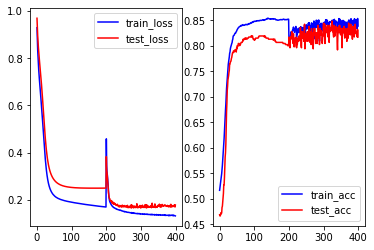

In [19]:
#visualisation
alsdl_grs[0][0].plot()

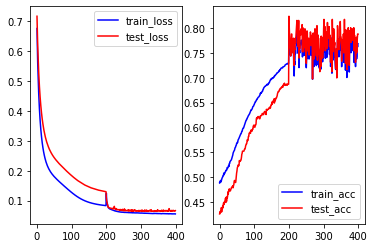

In [20]:
alsdl_ifds[0][0].plot()